# <font color='blue'><p style="text-align: center;"> Модель прогнозирования стоимости жилья для агентства недвижимости</p></font>

### Бизнес- задача: разработать модель, которая позволила бы агентству недвижимости обойти конкурентов по скорости и качеству совершения сделок.

Задача дата-сайнтиста:
1. Провести разведывательный анализ и очистку исходных данных. В связи с тем, что данные реальные: во многих
признаках присутствуют дублирующиеся категории, ошибки ввода, жаргонные сокращения и т .д. Предстоит отыскать закономерности,
самостоятельно расшифровать все сокращения, найти синонимы в данных, обработать пропуски и удалить выбросы. Постарайтесь уделить этапу очистки максимум внимания, так как это напрямую повлияет на результаты моделирования.
2. Выделить наиболее значимые факторы, влияющие на стоимость недвижимости.
3. Построить модель для прогнозирования стоимости недвижимости.
4. Разработать небольшой веб-сервис, на вход которому поступают данные о некоторой выставленной на продажу недвижимости, а сервис прогнозирует его стоимость.

Данные представлены датасетом со следующими атрибутами:

- 'status' — статус продажи;
- 'private pool' и 'PrivatePool' — наличие собственного бассейна;
- 'propertyType' — тип объекта недвижимости;
- 'street' — адрес объекта;
- 'baths' — количество ванных комнат;
- 'homeFacts' — сведения о строительстве объекта (содержит несколько типов сведений, влияющих на оценку объекта);
- 'fireplace' — наличие камина;
- 'city' — город;
- 'schools' — сведения о школах в районе;
- 'sqft' — площадь в футах;
- 'zipcode' — почтовый индекс;
- 'beds' — количество спален;
- 'state' — штат;
- 'stories' — количество этажей;
- 'mls-id' и 'MlsId' — идентификатор MLS (Multiple Listing Service, система мультилистинга);
- 'target' — цена объекта недвижимости (целевой признак, который необходимо спрогнозировать).

Важные сведения о данных:
1. Признаки 'homeFacts' и 'schools' представляют собой словари и содержат несколько типов сведений. Необходимо десериализовать
содержимое этих признаков. Если в нём есть полезные данные, необходимо создать из них новые признаки. 
2. Типы жилья и их основные характеристики (может пригодиться при обработке признака propertyType):
- apartment — съёмная квартира (нельзя купить);
- condo — кондоминиум (можно купить);
- co-op — квартира в жилищном кооперативе;
- single-family (detached, tiny home) — односемейный (отдельный, маленький) дом;
- townhome, townhouse — таунхаус;
- cape cod — черепичная крыша, облицовка деревянным сайдингом, дверь в центре здания, окна по бокам, один-два этажа;
- colonial home — минимум два этажа, симметрия, лестница в центре здания, строгий внешний вид;
- contemporary — чистые, простые линии, нейтральные цвета, натуральные текстуры;
- cottage — небольшая уютная веранда, небольшие жилые помещения;
- craftsman — деревянные элементы ручной работы, выступающие балки, большие колонны;
- Greek revival — большие белые колонны, украшения в греческом стиле, нарядный вход;
- farmhouse — прямоугольная планировка, большое крыльцо, амбарная крыша;
- French country — влияние прованса, облицовка камнем, состаренный вид;
- Mediterranean — белая штукатурка, дерево и камень в тёплых тонах, черепичные крыши, элементы испанских и итальянских вилл;
- midcentury modern — сочетание плавных природных и строгих геометрических линий, гладкость, лаконичность, большие окна;
- ranch — один этаж, низкая крыша, открытые жилые помещения, задний двор;
- split-level — жилые помещения разделены короткими лестничными пролётами;
- Tudor — деревянные балки, каменная кладка, асимметричная крутая двускатная крыша;
- Victorian (Queen Anne Houses) — два-три и более этажей, богатый декор, крутая двускатная крыша, небольшие башенки, яркий фасад;
- European Houses style — кирпич или камень, высокая крутая крыша, высокие окна, часто со ставнями, традиционные декоративные детали (фронтоны, замковые камни);
- log home — деревянный дом.
3. Некоторые жаргонные сокращения — для исправления дублирования (может пригодиться при обработке признака propertyType):
- 'manufactured home (house)' = 'mobile' = 'prefab' = 'modular';
- 'mobile' = 'mo2 le' = 'mo2le';
- 'cabin' = 'ca2 n' = 'ca2n';
- midcentury = mid century = mid-century;
- single family = single-family home.
4. Некоторые термины, используемые в сфере купли-продажи недвижимости:
- status — статус, состояние.
- estate — объект недвижимости.
- 'foreclosed' ('foreclosure') — «лишён права выкупа». Это процесс, когда недвижимость переходит к кредитору из-за неуплаты ипотеки заёмщиком. Продажа foreclosure-недвижимости отличается от традиционных продаж.
- 'pre foreclosure' ('pre foreclosure auction') — «до выкупа»,
«аукцион до выкупа».
- 'under contract showing' ('under contract show', 'under contract', 'active under contract') — предложение о покупке уже сделано, но не принято продавцом окончательно, и недвижимость продолжают показывать другим потенциальным покупателям.
- 'under contract backups', 'active backup', 'backup contract' — предложение о покупке уже сделано и принято продавцом, однако он открыт для резервных предложений.
- 'contingency' — дополнительные обстоятельства (критерии, которым должен соответствовать продавец/покупатель до завершения сделки).
- 'contingency contract' — контракт на случай возникновения дополнительных обстоятельств. 
- 'active contingency' — сделка уже практически состоялась, однако продавцу/покупателю для её завершения необходимо выполнить какие-то условия.
- 'insp inspection contingency' — ситуация, когда покупатель может официально проинспектировать объект недвижимости в определённый период времени.
- 'pending escape clause' — договор, предполагающий свободный выход сторон из него.
- 'pending backup wanted' — договор уже заключен, однако продавец хочет продолжать показывать недвижимость другим потенциальным покупателям и принимать резервные предложения.
- 'pending take backups' — условие, предполагающее, что продавец может принимать резерные предложения, если сделка с текущим покупателем не состоится.
- 'pending continue show' — договор уже заключен, однако продавец хочет продолжать показывать недвижимость другим потенциальным покупателям на случай, если текущая сделка не состоится.
- 'pending inspection' — «в ожидании инспекции». 
- 'due diligence period' — период, в течение которого покупатель имеет право проинспектировать недвижимость и изучить всю важную для заключения сделки информацию.
- 'activated' — «активен», открыт для покупки. 
- 'active with contract' — продавец уже принял предложение о покупке, однако сделка ещё не закрыта.
- 'active with offer' — продавец принял предложение о покупке, однако ищет резервные предложения на случай, если сделка с текущим покупателем не состоится.
- 'active auction', 'auction active', 'auction' — продажа недвижимости с помощью аукциона.
- cooling-off period — период, в течение которого покупатель может расторгнуть договор после завершения сделки.

## <font color='blue'><p style="text-align: center;">Технический этап - импорт необходимых библиотек и модулей</p></font>

<font color='red'><p style="text-align: center;">ВАЖНО!</p></font>

<font color='red'>В работе используется визуализация plotly.express. Графики, создаваемые им, требуют много памяти, увеличивают вес ноутбука и замедляют его работу и сохранение.
Построенные в ходе исследовательской работы графики сохранены в html-формате и могут быть просмотрены при необходимости. Код для визуализации срабатывает, если значение переменной build_graph в ячейке ниже поставить в значение True. По умолчанию, сейчас переменная в значении False.</font>

In [1]:
build_graph = True

In [2]:
import pandas as pd
import numpy as np
import re
from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import feature_selection
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from scipy.stats import shapiro
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["patch.force_edgecolor"] = True
%matplotlib inline
from sklearn.linear_model import LinearRegression
import pickle
from sklearn.model_selection import train_test_split
import plotly
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import levene
from catboost import Pool, CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
import optuna
import geonamescache
import missingno
import time
import re
import math
import statistics
from haversine import haversine, Unit
from pyod.models.mcd import MCD

## <font color='blue'><p style="text-align: center;">I. Загрузка данных и трансформация данных (уровень 1)</p></font>

In [3]:
data = pd.read_csv('data/data.csv')
data.head(5)

,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
0,Active,NaN,Single Family Home,240 Heather Ln,3.5,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Gas Logs,Southern Pines,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900,28387,4,NC,NaN,NaN,NaN,611019,"$418,000"
1,for sale,NaN,single-family home,12911 E Heroy Ave,3 Baths,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",NaN,Spokane Valley,"[{'rating': ['4/10', 'None/10', '4/10'], 'data...","1,947 sqft",99216,3 Beds,WA,2.0,NaN,NaN,201916904,"$310,000"
2,for sale,NaN,single-family home,2005 Westridge Rd,2 Baths,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...",yes,Los Angeles,"[{'rating': ['8/10', '4/10', '8/10'], 'data': ...","3,000 sqft",90049,3 Beds,CA,1.0,NaN,yes,FR19221027,"$2,895,000"
3,for sale,NaN,single-family home,4311 Livingston Ave,8 Baths,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",yes,Dallas,"[{'rating': ['9/10', '9/10', '10/10', '9/10'],...","6,457 sqft",75205,5 Beds,TX,3.0,NaN,NaN,14191809,"$2,395,000"
4,for sale,NaN,lot/land,1524 Kiscoe St,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,Palm Bay,"[{'rating': ['4/10', '5/10', '5/10'], 'data': ...",NaN,32908,NaN,FL,NaN,NaN,NaN,861745,"$5,000"


Посмотрим свысока на форму датасета:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   status        337267 non-null  object
 1   private pool  4181 non-null    object
 2   propertyType  342452 non-null  object
 3   street        377183 non-null  object
 4   baths         270847 non-null  object
 5   homeFacts     377185 non-null  object
 6   fireplace     103114 non-null  object
 7   city          377151 non-null  object
 8   schools       377185 non-null  object
 9   sqft          336608 non-null  object
 10  zipcode       377185 non-null  object
 11  beds          285903 non-null  object
 12  state         377185 non-null  object
 13  stories       226469 non-null  object
 14  mls-id        24942 non-null   object
 15  PrivatePool   40311 non-null   object
 16  MlsId         310305 non-null  object
 17  target        374704 non-null  object
dtypes: object(18)
memory usa

И на основные описательные статистики:

In [5]:
data.describe()

,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
count,337267,4181,342452,377183,270847,377185,103114,377151,377185,336608,377185,285903,377185,226469,24942,40311,310305,374704
unique,159,1,1280,337076,229,321009,1652,2026,297365,25405,4549,1184,39,347,24907,2,232944,43939
top,for sale,Yes,single-family home,Address Not Disclosed,2 Baths,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",yes,Houston,"[{'rating': [], 'data': {'Distance': [], 'Grad...",0,32137,3 Beds,FL,1.0,No MLS#,yes,NO MLS,"$225,000"
freq,156104,4181,92206,672,52466,7174,50356,24442,4204,11854,2141,53459,115449,67454,3,28793,24,1462


В исходных данных все признаки имеют категориальный формат, поэтому характерные для числовых переменных статистики на данном этапе не рассчитаны. Тем не менее, для первичного анализа этого достаточно. Работаем с датасетом из 377 тыс. наблюдений и 18 признаков, один из которых - целевой. На первый взгляд, пропусаи в данных есть, но, в то же время, есть признаки, для которых пропуск эквивалентен отсутствию фактора (например, отсутствие бассейна). С каждым из признаков далее проведем более пристальное обследование и очистку, в том числе, приведем признак в более удобный формат.

### Удаление дублей - итерация 1

Для начала проверим, что нет абсолютно полных дублей, если есть - удалим их:

In [6]:
print('Количество дубликатов: {}'.format(data[data.duplicated()].shape[0]))

data = data.drop_duplicates()
print('Размер таблицы (строки) после удаления дубликатов: {}'.format(data.shape[0]))

Количество дубликатов: 50
Размер таблицы (строки) после удаления дубликатов: 377135


### Общий обзор пропусков

Рассматривая далее каждый признак, мы проанализируем их в т.ч. и относительно пропусков. Но уже сейчас можем сделать обзор данных с высока, чтобы увидеть, есть ли "мусорные" строки, в которых слишком много пропусков. В таких строках в процессе заполнения пропусков по каждому признаку мы в итоге получим в значительной мере надуманные наблюдения, поэтому будет лучше их удалить. Сначала визуализируем пропуски в датасете:

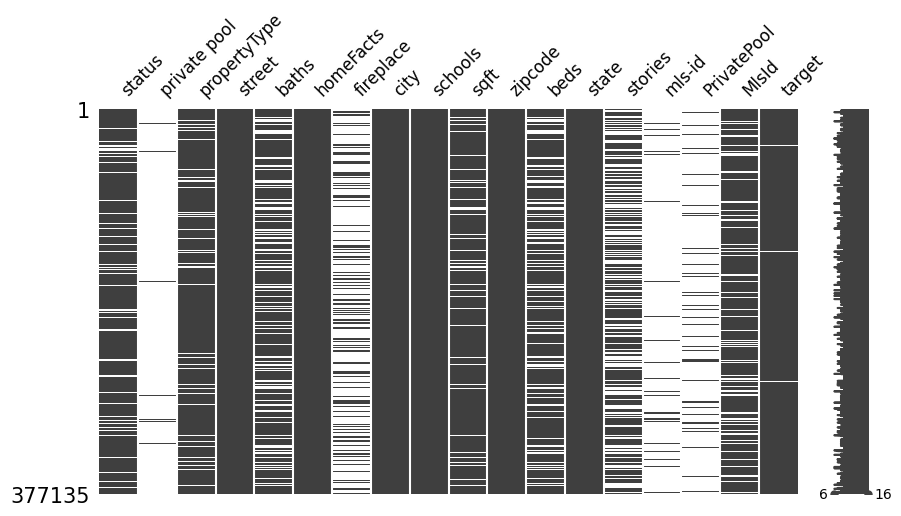

In [7]:
missingno.matrix(data,figsize=(10,5), fontsize=12);

Видим, что есть признаки, в которых пропусков (белый цвет) нет или их количество предельно мало, например, 'private pool','street' или 'schools'; и напротив, есть ряд признаков с очень большим количеством пропусков - например, 'firaplace' или 'stories'. Можно было бы удалить эти признаки уже сейчас, но пока оставим их и удалим только записи, в которых пропуски есть более, чем в половине (8) признаков:

In [8]:
data = data.dropna(thresh = 9 )
print('Размер таблицы (строки) после удаления мусорных записей: {}'.format(data.shape[0]))

Размер таблицы (строки) после удаления мусорных записей: 376767


Немного почистили датасет от пропусков и дублей.

### Резерв наблюдений для проверки продакшн

После проведения обработки данных, когда подойдем к моделированию, разделим датасет на обучающую и тестовую выборки. Но сейчас заранее отложим несколько строк в таком, максимально "сыром" виде, чтобы на продакшне эффектно проверить, как модель, включая препроцессинг, будут работать в максимально близких к реальным условиях - когда подаются не подготовленные тщательно дата-сайентистом или дата-инженером данные. Отложим выборку для демонстрации продакшна в файл:

In [9]:
prod_test = data.sample(n=5)
prod_test.to_csv('data\prod_test_main.csv')
data = data[~data.index.isin(prod_test.index)]
prod_test

,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
269232,NaN,NaN,Single Family,562 Overhill Dr,1.0,"{'atAGlanceFacts': [{'factValue': '1950', 'fac...",Not Applicable,San Antonio,"[{'rating': ['5/10', '2/10', '2/10'], 'data': ...","1,050",78228,3,TX,1.0,NaN,NaN,1426715,"$129,500"
221093,for sale,NaN,townhouse,23304 12th Ave S,3 Baths,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",yes,Des Moines,"[{'rating': ['5/10', '3/10', '3/10'], 'data': ...","2,802 sqft",98198,5 Beds,WA,2.0,NaN,NaN,1548923,"$749,950"
90747,Active,NaN,Traditional,4803 Northlawn Way,NaN,"{'atAGlanceFacts': [{'factValue': '2014', 'fac...",NaN,ORLANDO,"[{'rating': ['4', '5', '7', '5', '7'], 'data':...","2,059",32811,NaN,FL,Two,NaN,NaN,O5818596,"353,900"
220006,Active,NaN,Split Foyer,127 Skylark Trl,NaN,"{'atAGlanceFacts': [{'factValue': '1989', 'fac...",1,Fairfield,"[{'rating': ['4', '8', '5'], 'data': {'Distanc...","2,280",17320,NaN,PA,NaN,NaN,NaN,PAAD109702,"254,900"
300853,Pre-foreclosure / auction,NaN,Single Family,125 Putters Dr,Bathrooms: 3,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",NaN,Athens,"[{'rating': ['5/10', '4/10', '5/10'], 'data': ...","Total interior livable area: 2,569 sqft",30607,4 bd,GA,2.0,NaN,NaN,NaN,"$180,477"


Теперь перейдем к обработке каждого признака.

### Признак 'Status'

Из первичного анализа видим, что признак заполнен по 337 тыс. записей из 377 тыс. записей в датасете. Очевидно, есть пропуски, но пока не ясно, чему эквиваленты пропуски в этом случае и чем их можно заменить.  При этом, в признаке 159 уникальных значений, но почти в половине случаев - 156 тыс. - установлено самое популярное значение 'for sale'. Посмотрим на все встречающиеся значения и попробуем их свести с более счетному числу. Насчем с простого осмотра наиболее частых значений:

In [10]:
data['status'].value_counts()

status
for sale                156057
Active                  105205
For sale                 43464
foreclosure               6386
New construction          5474
                         ...  
Contingent   No Show         1
Coming soon: Oct 24.         1
Coming soon: Oct 21.         1
Coming soon: Nov 14.         1
Coming soon: Dec 23.         1
Name: count, Length: 159, dtype: int64

Сразу же видим, что есть одинаковый текст, но в разных регистрах - 'for sale' и 'For sale'. Идея, приведем значения к одинаковому регистру и еще раз посмотрим на количество уникальных значений:

In [11]:
data['status'] = data['status'].str.lower()
data['status'].value_counts()

status
for sale                   199523
active                     105205
foreclosure                  6729
new construction             5474
pending                      4807
                            ...  
coming soon: oct 29.            1
coming soon: dec 15.            1
pending w/backup wanted         1
pending backups wanted          1
coming soon: dec 23.            1
Name: count, Length: 152, dtype: int64

Количество уникальных значений теперь равно 152, а самая большая группа - 'for sale' - теперь составляет 200 тыс. записей. Обращаем внимание на вторую по популярности категорию - 'active'. По смыслу означает, что объявление активно, что является эквивалентом 'for sale'. При первом приближении значение 'foreclosure', означающее переход недвижимости к кредитору из-за неуплаты ипотеки, тоже можно отнести к группе 'for sale', т.к. кредитор выставит объект на продажу. Пока сделаем так. Далее, категория 'new construction' - на практике это может означать как дом на стадии 'коробки', так и еще недостроенный дом. В любом случае, это характеристика скорее стадии готовности, чем вид продажи. Такое значение пока не будем трактовать как 'for sale'. Следующее значение - 'pending' - на рынке недвижимости обозначает незавершенные сделки, предполагающие, в том числе, возможность поиска других покупателей, что можно трактовать как активность предложения. Так мы рассмотрели топ-5 категорий, а дальше идет множество менее популярных значений. Но сейчас становится ясно,что признак 'status' имеет не только указание на сам факт - продает объект или нет - но и на особенности процесса продажи. Тогда будем перекодировать его не в бинарный вид, а в некоторые категорию, отражающие предполагаемую специфику сделки. В bottom-5 значений признака имеются еще формулировки 'coming soon..'. В риэлтерском деле это означает, что объект скоро будет доступен для покупки. То, что из 5 значений в хвосте 3 относятся к категории 'coming soon...' дает основания полагать, что различных формулировок этой категории достаточно много. Посмотрим, сколько:

In [12]:
data[data['status'].str.contains('coming soon', na = False)]['status'].nunique()

42

Нашлось 42 варианта значения 'coming soon...', которые образуют отдельную категорию в продаваемых объектах. Сделки, недоведенные до конца ('pending'), тоже могут иметь различные формулировки, посмотрим на их количество:

In [13]:
data[data['status'].str.contains('pending', na = False)]['status'].nunique()

29

Нашли 29 словоформ. Посмотрим, какие еще значения признака есть кроме уже рассмотренных:

In [14]:
data[data['status'].str.
     contains('for sale|active|new construction|coming soon|pending|foreclos')==False]['status'].value_counts()

status
p                                       1488
under contract show                     1183
 / auction                               932
under contract   showing                 793
under contract                           692
new                                      690
contingent                               581
price change                             563
auction                                  535
for rent                                 398
recently sold                            283
under contract backups                   252
contingent finance and inspection        245
back on market                           112
contingent show                          101
option contract                           54
c                                         39
contract p                                36
pi                                        36
listing extended                          28
due diligence period                      27
contract contingent on buyer sale         25
clo

Видим достаточно много вариаций '...contract...'. В продажах недвижимости это означает различные варианты договоренностей между продавцом и покупателем, которые зачастую позволяют продавцу продолжать поиск других покупателей. По смыслу это близко к категории 'pending', то есть сделка не завершена, а на стадии промежуточных договоренностей. Тем не менее, пока оставим все варианты 'contract' как отдельную категорию. Аналогично с вариациями '...contingent...'. Посмотрим, сколько значений осталось после исключения этих категорий:

In [15]:
data[data['status'].str.
contains('for sale|active|new construction|coming soon|pending|foreclos|contract|contingen')==False]['status'].value_counts()

status
p                        1488
 / auction                932
new                       690
price change              563
auction                   535
for rent                  398
recently sold             283
back on market            112
c                          39
pi                         36
listing extended           28
due diligence period       27
c continue show            18
closed                     18
apartment for rent          7
condo for rent              7
ct                          5
pf                          4
accepted offer              4
accepting backups           2
ps                          2
re activated                2
uc continue to show         2
conting accpt backups       1
lease/purchase              1
sold: $285,000              1
sold: $15,000               1
reactivated                 1
backup                      1
Name: count, dtype: int64

Итак, у нас осталось достаточно счетное количество значений, теперь перейдем собственно к формированию категорий. Реализуем для этого функцию:

In [16]:
def normalise_status(status):
    
# cформируем списки статусов-синонимов для замены по точному совпадению
    ordinary = ['for sale','active']
    coming_soon = ['coming soon']
    pending = ['p','ps', 'pf', 'pi']
    foreclosure = ['foreclos']
    active = ['a active','listing extended','back on market','re activated','reactivated','price change']
    new_construction = ['new']
    contingency = ['c', 'c continue show','conting accpt backups','ct']
    under_contract = ['uc continue to show','due diligence period','accepted offer','accepting backups','backup']
    for_rent = ['lease/purchase']
    
# сначала сделаем замены по like-условиям:
    if status != status: return 'Zero status'
    if 'coming soon' in status: return 'coming soon'
    if 'pending' in status: return 'pending'
    if 'foreclos' in status: return 'foreclosure'
    if 'contract' in status: return 'under contract'
    if 'contingen' in status: return 'contingency'
    if 'auction' in status: return 'auction'
    if 'rent' in status: return 'for rent'
    if 'sold' in status: return 'sold'
    if 'closed' in status: return 'sold'
    if 'active' in status: return 'for sale'
    
# теперь сделаем замены по точным совпад5ниям из словарей:
    if status in pending: return 'pending'
    if status in active: return 'active'
    if status in contingency: return 'contingency'
    if status in new_construction: return 'new construction'
    if status in under_contract: return 'under contract'
    if status in for_rent: return 'for rent'
    if status in ordinary: return 'for sale'
    return status

# применим функцию для обобщения статусов
data['status'] = data['status'].apply(normalise_status)
data['status'].value_counts()

status
for sale            305267
Zero status          39606
foreclosure          10858
pending               6894
new construction      6164
under contract        3838
auction               1505
contingency           1098
active                 706
for rent               413
sold                   303
coming soon            110
Name: count, dtype: int64

Пока с этим признаком закончили, рассмотрим следующий.

### Признак 'Private pool' и 'PrivatePool'

Признак наличия бассейна указан в двух колонках. Посмотрим на значения в этих колонках:

In [17]:
data['private pool'].value_counts()

private pool
Yes    4181
Name: count, dtype: int64

In [18]:
data['PrivatePool'].value_counts()

PrivatePool
yes    28792
Yes    11518
Name: count, dtype: int64

Оставим только одну из колонок, в которой сохраним значения обеих, и удалим лишнюю, после чего заменим формат признака на числовой:

In [19]:
data['PrivatePool'] = data['PrivatePool'].str.lower()

def normalise_pool(data):
    if data['PrivatePool'] == 'yes':
        return 'Yes'
    else:
        return data['private pool']

data['private pool'] = data.apply(normalise_pool, axis = 1)
data['private pool'] = data['private pool'].apply(lambda x: 1 if x=='Yes' else 0)
data['private pool'] = data['private pool'].astype(int)
data = data.drop('PrivatePool', axis = 1)
data['private pool'].value_counts()

private pool
0    332271
1     44491
Name: count, dtype: int64

Пока по этому признаку иной предварительной обработки не требуется.

### Признак 'Target'

Цена должна быть выражена в числовом формате. Сейчас же там указан текст. Преобразуем признак, оставив в нем только цифровые символы и изменив формат на числовой:

In [20]:
data['target'] = data['target'].str.replace(r"[^\d\.]","", regex=True)
data['target'] = data['target'].astype(float)

Пропуски пока удалять не будем, после того, как разберем все признаки, посмотрим на количество пропущенных данных в целом по датасету для принятия решения об удалении строк.

### Признаки 'mls-id' и 'MlsId'

Еще одна пара дублирующихся признаков - id объекта в системе мультилистинга. Сам по себе id не может рассматриваться как фактор в модели. Но небольшую обработку все-таки проведем. Объединим признаки в один и удалим дублирующий:

In [21]:
data['MlsId'].fillna(data['mls-id'], inplace=True)
data['MlsId'] = data['MlsId'].str.lower()
data = data.drop('mls-id', axis = 1)

Проверим, остались ли пропуски:

In [22]:
data['MlsId'].isnull().sum()

41578

Также как и по другим признакам, пока их удалять не будем.

### Удаление дубликатов - итерация 2

После удаления избыточных признаков наличия бассейна и id объекта, проверим еще раз на наличие дубликатов и удалим их, если таковые найдутсяю Причем, признак 'MlsId не будет участвовать в сравнении строк:

In [23]:
print('Количество дубликатов: {}'.format(data[data.duplicated(subset=data.columns.difference(['MlsId']))].shape[0]))

data = data.drop_duplicates(subset=data.columns.difference(['MlsId']))
print('Размер таблицы (строки) после удаления дубликатов: {}'.format(data.shape[0]))

Количество дубликатов: 91
Размер таблицы (строки) после удаления дубликатов: 376671


### Признак 'State'

В данном признаке у нас 39 уникальных значений:

In [24]:
data['state'].value_counts()

state
FL    115265
TX     83641
NY     24425
CA     23376
NC     21842
TN     18330
WA     13796
OH     12571
IL      8930
NV      8479
GA      6700
CO      6401
PA      5558
MI      5160
DC      4668
AZ      3345
IN      3326
OR      2788
MA      1515
UT      1324
MD      1089
MO       866
VT       864
VA       801
WI       452
NJ       436
ME       258
IA       241
KY        90
OK        49
MS        40
SC        28
MT         7
DE         5
Fl         1
BA         1
AL         1
OT         1
OS         1
Name: count, dtype: int64

Заполнение стандартизировано, на первый взгляд, чистка не требуется. Приведем только к одинаковому регистру для однообразия, это хорошее правило для обработки текста и посмотрим, изменится ли после этого количество штатов в датасете:

In [25]:
data['state'] = data['state'].str.upper()
data['state'].nunique()

38

Действительно, стало на 1 штат меньше, значит какой-то был в разных регистрах. Проверим наличие пропусков:

In [26]:
data['state'].isnull().sum()

0

Пропусков нет. Другая обработка на данном этапе не требуется.

### Признак 'City'

В данном признаке у нас 2026 уникальных значений, даже не будем пытаться вывести их все на экран. Опять же, сначала приведем к одинаковому регистру и проверим, избавились ли от вариации из-аз регистра: 

In [27]:
data['city'] = data['city'].str.upper()
data['city'].nunique()

1909

Неплохо, 117 вариантов написания ушли. Город - один из ключевых факторов, влияющих на стоимость недвижимости. Поэтому требуется однозначно идентифицировать города при фактически разном их написании в разных объявлениях. Обычно, названия городов имеют вариативность написания. Но может быть и ситуация, когда города с одинаковыми названиями есть в разных штатах. Поэтому будем искать похожие названия с учетом штатов. Для этого сделаем группировку данных по признакам city+state

In [28]:
grouped_city = data.groupby(['city','state']).size().reset_index()
grouped_city = grouped_city.rename(columns={0: 'count'})
grouped_city

,city,state,count
0,,BA,1
1,,FL,14
2,,NC,2
3,,NY,3
4,--,FL,9
...,...,...,...
2079,YOUNGTOWN,AZ,8
2080,YUBA CITY,CA,45
2081,ZANESVILLE,OH,4
2082,ZAPATA,TX,1


Количество уникальных пар city+state выше, чем количество уникальных наименований городов. Это подтверждает наличие городов с одинаковым названием в разных штатах. Типичная проблема в именах собственных, и городах в частности, состоит в множестенности синонимов, когда один и тот же город может быть назван по-разному, но мы понимаем, о чем речь. Нам же требуется однозначно идентифицировать город. Можно было бы перебирать города по алфавиту в поисках похожих, но попробуем ускорить этот процесс, используя библиотеку GeonamesCache. Это библиотека Python, предоставляющая функции для извлечения названий, кодов ISO и FIPS континентов, стран, а также штатов и округов США в виде словарей Python. Наборы данных по странам и городам также включают данные о населении и географические данные. Более подробно можно ознакомиться на сайте https://pypi.org/project/geonamescache/.

Проверим на одном из популярных городов с вариативностью наприсания - Нью-Йорке.

In [29]:
gc = geonamescache.GeonamesCache(min_city_population=500)
ny = gc.search_cities('NEW YORK', case_sensitive=False, contains_search=False)
print(ny)

[{'geonameid': 5082331, 'name': 'York', 'latitude': 40.86807, 'longitude': -97.592, 'countrycode': 'US', 'population': 7864, 'timezone': 'America/Chicago', 'admin1code': 'NE', 'alternatenames': ['Jork', 'New York', 'York', 'yark  nybraska', 'yue ke', 'ywrk  nbraska', 'ywtan  nbraska', 'Јорк', 'Йорк', 'يوتان، نبراسكا', 'یارک، نیبراسکا', 'یورک، نبراسکا', '约克']}, {'geonameid': 5128581, 'name': 'New York City', 'latitude': 40.71427, 'longitude': -74.00597, 'countrycode': 'US', 'population': 8804190, 'timezone': 'America/New_York', 'admin1code': 'NY', 'alternatenames': ['Aebura', 'Bandar Raya New York', 'Big Apple', 'Cathair Nua-Eabhrac', 'City of New York', 'Eabhraig Nuadh', 'Efrog Newydd', 'Evrek Nowydh', 'Ga-no-no', 'Kanon:no', 'Kanono', 'Kanón:no', 'Kota New York', 'Lungsod ng New York', "N'ju-Jork", 'NY', 'NYC', 'Nea Yorke', 'Nei Yarrick Schtadt', 'Neu Amsterdam', 'Neu Jorck', 'New Amsterdam', 'New Orange', 'New Yorc', 'New York', 'New York City', 'New York Stad', 'New York borg', 'New

Получили словарь, в котором имеются:
- уникальный код geonameid (5128581);
- эталонное наименование (New York City)
- широта и долгота (40.71427 / 74.00597)
- информация о штате (NY)
- множество синонимов и написаний названия города на разных языках.

Теперь, используя библиотеку geonamescache, дополним сгруппированные данные признаками geonameid и 'name':

In [30]:
# функция для поиска города и проверки, что нашли именно в нужном штате.
def get_city(df):
    city = df['city']
    state = df['state']
# если на входе не указан город или штат - возвращаем ответ о некорректном входе
    if len(city)==0 or city.isspace() or len(state)==0 or state.isspace():
        return pd.Series(['Empty input','Empty input',0, 0, 0])
# если на входе и город, и штат, идем искать
    else:
        search = gc.search_cities(city, case_sensitive=False, contains_search=False)
# если не нашли такой город - возвращаем ответ 'Not found'
        if not search:
            return pd.Series(['Not found','Not found',0, 0, 0])
# если нашли, то в списке ищем запись с совпадающим штатом
        else:
            for i in search:
# если нашли таковую - возвращаем результат
                if i['admin1code'] == state:
                    return pd.Series([i['geonameid'], i['name'], i['population'], i['latitude'], i['longitude']])
# иначе возвращаем ответ о ненайденном соответствии по штату
            return pd.Series(['Not matched state','Not matched state', 0, 0, 0])

    return pd.Series(['Other error','Other error', 0, 0, 0])

# применяем функцию
grouped_city[['geonameid','name','population','latitude','longitude']] = grouped_city.apply(get_city, axis = 1)

Посмотрим, насколько качественно удалось идентифицировать города. Нас интересуют записи, в которых получен один из отрицательных результатов:

In [31]:
grouped_city['geonameid'].value_counts()

geonameid
Not found            755
Not matched state    387
Empty input            4
5546220                3
5780993                2
                    ... 
4196586                1
4355843                1
5351515                1
5351549                1
4743575                1
Name: count, Length: 917, dtype: int64

In [32]:
grouped_city

,city,state,count,geonameid,name,population,latitude,longitude
0,,BA,1,Empty input,Empty input,0,0.00000,0.00000
1,,FL,14,Empty input,Empty input,0,0.00000,0.00000
2,,NC,2,Empty input,Empty input,0,0.00000,0.00000
3,,NY,3,Empty input,Empty input,0,0.00000,0.00000
4,--,FL,9,Not found,Not found,0,0.00000,0.00000
...,...,...,...,...,...,...,...,...
2079,YOUNGTOWN,AZ,8,5322027,Youngtown,6613,33.59393,-112.30294
2080,YUBA CITY,CA,45,Not found,Not found,0,0.00000,0.00000
2081,ZANESVILLE,OH,4,4528923,Zanesville,25498,39.94035,-82.01319
2082,ZAPATA,TX,1,4743575,Zapata,5089,26.90726,-99.27143


Результат идентификации городов признаем не удовлетворительным. 755 городов не были найдены, по 387 найдено наименование, но не совпал штат. Вероятной причиной стало то, что библиотека geonamescache использует базу городов с населением от 500 человек. Однако мы не напрасно обралились к библиотеке geonamescache. На странице библиотеки в сети указаны ссылки на источник данных для библиотеки - сайт www.geonames.org . Изучив сайт находим доступный для скачивания архив с полным перечнем населенных пунктов США. Попробуем поработать с ним. Предварительно скачали,теперь загрузим в датасет:

In [33]:
# загрузим в датасет базу всех населенных пунктов США
us_cities = pd.read_csv('data\\US_text.txt', sep='\t', header=None)

# поправим наименования столбцов
us_cities = us_cities.rename(columns={0: "geonameid",
                               1: "name",
                               2: "asciiname",
                               3: "alternatenames",
                               4: "latitude",
                               5: "longitude",
                               6: "feature class",
                               7: "feature code",
                               8: "country code",
                               9: "cc2",
                               10: "admin1code",
                               11: "admin2code",
                               12: "admin3code",
                               13: "admin4code",
                               14: "population",
                               15: "elevation",
                               16: "dem",
                               17: "timezone",
                               18: "modification date"})

# выполним исправление типов данных и регистра
us_cities['name'] = us_cities['name'].str.upper()
us_cities['asciiname'] = us_cities['asciiname'].str.upper()
us_cities['alternatenames'] = us_cities['alternatenames'].str.upper()
us_cities['population'] = us_cities['population'].astype(float)
us_cities.head(5)

,geonameid,name,asciiname,alternatenames,latitude,longitude,feature class,feature code,country code,cc2,admin1code,admin2code,admin3code,admin4code,population,elevation,dem,timezone,modification date
0,2130830,MIDDLE REEF,MIDDLE REEF,NaN,51.98414,176.01982,U,RFU,US,NaN,AK,NaN,NaN,NaN,0.0,NaN,-9999,NaN,2022-05-25
1,2130833,MCARTHUR REEF,MCARTHUR REEF,NaN,52.06667,177.86667,U,RFU,US,NaN,AK,16.0,NaN,NaN,0.0,NaN,-9999,Asia/Kamchatka,2016-07-05
2,2130890,BULDIR REEF,BULDIR REEF,NaN,52.15229,176.35675,U,RFU,US,NaN,AK,NaN,NaN,NaN,0.0,NaN,-9999,NaN,2022-05-25
3,3577483,THE NARROWS,THE NARROWS,THE NARROWS,18.37502,-64.72517,H,CHN,US,VG,00,NaN,NaN,NaN,0.0,NaN,-9999,America/St_Thomas,2018-11-06
4,3715657,CAPE LOOKOUT SHOALS,CAPE LOOKOUT SHOALS,LOOKOUT SHOALS,34.51206,-76.49326,H,SHOL,US,NaN,NC,31.0,91396.0,NaN,0.0,NaN,-9999,America/New_York,2022-05-24


База из 2.24 млн. населенных пунктов. Рассчитываем на то, что здесь мы точно найдем большее количество городов. Сделаем еще одну функцию для поиска городов по этой базе. В ходе множества проб и ошибок была выработан следующий итеративный алгоритм поиска городов:
1. Прогоняем через функцию get_city_full с параметром attempt=1 города, которые не были идентифицированы функцией get_city;
2. После выполнения предыдущего этапа получаем опять неидентифицированные города (проверено) - для них выполним дополнительную обработку по корректировке написания городов, замене названий на более известные синомины и выполним прогон через функцию get_city_full с параметром attempt=2;
3. После выполнения пункта 2 опять получаем перечень неидентифицированных городов (тоже проверено), в которой выполним обработку городовов, для которых найдено более одного населенного пункта с ненулевой численностью населения, и выберем в качестве эвристики правило - выбираем из найденных совпадений город с максимальной численностью - выполним прогон городов через функцию get_city_full с параметром attempt=3.

In [34]:
# функция для поиска города и проверки, что нашли именно в нужном штате, по полной базе
def get_city_full(df, attempt = 1):
    
# получаем параметры для поиска
    state = df['state']
    geonameid = df['geonameid']
    attempt = attempt
    population = df['population']
    latitude = df['latitude']
    longitude = df['longitude']
    
# при первой попытке ищем исходное название города, при последующих - синоним
    if attempt == 1:
        city = df['city']
    if attempt > 1:
        city = df['city_new']
        
# зафиксируем перечень отрицательных результатов
    failed_id = ['Not found','Not matched state','Zero pop not found',
                 'Some zero pop found','Some pop found', 'Pop not found']
    pattern = '|'.join(failed_id)
    
# на первой и второй попытках, если ранее город уже идентифицирован - повторную идентификацию не проводим
    if attempt in (1,2) and (geonameid in failed_id) == False:
        result = pd.Series([geonameid, city, population, latitude, longitude])
        return result

# на третьей попытке проводим повторную идентификацию только если на предыдущих попытках нашли несколько городов
    if attempt == 3 and (geonameid in failed_id) and geonameid != 'Some pop found':
        result = pd.Series(['OTHER CITY-1','OTHER CITY-1', 0, 0, 0])
        return result    
    result = pd.Series(['Other error', 'Other error', 0, 0, 0])

# если на входе не указан город или штат - возвращаем ответ о некорректном входе
    if len(city)==0 or city.isspace() or len(state)==0 or state.isspace():
        result = pd.Series(['Empty input','Empty input', 0, 0, 0])
        return result

# если на входе и город, и штат, идем искать
# сначала пробуем найти по точному совпадению город с ненулевым населением и соспадающим штатом
    found_full = us_cities[(us_cities['name']==city) & (us_cities['admin1code']==state)
                              & (us_cities['feature class']=='P') & (us_cities['population'] > 0)]

# если нашли всего одну запись - возвращаем данные из нее
    if found_full.shape[0] ==1:
        result = pd.Series([found_full['geonameid'].values[0], found_full['name'].values[0],
                            found_full['population'].values[0], found_full['latitude'].values[0],
                            found_full['longitude'].values[0]])

        return result

# если не нашли ранее, то теперь ищем точное совпадение города и штата и населенный пункт с нулевой численностью
    found_full = us_cities[(us_cities['name']==city) & (us_cities['admin1code']==state)
                              & (us_cities['feature class']=='P') & (us_cities['population'] == 0)]
    
# если нашли всего одну запись - возвращаем данные из нее
    if found_full.shape[0] ==1:
        #(city,state,'OKF2')
        result = pd.Series([found_full['geonameid'].values[0], found_full['name'].values[0],
                            found_full['population'].values[0], found_full['latitude'].values[0],
                            found_full['longitude'].values[0]])
        return result   

# если не нашли ранее, то пытаемся найти уже совпадение по альтернативным именам города (они есть в базе городов США)
    else:
        found_city = us_cities[(us_cities['name'] == city) | (us_cities['alternatenames'].str.contains(city, na=False))]
        
# если не нашли такой город - возвращаем ответ 'Not found'
        if found_city.shape[0] == 0:
            result = pd.Series(['Not found','Not found', 0, 0, 0])
            return result

# если нашли, то в списке ищем запись с совпадающим штатом
        else:
            found_state = found_city[(found_city['admin1code'] == state)]
            
# если не нашли совпадение со штатом - возвращаем ответ 'Not matched state'
            if found_state.shape[0] == 0:
                result = pd.Series(['Not matched state','Not matched state', 0, 0 ,0])
                return result
            else:
                
# если нашли всего одну запись - возвращаем значения из нее
                if found_state.shape[0] == 1:
                    result = pd.Series([found_state['geonameid'].values[0], found_state['name'].values[0],
                                        found_state['population'].values[0], found_state['latitude'].values[0],
                                        found_state['longitude'].values[0]])
                    return result
            
# если нашли более одной записи - смотрим на численность населения
                else:
                    found_pop = found_state[(found_state['population'] > 0)]
            
# если нет населенных пунктов с населением больше 0, возвращаем ответ 'Pop not found'
                    if found_pop.shape[0] == 0:
                        found_zero_pop = found_city[(found_city['population'] == 0)]
                        if found_zero_pop.shape[0] == 0:
                            result = pd.Series(['Pop not found', 'Pop not found', 0, 0, 0])
                            return result
                        
# если найден всего один населенный пункт с численностью населению больше 0 - возвращаем данные из него
                        else:
                            if found_zero_pop.shape[0] == 1:
                                result = pd.Series([found_zero_pop['geonameid'].values[0], found_zero_pop['name'].values[0],
                                                   found_zero_pop['population'].values[0], found_zero_pop['latitude'].values[0],
                                                   found_zero_pop['longitude'].values[0]])
                                return result
                        
# если не нашли ранее - пытаемся найти населенный пункт с нулевой численностью населения
                            else:
                                found_zero_pop_fp = found_zero_pop[(found_zero_pop['feature class'] == 'P')]
            
# если не нашли - возвращаем ответ 'Zero popmnot found'
                                if found_zero_pop_fp.shape[0] == 0:
                                    result = pd.Series(['Zero pop not found', 'Zero pop not found', 0, 0, 0])
                                    return result

# если нашли всего одну запись с нулевой численностью населения - возвращаем данные из нее
                                else:
                                    if found_zero_pop_fp.shape[0] == 1:
                                        result = pd.Series([found_zero_pop_fp['geonameid'].values[0], found_zero_pop_fp['name'].values[0],
                                                            found_zero_pop_fp['population'].values[0], found_zero_pop_fp['latitude'].values[0],
                                                            found_zero_pop_fp['longitude'].values[0]])
                                        return result
                    
# если нашли более одной записи с нулевой численностью - возвращаем ответ 'Some zero pop found'
                                    else:
                                        result = pd.Series(['Some zero pop found', 'Some zero pop found', 0, 0, 0])
                                        return result 
            
# если ранее мы нашли всего одну запись с населением больше 0, то возвращаем данные из нее
                    else:
                        if found_pop.shape[0] == 1:
                            result = pd.Series([found_pop['geonameid'].values[0], found_pop['name'].values[0],
                                                found_pop['population'].values[0], found_pop['latitude'].values[0],
                                                found_pop['longitude'].values[0]])
                            return result
                        
# если нашли более одной записи с населением больше 0, по проверяем, есть ли запись с признаком, что это именно населенный
# пункт: в используемой базе не только населенные пункты, но и туристичсекие места, 'местечки', объекты местности
                        else:
                            found_pop_fp = found_pop[(found_pop['feature class'] == 'P')] 
            
# если не нашли - возвращаем ответ 'Pop not found'
                            if found_pop_fp.shape[0] == 0:
                                result = pd.Series(['Pop not found', 'Pop not found', 0, 0, 0])
                                return result
                            else:
                        
# а если нашли всего 1 запись - возвращаем данные из нее
                                if found_pop_fp.shape[0] == 1:
                                    result = pd.Series([found_pop_fp['geonameid'].values[0], found_pop_fp['name'].values[0],
                                                       found_pop_fp['population'].values[0], found_pop_fp['latitude'].values[0],
                                                       found_pop_fp['longitude'].values[0]])
                                    return result
            
# если нашли более, чем одну запись - то на третьей попытке выбираем город с наибольшей численностью из найденных
                                else:

                                    if attempt == 3:
                                        found_pop_fp = found_pop_fp[found_pop_fp['population'] == found_pop_fp['population'].max()]
                                        result = pd.Series([found_pop_fp['geonameid'].values[0], found_pop_fp['name'].values[0],
                                                       found_pop_fp['population'].values[0], found_pop_fp['latitude'].values[0],
                                                       found_pop_fp['longitude'].values[0]])
                                    else:
                                        result = pd.Series(['Some pop found', 'Some pop found', 0, 0, 0])
                                        return result 
    return result

Вспомогательная функция для замены названий некоторых городов, очистки от зашумляющих аббревиатур, которая нужна для второго прогона городов через функцию get_city_full с параметром attempt=2. Там серия простых преобразований:

In [35]:
def get_cities_allias(df):
    failed_id = ['Not found','Not matched state','Zero pop not found','Some zero pop found','Some pop found','Pop not found','Not found pop','Not matched state']
    pattern = '|'.join(failed_id)
    df_for_replace = df[df['geonameid'].str.contains(pattern, na=False)]
    df_not_replace = df[~df['geonameid'].str.contains(pattern, na=False)]
    df_not_replace['city_new'] = df_not_replace['city']
    df_for_replace['city_new'] = df_for_replace['city'].str.replace(' TOWNSHIP', '')
    df_for_replace['city_new'] = df_for_replace['city_new'].str.replace(' TWP', '')
    df_for_replace['city_new'] = df_for_replace['city_new'].str.replace(' CITY', '')
    df_for_replace['city_new'] = df_for_replace['city_new'].str.replace(' TWP.', '')
    df_for_replace['city_new'] = df_for_replace['city_new'].str.replace(' PT', '')
    df_for_replace['city_new'] = df_for_replace['city_new'].str.replace(' VLG', '')
    df_for_replace['city_new'] = df_for_replace['city_new'].str.replace(' VL', '')
    df_for_replace['city_new'] = df_for_replace['city_new'].str.replace(' VILLAGE', '')
    df_for_replace['city_new'] = df_for_replace['city_new'].str.replace(' SPGS', '')
    df_for_replace['city_new'] = df_for_replace['city_new'].str.replace(' SPRINGS', '')
    df_for_replace['city_new'] = df_for_replace['city_new'].str.replace(' MANOR', '')
    df_for_replace['city_new'] = df_for_replace['city_new'].str.replace('ST ', 'SAINT ')
    df_for_replace['city_new'] = df_for_replace['city_new'].str.replace('FT ', 'FORT ')
    df_for_replace['city_new'] = df_for_replace['city_new'].str.replace('FT. ', 'FORT ')
    df_for_replace['city_new'] = df_for_replace['city_new'].str.replace(' HTS', '')
    df_for_replace['city_new'] = df_for_replace['city_new'].str.replace('PT ', 'PORT ')
    df_for_replace['city_new'] = df_for_replace['city_new'].str.replace(' LK', ' LAKE')
    df_for_replace['city_new'] = df_for_replace['city_new'].str.replace(' SHRS', '')
    df_for_replace['city_new'] = df_for_replace['city_new'].str.replace(' PKWY', '')
    df_for_replace['city_new'] = df_for_replace['city_new'].str.replace(' VALLEY', '')

    cities_allias = {'ATLAANTA' : 'ATLANTA',
                 'BAYSIDE HILLS' : 'BAYSIDE',
                 'BELLLINGHAM' : 'BELLINGHAM',
                 'BOSTON (DORCHESTER)' : 'BOSTON',
                 'BRONX' : 'NEW YORK CITY',
                 'CHERRYHILLSVILLAGE' : 'CHERRY HILLS VILLAGE',
                 'COMMERCECITY' : 'COMMERCE CITY',
                 'DOCTOR PHILIPS' : 'PHILIPS',
                 'FAIRFIELD.' : 'FAIRFIELD',
                 'FEDERALHEIGHTS' : 'FEDERAL HEIGHTS',
                 'HERKIMER NY' : 'HERKIMER',
                 'HIDE A WAY HILLS' : 'HIDE-A-WAY HILLS',
                 'HOLLYWOOD HILLS EAST' : 'LOS ANGELES',
                 'IJAMES CHURCH RD' : 'MOCKSVILLE',
                 'JAMAICA EST' : 'JAMAICA',
                 'LA MOCA' : 'LAREDO',
                 'LACY LAKEVIEW' : 'LACY',
                 'LOS FELIZ L' : 'LOS ANGELES',
                 'MC ALLEN' : 'MCALLEN',
                 'MC LEANSVILLE' : 'MCLEANSVILLE',
                 'MT WASHINGTON' : 'PITTSBURGH',
                 'N MIAMI BEACH' : 'MIAMI BEACH',
                 'OLD BROOKLYN' : 'BROOKLYN',
                 'OLD MILL BASIN' : 'MILL BASIN',
                 'PARK HILLS HEIGHTS' : 'LOS ANGELES',
                 'POINT CHARLOTTE' : 'PORT CHARLOTTE',
                 'ST. ALBANS CITY' : 'SAINT ALBANS',
                 'SUPERIOR TWP' : 'ANN ARBOR',
                 'LYON TOWNSHIP' : 'SOUTH LYON',
                 'CLEAR LK SHRS' : 'CLEAR LAKE SHORES',
                 'BISCAYNE' : 'KEY BISCAYNE',
                 'SAINT ALBANS TOWN' : 'SAINT ALBANS',
                 'SODDY DAISY' : 'SODDY-DAISY'}
                             
    df_for_replace = df_for_replace.replace({'city_new' : cities_allias})                 
    result = pd.concat([df_for_replace, df_not_replace])
    
    return result

Теперь сделает функцию, на вход которой подается датафрейм со списком городов, функция выполняет идентификацию городов по приведенному ранее алгоритму через вызов функций get_city_full и get_cities_allias:

In [36]:
def main_get_cities(df):
    
# первая попытка - ищем по исходным названиям городов
    print('Попытка 1')
    df[['geonameid','full_name', 'population', 'latitude', 'longitude']] = df.apply(get_city_full, attempt = 1, axis = 1)
    
# вторая попытка - ищем по синонимам, если не идентифицировали в первой попытке
    print('Попытка 2')
    df = get_cities_allias(df)
    df[['geonameid','full_name', 'population', 'latitude', 'longitude']]  = df.apply(get_city_full, attempt = 2, axis = 1)
    
# третья попытка - выбираем населенный пункт с максимальной численностью, если на предыдущих попытках находилось несколько
    print('Попытка 3')    
    df[['geonameid','full_name', 'population', 'latitude', 'longitude']] = df.apply(get_city_full, attempt = 3, axis = 1)

    return df

Выполним собственно идентификацию городов:

In [37]:
grouped_city_new = main_get_cities(grouped_city)

Попытка 1
Попытка 2
Попытка 3


Посмотрим теперь, сколько городов осталось не идентифицированы (значение geonameid = 'OTHER CITY'):

In [38]:
grouped_city_new['geonameid'].value_counts()

geonameid
OTHER CITY-1    85
4171563          5
Empty input      4
5368361          4
5546220          3
                ..
5794940          1
5350207          1
4920423          1
4355355          1
4267336          1
Name: count, Length: 1912, dtype: int64

Всего 89 городов не идентифицированы, т.е. около 4% от количества уникальных городов в датасете. Посмотрим, сколько объявлений по этим городам:

In [39]:
grouped_city_new[grouped_city_new['geonameid']=='OTHER CITY-1']['count'].sum()

416

Отлично! У нас всего 416 объявлений, для которых не идентифицированы города и мы отнесли их к "остальным городам". Теперь добавим в датасет geonameid города в качестве нового признака:

In [40]:
data = data.merge(grouped_city_new,
          on = ['city','state'],
          how = 'left')

# пока удалим некоторые признаки. полученные в ходе идентифицикации городов
data.drop(['city','population','latitude','longitude','name','city_new','count'], inplace = True, axis=1)
data = data.rename(columns={'full_name': 'city'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376671 entries, 0 to 376670
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        376671 non-null  object 
 1   private pool  376671 non-null  int32  
 2   propertyType  342224 non-null  object 
 3   street        376669 non-null  object 
 4   baths         270773 non-null  object 
 5   homeFacts     376671 non-null  object 
 6   fireplace     103103 non-null  object 
 7   schools       376671 non-null  object 
 8   sqft          336452 non-null  object 
 9   zipcode       376671 non-null  object 
 10  beds          285598 non-null  object 
 11  state         376671 non-null  object 
 12  stories       226456 non-null  object 
 13  MlsId         335093 non-null  object 
 14  target        374433 non-null  float64
 15  geonameid     376639 non-null  object 
 16  city          376639 non-null  object 
dtypes: float64(1), int32(1), object(15)
memory usage

Оставшиеся пропуски в признаках geonameid и city заполним значением 'OTHER CITY':

In [41]:
data['geonameid'] = data['geonameid'].fillna('OTHER CITY')
data['geonameid'] = data['city'].fillna('OTHER CITY')

С этим признаком закончили, переходим к следующему.

### Признак 'SQFT'

Sqft - Квадратный фут - принятая в США мера площади (0,0929 кв.м.). Это площадь продаваемого объекта. При первом знакомстве с данными видели, что этот признак заполнен достаточно грязно и требует чистки. Еще раз посмотрим на фрагмент данных по признаку 'sqft':

In [42]:
data['sqft'].head(10)

0          2900
1    1,947 sqft
2    3,000 sqft
3    6,457 sqft
4           NaN
5      897 sqft
6         1,507
7           NaN
8          3588
9         1,930
Name: sqft, dtype: object

Выполним самые очевидные преобразования: удалим все знаки, кроме цифр. Да, запятые удалим тоже, т.к. конкретно в этом признаке они выполняют функцию разделения числа на тысячи и остальные разряды:

In [43]:
data['sqft'] = data['sqft'].astype(str)
data['sqft'] = data['sqft'].apply(lambda x: re.sub( r'[^0-9]+', '', x))
data['sqft'].describe()

count     376671
unique      9897
top             
freq       41038
Name: sqft, dtype: object

In [44]:
data['sqft'].head(50)

0     2900
1     1947
2     3000
3     6457
4         
5      897
6     1507
7         
8     3588
9     1930
10    1300
11    3130
12    2839
13    1820
14    2454
15        
16    2203
17    3325
18    3080
19    1612
20    1731
21    5266
22    1080
23    3645
24    1953
25    5796
26        
27    2575
28    2349
29     935
30    1736
31    1677
32    1176
33    1085
34     864
35     900
36    1448
37    1396
38    1232
39    1720
40        
41        
42        
43    2388
44    1081
45    1101
46    5358
47    1683
48        
49       0
Name: sqft, dtype: object

Самое популярное значение в этом поле - пусто. Площадь - один из ключевых параметров объекта, обоснованность его заполнения какой-либо эвристикой вызывает сомнения. Посмотрим на данные с пропуском в sqft:

In [45]:
data[data['sqft']=='']

,status,private pool,propertyType,street,baths,homeFacts,fireplace,schools,sqft,zipcode,beds,state,stories,MlsId,target,geonameid,city
4,for sale,0,lot/land,1524 Kiscoe St,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,"[{'rating': ['4/10', '5/10', '5/10'], 'data': ...",,32908,NaN,FL,NaN,861745,5000.0,PALM BAY,PALM BAY
7,for sale,0,NaN,6094 Mingle Dr,NaN,"{'atAGlanceFacts': [{'factValue': '1976', 'fac...",NaN,"[{'rating': ['4', '2', '2'], 'data': {'Distanc...",,38115,NaN,TN,NaN,10063506,68000.0,MEMPHIS,MEMPHIS
15,new construction,0,2 Story,930 52nd St,NaN,"{'atAGlanceFacts': [{'factValue': '1905', 'fac...",NaN,"[{'rating': ['8', '8', '3'], 'data': {'Distanc...",,11219,NaN,NY,NaN,3182740,1650000.0,BROOKLYN,BROOKLYN
26,for sale,0,NaN,5755 SW 123 Ave,"1,000","{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,"[{'rating': ['9', '10', 'NR', '6', '3'], 'data...",,33183,Baths,FL,NaN,a10787617,799000.0,MIAMI,MIAMI
40,for sale,0,NaN,1104 Rotonda Cir,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,"[{'rating': ['6', '6', '7'], 'data': {'Distanc...",,33947,NaN,FL,NaN,d6107075,54000.0,ROTONDA WEST,ROTONDA WEST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376615,for sale,0,lot/land,2783 Greer Rd #B,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,"[{'rating': ['2/10', '6/10', '2/10'], 'data': ...",,37072,NaN,TN,NaN,2082994,1100000.0,GOODLETTSVILLE,GOODLETTSVILLE
376627,for sale,0,lot/land,6383 Cathedral Dr,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,"[{'rating': ['5/10', '5/10', '7/10'], 'data': ...",,28601,NaN,NC,NaN,3525591,41000.0,HICKORY,HICKORY
376628,for sale,0,NaN,Mantova Ct,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,"[{'rating': ['7', '6', 'NR', 'NR', '7'], 'data...",,32836,NaN,FL,NaN,o5763033,400000.0,ORLANDO,ORLANDO
376633,for sale,0,single-family home,206/208 N Randolph St,NaN,"{'atAGlanceFacts': [{'factValue': '1910', 'fac...",NaN,"[{'rating': ['1/10'], 'data': {'Distance': ['0...",,46201,NaN,IN,NaN,21686741,50000.0,INDIANAPOLIS,INDIANAPOLIS


Обращаем внимание на признак propertyType (тип объекта недвижимости) - в нем видим много пропусков и частов встречается одно значение - lot/land. Посмотрим, по каким типам недвижимости чаще всего пропуски в поле sqft:

In [46]:
data[data['sqft']=='']['propertyType'].value_counts().head(10)

propertyType
lot/land              16417
Single Family          1597
single-family home      804
condo                   761
multi-family            444
Condo                   385
coop                    367
Multi Family            269
High Rise               212
townhouse               198
Name: count, dtype: int64

Тут достаточно много категорий, пока нет идеи, как с незначительными трудозатратами заполнить пропуски исходя из этих данных, поэтому пока заполним медианой. 

In [47]:
data['sqft'] = data['sqft'].replace('', np.nan, regex = True)
data['sqft'] = data['sqft'].fillna(data['sqft'].median())
data['sqft'].describe()

count     376671.0
unique      9897.0
top         1800.0
freq       41038.0
Name: sqft, dtype: float64

Пока с этим признаком все.

### Признак 'schools'

Schools - признак, указывающий на наличие и основные характеристики ближайших к продаваемому объекту недвижимости школ:

In [48]:
data['schools'].head(3).values

array(['[{\'rating\': [\'4\', \'4\', \'7\', \'NR\', \'4\', \'7\', \'NR\', \'NR\'], \'data\': {\'Distance\': [\'2.7 mi\', \'3.6 mi\', \'5.1 mi\', \'4.0 mi\', \'10.5 mi\', \'12.6 mi\', \'2.7 mi\', \'3.1 mi\'], \'Grades\': [\'3–5\', \'6–8\', \'9–12\', \'PK–2\', \'6–8\', \'9–12\', \'PK–5\', \'K–12\']}, \'name\': [\'Southern Pines Elementary School\', \'Southern Middle School\', \'Pinecrest High School\', \'Southern Pines Primary School\', "Crain\'s Creek Middle School", \'Union Pines High School\', \'Episcopal Day Private School\', \'Calvary Christian Private School\']}]',
       "[{'rating': ['4/10', 'None/10', '4/10'], 'data': {'Distance': ['1.65mi', '1.32mi', '1.01mi'], 'Grades': ['9-12', '3-8', 'PK-8']}, 'name': ['East Valley High School&Extension', 'Eastvalley Middle School', 'Trentwood Elementary School']}]",
       "[{'rating': ['8/10', '4/10', '8/10'], 'data': {'Distance': ['1.19mi', '2.06mi', '2.63mi'], 'Grades': ['6-8', 'K-5', '9-12']}, 'name': ['Paul Revere Middle School', 'Bren

Признак представяет собой словарь со списками в качестве значений. В словаре представлены ключи:
   - rating - рейтинги ближайших школ;
   - data-> distance - расстояния до ближайших школ;
   - data-> grades - ступень школы (начальная, средняя, старшая);
   - data-> name - названия школ.

Наличие школ представляется значимым фактором при выборе жилья. Важнее скорее не само по себе наличие школ, а расстояние до них. Рейтинги школ и ступени, на мой взгляд, уже признаки второго порядка и не уверен, что они существенно влияют на стоимость недвижимости. Попробуем разобрать признак на составляющие.

In [49]:
# немного почистим текст
data['schools'] = data['schools'].str.replace('\\','')
data['schools'] = data['schools'].apply(lambda x: x[1:])     
data['schools'] = data['schools'].apply(lambda x: x[:-1])

# переведем формат в списки
data['schools_rating'] = data['schools'].apply(lambda x: eval(x)['rating'])
data['schools_distance'] = data['schools'].apply(lambda x: eval(x)['data']['Distance'])
data['schools_grades'] = data['schools'].apply(lambda x: eval(x)['data']['Grades'])
data.head(5)

,status,private pool,propertyType,street,baths,homeFacts,fireplace,schools,sqft,zipcode,beds,state,stories,MlsId,target,geonameid,city,schools_rating,schools_distance,schools_grades
0,for sale,0,Single Family Home,240 Heather Ln,3.5,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Gas Logs,"{'rating': ['4', '4', '7', 'NR', '4', '7', 'NR...",2900,28387,4,NC,NaN,611019,418000.0,SOUTHERN PINES,SOUTHERN PINES,"[4, 4, 7, NR, 4, 7, NR, NR]","[2.7 mi, 3.6 mi, 5.1 mi, 4.0 mi, 10.5 mi, 12.6...","[3–5, 6–8, 9–12, PK–2, 6–8, 9–12, PK–5, K–12]"
1,for sale,0,single-family home,12911 E Heroy Ave,3 Baths,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",NaN,"{'rating': ['4/10', 'None/10', '4/10'], 'data'...",1947,99216,3 Beds,WA,2.0,201916904,310000.0,SPOKANE VALLEY,SPOKANE VALLEY,"[4/10, None/10, 4/10]","[1.65mi, 1.32mi, 1.01mi]","[9-12, 3-8, PK-8]"
2,for sale,1,single-family home,2005 Westridge Rd,2 Baths,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...",yes,"{'rating': ['8/10', '4/10', '8/10'], 'data': {...",3000,90049,3 Beds,CA,1.0,fr19221027,2895000.0,LOS ANGELES,LOS ANGELES,"[8/10, 4/10, 8/10]","[1.19mi, 2.06mi, 2.63mi]","[6-8, K-5, 9-12]"
3,for sale,0,single-family home,4311 Livingston Ave,8 Baths,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",yes,"{'rating': ['9/10', '9/10', '10/10', '9/10'], ...",6457,75205,5 Beds,TX,3.0,14191809,2395000.0,DALLAS,DALLAS,"[9/10, 9/10, 10/10, 9/10]","[1.05mi, 0.1mi, 1.05mi, 0.81mi]","[5-6, PK-4, 7-8, 9-12]"
4,for sale,0,lot/land,1524 Kiscoe St,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,"{'rating': ['4/10', '5/10', '5/10'], 'data': {...",1800.0,32908,NaN,FL,NaN,861745,5000.0,PALM BAY,PALM BAY,"[4/10, 5/10, 5/10]","[5.96mi, 3.25mi, 3.03mi]","[7-8, 9-12, PK-6]"


Получившиеся признаки надо чистить и типизировать. Чтобы увидеть все их значения, сделаем функцию, на входе которой будет датасет, внутри цикл по строчкам обрабатываемого признака, все значения которого собираем в список, далее преобразуем в множество для удаления дубликатов и это множество возвращаем как результат:

In [50]:
def find_all_values(df):
    result = []
    for ind in df.index:
        result += df[ind]
    result = set(result)
    return result

Посмотрим на значения признака 'schools_rating':

In [51]:
all_values = find_all_values(data['schools_rating'])
print(all_values)

{'', '6', 'NR', '1', '1/10', '8/10', '9', 'NA', '7', '8', '2', '2/10', '4/10', '5', '9/10', '3/10', '5/10', '7/10', '10/10', '6/10', '10', '3', '4', 'None/10'}


Теперь признак 'schools_grade':

In [52]:
all_values = find_all_values(data['schools_grades'])
print(all_values)

{'K-4', '4-6', '9–10', '5–10', '2–12', '1-3', '8-12', 'PK-12', '5–9', '8–10', 'K to 12', 'K to 3', '4-8', '1–10', 'Preschool to 1', '2 to 11', 'PK-3', '3–8', '5-9', 'K to 2', '8–9', 'PK, 1-4', '5 to 11', '1-12', '11-12', '10–10', '2 to 4', '3-12', 'PK–11', '11–12', '4–9', '5–12', '7–7', '4–10', 'K-9', 'K-12', 'PK-2', '8-10', '3-8', 'PK-5', '2–9', '8–8', '8-9', '3–7', 'K-11', '6–10', '10-12', 'K-4, 6-8', '7–11', '6–12', 'PK, 2', '5-7', '5 to 12', '1–5', 'K to 6', '1–1', '12–12', '6–11', '9 to 10', '5 to 8', '7-12', 'K-3', 'K-7', 'PK, 1, 5', '1–8', '7–9', '7-10', '4-7', '2–6', '1-6', '2-3', '2-12', 'K–11', 'Preschool to 3', 'PK–8', 'PK-5, 7', 'PK, 9-12', '4 to 9', 'K–12', 'Pk to 5', '3 to 4', '6–6', '3-4', '7 to 8', 'PK–K', '4–5', '10–12', '2–8', '6–7', '6-10', '6-12', 'Preschool to 9', '2-4', 'NA', 'Preschool to 5', '3-5, 10', '5–6', '4–6', '1–4', '4 to 12', '7 to 9', 'PK–PK', 'K-1', 'K–7', '4–11', '5', '7 to 11', '7–12', 'Preschool to 8', '3 to 5', 'K–1', '1 to 11', 'K to 9', None, '2–

И признак 'schools_distance':

In [53]:
all_values = find_all_values(data['schools_distance'])
print(all_values)

{'28.36mi', '17.21mi', '14.69mi', '33.32mi', '34.4 mi', '4.46mi', '6.63mi', '11.29mi', '24.3 mi', '21.6mi', '11.53mi', '15.42mi', '4.1 mi', '8.48mi', '34.66mi', '11.62mi', '3.3 mi', '22.01mi', '32.68mi', '0.57mi', '33.98mi', '28.62mi', '34.65mi', '23.35mi', '1.06mi', '22.38mi', '23.51mi', '23.66mi', '5.65mi', '22.69mi', '13.2mi', '0.83mi', '20.51mi', '17.73mi', '22.41mi', '25.53mi', '26.43mi', '24.83mi', '28.41mi', '25.73mi', '30.04mi', '30.2mi', '15.0mi', '365.68mi', '9.21mi', '27.6mi', '24.31mi', '32.6mi', '2.8mi', '14.72mi', '16.6mi', '7.99mi', '3.44mi', '1.1mi', '21.43mi', '8.1mi', '20.48mi', '22.48mi', '9.36mi', '25.68mi', '17.91mi', '1.4mi', '34.7 mi', '26.71mi', '33.9 mi', '6.07mi', '24.0mi', '21.88mi', '17.14mi', '17.96mi', '9.2mi', '725.2mi', '15.76mi', '13.32mi', '24.76mi', '25.1 mi', '27.54mi', '22.73mi', '18.61mi', '24.01mi', '1.73mi', '33.55mi', '32.65mi', '12.31mi', '20.3mi', '22.0 mi', '1.01mi', '29.78mi', '9.12mi', '0.52mi', '23.71mi', '9.96mi', '16.41mi', '23.94mi', '2

Теперь сделаем функцию для очистки признаковю Там также серия очень простых преобразований текста, в комментариях не нуждается:

In [54]:
def clean_schools(df):
    df['schools_rating'] = df['schools_rating'].apply(lambda x: [item.replace('/10', '') for item in x])
    df['schools_rating'] = df['schools_rating'].apply(lambda x: [item.replace('NA', '') for item in x])
    df['schools_rating'] = df['schools_rating'].apply(lambda x: [item.replace('NR', '') for item in x])
    df['schools_rating'] = df['schools_rating'].apply(lambda x: [item.replace('None', '') for item in x])
    df['schools_rating'] = df['schools_rating'].apply(lambda x: list(filter(None, x)))
    df['schools_rating'] = df['schools_rating'].apply(lambda x: [int(elem) for elem in x])

    df['schools_grades'] = df['schools_grades'].apply(lambda x: [item.upper() for item in x if type(item) is str])
    df['schools_grades'] = df['schools_grades'].apply(lambda x: [item.replace(' TO ', '-') for item in x if type(item) is str])
    df['schools_grades'] = df['schools_grades'].apply(lambda x: [item.replace('–', '-') for item in x if type(item) is str])    
    df['schools_grades'] = df['schools_grades'].apply(lambda x: [item.replace('PRESCHOOL', 'K') for item in x if type(item) is str])
    df['schools_grades'] = df['schools_grades'].apply(lambda x: [item.replace('K–K', 'K') for item in x if type(item) is str])
    df['schools_grades'] = df['schools_grades'].apply(lambda x: [item.replace('PK–PK', 'PK') for item in x if type(item) is str])
    df['schools_grades'] = df['schools_grades'].apply(lambda x: [item.replace('NA', '') for item in x if type(item) is str])    
    df['schools_grades'] = df['schools_grades'].apply(lambda x: [item.replace('N/A', '') for item in x if type(item) is str])
    df['schools_grades'] = df['schools_grades'].apply(lambda lst: [y for x in lst for y in ([x] if ', ' not in x else [x.split(', ')[0],x.split(', ')[1]])])
    
    df['schools_distance'] = df['schools_distance'].apply(lambda x: [item.replace('mi', '') for item in x if type(item) is str])
    df['schools_distance'] = df['schools_distance'].apply(lambda x: [item.replace(' ', '') for item in x if type(item) is str])
    df['schools_distance'] = df['schools_distance'].apply(lambda x: list(filter(None, x)))
    df['schools_distance'] = df['schools_distance'].apply(lambda x: [float(elem) for elem in x])
    
    return df

Применим функцию очистки:

In [55]:
data = clean_schools(data)

Привели признаки 'schools...' в более пригодный для обработки вид. Идей насчет последующей их обработки множество, но остановимся на, по нашему мнению, оптимальной с точки зрения соотношения трудозатрат и результата, а именно:
  1. по рейтингам выведем среднюю и максимальную оценки ближайших школ (потом посмотрим, какая из мер лучше сработает);
  2. по расстоянию выведем среднее и минимальное расстояния (также оценим позже, какая лучше для модели);
  3. по ступеням немного посложнее. Попробуем сделать признак, показывающий степень покрытия ближайшими школами всех ступеней принятого в США дошкольного и школьного образования:
   - PK  = pre-kindergarten = курсы раннего развития до детского сада;
   - K  = kindergarten = детский сад;
   - 1-5 = elementary school = начальная школа;
   - 6-8 = middle school = средняя школа;
   - 9-12 = high school = старшая школа;
   - 13 = pre-college = дополнительный класс, готовящий к колледжу (встречается редко).

За каждый класс, включая PK и K, которые будем считать по 1 классу каждый, будем прибавлять 1/15 к оценке покрытия. Максимальное значение оценки покрытия = 1 будет означать наличие всех ступеней, от раннего досадовского развития до 13 класса.

In [56]:
def get_schools_grades_cover(schools_grades):
    
# список всех ступеней обучения
    all_grades_search = ['PK','K','1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']
    all_grades_found = ['PK','K','1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']
    
# переменные для подсчета степени покрытия ступеней обучения
    add_cover = 1/15
    cover = 0
    
# далее ищем, какие ступени встречаются. В датасете могут быть указаны значения через запятую, через дефис (что означает
# включение всех ступеней между указанными крайними точками)
    for grade in all_grades_search:
        found = False
        for value in schools_grades:
            value = str(value)
            if '-' in value or '–' in value:
                lower_grade = value.split('-')[0]
                upper_grade = value.split('-')[1]
                if lower_grade == 'PK': start_slice = 0
                if lower_grade == 'K': start_slice = 1
                if upper_grade == 'K': stop_slice = 1
                if not lower_grade in ['PK','K']: start_slice = int(lower_grade)+1
                if not upper_grade in ['PK','K']: stop_slice = int(upper_grade)+2
                slice_object = slice(start_slice, stop_slice)
                sliced_grades_found = all_grades_found[slice_object]

                if grade in sliced_grades_found: 
                    if found == False:
                        cover += add_cover
                        found = True
            else:
                if grade == value:
                    if found == False:                    
                        cover += add_cover
                        found = True                    
    return round(cover,2)                  

Определим функцию для создания признаков по школам:

In [57]:
def get_schools_measures(df):
    df['schools_rating_avg'] = df['schools_rating'].apply(lambda x: sum(x) / len(x) if len(x)>0 else '')
    df['schools_rating_max'] = data['schools_rating'].apply(lambda x: max(x) if len(x)>0 else '')

    df['schools_distance_avg'] =  df['schools_distance'].apply(lambda x: sum(x) / len(x) if len(x)>0 else '')
    df['schools_distance_min'] =  df['schools_distance'].apply(lambda x: min(x) / len(x) if len(x)>0 else '')
    
    df['schools_grades_cover'] = df['schools_grades'].apply(get_schools_grades_cover)
    return df

Применим функцию:

In [58]:
data = get_schools_measures(data)

Посмотрим, остались ли пропуски в новых признаках 'schools...':

In [59]:
print('Количество пустых ячеек по признаку schools_rating_avg: ',data[data['schools_rating_avg']==''].shape[0])
print('Количество пустых ячеек по признаку schools_rating_max: ',data[data['schools_rating_max']==''].shape[0])
print('Количество пустых ячеек по признаку schools_distance_avg: ',data[data['schools_distance_avg']==''].shape[0])
print('Количество пустых ячеек по признаку schools_distance_min: ',data[data['schools_distance_min']==''].shape[0])
print('Количество пустых ячеек по признаку schools_grades_cover: ',data[data['schools_grades_cover']==''].shape[0])

Количество пустых ячеек по признаку schools_rating_avg:  5127
Количество пустых ячеек по признаку schools_rating_max:  5127
Количество пустых ячеек по признаку schools_distance_avg:  4261
Количество пустых ячеек по признаку schools_distance_min:  4261
Количество пустых ячеек по признаку schools_grades_cover:  0


Осталось примерно 1,5% наблюдений, в которорых не заполнен один из новых признаков. Исключать из датасета записи по причине отсутствия значений в признаках, которые мы сами добавили, считаю не правильным. Поэтому будем их заполнять медианами, как наиболее простое решение:

In [60]:
data['schools_rating_avg'] = data['schools_rating_avg'].replace('', np.nan, regex = True)
data['schools_rating_max'] = data['schools_rating_max'].replace('', np.nan, regex = True)
data['schools_distance_avg'] = data['schools_distance_avg'].replace('', np.nan, regex = True)
data['schools_distance_min'] = data['schools_distance_min'].replace('', np.nan, regex = True)
data['schools_grades_cover'] = data['schools_grades_cover'].replace('', np.nan, regex = True)

data['schools_rating_avg'] = data['schools_rating_avg'].fillna(data['schools_rating_avg'].median())
data['schools_rating_max'] = data['schools_rating_max'].fillna(data['schools_rating_max'].median())
data['schools_distance_avg'] = data['schools_distance_avg'].fillna(data['schools_distance_avg'].median())
data['schools_distance_min'] = data['schools_distance_min'].fillna(data['schools_distance_min'].median())
data['schools_grades_cover'] = data['schools_grades_cover'].fillna(data['schools_grades_cover'].median())
data['schools_grades_cover']= data['schools_grades_cover'].replace(0,data['schools_grades_cover'].median())

Посмотрим теперь на описательные статистики новых признаков:

In [61]:
data[['schools_rating_avg','schools_rating_max','schools_distance_avg','schools_distance_min','schools_grades_cover']].describe()

,schools_rating_avg,schools_rating_max,schools_distance_avg,schools_distance_min,schools_grades_cover
count,376671.000000,376671.000000,376671.000000,376671.000000,376671.000000
mean,5.161566,6.745343,2.847380,0.387934,0.882554
std,1.924022,2.282666,5.855199,2.192116,0.101267
min,1.000000,1.000000,0.000000,0.000000,0.070000
25%,3.666667,5.000000,1.066667,0.096667,0.870000
50%,5.000000,7.000000,1.775000,0.193333,0.930000
75%,6.500000,9.000000,3.250000,0.393333,0.930000
max,10.000000,10.000000,1590.830000,593.570000,0.930000


Видимых аномалий нет. Прежде чем перейти к следующему признаку, сохраним датасет как резерв:

In [62]:
data.to_csv('data/reserved_data_schools.csv', index=False)

In [63]:
data = pd.read_csv('data/reserved_data_schools.csv')

### Признак 'Beds'

По предоставленному описанию датасета, этот признак означает количество спален. Вспомним как он выглядит:

In [64]:
data['beds'].head(15)

0          4
1     3 Beds
2     3 Beds
3     5 Beds
4        NaN
5     2 Beds
6        NaN
7        NaN
8          3
9          3
10    3 Beds
11       NaN
12    4 Beds
13      3 bd
14         4
Name: beds, dtype: object

Здесь так же требуется очистка от всего лишнего и приведение к числовому виду. Опять же, посмотрим на все встречающиеся значения. Немного изменим функцию find_all_values:

In [65]:
def find_all_beds_values(df):
    result = []
    for ind in df.index:
        result.append(df[ind])
    result = set(result)
    return result

In [66]:
print(find_all_beds_values(data['beds']))

{'7,492 sqft', '3,789 sqft', '5,833 sqft', '6,599 sqft', '99', '0.0', '2.24 acres', '1.84 acres', '1.28 acres', '3,672 sqft', '7,579 sqft', '7,710 sqft', '15.64 acres', '3.62 acres', '2,818 sqft', '7,440 sqft', '1.58 acres', '6,673 sqft', '449 acres', '6,747 sqft', '9,234 sqft', '9,940 sqft', '1.11 acres', '10.7 acres', '6,250 sqft', '3.75 acres', '13.61 acres', '2,200 sqft', '8,150 sqft', '4,902 sqft', '5,588 sqft', '3,497 sqft', '7.18 acres', '0.94 acres', '8,751 sqft', '2.86 acres', '5,183 sqft', '2,443 sqft', '19 bd', '32 Beds', '3,768 sqft', '5,841 sqft', '5 bd', '4.84 acres', '0.52 acres', '5,440 sqft', '4,917 sqft', '1.53 acres', '23.56 acres', '16 bd', '0.98 acres', '6.22 acres', '7,348 sqft', '24.93 acres', '9,086 sqft', '5,937 sqft', '11.55 acres', '18.23 acres', '2,025 sqft', '5 Beds', '2.18 acres', '44', '2.0', '25 Beds', "Based on Redfin's Raleigh data, we estimate the home's value is $708,248, which is 1.2% more than its current list price.", '4,003 sqft', '4 sqft', '13.6

Интересно, в поле для указания количества спален указаны в некоторых случаях acres и sqft - акры и квадратные футы - меры площади. Можно было бы подумать, что указаны площади спален, но акр равен примерно 40 соткам, что явно не подходит для площади спальни. Предположительно, это следствие какого-то некорректного маппинга данных из системы-источника в датасет. Посмотрим, сколько наблюдений с площадями вместо количества спален:

In [67]:
data[(data['beds'].str.contains('sqft', na=False)) | (data['beds'].str.contains('acr', na=False))].shape[0]

2889

Возможно, площади еще могут где-то понадобиться, поэтому оставим признак 'beds' в исходном виде, а обработку будем выполнять в новом признаке 'beds_count':

In [68]:
data['beds_count'] = data['beds']

In [69]:
print(find_all_beds_values(data['beds_count']))

{'7,492 sqft', '3,789 sqft', '5,833 sqft', '6,599 sqft', '99', '0.0', '2.24 acres', '1.84 acres', '1.28 acres', '3,672 sqft', '7,579 sqft', '7,710 sqft', '15.64 acres', '3.62 acres', '2,818 sqft', '7,440 sqft', '1.58 acres', '6,673 sqft', '449 acres', '6,747 sqft', '9,234 sqft', '9,940 sqft', '1.11 acres', '10.7 acres', '6,250 sqft', '3.75 acres', '13.61 acres', '2,200 sqft', '8,150 sqft', '4,902 sqft', '5,588 sqft', '3,497 sqft', '7.18 acres', '0.94 acres', '8,751 sqft', '2.86 acres', '5,183 sqft', '2,443 sqft', '19 bd', '32 Beds', '3,768 sqft', '5,841 sqft', '5 bd', '4.84 acres', '0.52 acres', '5,440 sqft', '4,917 sqft', '1.53 acres', '23.56 acres', '16 bd', '0.98 acres', '6.22 acres', '7,348 sqft', '24.93 acres', '9,086 sqft', '5,937 sqft', '11.55 acres', '18.23 acres', '2,025 sqft', '5 Beds', '2.18 acres', '44', '2.0', '25 Beds', "Based on Redfin's Raleigh data, we estimate the home's value is $708,248, which is 1.2% more than its current list price.", '4,003 sqft', '4 sqft', '13.6

Соберем в функцию преобразования признака 'beds_count':

In [70]:
# где возможно, поменяем тип значения на float
def change_beds_type(x):
    try:
        result = float(x)
    except:
        result = ''
    return result

# серия простых замен текста, не нуждается в комментариях
def clear_beds_count(df):
    df['beds_count'] = df['beds_count'].str.upper()
    df['beds_count'] = df['beds_count'].apply(lambda x: np.nan if 'ACR' in str(x) else x)
    df['beds_count'] = df['beds_count'].apply(lambda x: np.nan if 'SQFT' in str(x) else x)
    df['beds_count'] = df['beds_count'].apply(lambda x: np.nan if 'BAEDONREDFIN' in str(x) else x)
    df['beds_count'] = df['beds_count'].str.replace(' ','')
    df['beds_count'] = df['beds_count'].str.replace('BD','')
    df['beds_count'] = df['beds_count'].str.replace('BEDS','')
    df['beds_count'] = df['beds_count'].str.replace('1BATH,3,CABLETVAVAILABLE,DININGROOM,EAT-INKITCHEN,LIVINGROOM,RANGE/OVEN,REFRIGERATOR','3')
    df['beds_count'] = df['beds_count'].str.replace('1BATH,2BEDROOMS','2')
    df['beds_count'] = df['beds_count'].str.replace('1BATH,2BEDROOMS,LIVINGROOM,RANGE/OVEN,REFRIGERATOR','2')
    df['beds_count'] = df['beds_count'].str.replace('1BATH,2BEDROOMS,EAT-INKITCHEN,LIVINGROOM,RANGE/OVEN,REFRIGERATOR','2')
    df['beds_count'] = df['beds_count'].str.replace('3ORMOREBEDROOMS','3')
    df['beds_count'] = df['beds_count'].str.replace('1BATH,3ORMOREBEDROOMS,CABLETVAVAILABLE,DININGROOM,EAT-INKITCHEN,LIVINGROOM,RANGE/OVEN,REFRIGERATOR','3')
    df['beds_count'] = df['beds_count'].str.replace('2,LIVINGROOM,RANGE/OVEN,REFRIGERATOR','2')
    df['beds_count'] = df['beds_count'].str.replace('2,EAT-INKITCHEN,LIVINGROOM,RANGE/OVEN,REFRIGERATOR','2')
    df['beds_count'] = df['beds_count'].str.replace('1,3,CABLETVAVAILABLE,DININGROOM,EAT-INKITCHEN,LIVINGROOM,RANGE/OVEN,REFRIGERATOR','3')    
    df['beds_count'] = df['beds_count'].str.replace('3,DININGROOM,LIVINGROOM,RANGE/OVEN,REFRIGERATOR','3')
    df['beds_count'] = df['beds_count'].str.replace('2BATHS,3','3')
    df['beds_count'] = df['beds_count'].str.replace('1-2','2')
    df['beds_count'] = df['beds_count'].str.replace('2,CABLETVAVAILABLE,DININGROOM,EAT-INKITCHEN,LIVINGROOM','2')
    df['beds_count'] = df['beds_count'].str.replace('#BEDROOMS1STFLOOR', '')
    df['beds_count'] = df['beds_count'].str.replace('--', '')
    df['beds_count'] = df['beds_count'].str.replace('BATH', '')
    df['beds_count'] = df['beds_count'].str.replace('BATHS', '')
    df['beds_count'] = df['beds_count'].str.replace('S', '')
    df['beds_count'] = df['beds_count'].apply(change_beds_type)
    df['beds_count'] = df['beds_count'].replace('', np.nan, regex = True)
    df['beds_count'] = df['beds_count'].astype(float, errors = 'ignore')
   
    return df

Применим функцию очистки признака и посмотрим на описательные статистики:

In [71]:
data = clear_beds_count(data)
data['beds_count'].describe()

count    265269.000000
mean          3.362225
std           1.667160
min           0.000000
25%           3.000000
50%           3.000000
75%           4.000000
max         144.000000
Name: beds_count, dtype: float64

Минимальное количество спален, равное 0, объяснить еще можно. Но максимальное количество. равное 144 - явная аномалия. Давайте посмотрим, что это за объект:

In [72]:
data[data['beds_count']==144]

,status,private pool,propertyType,street,baths,homeFacts,fireplace,schools,sqft,zipcode,...,city,schools_rating,schools_distance,schools_grades,schools_rating_avg,schools_rating_max,schools_distance_avg,schools_distance_min,schools_grades_cover,beds_count
7320,for sale,0,Multi-Family Home,2202 Bristol Rd,2,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,"{'rating': ['7', '8', '4', '8', '9', '6', 'NR'...",62376.0,78045,...,LAREDO,"[7, 8, 4, 8, 9, 6]","[0.2, 0.9, 4.2, 0.4, 1.8, 3.3, 1.5, 2.2]","['PK-5', '6-8', '9-12', 'PK-5', '6-8', '6-8', ...",7.0,9.0,1.8125,0.025,0.93,144.0


Это многоквартирный дом (Multi-Family Home), и площадь в 62 тыс. квадратных футов, что примерно равно 5,7 тыс. кв. м. Посмотрим на другие аномальные значения выше 3 квартиля, равного 4 спальням:

In [73]:
data[data['beds_count']>4].head(5)

,status,private pool,propertyType,street,baths,homeFacts,fireplace,schools,sqft,zipcode,...,city,schools_rating,schools_distance,schools_grades,schools_rating_avg,schools_rating_max,schools_distance_avg,schools_distance_min,schools_grades_cover,beds_count
3,for sale,0,single-family home,4311 Livingston Ave,8 Baths,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",yes,"{'rating': ['9/10', '9/10', '10/10', '9/10'], ...",6457.0,75205,...,DALLAS,"[9, 9, 10, 9]","[1.05, 0.1, 1.05, 0.81]","['5-6', 'PK-4', '7-8', '9-12']",9.250000,10.0,0.752500,0.025000,0.93,5.0
21,for sale,0,Single Family,61425 Gosney Rd,Bathrooms: 5,"{'atAGlanceFacts': [{'factValue': '2008', 'fac...",Yes,"{'rating': ['8/10', '5/10', '6/10'], 'data': {...",5266.0,97702,...,BEND,"[8, 5, 6]","[3.7, 4.1, 6.2]","['K-5', '6-8', '9-12']",6.333333,8.0,4.666667,1.233333,0.87,5.0
25,for sale,0,single-family home,1755 18th St NW,7 Baths,"{'atAGlanceFacts': [{'factValue': '1915', 'fac...",yes,"{'rating': ['10/10', '3/10'], 'data': {'Distan...",5796.0,20009,...,WASHINGTON,"[10, 3]","[0.14, 0.9]","['PK-5', '6-12']",6.500000,10.0,0.520000,0.070000,0.93,8.0
46,for sale,0,Single Family,4547 Cascades Shoreline Dr,Bathrooms: 5,"{'atAGlanceFacts': [{'factValue': '2005', 'fac...",Yes,"{'rating': ['4/10', '5/10', '2/10'], 'data': {...",5358.0,75709,...,TYLER,"[4, 5, 2]","[1.7, 3.5, 2.8]","['PK-5', '6-8', '9-12']",3.666667,5.0,2.666667,0.566667,0.93,5.0
75,for sale,0,Single Family Home,4106 Foxtail Ct,4.5,"{'atAGlanceFacts': [{'factValue': '2007', 'fac...",NaN,"{'rating': ['3', '5', 'NR', '4', '2', '7', 'NR...",5131.0,34746,...,KISSIMMEE,"[3, 5, 4, 2, 7]","[2.1, 3.7, 3.2, 3.9, 0.6, 3.6, 2.8, 2.8]","['PK-12', '6-8', 'K-11', 'K-5', 'K-8', '9-12',...",4.200000,7.0,2.837500,0.075000,0.93,5.0


Очевидно, что количество спален, равное 5, тоже вполне реальное. Давайте посмотрим на все значения выше 3 квартиля и их частоту:

In [74]:
data[data['beds_count']>4]['beds_count'].value_counts()

beds_count
5.0      21692
6.0       6583
7.0       1825
8.0       1219
9.0        486
10.0       274
12.0       186
11.0       134
16.0        70
13.0        48
64.0        44
14.0        43
15.0        33
18.0        31
24.0        30
20.0        20
17.0        12
32.0         9
28.0         9
26.0         8
22.0         8
34.0         6
19.0         6
21.0         5
23.0         5
27.0         5
30.0         4
40.0         4
44.0         3
25.0         3
36.0         3
47.0         2
33.0         2
78.0         2
48.0         2
42.0         2
29.0         2
39.0         1
35.0         1
76.0         1
46.0         1
52.0         1
144.0        1
75.0         1
51.0         1
53.0         1
99.0         1
31.0         1
88.0         1
Name: count, dtype: int64

Видно, что чем больше количество спален, тем меньше объектов. Посмотрим еще на среднюю площадь объектов с каждым количеством спален. Таким образом мы попробуем оценить адекватность такого количества спален - соотносится ли оно с площадью объекта:

In [75]:
beds_temp = data.groupby('beds_count').agg({'beds':'count','sqft':'sum'}).reset_index()
beds_temp = beds_temp.rename(columns={'beds': 'objects_count', 'sqft': 'total_sqft'})
beds_temp['sqft_per_bed'] = round(beds_temp['total_sqft'] / (beds_temp['beds_count']*beds_temp['objects_count']), 1)
beds_temp

,beds_count,objects_count,total_sqft,sqft_per_bed
0,0.0,1448,3050516.0,inf
1,1.0,6119,7610175.0,1243.7
2,2.0,50137,923952745.0,9214.3
3,3.0,105810,212461240.0,669.3
4,4.0,68923,185827145.0,674.0
5,5.0,21692,83008250.0,765.3
6,6.0,6583,29537202.0,747.8
7,7.0,1825,9923724.0,776.8
8,8.0,1219,5794313.0,594.2
9,9.0,486,2454684.0,561.2


Получили среднюю площадь объектов, приведенную к количеству комнат - 'sqft_per_bed'. Как видим, для аномальных значений, например, для 75 или 144 комнат, этот показатель не отличается на порядок от объектов 2-4 комнатами. Маркером явной ошибочности указанного количества комнат был бы показатель 'sqft_per_bed', например, менее 80 (в пересчете на квадратные метры - менее 7.5).
Посмотрим, есть ли такие, отличающиеся порядком 'sqft_per_bed' значения:

In [76]:
beds_temp[beds_temp['sqft_per_bed']<100]

,beds_count,objects_count,total_sqft,sqft_per_bed
41,46.0,1,3760.0,81.7
47,64.0,44,79200.0,28.1


Посмотрим на эти объекты в датасете:

In [77]:
data[(data['beds_count']==46) | (data['beds_count']==64)]

,status,private pool,propertyType,street,baths,homeFacts,fireplace,schools,sqft,zipcode,...,city,schools_rating,schools_distance,schools_grades,schools_rating_avg,schools_rating_max,schools_distance_avg,schools_distance_min,schools_grades_cover,beds_count
6313,for sale,0,lot/land,5906 Elk Hound Trl,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,"{'rating': ['5/10', '6/10', '5/10'], 'data': {...",1800.0,27409,...,GREENSBORO,"[5, 6, 5]","[1.31, 2.46, 1.26]","['6-8', 'PK-5', '9-12']",5.333333,6.0,1.676667,0.420000,0.93,64.0
28763,for sale,0,lot/land,4218 Farlow Dr,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,"{'rating': ['3/10', '7/10', '6/10'], 'data': {...",1800.0,27406,...,GREENSBORO,"[3, 7, 6]","[1.01, 4.84, 4.97]","['PK-5', '9-12', '6-8']",5.333333,7.0,3.606667,0.336667,0.93,64.0
34134,for sale,0,lot/land,1505 Hardie St,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,"{'rating': ['4/10', '5/10', '4/10'], 'data': {...",1800.0,27403,...,GREENSBORO,"[4, 5, 4]","[0.45, 0.5, 1.8]","['6-8', 'PK-5', '9-12']",4.333333,5.0,0.916667,0.150000,0.93,64.0
34345,for sale,0,lot/land,1604 Sharpe Rd,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,"{'rating': ['3/10', '7/10', '6/10'], 'data': {...",1800.0,27406,...,GREENSBORO,"[3, 7, 6]","[1.85, 5.53, 5.69]","['PK-5', '9-12', '6-8']",5.333333,7.0,4.356667,0.616667,0.93,64.0
57680,for sale,0,lot/land,900 Pine Circle Dr,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,"{'rating': ['1/10', '3/10', '3/10'], 'data': {...",1800.0,27265,...,HIGH SHOALS,"[1, 3, 3]","[2.31, 0.53, 2.26]","['6-8', 'PK-5', '9-12']",2.333333,3.0,1.700000,0.176667,0.93,64.0
65384,for sale,0,lot/land,4701 Grindstaff Ave,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,"{'rating': ['8/10', '1/10', '3/10'], 'data': {...",1800.0,27265,...,HIGH POINT,"[8, 1, 3]","[1.12, 3.55, 3.36]","['K-5', '6-8', '9-12']",4.000000,8.0,2.676667,0.373333,0.87,64.0
66470,for sale,0,lot/land,418 Rocky Knoll Rd,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,"{'rating': ['4/10', '3/10', '4/10'], 'data': {...",1800.0,27406,...,GREENSBORO,"[4, 3, 4]","[1.06, 1.12, 2.55]","['6-8', 'PK-5', '9-12']",3.666667,4.0,1.576667,0.353333,0.93,64.0
66922,for sale,0,lot/land,3105 Cabarrus Dr,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,"{'rating': ['6/10', '6/10', '6/10'], 'data': {...",1800.0,27407,...,GREENSBORO,"[6, 6, 6]","[3.13, 2.99, 2.74]","['6-8', '9-12', 'PK-5']",6.000000,6.0,2.953333,0.913333,0.93,64.0
68137,for sale,0,lot/land,606 Whitfield Dr,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,"{'rating': ['6/10', '7/10', '6/10'], 'data': {...",1800.0,27455,...,GREENSBORO,"[6, 7, 6]","[1.82, 2.0, 2.68]","['6-8', '9-12', 'K-5']",6.333333,7.0,2.166667,0.606667,0.87,64.0
82728,for sale,0,lot/land,2719 McConnell Rd,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,"{'rating': ['4/10', '2/10', '3/10'], 'data': {...",1800.0,27401,...,GREENSBORO,"[4, 2, 3]","[0.76, 0.38, 1.38]","['9-12', 'PK-5', '6-8']",3.000000,4.0,0.840000,0.126667,0.93,64.0


44 из 45 объекты типа 'lot/land' (признак 'propertyType') - это участок земли. Еще 1 объект - опять же, Multi Family, это может быть что-то похожее на общежитие, хостел. Его оставим как есть. А наличие спален у объектов с типом lot/land и других его синонимов, на мой взгляд, является ошибкой. Возможно, риэлторы ставят любые произвольные значения, чтобы не оставлять поле пустым. Тогда посмотрим, какие типы объектов имеют не нулевое количество спален:

In [78]:
data[data['beds_count']>0]['propertyType'].value_counts()

propertyType
single-family home               90547
Single Family                    61807
Single Family Home               31623
condo                            19092
Condo                            16102
townhouse                        11128
Condo/Townhome/Row Home/Co-Op     7581
Townhouse                         6659
multi-family                      6616
lot/land                          2416
Multi Family                      2031
coop                              1653
mobile/manufactured               1514
Multi-Family Home                 1209
Mobile / Manufactured             1039
Mfd/Mobile Home                    790
Cooperative                        494
apartment                          197
Farms/Ranches                      196
Apartment                          162
SingleFamilyResidence              147
Multiple Occupancy                 142
Miscellaneous                       87
unknown                             14
Land                                12
Other       

Из этого списка выделяем значения 'lot/land' и 'Land' - по ним количество спален установим равное 0:

In [79]:
data.loc[(data['propertyType']=='lot/land') | (data['propertyType']=='Land'), 'beds_count'] = 0

Теперь посмотрим, есть ли пропуски в этом признаке:

In [80]:
data['beds_count'].isnull().sum()

82592

Достаточно много пропусков. Посмотрим, в каких типах объектов они встречаются:

In [81]:
data[data['beds_count'].isnull()]['propertyType'].value_counts()

propertyType
condo                                                          6872
Traditional                                                    5912
High Rise                                                      1823
Ranch                                                          1781
single-family home                                             1617
                                                               ... 
Custom, Elevated, Other                                           1
Contemporary, Farmhouse                                           1
2 Stories, Traditional, Mediterranean, Texas Hill Country         1
1 Story, Contemporary, Traditional, Mediterranean                 1
Bilevel, Converted Dwelling, Loft with Bedrooms, Condo/Unit       1
Name: count, Length: 1276, dtype: int64

Как видно, тут 1276 вариантов типа объекта. Это говорит о том, что в целом риэлторы не всегда указывают количество спален, вне зависимости от типа объекта. По умолчанию, заменим на медиану:

In [82]:
data['beds_count'] = data['beds_count'].fillna(data['beds_count'].median())
data['beds_count'].describe()

count    376671.000000
mean          2.997592
std           1.530475
min           0.000000
25%           3.000000
50%           3.000000
75%           4.000000
max         144.000000
Name: beds_count, dtype: float64

Опять сохраним резервную копию датасета:

In [83]:
data.to_csv('data/reserved_data_beds.csv', index=False)

In [84]:
data = pd.read_csv('data/reserved_data_beds.csv')

И переходим к следующему признаку.

### Признак 'baths'

Признак указывает на наличие ванной комнаты. Посмотрим все варианты значений:

In [85]:
data['baths'].unique()

array(['3.5', '3 Baths', '2 Baths', '8 Baths', nan, '2', '3',
       'Bathrooms: 2', '1,750', '4 Baths', '2 ba', 'Bathrooms: 5',
       '1,000', '7 Baths', '2.0', '3.0', 'Bathrooms: 1', '4.0',
       '2.1 Baths', '2.5 Baths', '1', 'Bathrooms: 3', '4.5', '6 Baths',
       'Bathrooms: 4', '3 ba', '5', '2,500', '5.5 Baths', '1.0',
       '5 Baths', '1.5', '4', '~', '2.5', '4,000', '3.5 Baths', '2,000',
       '3,000', '8.0', '1 ba', '3.5 ba', '0', '5.0', '1,500', '7.0',
       '1,250', '9 Baths', '2,250', '6.0', '12 Baths', '5.5', '3,500',
       '1.5 Baths', '2,750', 'Bathrooms: 6', '4.5 Baths', '750', '5.5+',
       '6', '10 Baths', '6 ba', 'Bathrooms: 19', '10.0', '1.5 ba', '4 ba',
       '12 ba', '2.5+', '8', '7.5+', 'Bathrooms: 10', '0 / 0', 'Sq. Ft. ',
       '5 ba', '4.5+', '18 Baths', '-- baths', 'Bathrooms: 7', '7', '18',
       '3.5+', '1.5+', '11 Baths', '5,000', '1.75 Baths', '9', '12.0',
       '1.1 Baths', '6.5', 'Bathrooms: 8', '10', '19 Baths',
       'Bathrooms: 9', '16 B

Опять сталкиваемся с вариативностью заполнения. Выполним серию простых преобразований для очистки:

In [86]:
def clear_baths(df):
    df['baths'] = df['baths'].str.upper()
    df['baths'] = df['baths'].str.replace(' ', '')
    df['baths'] = df['baths'].str.replace('BATHS', '')
    df['baths'] = df['baths'].str.replace('BATHROOMS', '')
    df['baths'] = df['baths'].str.replace('BA', '')
    df['baths'] = df['baths'].str.replace(':', '')
    df['baths'] = df['baths'].replace('116/116/116', np.nan, regex = True)
    df['baths'] = df['baths'].replace('SQ.FT', np.nan, regex = True)
    df['baths'] = df['baths'].str.replace('2-1/2-1/1-1/1-1', '4')
    df['baths'] = df['baths'].str.replace('1/1-0/1-0/1-0', '1')
    df['baths'] = df['baths'].str.replace('1/1/1/1', '4')
    df['baths'] = df['baths'].replace('--', np.nan, regex = True)
    df['baths'] = df['baths'].replace('~', np.nan, regex = True)
    df['baths'] = df['baths'].str.replace('SEMIMOD', '1')
    df['baths'] = df['baths'].str.replace('1-2', '2')
    df['baths'] = df['baths'].str.replace('3-1/2-2', '3')
    df['baths'] = df['baths'].str.replace('1-0/1-0/1', '3')    
    df['baths'] = df['baths'].replace('—', np.nan, regex = True)
    df['baths'] = df['baths'].str.replace('0/0', '0') 
    df['baths'] = df['baths'].str.replace(',', '.')     
    df['baths'] = df['baths'].apply(lambda x: float(str(x)[:-1]) + 0.25 if '+' in str(x) else x)
    df['baths'] = df['baths'].astype(float, errors = 'ignore').round(2)
    return df

Обращает на себя внимание дробное число ванных комнат - например, 1,75 или 1.5. Немного поискав информацию на этот счет в интернете выясняем следующее (https://dzen.ru/a/XehoCpe11ACxCGKf): полноценной считается ванная комната с туалетом, раковиной и ванной/душевой кабиной, а помещение, где есть только туалет и раковина — это 0.5 ванной комнаты. Например, в объявлении может быть указано, что в доме есть 2.5 ванных: 2 из них будут полноценными, а 0.5 — это гостевой туалет. 

В другом источнике (https://www.brickunderground.com/blog/2011/02/the_175_bath_apartment) : There's the 1.25 bath (a full bathroom, plus a second bathroom comprised of a toilet only), 1.5 bath (the second bathroom has only toilet and sink, a combo frequently referred to as a 'powder room'), 1.75 (shower stall but no tub in the second bathroom), and the traditional full 2.0 bath.

Таким образом, дробное число ванных комнат принято в США для обозначения разной степени полноценности оснащения санузла. Это значит, что к целому значению приводить признак не будем. Остается принять решение по +, например, когда указано 2.5+ ванных комнат. Будем считать, что + означает дополнительное оснащение, не достаточное для признания ванной полноценной на единицу, тогда вместо + будем увеличивать указанное до него значение на 0.25. Собственно, это преобразование уже добавили в функцию clear_baths.

Применим функцию clear_baths:

In [87]:
data = clear_baths(data)
data['baths'].describe()

count    269274.000000
mean          3.377808
std          22.211921
min           0.000000
25%           2.000000
50%           2.500000
75%           3.000000
max         750.000000
Name: baths, dtype: float64

Теперь посмотрим на аномально большие значения признака. Как и в случае со спальнями, для начала аномальным будем считать количество ванных комнат больше 3 квартиля - больше 3:

In [88]:
data[data['baths']>3].head(5)

,status,private pool,propertyType,street,baths,homeFacts,fireplace,schools,sqft,zipcode,...,city,schools_rating,schools_distance,schools_grades,schools_rating_avg,schools_rating_max,schools_distance_avg,schools_distance_min,schools_grades_cover,beds_count
0,for sale,0,Single Family Home,240 Heather Ln,3.5,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Gas Logs,"{'rating': ['4', '4', '7', 'NR', '4', '7', 'NR...",2900.0,28387,...,SOUTHERN PINES,"[4, 4, 7, 4, 7]","[2.7, 3.6, 5.1, 4.0, 10.5, 12.6, 2.7, 3.1]","['3-5', '6-8', '9-12', 'PK-2', '6-8', '9-12', ...",5.200000,7.0,5.537500,0.337500,0.93,4.0
3,for sale,0,single-family home,4311 Livingston Ave,8.0,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",yes,"{'rating': ['9/10', '9/10', '10/10', '9/10'], ...",6457.0,75205,...,DALLAS,"[9, 9, 10, 9]","[1.05, 0.1, 1.05, 0.81]","['5-6', 'PK-4', '7-8', '9-12']",9.250000,10.0,0.752500,0.025000,0.93,5.0
18,for sale,0,single-family home,22702 Alderdale Ln,4.0,"{'atAGlanceFacts': [{'factValue': '2016', 'fac...",yes,"{'rating': ['7/10', '7/10'], 'data': {'Distanc...",3080.0,77375,...,TOMBALL,"[7, 7]","[2.09, 1.78]","['6-8', 'PK-5']",7.000000,7.0,1.935000,0.890000,0.67,4.0
19,for sale,1,multi-family,1633 NE 15th St,4.0,"{'atAGlanceFacts': [{'factValue': '1954', 'fac...",NaN,"{'rating': ['3/10', '7/10', '5/10'], 'data': {...",1612.0,33304,...,FORT LAUDERDALE,"[3, 7, 5]","[0.19, 0.83, 0.27]","['PK-5', '9-12', '6-8']",5.000000,7.0,0.430000,0.063333,0.93,4.0
21,for sale,0,Single Family,61425 Gosney Rd,5.0,"{'atAGlanceFacts': [{'factValue': '2008', 'fac...",Yes,"{'rating': ['8/10', '5/10', '6/10'], 'data': {...",5266.0,97702,...,BEND,"[8, 5, 6]","[3.7, 4.1, 6.2]","['K-5', '6-8', '9-12']",6.333333,8.0,4.666667,1.233333,0.87,5.0


In [89]:
data[data['baths']>3].shape[0]

53710

Как видим, таких наблюдений очень много. Еще немного поанализировав вопрос внутреннего устройства домов в США, выясняем, что в США принято для каждой спальни выделять отдельный санузел, а также зачастую обустраивается гостевой санузел. Тогда посмотрим на данные о ванных комнатах с учетом информации о количестве спален: выведем записи, в которых число ванных комнат больше числа спален + 1 гостевой санузел + 1 при наличии собственного бассейна ('private pool'):

In [90]:
data[data['baths']>data['beds_count']+1+data['private pool']]

,status,private pool,propertyType,street,baths,homeFacts,fireplace,schools,sqft,zipcode,...,city,schools_rating,schools_distance,schools_grades,schools_rating_avg,schools_rating_max,schools_distance_avg,schools_distance_min,schools_grades_cover,beds_count
3,for sale,0,single-family home,4311 Livingston Ave,8.0,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",yes,"{'rating': ['9/10', '9/10', '10/10', '9/10'], ...",6457.0,75205,...,DALLAS,"[9, 9, 10, 9]","[1.05, 0.1, 1.05, 0.81]","['5-6', 'PK-4', '7-8', '9-12']",9.250000,10.0,0.752500,0.025000,0.93,5.0
76,for sale,0,single-family home,5427 Stanford Ave,6.0,"{'atAGlanceFacts': [{'factValue': '2014', 'fac...",yes,"{'rating': ['3/10', '6/10', '3/10'], 'data': {...",4520.0,75209,...,DALLAS,"[3, 6, 3]","[2.58, 1.03, 2.44]","['6-8', 'PK-5', '9-12']",4.000000,6.0,2.016667,0.343333,0.93,4.0
160,for sale,0,single-family home,2730 Wyngate Dr NW,6.0,"{'atAGlanceFacts': [{'factValue': '1965', 'fac...",yes,"{'rating': ['8/10', '6/10', '6/10'], 'data': {...",4276.0,30305,...,ATLANTA,"[8, 6, 6]","[0.93, 3.68, 0.45]","['K-5', '10-12', '6-8']",6.666667,8.0,1.686667,0.150000,0.80,4.0
221,for sale,0,coop,895 Park Ave #6/7A,8.0,"{'atAGlanceFacts': [{'factValue': '1930', 'fac...",NaN,"{'rating': ['9/10', '8/10', '3/10', '8/10', '9...",1800.0,10075,...,NEW YORK CITY,"[9, 8, 3, 8, 9, 10, 10]","[3.12, 3.12, 0.97, 3.14, 5.52, 0.26, 0.19]","['6-8', '9-12', '6-12', '6-11', '6-8', '6-8', ...",8.142857,10.0,2.331429,0.027143,0.93,6.0
345,for sale,1,single-family home,811 Heather Ct,9.0,"{'atAGlanceFacts': [{'factValue': '2018', 'fac...",yes,"{'rating': ['8/10', '6/10', '10/10'], 'data': ...",6579.0,77024,...,HOUSTON,"[8, 6, 10]","[0.53, 0.3, 0.54]","['9-12', '6-8', 'PK-5']",8.000000,10.0,0.456667,0.100000,0.93,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376385,for sale,0,Single Family,1419 James St,9.0,"{'atAGlanceFacts': [{'factValue': '1985', 'fac...",NaN,"{'rating': ['4/10', '2/10'], 'data': {'Distanc...",8886.0,13203,...,SYRACUSE,"[4, 2]","[1.2, 0.2]","['PK-5', '6-8', '10']",3.000000,4.0,0.700000,0.100000,0.73,6.0
376390,for sale,0,Single Family Home,8528 NW 31st Lane Rd,7.5,"{'atAGlanceFacts': [{'factValue': '2007', 'fac...",Special Features,"{'rating': ['2', '6', '6', '1', 'NR', '3', 'NR...",7288.0,34482,...,OCALA,"[2, 6, 6, 1, 3]","[5.8, 6.6, 4.5, 5.9, 7.3, 6.0, 3.5, 4.9]","['PK-5', '6-8', '9-12', 'PK-5', '9-12', 'K-12'...",3.600000,6.0,5.562500,0.437500,0.93,5.0
376399,for sale,0,Multi Family,1275 Stardust St,2.0,"{'atAGlanceFacts': [{'factValue': 'No Data', '...",NaN,"{'rating': ['4/10', '7/10', '10/10'], 'data': ...",1800.0,89503,...,RENO,"[4, 7, 10]","[0.6, 1.0, 0.8]","['PK-6', '6-8', '9-12']",7.000000,10.0,0.800000,0.200000,0.93,0.0
376533,for sale,0,multi-family,8259 Schaefer Hwy,20.0,"{'atAGlanceFacts': [{'factValue': '1956', 'fac...",NaN,"{'rating': ['4/10', '4/10', '4/10', '4/10', '3...",13870.0,48228,...,DETROIT,"[4, 4, 4, 4, 3, 2, 2, 6, 1, 3, 3, 2, 2]","[3.36, 4.51, 5.98, 6.09, 6.44, 4.71, 6.87, 5.8...","['9-12', 'K-8', '9-12', '9-12', 'K-8', '5-8', ...",3.076923,6.0,5.247692,0.090769,0.87,3.0


Таких записей почти 5 тыс. Есть сомнения, что все эти случаи ошибочные. Например в доме 6 спален, при этом 9 санузлов. Возможно, может быть более 1 санузла для гостей, или может быть санузел для прислуги. Думается не обоснованным во всех этих случаях считать указанное количество ванных ошибочным. Поступим более аккуратно, и определим как ошибочные только записи, где количество ванных комнат более чем в 2 раза превышает количество спален +1 гостевой санузел +1 при наличии бассейна:

In [91]:
data[data['baths']>(data['beds_count']+1+data['private pool'])*2]

,status,private pool,propertyType,street,baths,homeFacts,fireplace,schools,sqft,zipcode,...,city,schools_rating,schools_distance,schools_grades,schools_rating_avg,schools_rating_max,schools_distance_avg,schools_distance_min,schools_grades_cover,beds_count
1109,for sale,0,"Attached or 1/2 Duplex, Traditional",3624 Douglas Ave,750.0,"{'atAGlanceFacts': [{'factValue': '1993', 'fac...",1,"{'rating': ['5', '5', '2', '10'], 'data': {'Di...",1758.0,75219,...,DALLAS,"[5, 5, 2, 10]","[1.0, 1.4, 0.9, 4.1]","['K-5', '6-8', '9-12', '9-12']",5.500000,10.0,1.850000,0.225000,0.87,3.0
1726,for sale,0,Single Family,2890 Dudley Ave,12.0,"{'atAGlanceFacts': [{'factValue': '1930', 'fac...",NaN,"{'rating': ['7/10', '3/10'], 'data': {'Distanc...",1726.0,10461,...,THE BRONX,"[7, 3]","[0.4, 0.4]","['K-8', '9-12']",5.000000,7.0,0.400000,0.200000,0.87,3.0
2021,for sale,0,NaN,920 I St NW #411,750.0,"{'atAGlanceFacts': [{'factValue': '2013', 'fac...",NaN,"{'rating': ['8', '8', '3', '8'], 'data': {'Dis...",1367.0,20001,...,WASHINGTON,"[8, 8, 3, 8]","[0.3, 0.4, 1.5, 0.5]","['K-5', '5-12', '6-12', 'K-8']",6.750000,8.0,0.675000,0.075000,0.87,3.0
2315,for sale,0,lot/land,1523 1/2 N Doheny Dr,3.0,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...",NaN,"{'rating': ['10/10', '3/10', '6/10', '6/10'], ...",2538.0,90069,...,LOS ANGELES,"[10, 3, 6, 6]","[0.75, 3.2, 2.03, 2.96]","['K-5', '6-8', '9-12', '9-12']",6.250000,10.0,2.235000,0.187500,0.87,0.0
3591,for sale,0,NaN,601 W 11th Ave #409,750.0,"{'atAGlanceFacts': [{'factValue': '1981', 'fac...",NaN,"{'rating': ['5', 'NR', '5', '2'], 'data': {'Di...",873.0,80204,...,DENVER,"[5, 5, 2]","[0.3, 0.7, 2.9, 0.2]","['K-5', 'K-12', '8', '6-12']",4.000000,5.0,1.025000,0.050000,0.87,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375502,for sale,0,"Condo/Townhome, Other (See Remarks)",2262 Alterbrook Ln,750.0,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",NaN,"{'rating': ['4', '3', '2', '10'], 'data': {'Di...",2102.0,75219,...,DALLAS,"[4, 3, 2, 10]","[0.1, 1.1, 1.9, 4.6]","['K-5', '6-8', '9-12', '9-12']",4.750000,10.0,1.925000,0.025000,0.87,3.0
375558,for sale,0,lot/land,15109 Possum Track Rd,3.0,"{'atAGlanceFacts': [{'factValue': '1940', 'fac...",yes,"{'rating': ['4/10', '5/10', '5/10'], 'data': {...",3076.0,27614,...,RALEIGH,"[4, 5, 5]","[4.44, 1.69, 6.23]","['6-8', 'K-5', '9-12']",4.666667,5.0,4.120000,0.563333,0.87,0.0
375637,for sale,0,"Condo/Townhome, Hi-Rise",3225 Turtle Creek Blvd #528,750.0,"{'atAGlanceFacts': [{'factValue': '1998', 'fac...",NaN,"{'rating': ['5', '5', '2', '10'], 'data': {'Di...",837.0,75219,...,DALLAS,"[5, 5, 2, 10]","[1.0, 0.9, 0.6, 3.4]","['K-5', '6-8', '9-12', '9-12']",5.500000,10.0,1.475000,0.150000,0.87,3.0
376261,for sale,0,"Condo/Townhome, Contemporary/Modern",3811 Throckmorton St,750.0,"{'atAGlanceFacts': [{'factValue': '2015', 'fac...",1,"{'rating': ['5', '5', '2', '10'], 'data': {'Di...",2785.0,75219,...,DALLAS,"[5, 5, 2, 10]","[0.8, 1.2, 0.7, 3.9]","['K-5', '6-8', '9-12', '9-12']",5.500000,10.0,1.650000,0.175000,0.87,3.0


Выбранные записи с большей уверенностью признаем ошибочными. Установим в них число ванных комнат равным числу спален +1 гостевая + 1 при наличии бассейна:

In [92]:
data['baths'] = np.where(data['baths']>(data['beds_count']+1+data['private pool'])*2, data['beds_count'], data['baths'])

Теперь посмотрим на пропуски:

In [93]:
data['baths'].isnull().sum()

107397

Очень много пропусков - более 100К. Посмотрим на первые 5 записей:

In [94]:
data[data['baths'].isnull()].head(5)

,status,private pool,propertyType,street,baths,homeFacts,fireplace,schools,sqft,zipcode,...,city,schools_rating,schools_distance,schools_grades,schools_rating_avg,schools_rating_max,schools_distance_avg,schools_distance_min,schools_grades_cover,beds_count
4,for sale,0,lot/land,1524 Kiscoe St,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,"{'rating': ['4/10', '5/10', '5/10'], 'data': {...",1800.0,32908,...,PALM BAY,"[4, 5, 5]","[5.96, 3.25, 3.03]","['7-8', '9-12', 'PK-6']",4.666667,5.0,4.080,1.010000,0.93,0.0
5,for sale,0,townhouse,1624 S Newkirk St,NaN,"{'atAGlanceFacts': [{'factValue': '1920', 'fac...",NaN,"{'rating': [], 'data': {'Distance': [], 'Grade...",897.0,19145,...,PHILADELPHIA,[],[],[],5.000000,7.0,1.775,0.193333,0.93,2.0
6,for sale,0,Florida,552 Casanova Ct,NaN,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",NaN,"{'rating': ['3', '3', '1', 'NR'], 'data': {'Di...",1507.0,34759,...,POINCIANA,"[3, 3, 1]","[0.8, 8.3, 4.2, 2.0]","['K-4', 'K-12', '5-8', '1-12']",2.333333,3.0,3.825,0.200000,0.87,3.0
7,for sale,0,NaN,6094 Mingle Dr,NaN,"{'atAGlanceFacts': [{'factValue': '1976', 'fac...",NaN,"{'rating': ['4', '2', '2'], 'data': {'Distance...",1800.0,38115,...,MEMPHIS,"[4, 2, 2]","[0.7, 0.4, 2.2]","['K-5', '6-8', '9-12']",2.666667,4.0,1.100,0.133333,0.87,3.0
11,for sale,0,English,4222 False Cypress Ln,NaN,"{'atAGlanceFacts': [{'factValue': '2015', 'fac...",NaN,"{'rating': ['6', '3', '6', '1', '5'], 'data': ...",3130.0,77068,...,HOUSTON,"[6, 3, 6, 1, 5]","[0.4, 0.4, 3.0, 3.2, 7.4]","['K-5', '6-8', '6-8', '9-12', '9-12']",4.200000,6.0,2.880,0.080000,0.87,3.0


Посмотрим, можем по типам объектом сможем принять решение по обработке пропусков:

In [95]:
data[data['baths'].isnull()]['propertyType'].value_counts()

propertyType
lot/land                                                       19923
single-family home                                             10575
Land                                                            7180
condo                                                           6669
Traditional                                                     4342
                                                               ...  
Colonial, English, Traditional                                     1
Custom, Florida, Other, Spanish/Mediterranean                      1
Split-Entry, Craftsman                                             1
30X40 building                                                     1
Bilevel, Converted Dwelling, Loft with Bedrooms, Condo/Unit        1
Name: count, Length: 1078, dtype: int64

Опять видим объекты типа 'lot/land' и 'Land'. Если это участок земли, то можно установить количество ванных = 0. По остальным типам объектов попробуем применить такое правило: количество ванных комнат = количество спален + 1 при наличии бассейна:

In [96]:
data.loc[(data['propertyType']=='lot/land') | (data['propertyType']=='Land'), 'baths'] = 0
data['baths'] = np.where((data['baths'].isnull()) &
                         (data['propertyType']!='lot/land') &
                         (data['propertyType']!='Land'), (data['beds_count']+data['private pool']), data['baths'])
data['baths'].describe()

count    376671.000000
mean          2.566487
std           1.420890
min           0.000000
25%           2.000000
50%           3.000000
75%           3.000000
max          68.000000
Name: baths, dtype: float64

На текущий момент с этим признаком закончили, переходим к следующему. Опять же, зарезервировав датасет:

In [97]:
data.to_csv('data/reserved_data_baths.csv', index=False)

In [98]:
data = pd.read_csv('data/reserved_data_baths.csv')

### Признак 'stories'

Пойдем уже опробированным путем, начнем с просмотра всех значений признака:

In [99]:
data['stories'].unique()

array([nan, '2.0', '1.0', '3.0', 'One', '2', 'Multi/Split', '4.0', '0.0',
       '0', 'One Level', '1', '9.0', '3', '1 Level, Site Built',
       'One Story', '3.00', '1.00', '14.0', 'Two', '3+', '1 Story', '5.0',
       '2 Story', 'Ranch/1 Story', 'Condominium', 'Stories/Levels', '7.0',
       '2 Level, Site Built', '2 Level', '15', '3 Level, Site Built', '4',
       '22.0', '2.00', '6.0', '1.0000', 'Lot', '3 Story', 'Three Or More',
       '1.5', '1 Level', 'Two Story or More', 'Site Built, Tri-Level',
       '54.0', '23', 'Farm House', '8.0', '16.0', '1.50', '18', '9', '21',
       '8', '12.0', 'Split Level w/ Sub', '11.0', '18.0', '1.5 Stories',
       '7', '11', 'Townhouse', '12', '21.0', '16', '1.5 Story/Basement',
       '28.0', 'Traditional', '2.5 Story', '17', '2.0000', '63.0',
       'Acreage', 'Ground Level, One', '6', 'Split Foyer', '2 Stories',
       '27.0', '19.0', '2.50', '1.30', '2 Story/Basement', 'Split Level',
       '1.5 Story', '1.5 Level', '2 Or More Stories',
  

Будем чистить признак, все преобразования запишем в функцию clear_stories. При этом, следаем копию признака, с которой будем работать, т.к. данные сильно засорены и после очитки могут появиться странные значения, например, 1000 этажей, и нужно будет посмотреть исходное значение признакаю Серия замен текста, комментировать нечего:

In [100]:
def clear_stories(df):
    df['stories_clear'] = df['stories']
    df['stories_clear'] = df['stories_clear'].str.upper()
    df['stories_clear'] = df['stories_clear'].str.replace(' LEVELS','')
    df['stories_clear'] = df['stories_clear'].str.replace(' LEVEL','')
    df['stories_clear'] = df['stories_clear'].str.replace(' stories_clear','')
    df['stories_clear'] = df['stories_clear'].str.replace(' STORY','')
    df['stories_clear'] = df['stories_clear'].str.replace('ONE','1')
    df['stories_clear'] = df['stories_clear'].str.replace('TWO','2')
    df['stories_clear'] = df['stories_clear'].str.replace('THREE','3')
    df['stories_clear'] = df['stories_clear'].str.replace('BI','2')
    df['stories_clear'] = df['stories_clear'].str.replace('TRI','3')
    df['stories_clear'] = df['stories_clear'].str.replace('-LEVEL','3')
    df['stories_clear'] = df['stories_clear'].str.replace(' OR MORE','')
    df['stories_clear'] = df['stories_clear'].str.replace(' TOWNHOUSE','')
    df['stories_clear'] = df['stories_clear'].str.replace(' ','')
    df['stories_clear'] = df['stories_clear'].str.replace('SITEBUILT','')
    df['stories_clear'] = df['stories_clear'].str.replace('RANCH','')
    df['stories_clear'] = df['stories_clear'].str.replace('+','')
    df['stories_clear'] = df['stories_clear'].str.replace('+','')

    df['stories_clear'] = df['stories_clear'].apply(lambda x: ''.join(i for i in str(x) if not i.isalpha()))
    df['stories_clear'] = df['stories_clear'].str.replace('/','')
    df['stories_clear'] = df['stories_clear'].str.replace(' ','')
    df['stories_clear'] = df['stories_clear'].str.replace('....','')
    #df['stories_clear'] = df['stories_clear'].str.replace(',,','')
    df['stories_clear'] = df['stories_clear'].str.replace('3,,33','3')
    df['stories_clear'] = df['stories_clear'].str.replace('3,,','3')
    df['stories_clear'] = df['stories_clear'].str.replace('1-2,3-4','4')
    df['stories_clear'] = df['stories_clear'].str.replace(', ','')
    df['stories_clear'] = df['stories_clear'].str.replace('(','')
    df['stories_clear'] = df['stories_clear'].str.replace(')','')
    df['stories_clear'] = df['stories_clear'].str.replace('3-5','4')
    df['stories_clear'] = df['stories_clear'].str.replace('1.5,2','2')
    df['stories_clear'] = df['stories_clear'].str.replace('2,3','3')
    df['stories_clear'] = df['stories_clear'].str.replace('3,3','3')
    df['stories_clear'] = df['stories_clear'].str.replace('2,,','2')
    df['stories_clear'] = df['stories_clear'].str.replace(',2,','2')
    df['stories_clear'] = df['stories_clear'].str.replace('3-3','3')
    df['stories_clear'] = df['stories_clear'].str.replace('-2,3-3','3')
    df['stories_clear'] = df['stories_clear'].str.replace('1,1.5','1.5')
    df['stories_clear'] = df['stories_clear'].str.replace(',,2','1.5')
    df['stories_clear'] = df['stories_clear'].str.replace('1,-','1')
    df['stories_clear'] = df['stories_clear'].str.replace('1,','1')
    df['stories_clear'] = df['stories_clear'].str.replace('3-4','4')
    df['stories_clear'] = df['stories_clear'].str.replace('1,1','1')
    df['stories_clear'] = df['stories_clear'].str.replace('1-2','2')
    df['stories_clear'] = df['stories_clear'].str.replace('1.5,,33','1.5')
    df['stories_clear'] = df['stories_clear'].str.replace(',','')
    df['stories_clear'] = df['stories_clear'].str.replace('-','')
    df['stories_clear'] = df['stories_clear'].str.replace('-','')
    df['stories_clear'] = df['stories_clear'].str.replace('1 Level, 2 Level','2')
    df['stories_clear'] = df['stories_clear'].str.replace('1 Story, 2 Story','2')
    df['stories_clear'] = df['stories_clear'].str.replace('1, 1','1')
    df['stories_clear'] = df['stories_clear'].str.replace('1, 1','1')
    df['stories_clear'] = df['stories_clear'].replace('', np.nan, regex = True)
    df['stories_clear'] = df['stories_clear'].astype(float, errors = 'ignore').round(2)
    return df

Применим функцию clear_stories:

In [101]:
data = clear_stories(data)
data['stories_clear'].describe()

count    224265.000000
mean          1.928859
std           4.337124
min           0.000000
25%           1.000000
50%           1.500000
75%           2.000000
max        1120.000000
Name: stories_clear, dtype: float64

In [102]:
data['stories_clear'].unique()

array([      nan, 2.000e+00, 1.000e+00, 3.000e+00, 4.000e+00, 0.000e+00,
       9.000e+00, 1.400e+01, 5.000e+00, 7.000e+00, 1.500e+01, 2.200e+01,
       6.000e+00, 1.500e+00, 3.300e+01, 5.400e+01, 2.300e+01, 8.000e+00,
       1.600e+01, 1.800e+01, 2.100e+01, 1.200e+01, 1.100e+01, 2.800e+01,
       2.500e+00, 1.700e+01, 6.300e+01, 2.700e+01, 1.900e+01, 1.300e+00,
       2.000e+01, 1.300e+01, 5.100e+01, 3.100e+01, 4.600e+01, 1.120e+02,
       7.000e+01, 2.500e+01, 1.000e+01, 9.500e+01, 9.000e+01, 9.100e+01,
       3.500e+01, 2.400e+01, 1.750e+00, 3.800e+01, 2.600e+01, 3.000e+01,
       3.600e+01, 4.200e+01, 4.500e+01, 2.900e+01, 5.500e+01, 7.800e+01,
       5.600e+01, 4.700e+01, 4.000e+01, 4.300e+01, 8.000e+01, 3.400e+01,
       1.700e+00, 3.200e+01, 5.700e+01, 4.100e+01, 3.900e+01, 6.400e+01,
       4.800e+01, 5.800e+01, 5.200e+01, 3.700e+01, 5.000e+01, 4.400e+01,
       6.800e+01, 6.000e+01, 7.700e+01, 1.200e+00, 7.500e+01, 6.600e+01,
       6.200e+01, 8.200e+01, 4.900e+01, 1.120e+03, 

Теперь посмотрим на нестандартные значения. Обратим внимание на дробное число этажей. Опять же, изучив этот вопрос, выяснили: https://www.calendar-uk.co.uk/frequently-asked-questions/ : A 1.5 story home is a 1 story home with a partial second floor added to allow for more space. A 1.5 story home can be a great way to “meet in the middle” and get the best of both worlds. It features a large open kitchen/great room and a first floor master bedroom with a large walk-in closet. Таким образом, в доме может быть 1,5 этажа, это нормально. Аналогичнои и 2.5 и т.д. - то есть, 0.5 после целого числа этажей не считаем ошибкой. Посмотрим, сколько наблюдений с другими дробными частями:

In [103]:
data[(data['stories_clear'] % 1 >0.0) & (data['stories_clear'] % 1 != 0.5)]

,status,private pool,propertyType,street,baths,homeFacts,fireplace,schools,sqft,zipcode,...,schools_rating,schools_distance,schools_grades,schools_rating_avg,schools_rating_max,schools_distance_avg,schools_distance_min,schools_grades_cover,beds_count,stories_clear
4075,under contract,0,Single Family Home,2111 Natchez Trce,2.00,"{'atAGlanceFacts': [{'factValue': '1935', 'fac...",1,"{'rating': ['6', '5', '3', '5', 'NR', '10', 'N...",1440.0,37212,...,"[6, 5, 3, 5, 10]","[0.3, 0.7, 1.8, 0.4, 0.4, 2.1, 0.4, 0.7]","['K-4', '5-8', '9-12', '1-12', 'K-12', '7-12',...",5.800000,10.0,0.850000,0.037500,0.93,3.0,1.30
18398,under contract,0,Single Family Home,981 S Brownell Rd,1.00,"{'atAGlanceFacts': [{'factValue': '1900', 'fac...",NaN,"{'rating': ['8', '9', '8', '7', '8', 'NR', 'NR...",1256.0,5495,...,"[8, 9, 8, 7, 8]","[2.7, 2.9, 3.4, 2.7, 4.8, 3.5, 0.2, 0.3]","['PK-8', '6-8', '9-12', 'PK-3', '6-8', '9-12',...",8.000000,9.0,2.562500,0.025000,0.93,3.0,1.75
34380,for sale,0,"Farmhouse, Historic Vintage",497 Old Hollow Rd,3.00,"{'atAGlanceFacts': [{'factValue': '1870', 'fac...",NaN,"{'rating': ['9', '9'], 'data': {'Distance': ['...",3051.0,5473,...,"[9, 9]","[3.9, 3.9]","['K-6', 'K-8']",9.000000,9.0,3.900000,1.950000,0.60,3.0,1.75
47027,for sale,0,Old Style,20 Case Ave,3.00,"{'atAGlanceFacts': [{'factValue': '1930', 'fac...",0,"{'rating': ['4', '7', '7'], 'data': {'Distance...",1773.0,14750,...,"[4, 7, 7]","[1.7, 1.7, 1.7]","['K-5', '6-8', '8-12']",6.000000,7.0,1.700000,0.566667,0.87,3.0,1.70
50906,for sale,0,Land,2429 Edson Rd,0.00,"{'atAGlanceFacts': [{'factValue': '1949', 'fac...",NaN,"{'rating': ['5', '5', 'NR'], 'data': {'Distanc...",1698.0,14782,...,"[5, 5]","[2.3, 3.3, 5.0]","['PK-5', '6-12', '1-6']",5.000000,5.0,3.533333,0.766667,0.93,0.0,1.70
55780,for sale,0,Single Family Home,117 Water St,1.00,"{'atAGlanceFacts': [{'factValue': '1941', 'fac...",NaN,"{'rating': ['6', '6'], 'data': {'Distance': ['...",1225.0,14738,...,"[6, 6]","[1.2, 0.8]","['PK-6', '7-12']",6.000000,6.0,1.000000,0.400000,0.93,3.0,1.70
56275,for sale,0,"Cape, Contemporary",Connor Hill Rd Lot 3,3.00,"{'atAGlanceFacts': [{'factValue': '2020', 'fac...",NaN,"{'rating': ['NR', '5', '6'], 'data': {'Distanc...",1382.0,05454,...,"[5, 6]","[1.4, 3.8, 3.8]","['5-12', 'K-8', '9-12']",5.500000,6.0,3.000000,0.466667,0.87,3.0,1.75
58177,for sale,0,Single Family Home,8269 Route 5 Hwy,2.00,"{'atAGlanceFacts': [{'factValue': '1900', 'fac...",NaN,"{'rating': ['3', '8', '6'], 'data': {'Distance...",1860.0,14787,...,"[3, 8, 6]","[1.6, 1.6, 1.6]","['PK-5', '6-8', '9-12']",5.666667,8.0,1.600000,0.533333,0.93,4.0,1.70
63435,pending,0,Single Family Home,3138 Lake Shore Dr E,2.50,"{'atAGlanceFacts': [{'factValue': '1995', 'fac...",# Fireplaces - Woodburning,"{'rating': ['4', '7', '6', 'NR', 'NR'], 'data'...",2130.0,14048,...,"[4, 7, 6]","[5.3, 5.3, 5.3, 4.3, 4.9]","['PK-5', '5-8', '9-12', 'PK-8', 'PK-6']",5.666667,7.0,5.020000,0.860000,0.93,3.0,1.70
71867,for sale,0,Single Family Home,2110 Lorimer Rd,2.00,"{'atAGlanceFacts': [{'factValue': '1953', 'fac...","Fireplace, Forced Air","{'rating': ['4', '5', '3', '8', '4', '2', 'NR'...",1973.0,44134,...,"[4, 5, 3, 8, 4, 2]","[0.9, 0.2, 1.3, 1.0, 1.4, 2.3, 0.5, 0.8]","['K-4', '5-7', '8-12', 'K-7', '7-8', '9-12', '...",4.333333,8.0,1.050000,0.025000,0.87,3.0,1.75


Всего 50 записей, посмотрим, что там было в исходных данных:

In [104]:
data[(data['stories_clear'] % 1 >0.0) & (data['stories_clear'] % 1 != 0.5)][['stories', 'stories_clear']]

,stories,stories_clear
4075,1.30,1.30
18398,1.75,1.75
34380,1.75,1.75
47027,1.7,1.70
50906,1.7000,1.70
55780,1.7000,1.70
56275,1.75,1.75
58177,1.7000,1.70
63435,1.7000,1.70
71867,1.75,1.75


Видно, что в исходных данных было так же. Информации о других вариантах дробного числа этажей, кроме 0.5, в свободных источниках не нашлось. Поэтому выполним преобразование по правилу - округлим до ближайшего целого или до 0.5 после запятой. Запишем в функцию:

In [105]:
def round_stories(x):
    if x!=x: return x
    full = math.floor(x)
    decimal = x % 1
    result = x
    if decimal not in (0.5, 0):
        if decimal>0.25 and decimal<0.75:
            result  = full + 0.5
        else:
            result = round(x,0)
    return result

Применим округление:

In [106]:
data['stories_clear'] = data['stories_clear'].apply(round_stories)

Теперь посмотрим на многоэтажные объекты. Применим для первого приближения отбор значений выше 3 квартиля - более 2 этажей, но с поправкой на то, что 2.5 этажа - тоже норма:

In [107]:
data[data['stories_clear']>2.5]

,status,private pool,propertyType,street,baths,homeFacts,fireplace,schools,sqft,zipcode,...,schools_rating,schools_distance,schools_grades,schools_rating_avg,schools_rating_max,schools_distance_avg,schools_distance_min,schools_grades_cover,beds_count,stories_clear
3,for sale,0,single-family home,4311 Livingston Ave,8.0,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",yes,"{'rating': ['9/10', '9/10', '10/10', '9/10'], ...",6457.0,75205,...,"[9, 9, 10, 9]","[1.05, 0.1, 1.05, 0.81]","['5-6', 'PK-4', '7-8', '9-12']",9.250000,10.0,0.752500,0.025000,0.93,5.0,3.0
25,for sale,0,single-family home,1755 18th St NW,7.0,"{'atAGlanceFacts': [{'factValue': '1915', 'fac...",yes,"{'rating': ['10/10', '3/10'], 'data': {'Distan...",5796.0,20009,...,"[10, 3]","[0.14, 0.9]","['PK-5', '6-12']",6.500000,10.0,0.520000,0.070000,0.93,8.0,3.0
29,for sale,0,coop,430 Sterling Pl #1A,2.0,"{'atAGlanceFacts': [{'factValue': '1910', 'fac...",NaN,"{'rating': ['6/10'], 'data': {'Distance': ['0....",935.0,11238,...,[6],[0.29],['PK-5'],6.000000,6.0,0.290000,0.290000,0.47,2.0,4.0
67,for sale,1,condo,200 E Delaware Pl #25A,3.0,"{'atAGlanceFacts': [{'factValue': '1973', 'fac...",NaN,"{'rating': ['4/10', '7/10'], 'data': {'Distanc...",2200.0,60611,...,"[4, 7]","[2.42, 0.4]","['9-12', 'PK-8']",5.500000,7.0,1.410000,0.200000,0.93,3.0,9.0
117,for sale,0,Townhouse,800 Georgetown Pl,3.0,"{'atAGlanceFacts': [{'factValue': '2002', 'fac...",NaN,"{'rating': ['4/10', '3/10', '7/10'], 'data': {...",1859.0,95126,...,"[4, 3, 7]","[1.3, 1.2, 1.2]","['K-5', '6-8', '9-12']",4.666667,7.0,1.233333,0.400000,0.87,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376598,for sale,0,NaN,6507 14 Ave,3.0,"{'atAGlanceFacts': [{'factValue': '1920', 'fac...",NaN,"{'rating': ['7', '7', '4'], 'data': {'Distance...",4860.0,11219,...,"[7, 7, 4]","[0.3, 0.3, 0.8]","['K-5', '6-8', '9-12']",6.000000,7.0,0.466667,0.100000,0.87,3.0,3.0
376607,for sale,0,single-family home,416 Vanderbilt Ave,3.0,"{'atAGlanceFacts': [{'factValue': '1930', 'fac...",NaN,"{'rating': ['4/10', '3/10', '4/10'], 'data': {...",1389.0,10304,...,"[4, 3, 4]","[0.3, 3.4, 0.39]","['PK-5', '9-12', '6-8']",3.666667,4.0,1.363333,0.100000,0.93,3.0,3.0
376617,for sale,0,Condo/Townhome/Row Home/Co-Op,8246 Harborside Cir,3.0,"{'atAGlanceFacts': [{'factValue': '2000', 'fac...",NaN,"{'rating': ['6', '6', '7', '5', '4', '6', 'NR'...",1735.0,34224,...,"[6, 6, 7, 5, 4, 6]","[3.3, 3.1, 3.8, 6.6, 12.8, 13.5, 4.0, 4.8]","['PK-5', '6-8', '9-12', 'PK-5', '6-8', '9-12',...",5.666667,7.0,6.487500,0.387500,0.93,3.0,3.0
376666,for sale,0,Condo,2238 11th St NW APT 2,3.0,"{'atAGlanceFacts': [{'factValue': '2010', 'fac...",NaN,"{'rating': ['3/10', '3/10'], 'data': {'Distanc...",1417.0,20001,...,"[3, 3]","[0.4, 0.1]","['PK-5', '6-12']",3.000000,3.0,0.250000,0.050000,0.93,2.0,3.0


Да, 3 этажа, и даже 4 тоже можно считать нормой. Посмотрим, сколько объектов с этажностью выше 4:

In [108]:
data[data['stories_clear']>4]['stories_clear'].value_counts()

stories_clear
9.0       3386
6.0       1012
5.0        808
7.0        405
8.0        335
          ... 
1120.0       1
1002.0       1
96.0         1
113.0        1
65.0         1
Name: count, Length: 74, dtype: int64

Проверим, начиная с самых высоких значений - более 100 - это результат наших преобразований или так было в исходных данных:

In [109]:
data[(data['stories_clear']>100)][['stories','stories_clear']]

,stories,stories_clear
10488,1 1/2 Levels,112.0
93287,1 1/2 Story,112.0
194195,1 1/2 Levels,112.0
222635,1120.0,1120.0
313337,1 1/2 Levels,112.0
316190,1002.0,1002.0
350718,"One and One Half, Three Or More",113.0
363679,1 1/2 Levels,112.0


Да, почти везде ошибка преобразования. Исправим ее:

In [110]:
data['stories_clear'] = data['stories_clear'].apply(lambda x: 1.5 if x in [112,113] else x)

Теперь посмотрим объекты с этажностью больше 4, где количество этажей в исходных данных не соответствует количеству этажей после преобразований:

In [111]:
data[(data['stories_clear']>4) & 
     (data['stories_clear'].astype(str) != data['stories'])].groupby(['stories','stories_clear'])['stories_clear'].count().tail(60)

stories                 stories_clear
25                      25.0              18
26                      26.0               8
27                      27.0               7
28                      28.0              12
29                      29.0              13
30                      30.0              12
30.00                   30.0               2
31                      31.0              16
32                      32.0               9
33                      33.0              21
34                      34.0               6
35                      35.0               3
36                      36.0               6
37                      37.0               5
38                      38.0              10
39                      39.0              11
40                      40.0              10
41                      41.0              15
42                      42.0              10
43                      43.0               7
44                      44.0               9
45               

In [112]:
data[(data['stories_clear']>4) & 
     (data['stories_clear'].astype(str) != data['stories'])][['stories','stories_clear']]

,stories,stories_clear
575,15,15.0
942,"Site Built, Tri-Level",33.0
988,23,23.0
1170,18,18.0
1249,9,9.0
...,...,...
374782,9,9.0
375637,22,22.0
375956,12,12.0
376281,29,29.0


Сделаем еще одну, финализирующую функцию замены этажности:

In [113]:
def change_stories(stories, stories_clear):
    result = stories_clear
    
# словарь для замены тесктовых этажей на числовые
    change_dict = {'Bi-Level' : 2,
                  'Condo 5+ Stories': 5,
                  'One and One Half' : 1.5,
                  'One, Three Or More' : 3,
                  'One, Two': 2,
                  'One, Two, Multi/Split': 2,
                  'Site Built, Tri-Level': 3,
                  'Split Entry (Bi-Level)': 2,
                  'Split Foyer, Tri-Level': 3,
                  'Tri-Level': 3,
                  '1 Level, 2 Level': 2,
                  '1 Story, 2 Story': 2,
                  '2 Story or 2 Level': 2,
                  '1, 1': 1}
    if stories in change_dict:
        result = change_dict[stories]
    return result

Применим функцию:

In [114]:
data['stories_clear'] = data.apply(lambda x: change_stories(x['stories'], x['stories_clear']), axis = 1)

Теперь у нас исключены ошибки неправильной очистки. Позже, при подготовке к проду, соберем функцию преобразования признака 'stories' в одну. Теперь посмотрим на описание объектов с большим (более 4) количеством этажей, считать ли их ошибками или такое вполне может быть.

In [115]:
data[(data['stories_clear']>4)][['propertyType','sqft','stories','stories_clear']]

,propertyType,sqft,stories,stories_clear
67,condo,2200.0,9.0,9.0
123,condo,1405.0,9.0,9.0
170,condo,1200.0,9.0,9.0
202,coop,225667.0,14.0,14.0
402,condo,880.0,5.0,5.0
...,...,...,...,...
376369,coop,887.0,6.0,6.0
376511,condo,895.0,8.0,8.0
376578,condo,990.0,5.0,5.0
376590,Condo,850.0,9.0,9.0


Бросаются в глаза очень маленькие площади для такого количества этажей. Возможно, агенты указывали не количество этажей в объекте, а этаж, на котором объект расположен. Можно было бы поставить всем таким объектам какую-то стандартную этажность, например, медианную, но попробуем проанализировать поглужбе. Сначала посмотрим на 'propertyType', возможно, там есть уже знакомые над 'lot/land', для которых этажность вообще должна быть нулевой:

In [116]:
data[(data['stories_clear']>4) & ((data['propertyType']=='Land') |
                                  (data['propertyType']=='lot/land'))]['propertyType'].value_counts()

propertyType
lot/land    1
Name: count, dtype: int64

Всего один объект. Поменяем в нем этажность на нулевую:

In [117]:
data.loc[(data['propertyType']=='lot/land') | (data['propertyType']=='Land'), 'stories_clear'] = 0

Теперь предпримем еще одну попытку очистки, основанную на анализе площади. Если площадь будет слишком маленькой для такой этажности, например, 1000 sqft (примерно 90 кв. метров) для 9-этажного дома, то тут риэлтор указал, скорее всего, номер этажа, а не число этажей. Будем считать, что если площадь этажа менее 600 sqft - то указан номер этажа, выполним соответствующие преобразования, заменив на 1:

In [118]:
data['sqft_per_story'] = data['sqft'] / data ['stories_clear']
data.loc[((data['sqft_per_story']<600) & (data['stories_clear']>4)), 'stories_clear'] = 1

Теперь посмотрим на оставшиеся значения:

In [119]:
data['stories_clear'].value_counts()

stories_clear
1.0     105977
2.0      81608
0.0      42927
3.0      17821
4.0       3129
1.5       1318
2.5        196
6.0        191
5.0        164
9.0         59
7.0         57
20.0        24
14.0        22
12.0        20
15.0        19
19.0        19
13.0        18
11.0        17
16.0        17
18.0        16
17.0        15
8.0         13
10.0        11
21.0         8
26.0         7
29.0         6
38.0         5
32.0         5
22.0         4
28.0         3
23.0         3
30.0         3
47.0         2
3.5          2
27.0         2
33.0         2
45.0         1
25.0         1
31.0         1
35.0         1
24.0         1
Name: count, dtype: int64

У нас ушли 100- и 1000-этажные объекты. Посмотрим теперь на объекты с 0 этажей:

In [120]:
data[data['stories_clear']==0]

,status,private pool,propertyType,street,baths,homeFacts,fireplace,schools,sqft,zipcode,...,schools_distance,schools_grades,schools_rating_avg,schools_rating_max,schools_distance_avg,schools_distance_min,schools_grades_cover,beds_count,stories_clear,sqft_per_story
4,for sale,0,lot/land,1524 Kiscoe St,0.0,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,"{'rating': ['4/10', '5/10', '5/10'], 'data': {...",1800.0,32908,...,"[5.96, 3.25, 3.03]","['7-8', '9-12', 'PK-6']",4.666667,5.0,4.080000,1.010000,0.93,0.0,0.0,inf
31,for sale,0,Single Family,6712 N Glen Ave,2.0,"{'atAGlanceFacts': [{'factValue': '1960', 'fac...",NaN,"{'rating': ['5/10', '2/10', '4/10'], 'data': {...",1677.0,33614,...,"[0.0, 3.0, 2.9]","['PK-5', '6-8', '9-12']",3.666667,5.0,1.966667,0.000000,0.93,4.0,0.0,inf
33,Zero status,0,Condo,3750 NE 170th St APT 407,2.0,"{'atAGlanceFacts': [{'factValue': '1972', 'fac...",NaN,"{'rating': ['10/10', '6/10'], 'data': {'Distan...",1085.0,33160,...,"[31.1, 1.5]","['PK-8', '9-12']",8.000000,10.0,16.300000,0.750000,0.93,2.0,0.0,inf
36,for sale,0,Single Family,2627 N Arthur Ave,3.0,"{'atAGlanceFacts': [{'factValue': '1949', 'fac...",Yes,"{'rating': ['3/10', '4/10'], 'data': {'Distanc...",1448.0,93705,...,"[0.3, 0.8]","['K-8', '9-12']",3.500000,4.0,0.550000,0.150000,0.87,3.0,0.0,inf
37,for sale,0,Single Family,3360 SW 29th St,2.0,"{'atAGlanceFacts': [{'factValue': '1954', 'fac...",NaN,"{'rating': ['10/10', '5/10'], 'data': {'Distan...",1396.0,33133,...,"[16.7, 0.9]","['PK-8', '9-12']",7.500000,10.0,8.800000,0.450000,0.93,3.0,0.0,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376622,for sale,0,Land,Mountain View Dr Lot 26,0.0,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,"{'rating': [], 'data': {'Distance': [], 'Grade...",0.0,37406,...,[],[],5.000000,7.0,1.775000,0.193333,0.93,0.0,0.0,NaN
376627,for sale,0,lot/land,6383 Cathedral Dr,0.0,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,"{'rating': ['5/10', '5/10', '7/10'], 'data': {...",1800.0,28601,...,"[6.33, 4.48, 5.48]","['9-12', 'PK-5', '6-8']",5.666667,7.0,5.430000,1.493333,0.93,0.0,0.0,inf
376637,Zero status,0,Single Family,7713 N Orleans Ave,2.0,"{'atAGlanceFacts': [{'factValue': '1951', 'fac...",NaN,"{'rating': ['5/10', '2/10', '4/10'], 'data': {...",1500.0,33604,...,"[1.0, 2.1, 1.1]","['PK-5', '6-8', '9-12']",3.666667,5.0,1.400000,0.333333,0.93,3.0,0.0,inf
376648,for sale,0,Land,Homestead Dr Lot 1,0.0,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,"{'rating': ['8', '9', '8', 'NR'], 'data': {'Di...",0.0,44408,...,"[3.0, 2.0, 2.0, 2.6]","['PK-4', '5-8', '9-12', 'PK-12']",8.333333,9.0,2.400000,0.500000,0.93,0.0,0.0,NaN


Их достаточно много, по всем, где тип объекта не равен 'lot/land', установим одинаковое значение = 1. Не будем использовать медиану, т.к. 1 этаж это базовое значение, которое подразумевается, если четко не сказано иного в объявлении:

In [121]:
data.loc[((data['propertyType']!='lot/land') &
         (data['propertyType']!='Land')) &
         (data['stories_clear']==0),'stories_clear'] = 1

Теперь посмотрим на пропуски в признаке:

In [122]:
data[data['stories_clear'].isnull()].shape[0]

122956

Очень много пропусков. Тем не менее, заменим их на базовое значение этажности, т.к. удалить треть датасета из-за этого было бы неправильным, и пока не вижу необходимости исключать весь признак из датасета - есть уверенность, что в общем случае базовая этажность объектов недвижимости равна 1:

In [123]:
data['stories_clear'].fillna(1, inplace=True)
data['stories_clear'].describe()

count    376671.000000
mean          1.273565
std           0.870854
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          47.000000
Name: stories_clear, dtype: float64

Обработку этого признака закончили. Сохраним резервный датасет и перейдем к следующему признаку.

In [124]:
data.to_csv('data/reserved_data_stories.csv', index=False)

In [125]:
data = pd.read_csv('data/reserved_data_stories.csv')

### Признак 'Fireplace'

Этот признак указывает на наличие камина в предлагаемом объекте. При первичном знакомстве с данными мы видели, что в данном признаке очень много пропусков. Еще раз их количество:

In [126]:
data['fireplace'].isnull().sum()

273568

Пропущено более 2/3 значений. Возможно, их можно было бы интерпретировать как отсутствие камина, и тогда где указано хоть какое-то значение - означает наличие камина. Посмотрим, какие значения встречаются:

In [127]:
data['fireplace'].str.upper().value_counts().head(60)

fireplace
YES                                                                         71208
1                                                                           14539
2                                                                            2432
NOT APPLICABLE                                                               1992
FIREPLACE                                                                     847
3                                                                             563
LIVING ROOM                                                                   433
LOCATION                                                                      399
WOOD BURNING                                                                  311
GAS/GAS LOGS                                                                  300
NO                                                                            289
FIREPLACE YN                                                                  287
SPECIA

В признаке 1651 уникальное значение. Первое решение, по совокупности числа пропусков и числа уникальных значений - удалить признак. Но удалить его можно будет и позже, если оценка полезности признаков далее покажет его не значимость. Пока же, посмотрев на топ-40, складывается впечатление, что все-же здесь указывается наличие камина, или его разновидность, количество каминов - то есть информация, которая указывается при наличии предмета. Есть некоторые значения, указывающие на отсутствие - например, NO, 0, NOT APPLICABLE. Тогда принимаем решение - пустое значение или явное указание на отсутствие камина будем красить 0, все остальные значения - 1. Функция для покраски признака наличия камина в зависимости от текста в признаке:

In [128]:
def negative_fireplace(x):

# список значений, указывающих на отсутствие камина
    negative_mask = ['NO','0', 0,'NOT APPLICABLE', 'N/K', 'NO FIREPLACE', 'NONE']
    
    if (x in negative_mask):
        return 0
    else:
        return 1

Теперь сделаем функцию собственно для обработки признака. Работать будем с копией признака, сначала заменим все пустые значения на 0, после чего оставшиеся обработаем функцией negative_fireplace:

In [129]:
def clear_fireplace(df):
    df['fireplace_clear'] = df['fireplace'].str.upper()
    df['fireplace_clear'] = df['fireplace_clear'].replace('', np.nan, regex = True)
    df['fireplace_clear'] = df['fireplace_clear'].fillna(0)
    df['fireplace_clear'] = df['fireplace_clear'].apply(negative_fireplace)
    
    return df

Применим функцию:

In [130]:
data = clear_fireplace(data)
data['fireplace_clear'].value_counts()

fireplace_clear
0    276177
1    100494
Name: count, dtype: int64

Вспоминаем вновь про признак 'propertyType' - есть ли камины в объектах типа 'lot/land':

In [131]:
data[((data['propertyType']=='Land') | (data['propertyType']=='lot/land')) & data['fireplace_clear']==1].shape[0]

966

Таких объектов оказалось 966. Поставим в них признак наличия камина = 0:

In [132]:
data.loc[((data['propertyType']!='lot/land') |
         (data['propertyType']!='Land')) &
         (data['fireplace_clear']==1), 'fireplace_clear'] = 0

Теперь признак пригоден к обработке. Сохраним датасет в резерв и перейдем к следующему признаку.

In [133]:
data.to_csv('data/reserved_data_fireplace.csv', index=False)

In [134]:
data = pd.read_csv('data/reserved_data_fireplace.csv')

### Признак 'propertyType'

Признак указывает на тип продаваемого объекта. Посмотрим на уникальные значения, сколько их:

In [135]:
data['propertyType'].str.upper().value_counts().head(50)

propertyType
SINGLE-FAMILY HOME                      92164
SINGLE FAMILY                           62820
CONDO                                   42524
SINGLE FAMILY HOME                      31691
LOT/LAND                                20514
TOWNHOUSE                               18391
LAND                                    10899
MULTI-FAMILY                             7921
CONDO/TOWNHOME/ROW HOME/CO-OP            7697
TRADITIONAL                              5912
COOP                                     3264
MULTI FAMILY                             2791
HIGH RISE                                1823
RANCH                                    1781
MOBILE/MANUFACTURED                      1618
DETACHED, ONE STORY                      1614
SINGLE DETACHED, TRADITIONAL             1581
CONTEMPORARY                             1557
MULTI-FAMILY HOME                        1501
1 STORY                                  1235
COLONIAL                                 1205
MOBILE / MANUFACTURED

В признаке 1272 уникальных значения. Посмотрев на топ-50, с учетом уже имеющегося понимания про наличие объектов типов 'lot/land' и с учетом подсказок из брифа по задаче, попробуем свести обработку к следующему: сделаем 2 новых признака - 1 будет означать тип объекта (строение или участок земли), а второй - стиль Еще видно, что в признаке содержится указание на количество этажей. Можно его применить для более корректного заполнения пропусков в признаке 'stories_clear'.
Сначала создадим копии признака - одну для разделения на строение и участок земли, второй для стиля дома, третий - технический признак для этажности на основании 'propertyType':

In [136]:
# создадим новые признаки
data['object_type'] = data['propertyType'].str.upper()
data['home_style'] = data['propertyType'].str.upper()
data['property_stories'] = data['propertyType'].str.upper()

# списки типов объекта и стилей
object_is_land = ['LOT/LAND', 'LAND']
styles = {'COLONIAL': 'COLONIAL_HOME',
         'CONTEMPORARY': 'CONTEMPORARY',
         'COTTAGE': 'COTTAGE',
         'CRAFTSMAN': 'CRAFTSMAN',
         'GREEK': 'GREEK',
         'FARMHOUSE': 'FARMHOUSE',
         'FRENCH': 'FRENCH',
         'MEDITER': 'MEDITERRANIAN',
         'MIDCENT': 'MIDCENTURY',
         'RANCH': 'RANCH',
         'TUDOR': 'TUDOR',
         'VICTOR': 'VICTORIAN',
         'QUEEN': 'VICTORIAN',
         'TRADITIONAL': 'TRADITIONAL',
         'FLORIDA': 'FLORIDA',
         'LOG': 'LOG',
         'CAPE' : 'CAPE COD',
         'MODERN': 'MODERN',
         'HISTOR': 'HISTORICAL',
         'OLDER': 'HISTORICAL',
         'ART D': 'ART DECO',
         'EUROP': 'EUROPEAN',
         'SPANI': 'SPANISH'}

# установим тип объекта
data['object_type'] = data['object_type'].apply(lambda x: 'LAND' if x in ['LOT/LAND', 'LAND'] else 'HOME')

# поищем стили
def find_styles(x):
    result = 'NOT A STYLE'
    for key in styles:
        if key in x:
            result = styles[key]
            return result
    return result

In [137]:
data['object_type'].value_counts()

object_type
HOME    345258
LAND     31413
Name: count, dtype: int64

Прмиеним функцию поиска стилей:

In [138]:
data['home_style'] = data['home_style'].astype(str).apply(find_styles)
data['home_style'].value_counts(normalize=True)

home_style
NOT A STYLE      0.944073
TRADITIONAL      0.023389
CONTEMPORARY     0.011697
RANCH            0.008201
COLONIAL_HOME    0.003719
MEDITERRANIAN    0.002148
FLORIDA          0.001627
CRAFTSMAN        0.001258
CAPE COD         0.001022
MODERN           0.000778
FRENCH           0.000382
TUDOR            0.000364
VICTORIAN        0.000345
SPANISH          0.000255
HISTORICAL       0.000247
COTTAGE          0.000212
FARMHOUSE        0.000143
EUROPEAN         0.000069
ART DECO         0.000056
LOG              0.000013
Name: proportion, dtype: float64

Перебрав явно видимые стили из топ-50 значений, мы добились идентификации стиля менее чем в 7% данных. При этом видно, что топ-8 значений признака 'propertyType' составляют значения, указывающие на тип жилища (квартира на 1 семью, дом и т.п.):

    SINGLE-FAMILY HOME                      92164
    SINGLE FAMILY                           62822
    CONDO                                   42524
    SINGLE FAMILY HOME                      31691
    LOT/LAND                                20514
    TOWNHOUSE                               18392
    LAND                                    10899
    MULTI-FAMILY                             7921

И на эти значения приходится более 284 тыс. объектов. В оставшихся вариантах уникальных значений - которых более 1200 - мы вряд ли с разумными трудозатратами сможем найти значимое количество стилей. Поэтому, полагаю, признак 'home_style' исключаем из дальнейшей разработки.

Тогда попробуем выделить другой признак - 'home_type' - под которым будем подразумевать тип жилища/строения. Тут бросается в глаза большое количество записей 'SINGLE FAMILY' в различных формах. в топе также значение 'CONDO', 'TOWNHOUSE', 'MULTY-FAMILY'. Возьмем эти категории за основу нового признака, далее посмотрим, какие еще категории можно выделить. Ключевые слова и пристаавиваемые в зависимости от них категории занесем в словарь, далее применим словарь к признаку 'property_type в функции find_home_types:

In [139]:
# словарь с типами строений
home_types = {'SINGLEFAMILY' : 'SINGLE-FAMILY',
              'SINGLE-FAMILY' : 'SINGLE-FAMILY',
              'DETACHED' : 'SINGLE-FAMILY',
              'TINY-HOME' : 'SINGLE-FAMILY',
              'TOWNHOUSE' : 'TOWNHOUSE',
              'COOP' : 'COOPERATIVE',
              'CO-OP' : 'COOPERATIVE',
              'CONDO' : 'CONDOMINIUM',
              'APART' : 'APARTMENT',
              'LOT/LAND' : 'LAND',
              'LAND' : 'LAND',
              'MULTI-FAMILY' : 'MULTI-FAMILY',
              'MULTIFAMILY' : 'MULTI-FAMILY',
              'MULTIPLE' : 'MULTI-FAMILY',
              'RANCH' : 'RANCH',
              'FARM' : 'RANCH',
              'MOBILE' : 'MOBILE',
              'CONTEMP' : 'CONTEMPORARY',
              'COTTAGE': 'COTTAGE',
              'HIGHRISE' : 'COOPERATIVE',
              'TRANSIT' : 'MOBILE',
              'BUNGALOW' : 'SINGLE-FAMILY'}

# функция для поиска типа строения
def find_home_types(x):
    result = 'NOT A TYPE'
    for key in home_types:
        if key in x.replace(' ',''):
            result = home_types[key]
            return result
    return result

Выполним поиск категорий:

In [140]:
data['home_type'] = data['propertyType'].str.upper()
data['home_type'] = data['home_type'].astype(str).apply(find_home_types)
data['home_type'].value_counts(normalize=True)

home_type
SINGLE-FAMILY    0.513161
NOT A TYPE       0.137635
CONDOMINIUM      0.116194
LAND             0.083426
TOWNHOUSE        0.049292
COOPERATIVE      0.035774
MULTI-FAMILY     0.033002
MOBILE           0.011180
CONTEMPORARY     0.009666
RANCH            0.007970
APARTMENT        0.002493
COTTAGE          0.000207
Name: proportion, dtype: float64

Словарь 'home_types' будем дополнять итеративно, оценивая, сколько % в результирующем признаке 'home_type' будет занимать метка 'NOT A TYPE'. Потецниально новые категории или словоформы для уже существующих категорий будем искать в топ-30 значений признака 'propertyType', которые не смогли отнести к существующим категориям:

In [141]:
data[data['home_type']=='NOT A TYPE']['propertyType'].str.upper().value_counts().head(30)

propertyType
TRADITIONAL               5912
1 STORY                   1235
COLONIAL                  1205
2 STORIES                  911
ONE STORY                  592
FLORIDA                    530
TWO STORY                  312
GARDEN HOME                305
2 STORY                    282
CAPE COD                   281
2 STORIES, TRADITIONAL     280
SPANISH/MEDITERRANEAN      272
OTHER STYLE                249
1 STORY, TRADITIONAL       237
OTHER                      232
CRAFTSMAN                  201
MEDITERRANEAN              130
                           124
CUSTOM                     119
CLUSTER HOME               118
FEDERAL                    116
SPLIT-LEVEL                110
VICTORIAN                  102
OTHER (SEE REMARKS)        101
MISCELLANEOUS               96
RESIDENTIAL (<1 ACRE)       95
LOW-RISE (1-3 STORIES)      90
TRI-LEVEL                   77
SPANISH                     72
KEY WEST                    72
Name: count, dtype: int64

Выполнив несколько итераций видим, что в топ-30 не осталось уже значимых обозначений категорий, а % записей с неидентифицированными категориями упал ниже 14%, для них можем установить категорию 'OTHER':

In [142]:
data['home_type'] = data['home_type'].replace('NOT A TYPE', 'OTHER')
data['home_type'].value_counts()

home_type
SINGLE-FAMILY    193293
OTHER             51843
CONDOMINIUM       43767
LAND              31424
TOWNHOUSE         18567
COOPERATIVE       13475
MULTI-FAMILY      12431
MOBILE             4211
CONTEMPORARY       3641
RANCH              3002
APARTMENT           939
COTTAGE              78
Name: count, dtype: int64

Думаю, что малочисленные категории - COTTAGE и APARTMENT можно тоже отнести к категории OTHER, чтобы не создавали признак, состоящий из одних 0 после перекодирования категорий:

In [143]:
data['home_type'] = data['home_type'].replace('COTTAGE', 'OTHER')
data['home_type'] = data['home_type'].replace('APARTMENT', 'OTHER')
data['home_type'].value_counts()

home_type
SINGLE-FAMILY    193293
OTHER             52860
CONDOMINIUM       43767
LAND              31424
TOWNHOUSE         18567
COOPERATIVE       13475
MULTI-FAMILY      12431
MOBILE             4211
CONTEMPORARY       3641
RANCH              3002
Name: count, dtype: int64

Возможно будет в дальнейшем продолжить разобор категории OTHER при наличии времени и ресурсов. Сейчас же перейдем к попытке выбрать из признака 'propertyType' этажность объекта. Посмотрим на записи, в которых есть текстовое указание на число этажей, т.к. при просмотре топ-50 значений признака 'propertyType' встречались формулировки вида 'ONE STORY','TRI-LEVEL'. Сделаем преобразование - если найдем текстовое указание этажности, поменяем его на число этажей:

In [144]:
data['property_stories'] = data['propertyType'].str.upper()

In [145]:
data.loc[(data['property_stories'].str.contains('ONE STORY', regex=True, na=False)), 'property_stories'] = '1STORY_NNN'
data.loc[(data['property_stories'].str.contains('TWO STORY', regex=True, na=False)), 'property_stories'] = '2STORY_NNN'
data.loc[(data['property_stories'].str.contains('TRI-LEVEL', regex=True, na=False)), 'property_stories'] = '3STORY_NNN'

Посмотрим, есть ли значения, содержащие этажность в текстовом формате:

In [146]:
data[data['property_stories'].str.contains('\\d', regex=True, na=False)]['property_stories'].unique()

array(['2 STORY', '2STORY_NNN', '1 STORY, RANCH', '3STORY_NNN',
       '1STORY_NNN', '1 STORY, TRADITIONAL', '1 STORY',
       '2 STORIES, TRADITIONAL', 'LOW-RISE (1-3 STORIES)',
       '1 STORY, CONTEMPORARY', '2 STORIES',
       'ATTACHED OR 1/2 DUPLEX, TRADITIONAL',
       '1 STORY, OTHER (SEE REMARKS)',
       'CONDOMINIUM (2 LEVELS), CONTEMPORARY',
       '2 STORIES, HISTORIC/OLDER', '2 STORIES, CONTEMPORARY',
       '1 STORY, HISTORIC/OLDER, TRADITIONAL', 'SPLIT (4 LEVEL)',
       '2 STORY, OTHER (SEE REMARKS)', '4+ FLOORS',
       '1 STORY, HISTORIC/OLDER', 'HIGH-RISE (8+ STORIES)',
       'RESIDENTIAL (<1 ACRE)', '1 1/2 STORY, CONTEMPORARY',
       '1 STORY, CRAFTSMAN', '3 STORY', '1 STORY, MEDITERRANEAN',
       '2 STORIES, TRADITIONAL, TEXAS HILL COUNTRY',
       '2 STORIES, TEXAS HILL COUNTRY', '3+ STORIES, CONTEMPORARY',
       '2 STORIES, SPANISH',
       '1 STORY, CONTEMPORARY, RANCH, TRADITIONAL, TEXAS HILL COUNTRY',
       '1 STORY, SPANISH, HISTORIC/OLDER', 'RESIDENTIA

Такие есть. Попробуем поработать над ними простой заменой текста:

In [147]:
data['property_stories'] = data['property_stories'].apply(lambda x:
                                                          x[:x.index('STORIES') + len('STORIES')] if 'STORIES' in str(x) else x)
data['property_stories'] = data['property_stories'].apply(lambda x:
                                                          x[:x.index('STORY') + len('STORY')] if 'STORY' in str(x) else x)
data['property_stories'] = data['property_stories'].apply(lambda x:
                                                          x[:x.index('FLOOR') + len('FLOOR')] if 'FLOOR' in str(x) else x)
data['property_stories'] = data['property_stories'].apply(lambda x:
                                                          x[:x.index('LEVEL') + len('LEVEL')] if 'LEVEL' in str(x) else x)
data['property_stories'] = data['property_stories'].str.replace('ATTACHED OR 1/2 DUPLEX','')
data['property_stories'] = data['property_stories'].str.replace('+','')
data['property_stories'] = data['property_stories'].str.replace('(','')
data['property_stories'] = data['property_stories'].str.replace(')','')
data['property_stories'] = data['property_stories'].str.replace('1 1/2 ','')
data['property_stories'] = data['property_stories'].str.replace(' ','')
data['property_stories'] = data['property_stories'].str.replace('LOW-RISE','')
data['property_stories'] = data['property_stories'].str.replace('CONDOMINIUM','')
data['property_stories'] = data['property_stories'].str.replace('SPLIT','')
data['property_stories'] = data['property_stories'].str.replace('HIGH-RISE','')
data['property_stories'] = data['property_stories'].str.replace('TRADITIONAL,','')
data['property_stories'] = data['property_stories'].str.replace('TOWNHOUSE,','')
data['property_stories'] = data['property_stories'].str.replace('RANCH,','')
data['property_stories'] = data['property_stories'].str.replace('1-3STORIES','2STORY')
data['property_stories'] = data['property_stories'].str.replace('4-7STORIES','5STORIES')
data[data['property_stories'].str.contains('\\d', regex=True, na=False)]['property_stories'].value_counts()    

property_stories
1STORY                      4445
2STORIES                    1558
2STORY                      1512
3STORY                       120
RESIDENTIAL<1ACRE             95
3STORIES                      44
LESSTHAN4FLOOR                39
8STORIES                      38
RESIDENTIAL1ACRE              20
3LEVEL                        20
2LEVEL                        17
4FLOOR                        16
MID-RISE5STORIES              15
10UNITS                       11
4-PLEX                         7
5LEVEL                         5
5-9UNITS                       5
4LEVEL                         4
2-STORY                        3
AMERICAN4-SQUARE               2
MOBILEHOME1STORY               1
NEWBUILD2019,TRADITIONAL       1
,2STORY                        1
2UNITCONDO                     1
30X40BUILDING                  1
2.5STORY                       1
Name: count, dtype: int64

Теперь сделаем функцию, которая на вход будет получать предобработанное значение 'property_stories' и если в нем есть ключевое слово, указывающее на то, что это этажность, попробует выбрать число этажей:

In [148]:
def find_prop_digits(x):
    if ('STOR' in x) or ('FLOOR' in x) or ('LEVEL' in x):
        stories = re.sub('[^\d\.]', '', x)
        try:
            stories = float(stories)
            return stories
        except:
            return 'NO STORIES'
    return 'NO STORIES'

Применим функцию:

In [149]:
data['property_stories'] = data['property_stories'].astype(str).apply(find_prop_digits)
data['property_stories'].value_counts()

property_stories
NO STORIES    368832
1.0             4446
2.0             3091
3.0              184
4.0               59
8.0               38
5.0               20
2.5                1
Name: count, dtype: int64

Теперь мы можем взять этажность, выявленную из признака 'propertyType', и запишем ее в признак 'stories_clear', если в исходном признаке 'stories' значение было пропущено':

In [150]:
data.loc[((data['property_stories']!='NO STORIES') & 
          (data['stories'].isnull())), 'stories_clear'] = data['property_stories']
data['stories_clear'] = data['stories_clear'].astype(float)
data['stories_clear'].describe()

count    376671.000000
mean          1.283591
std           0.877032
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          47.000000
Name: stories_clear, dtype: float64

Соберем теперь всю обработку признака 'propertyType' в одну функцию:

In [151]:
def clear_propertytypes(df):

# Создаем новые признаки
    df['object_type'] = df['propertyType'].str.upper()
    df['home_style'] = df['propertyType'].str.upper()
    df['property_stories'] = df['propertyType'].str.upper()
    data['home_type'] = data['propertyType'].str.upper()

# Создаем справочники:
# Типы объекта недвижимости
    object_is_land = ['LOT/LAND', 'LAND']
    
# Стили строения    
    styles = {'COLONIAL': 'COLONIAL_HOME','CONTEMPORARY': 'CONTEMPORARY','COTTAGE': 'COTTAGE','CRAFTSMAN': 'CRAFTSMAN',
             'GREEK': 'GREEK','FARMHOUSE': 'FARMHOUSE','FRENCH': 'FRENCH','MEDITER': 'MEDITERRANIAN','MIDCENT': 'MIDCENTURY',
             'RANCH': 'RANCH','TUDOR': 'TUDOR','VICTOR': 'VICTORIAN','QUEEN': 'VICTORIAN','TRADITIONAL': 'TRADITIONAL',
             'FLORIDA': 'FLORIDA','LOG': 'LOG','CAPE' : 'CAPE COD','MODERN': 'MODERN','HISTOR': 'HISTORICAL',
             'OLDER': 'HISTORICAL', 'ART D': 'ART DECO', 'EUROP': 'EUROPEAN', 'SPANI': 'SPANISH'}
# Типы строения    
    home_types = {'SINGLEFAMILY' : 'SINGLE-FAMILY','SINGLE-FAMILY' : 'SINGLE-FAMILY','DETACHED' : 'SINGLE-FAMILY',
              'TINY-HOME' : 'SINGLE-FAMILY','TOWNHOUSE' : 'TOWNHOUSE','COOP' : 'COOPERATIVE','CO-OP' : 'COOPERATIVE',
              'CONDO' : 'CONDOMINIUM','APART' : 'APARTMENT','LOT/LAND' : 'LAND','LAND' : 'LAND',
              'MULTI-FAMILY' : 'MULTI-FAMILY','MULTIFAMILY' : 'MULTI-FAMILY','MULTIPLE' : 'MULTI-FAMILY','RANCH' : 'RANCH',
              'FARM' : 'RANCH','MOBILE' : 'MOBILE','CONTEMP' : 'CONTEMPORARY','COTTAGE': 'COTTAGE','HIGHRISE' : 'COOPERATIVE',
              'TRANSIT' : 'MOBILE','BUNGALOW' : 'SINGLE-FAMILY'}

# Заполним тип объекта
    df['object_type'] = df['object_type'].apply(lambda x: 'LAND' if x in object_is_land else 'HOME')

# Функция для определения типа строения
    def find_home_types(x):
        result = 'NOT A TYPE'
        for key in home_types:
            if key in x.replace(' ',''):
                result = home_types[key]
                return result
        return result

# Заполним тип строения и подчистим его
    df['home_type'] = df['home_type'].astype(str).apply(find_home_types)
    df['home_type'] = df['home_type'].replace('COTTAGE', 'OTHER')
    df['home_type'] = df['home_type'].replace('APARTMENT', 'OTHER')

# Функция для определения стиля строения 
    def find_styles(x):
        result = 'NOT A STYLE'
        for key in styles:
            if key in x:
                result = styles[key]
                return result
        return result

# Заполним стиль строения
    df['home_style'] = df['home_style'].astype(str).apply(find_styles)

# Выполним серию преобразований текста для выявления этажности 
    df.loc[(df['property_stories'].str.contains('ONE STORY', regex=True, na=False)), 'property_stories'] = '1STORY_NNN'
    df.loc[(df['property_stories'].str.contains('TWO STORY', regex=True, na=False)), 'property_stories'] = '2STORY_NNN'
    df.loc[(df['property_stories'].str.contains('TRI-LEVEL', regex=True, na=False)), 'property_stories'] = '3STORY_NNN'
    df['property_stories'] = df['property_stories'].apply(lambda x:
                                                          x[:x.index('STORIES') + len('STORIES')] if 'STORIES' in str(x) else x)
    df['property_stories'] = df['property_stories'].apply(lambda x:
                                                              x[:x.index('STORY') + len('STORY')] if 'STORY' in str(x) else x)
    df['property_stories'] = df['property_stories'].apply(lambda x:
                                                              x[:x.index('FLOOR') + len('FLOOR')] if 'FLOOR' in str(x) else x)
    df['property_stories'] = df['property_stories'].apply(lambda x:
                                                              x[:x.index('LEVEL') + len('LEVEL')] if 'LEVEL' in str(x) else x)
    df['property_stories'] = df['property_stories'].str.replace('ATTACHED OR 1/2 DUPLEX','')
    df['property_stories'] = df['property_stories'].str.replace('+','')
    df['property_stories'] = df['property_stories'].str.replace('(','')
    df['property_stories'] = df['property_stories'].str.replace(')','')
    df['property_stories'] = df['property_stories'].str.replace('1 1/2 ','')
    df['property_stories'] = df['property_stories'].str.replace(' ','')
    df['property_stories'] = df['property_stories'].str.replace('LOW-RISE','')
    df['property_stories'] = df['property_stories'].str.replace('CONDOMINIUM','')
    df['property_stories'] = df['property_stories'].str.replace('SPLIT','')
    df['property_stories'] = df['property_stories'].str.replace('HIGH-RISE','')
    df['property_stories'] = df['property_stories'].str.replace('TRADITIONAL,','')
    df['property_stories'] = df['property_stories'].str.replace('TOWNHOUSE,','')
    df['property_stories'] = df['property_stories'].str.replace('RANCH,','')
    df['property_stories'] = df['property_stories'].str.replace('1-3STORIES','2STORY')
    df['property_stories'] = df['property_stories'].str.replace('4-7STORIES','5STORIES')

# Функция для поиска числа этажей после предварительной подготовки данных
    def find_prop_digits(x):
        if ('STOR' in x) or ('FLOOR' in x) or ('LEVEL' in x):
            stories = re.sub('[^\d\.]', '', x)
            try:
                stories = float(stories)
                return stories
            except:
                return 'NO STORIES'
            return 'NO STORIES'

# Заполним число этажей
    df['property_stories'] = df['property_stories'].astype(str).apply(find_prop_digits)
    df['property_stories'] = df['property_stories'].fillna('NO STORIES')

# Заменим в признаке 'stories_clear' этажность, если в исходном признаке она была не указана и мы нашли ее в 'propertiesType'
    df['stories_clear']  = df.apply(lambda x: x['property_stories'] 
                                    if ((x['property_stories']!='NO STORIES') &
                                        (x['stories']!=x['stories']))
                                    else x['stories_clear'], axis =1)
    df['stories_clear'] = df['stories_clear'].astype(float)

# Удалим ненужные столбцы
    df.drop(columns = ['property_stories','home_style'], axis = 1, inplace=True)

# Возвращаем датафрейм с новыми признаками
    return df

Применим функцию:

In [152]:
data = clear_propertytypes(data)

Cохраним резервную копию датасета и перейдем к следующему признаку.

In [154]:
data.to_csv('data/reserved_data_proptypes.csv', index=False)

In [155]:
data = pd.read_csv('data/reserved_data_proptypes.csv')

### Признак 'homeFacts'

В признаке представлена дополнительная информация по объекту недвижимости. Посмотрим на первые 5 значений:

In [156]:
data['homeFacts'].head(5).values

array(["{'atAGlanceFacts': [{'factValue': '2019', 'factLabel': 'Year built'}, {'factValue': '', 'factLabel': 'Remodeled year'}, {'factValue': 'Central A/C, Heat Pump', 'factLabel': 'Heating'}, {'factValue': '', 'factLabel': 'Cooling'}, {'factValue': '', 'factLabel': 'Parking'}, {'factValue': None, 'factLabel': 'lotsize'}, {'factValue': '$144', 'factLabel': 'Price/sqft'}]}",
       "{'atAGlanceFacts': [{'factValue': '2019', 'factLabel': 'Year built'}, {'factValue': '', 'factLabel': 'Remodeled year'}, {'factValue': '', 'factLabel': 'Heating'}, {'factValue': '', 'factLabel': 'Cooling'}, {'factValue': '', 'factLabel': 'Parking'}, {'factValue': '5828 sqft', 'factLabel': 'lotsize'}, {'factValue': '$159/sqft', 'factLabel': 'Price/sqft'}]}",
       "{'atAGlanceFacts': [{'factValue': '1961', 'factLabel': 'Year built'}, {'factValue': '1967', 'factLabel': 'Remodeled year'}, {'factValue': 'Forced Air', 'factLabel': 'Heating'}, {'factValue': 'Central', 'factLabel': 'Cooling'}, {'factValue': 'Attach

Похоже, признак имеет одинаковую структуру - список словарей с одинаковыми ключами. Причем, в каждом вложенном словаре по ключу 'factValue' идет значение субпризнака, а по ключу 'factLabel' - название субпризнака. Убедимся, что во всех наблюдениях признак заполнен словарем с одинаковыми ключами. Сначала достанем сам список словарей, ключем у которого является 'atGlanceFacts', так будет удобнее работать далее:

In [157]:
data['homeFacts'] = data['homeFacts'].apply(lambda x: eval(x)['atAGlanceFacts'])

In [158]:
data['homeFacts'].head(1).values

array([list([{'factValue': '2019', 'factLabel': 'Year built'}, {'factValue': '', 'factLabel': 'Remodeled year'}, {'factValue': 'Central A/C, Heat Pump', 'factLabel': 'Heating'}, {'factValue': '', 'factLabel': 'Cooling'}, {'factValue': '', 'factLabel': 'Parking'}, {'factValue': None, 'factLabel': 'lotsize'}, {'factValue': '$144', 'factLabel': 'Price/sqft'}])],
      dtype=object)

Теперь сделаем функцию, которая из значения признака соберет список, какие ключи'factLabel' в нем встречаются: 

In [159]:
def check_keys(x):
    result = ''
    for fact_dict in x:
        if 'factLabel' in fact_dict:
            result = result + ';' + fact_dict['factLabel']
        else:
            result = 'OTHER FORMAT'
    return result

# Применим функцию и посмотрим на количество уникальных значений
data['homeFacts_form'] = data['homeFacts'].apply(check_keys)
data['homeFacts_form'].value_counts()

homeFacts_form
;Year built;Remodeled year;Heating;Cooling;Parking;lotsize;Price/sqft    376671
Name: count, dtype: int64

Отлично. Признак заполнен одинаковой структурой. Теперь нужно выделить из признака субпризнаки. Сделаем это тоже функцией:

In [160]:
def unpack_homefacts(x):
    result = pd.Series([np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan])
    
# для каждого ожидаемого субпризнака будем проверять, есть ли он в ключах словарей, которыми заполнен признак
    for fact_dict in x:
        if 'Year built' in fact_dict.values():
            result[0] = fact_dict['factValue']
        if 'Remodeled year' in fact_dict.values():
            result[1] = fact_dict['factValue']
        if 'Heating' in fact_dict.values():
            result[2] = fact_dict['factValue']
        if 'Cooling' in fact_dict.values():
            result[3] = fact_dict['factValue']  
        if 'Parking' in fact_dict.values():
            result[4] = fact_dict['factValue'] 
        if 'lotsize' in fact_dict.values():
            result[5] = fact_dict['factValue']
        if 'Price/sqft' in fact_dict.values():
            result[6] = fact_dict['factValue']

# на выходе - значения новых субпризнаков
    return result

Применим функцию (не быстрая, придется подождать):

In [161]:
data[['facts_year_build','facts_remodeled_year','facts_heating',
      'facts_cooling','facts_parking','facts_lotsize','facts_price_per_sqft']] = data['homeFacts'].apply(unpack_homefacts)

Оценим полноту заполнения новых признаков:

In [162]:
data[['facts_year_build','facts_remodeled_year','facts_heating',
      'facts_cooling','facts_parking','facts_lotsize','facts_price_per_sqft']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376671 entries, 0 to 376670
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   facts_year_build      373232 non-null  object
 1   facts_remodeled_year  350326 non-null  object
 2   facts_heating         373312 non-null  object
 3   facts_cooling         373312 non-null  object
 4   facts_parking         373312 non-null  object
 5   facts_lotsize         348501 non-null  object
 6   facts_price_per_sqft  318500 non-null  object
dtypes: object(7)
memory usage: 20.1+ MB


Очевидно, теперь необходимо проанализировать каждый из них. Начнем с года постройки - 'facts_year_build'. Посмотрим на количество уникальных значений:

In [163]:
data['facts_year_build'].nunique()

230

Теперь посмотрим на сам перечень значений:

In [164]:
data['facts_year_build'].unique()

array(['2019', '1961', '2006', '', '1920', '1976', '1970', '1965', '2015',
       '1996', '1982', '1905', '2008', '1899', '2016', '1954', '1989',
       '2014', '1915', '1994', '1910', '1923', '1960', '1977', '1972',
       '1963', '1981', '1949', '1930', '1991', '1958', '2005', '2017',
       '2018', '1983', '1928', '1998', '1997', '1964', '1974', '1940',
       '1973', '1968', '1999', '1918', '2007', '1984', '1946', '2003',
       '2000', '2004', '1969', '2002', '1952', '1947', '1957', '1978',
       '1956', '1967', '1975', '1988', '1955', '1950', '1959', '2012',
       '1924', '1966', '1992', '2001', '1995', '1985', '2010', '1971',
       '1909', '1953', '1993', '1990', '1980', '1951', '1907', '1885',
       '1941', '1927', '1929', '1901', nan, '1922', '1906', '1945',
       '1979', '2009', '1962', '1913', '2011', '1897', '1987', '2020',
       '1926', '1939', '1925', '2013', '1986', 'No Data', '1943', '1935',
       '1890', '1900', '1895', '1911', '1948', '1942', '1916', '1931',
  

Данные выглядят достаточно удобными для обработки, но видим что есть значения вида 'No data', убедимся, что в топ-10 не попали "мусорные" значения:

In [165]:
data['facts_year_build'].value_counts().head(10)

facts_year_build
        58536
2019    32160
2006     8006
2005     7503
2007     7149
2018     6855
2004     5505
2017     5179
2016     5098
2008     5009
Name: count, dtype: int64

Видно, что на первом месте в признаке пустое значение. Возможно, оно указано для объектов с типом 'LAND', проверим:

In [166]:
data[data['facts_year_build']=='']['object_type'].value_counts()

object_type
HOME    31630
LAND    26906
Name: count, dtype: int64

Действительно, среди объектов с незаполненным годом постройки много объектов типа 'LAND'. Но есть и объекты с типом 'HOME'. Посмотрим на них, может увидим что-нибудь примечательное:

In [167]:
data[(data['facts_year_build']=='') & (data['object_type']=='HOME')]

,status,private pool,propertyType,street,baths,homeFacts,fireplace,schools,sqft,zipcode,...,object_type,home_type,homeFacts_form,facts_year_build,facts_remodeled_year,facts_heating,facts_cooling,facts_parking,facts_lotsize,facts_price_per_sqft
26,for sale,0,NaN,5755 SW 123 Ave,1.0,"[{'factValue': '', 'factLabel': 'Year built'},...",NaN,"{'rating': ['9', '10', 'NR', '6', '3'], 'data'...",1800.0,33183,...,HOME,NOT A TYPE,;Year built;Remodeled year;Heating;Cooling;Par...,,,,,,—,None
27,for sale,0,single-family home,2104 Lou Ellen Ln #B,3.0,"[{'factValue': '', 'factLabel': 'Year built'},...",NaN,"{'rating': ['6/10', '9/10', '3/10'], 'data': {...",2575.0,77018,...,HOME,SINGLE-FAMILY,;Year built;Remodeled year;Heating;Cooling;Par...,,,,,,3828 sqft,$194/sqft
40,for sale,0,NaN,1104 Rotonda Cir,3.0,"[{'factValue': '', 'factLabel': 'Year built'},...",NaN,"{'rating': ['6', '6', '7'], 'data': {'Distance...",1800.0,33947,...,HOME,NOT A TYPE,;Year built;Remodeled year;Heating;Cooling;Par...,,,,,,—,None
42,for sale,0,NaN,MLS #: STRI1057289,3.0,"[{'factValue': '', 'factLabel': 'Year built'},...",NaN,"{'rating': ['NR', 'NR', '9', '8', '8', '2', '8...",1800.0,10006,...,HOME,NOT A TYPE,;Year built;Remodeled year;Heating;Cooling;Par...,,2003,,,,—,None
48,for sale,0,NaN,18b Sitton-Mills Pl,3.0,"[{'factValue': '', 'factLabel': 'Year built'},...",NaN,"{'rating': ['8', 'NR', '7', '4'], 'data': {'Di...",1800.0,37377,...,HOME,NOT A TYPE,;Year built;Remodeled year;Heating;Cooling;Par...,,,,,,—,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376592,for sale,0,NaN,12031 Cassino Ave,3.0,"[{'factValue': '', 'factLabel': 'Year built'},...",NaN,"{'rating': ['5', '4', '6'], 'data': {'Distance...",1800.0,33953,...,HOME,NOT A TYPE,;Year built;Remodeled year;Heating;Cooling;Par...,,,,,,"10,000 Sq. Ft.",None
376605,for sale,0,NaN,2889 SW 35th Ave,3.0,"[{'factValue': '', 'factLabel': 'Year built'},...",NaN,"{'rating': ['7', 'NR', '10', '5', '5'], 'data'...",1800.0,33133,...,HOME,NOT A TYPE,;Year built;Remodeled year;Heating;Cooling;Par...,,1953,,,,0.33 Acres,None
376628,for sale,0,NaN,Mantova Ct,3.0,"[{'factValue': '', 'factLabel': 'Year built'},...",NaN,"{'rating': ['7', '6', 'NR', 'NR', '7'], 'data'...",1800.0,32836,...,HOME,NOT A TYPE,;Year built;Remodeled year;Heating;Cooling;Par...,,,,,,—,None
376640,for sale,0,Single Family Home,17030 Youngblood Rd.,3.5,"[{'factValue': '', 'factLabel': 'Year built'},...",NaN,"{'rating': ['9', '5', '6', '7', '3', '2', 'NR'...",3104.0,28278,...,HOME,SINGLE-FAMILY,;Year built;Remodeled year;Heating;Cooling;Par...,,,,,,None,$144


Пока не очевидно, что с этим делать. Ограничимся небольшой очисткой - удалим нечисловые значения:

In [168]:
# функция - попытка перевести значение в целое число
def clear_build(x):
    try:
        result = int(x)
    except:
        result = np.nan
    return result

# применим очистку
data['facts_year_build'] = data['facts_year_build'].apply(clear_build)
data['facts_year_build'].describe()

count    3.135090e+05
mean     3.574385e+06
std      1.414393e+09
min      1.000000e+00
25%      1.956000e+03
50%      1.985000e+03
75%      2.007000e+03
max      5.599906e+11
Name: facts_year_build, dtype: float64

В списке всех значений признака были годы из 19 и даже более ранних веков. На мой взгляд, если они не многочисленные, то лучше от них избавиться как от выборосов:

In [169]:
data[data['facts_year_build']<1900]['facts_year_build'].value_counts().head(50)

facts_year_build
1890.0    754
1899.0    555
1880.0    325
1895.0    277
1885.0    146
1875.0    119
1870.0    115
1896.0    115
1898.0    106
1892.0    103
1891.0     69
1893.0     68
1894.0     66
1850.0     62
1860.0     62
1886.0     54
1889.0     52
1897.0     49
1888.0     47
1887.0     38
1865.0     35
1800.0     30
1884.0     24
1883.0     24
1877.0     22
1882.0     20
1881.0     16
1876.0     15
1830.0     15
1820.0     14
1873.0     14
1872.0     14
1840.0     14
1868.0     14
1832.0     13
1853.0     12
1874.0     12
1869.0     12
1835.0     11
1854.0     11
1866.0     10
1864.0     10
1879.0     10
1878.0      9
1867.0      9
1863.0      7
1836.0      6
1844.0      6
1842.0      6
1862.0      6
Name: count, dtype: int64

Да, удалим записи с такими годами постройки. Дело в том, что очень старые, исторические объекты всегда оцениваются крайне индивидуально, и для модели будут скорее создавать шум. Удаляем их и, заодно, с датой постройки больше 2023 года тоже:

In [170]:
data = data[((data['facts_year_build']>=1900) & (data['facts_year_build']<=2023)) | (data['facts_year_build'].isnull())]
print('Размер таблицы (строки) после удаления: {}'.format(data.shape[0]))
print(data['facts_year_build'].describe())

Размер таблицы (строки) после удаления: 372945
count    309783.000000
mean       1980.401746
std          32.063315
min        1900.000000
25%        1958.000000
50%        1986.000000
75%        2007.000000
max        2022.000000
Name: facts_year_build, dtype: float64


Далее, для сокращения масштаба признака, перейдем от года постройки в возрасту строения относительно самых новых строений - то есть, для максимального года постройки возраст будет 0:

In [171]:
max_fact_year_build = data['facts_year_build'].max()
data['home_age'] = max_fact_year_build - data['facts_year_build']
data['home_age'].describe()

count    309783.000000
mean         41.598254
std          32.063315
min           0.000000
25%          15.000000
50%          36.000000
75%          64.000000
max         122.000000
Name: home_age, dtype: float64

Теперь надо решить, что делать с пропусками. Для объектов типа 'LAND' год постройки установим, равным 0, а для объектов с типом 'HOME' - медиану: 

In [172]:
data['home_age'] = data['home_age'].fillna(data['home_age'].median())
data.loc[(data['object_type']=='LAND'), 'home_age'] = 0
print(data['home_age'].describe())
print('Количество пропусков: ', data['home_age'].isnull().sum())

count    372945.000000
mean         37.333435
std          31.092931
min           0.000000
25%          10.000000
50%          36.000000
75%          57.000000
max         122.000000
Name: home_age, dtype: float64
Количество пропусков:  0


Перейдем к следующему субпризнаку - 'facts_remodeled_year'. Предполагаем, что это год реконструкции, капитального ремонта строения. Посмотрим на количество уникальных значений:

In [173]:
data['facts_remodeled_year'].nunique()

131

Посмотрим на список значений:

In [174]:
data['facts_remodeled_year'].unique()

array(['', '1967', '2006', None, '2015', '1997', '2019', '1982', '1905',
       '2009', '1996', '1995', '1988', '1972', '1949', '1954', '1930',
       '2003', '2000', '1994', '2005', '1983', '1965', '1968', '1993',
       '1999', '2014', '2008', '2010', '2004', '2007', '2002', '1984',
       '1952', '1978', '1975', '1971', '1947', '1957', '1950', '2012',
       '1973', '1970', '2016', '1989', '1998', '1980', '1986', '1955',
       '1991', '2011', '2017', '1941', '2001', '1990', '1979', '1901',
       nan, '1918', '1977', '1962', '1956', '2013', '1960', '1981',
       '1969', '1987', '1958', '1910', '1925', '1964', '1966', '1992',
       '1943', '1961', '1948', '1931', '1976', '1974', '1935', '1940',
       '2018', '1916', '1914', '1963', '1985', '1951', '1944', '1942',
       '1959', '1927', '1946', '1945', '1920', '1938', '1936', '0',
       '1939', '1915', '1928', '1923', '1929', '1934', '1953', '1926',
       '1937', '1912', '1917', '1899', '1906', '1932', '1919', '1921',
       '19

Применим ту же функцию clear_build, которую применяли для очистки значений в субпризнаке 'facts_year_build':

In [175]:
data['facts_remodeled_year'] = data['facts_remodeled_year'].apply(clear_build)
data['facts_remodeled_year'].describe()

count    149803.000000
mean       1979.421554
std          87.156322
min           0.000000
25%        1968.000000
50%        1986.000000
75%        2004.000000
max        2021.000000
Name: facts_remodeled_year, dtype: float64

По аналогии с годом постройки, заменим признак на аналог возраста - количество лет с года реконструкции. Год реконструкции не может быть меньше, чем год постройки. С учетом того, что мы год постройки заменили в некоторых случаях на стандартное значение, которое может оказаться меньше года реставрации, если год постройки не был заполнен, а год реставрации указан. Если год реставрации не указан, будем ставить равным возрасту:

In [176]:
# функция для вычисления возраста реставрации и замены на возраст постройки, если превышает его
def get_remodeled_age(df):
    df['remodeled_age'] = max_fact_year_build - data['facts_remodeled_year']
    df.loc[((df['facts_remodeled_year']==0) | 
            (df['facts_remodeled_year'].isnull()) |
            (df['remodeled_age']>=df['home_age'])),
              'remodeled_age'] = df['home_age']
    return df

# применим функцию
data = get_remodeled_age(data)
data['remodeled_age'].describe()

count    372945.000000
mean         33.718538
std          28.919507
min           0.000000
25%           8.000000
50%          31.000000
75%          49.000000
max         122.000000
Name: remodeled_age, dtype: float64

В силу составленного алгоритма обработки, пропусков тут должно не быть, просто убедимся в этом:

In [177]:
data['remodeled_age'].isnull().sum()

0

Так и есть, поэтому перейдем к следующему признаку - 'facts_heating' - предполагаем, что он указывает на наличие и характеристики системы отопления. Посмотрим на коилчество уникальных значений:

In [178]:
data['facts_heating'].nunique()

1942

Достаточно много, посмотрим на список значений, может быть выявятся значения, которые можно эффективно вычистить:

In [179]:
data['facts_heating'].unique()

array(['Central A/C, Heat Pump', '', 'Forced Air', ...,
       'Central Furnace,Natural Gas',
       'Electric Furnace, Electric Heat Pump',
       'Floor Furnace, Wall Electric, Wall Gas'], dtype=object)

Или топ-50 значений:

In [180]:
data['facts_heating'].value_counts().head(50)

facts_heating
                                         104871
Forced Air                                81878
Forced air                                50935
Other                                     29269
Electric                                  10158
Gas                                        8970
No Data                                    8474
Central Air                                7801
Central Electric                           7107
Central                                    6240
Heat Pump                                  6082
Central, Electric                          4253
Baseboard                                  3598
Wall                                       3267
Electric Heat                              3063
Heat pump                                  2724
Heating System                             2698
Forced air, Heat pump                      1719
Central Air, Ceiling Fan(s)                1432
Radiant                                    1418
Natural Gas Heat          

Немного нужно погрузиться в используемые с США системы отопления. В отличии от России, где применяется преимущественно центральная система отопления, в США преимущественно индивидуальное отопление и кондиционирование на объект. По всему городу холодная вода подаётся по централизованному принципу, а греют воду непосредственно на месте, так и потери тепла отсутствуют. По большому счету, теплоцентраль — тут явление очень редкое, но все же встречается.

В частных американских домах очень часто практикуют воздушное отопление. Так, по трубам и в полу монтируются специальные резервуары для горячего воздуха, от которых и обогревается помещение. Это относительно экономичный и эффективный тип отопления.
Источник: https://alivahotel.ru/articles/kakoe-otoplenie-v-amerike.html

Помимо наиболее распространенного воздушного отопления, в число наиболее распространенных входят газовое и электрическое, реже твердотопливное. Нередко, особенно в частных домах, применяются несколько систем - например, газовая и электрическая.

В принципе, взглянув на топ-50 значений, мы видим категории - воздушное (Air), газовое (Gas), электрическое (Electric). Не бросаются в глаза твердотопливные (Log, Coal, Wood), таким образом, все варианты, не входящие в категории Air/Gas/Electric будем относить к категории Other. Если указано сразу несколько систем, то присвоим значение Multi. Если пропуск - укажем 'NO DATA'. Также, если тип объекта = LAND - укажем 'NO HEATING' Создадим функцию для перекодирования признака:

In [181]:
# функция для определения системы отопления
def get_heating(fact_heat, obj_type):
    
# для участка земли отоление не нужно
    if obj_type == 'LAND':
        return 'NO HEATING NEED'
    
# если не указано - возвращаем 'NO DATA'
    if fact_heat != fact_heat:
        return 'NO DATA'
    fact_heat = str(fact_heat)
    result = []
    heating = ['AIR','GAS','ELECTRIC','NO DATA']
    
# в остальных случаях ищем значения из списка видов отопления heating
    for val in heating:
        if val in fact_heat:
            result.append(val)
    if len(result)==0:
        return 'OTHER'
    if len(result)>1:
        return 'MULTI'
    return result[0]

# применяем функцию
data['facts_heating'] = data['facts_heating'].str.upper()
data['heating_system'] = data.apply(lambda x: get_heating(x['facts_heating'], x['object_type']), axis = 1)
data['heating_system'].value_counts()

heating_system
AIR                146812
OTHER              141661
NO HEATING NEED     31271
ELECTRIC            25121
NO DATA             11832
GAS                 11563
MULTI                4685
Name: count, dtype: int64

При таком алгоритме у нас должно было не получиться пропусков, проверим:

In [182]:
data['heating_system'].isnull().sum()

0

Отлично, так и есть. Переходим к следующему субпризнаку - facts_cooling  - система охлаждения/кондиционирования. В США является нормой устройство не только системы отопления, но и притока охлажденного/свежего воздуха. Посмотрим на количество уникальных значений:

In [183]:
data['facts_cooling'].nunique()

1432

Очень много уникальных значений. Посмотрим на топ-50, как и ранее по другим признакам:

In [184]:
data['facts_cooling'].value_counts().head(50)

facts_cooling
Central                                                        157443
                                                               118603
Central Air                                                     14335
No Data                                                         10430
Has Cooling                                                      9713
None                                                             7081
Central Electric                                                 6151
Wall                                                             3960
Central Gas                                                      3571
Central Heating                                                  2806
Cooling System                                                   2689
Central A/C                                                      2018
Other                                                            1799
Central A/C (Electric), Central Heat (Gas)                       1646
Centra

Бросается в глаза, практически каждое второе наименование указывает на воздушное охлаждение. В топ-3 входят 2 значения, являющиеся синонимами: CENTRAL и CENTRAL AIR: Central cooling (or central air conditioning) is a system that cools air at a central location. The cold air is then distributed to the various rooms in your home or office with fans and ductwork. Central cooling systems are made up of three integral parts: a condenser, compressor, and evaporator. Источник: https://homeairguides.com/what-is-central-cooling/.

Вообще, говоря об охлаждении, мы понимаем, что в любом случае подается холодный воздух, каким бы источником он не генерировался. С учетом количества вариаций указания источника охлаждения, большинство категорий, так или иначе, указывают на подачу холодного воздуха. Тогда, полагаем, значение имеет только факт наличия системы охлаждения, или ее отсутствие, или отсутствие сведений. Тогда выполним обработку следующей функцией:

In [185]:
def get_cooling(fact_cool, obj_type):
    
# для земли охлаждение не требуется
    if obj_type == 'LAND':
        return 'NO COOLING NEED'
    
# если не указано - возвращаем 'NO DATA'
    if fact_cool != fact_cool:
        return 'NO DATA'
    if fact_cool == 'NO DATA':
        return 'NO DATA'
    
# в остальных случаях указываем что охлаждение есть
    return 'HAS COOLING'

# применим функцию
data['facts_cooling'] = data['facts_cooling'].str.upper()
data['cooling_system'] = data.apply(lambda x: get_cooling(x['facts_cooling'], x['object_type']), axis = 1)
data['cooling_system'].value_counts()

cooling_system
HAS COOLING        327886
NO COOLING NEED     31271
NO DATA             13788
Name: count, dtype: int64

Проверять не будем, есть уверенность что алгоритм не оставил пропусков.

Перейдем к следующему субпризнаку - facts_parking - наличие или площадь парковки.

По уже отработанному алгоритму, смотрим на количество уникальных значений и на топ-50:

In [186]:
data['facts_parking'].nunique()

3326

In [187]:
data['facts_parking'].value_counts().head(60)

facts_parking
                                             170178
Attached Garage                               70580
2 spaces                                      27922
1 space                                       14110
No Data                                       13021
Detached Garage                               12664
Carport                                        7731
3 spaces                                       4696
Off Street                                     3531
Carport, Attached Garage                       3025
1                                              2897
4 spaces                                       2886
2                                              2694
None                                           2123
Off street                                     1610
Attached Garage, Detached Garage               1342
On Street                                      1124
0                                              1110
Attached Garage, Carport                        99

Изучив принятую в США терминологию в области парковок, находим следующие основные варианты:
    
    1. Attached garage - у него одна или более общих стен с жилищем;
    2. Detached garage - отдельно стоящий гараж;
    3. Off-street - открытое парковочное место, не прилегающее к проезжей части;
    4. On-street - открытое парковочное место, расположенное на краю проезжей части;
    5. Driveway - открытое парковочное место, прилегающее к дому, подъездной путь;
    6. Carport - площадка для автомобиля без стен, но с навесом.

Для перекодирования признака составим функцию, которая будет возвращать одно из указанных значений, или значение 'MULTI', если найдено сразу несколько категорий; значение 'NO DATA', если пусто или явно указано 'No data'. В отличие от предыдущих двух признаков, здесь для типа объекта 'LAND' не будем применять отдельную обработку, т.к. наличие парковочного места на участке земли вполне возможно. Составим функцию get_parking:

In [188]:
def get_parking(parking):
    if parking != parking:
        return 'NO DATA'
    parking=str(parking).replace('-',' ')
    
# справочник видов организации парковочного места
    garages = ['ATTACHED','DETACHED','OFF STREET', 'ON STREET','DRIVEWAY','CARPORT', 'NO DATA']
    result = []
    
# ищем значения из 
    for val in garages:
        if val in parking:
            result.append(val)
    if len(result)==0:
        return 'OTHER'
    if len(result)>1:
        return 'MULTI'
    return result[0]

data['facts_parking'] = data['facts_parking'].str.upper()
data['parking_type'] = data['facts_parking'].apply(get_parking)
data['parking_type'].value_counts()    

parking_type
OTHER         240352
ATTACHED       73804
NO DATA        16379
DETACHED       13103
MULTI          11338
CARPORT         8172
OFF STREET      5995
DRIVEWAY        2081
ON STREET       1721
Name: count, dtype: int64

Пропущенные значения исключены, вместо них вернули значение 'NO DATA'.

Переходим к следующему субпризнаку - facts_lotsize  - площадь земли, на которой расположен объект. Посмотрим на формат признака:

In [189]:
data['facts_lotsize'].head(50)

0                None
1           5828 sqft
2          8,626 sqft
3          8,220 sqft
4         10,019 sqft
5            680 sqft
6       4,996 Sq. Ft.
7       8,750 Sq. Ft.
8              124582
9          2,056 sqft
10         1.73 acres
11      5,715 Sq. Ft.
12        10,270 sqft
13     7,000 sqft lot
14         2,130 sqft
15      2,003 Sq. Ft.
16      5,304 Sq. Ft.
18        10,424 sqft
19         8,110 sqft
20         1.18 acres
21    15.32 acres lot
22                  —
23          7962 sqft
24         8,120 sqft
25         2,080 sqft
26                  —
27          3828 sqft
28         9,000 sqft
29         5,249 sqft
30               4828
31     8,189 sqft lot
32         0.28 acres
33               None
34         7,782 sqft
35                   
36         7,440 sqft
37         5,998 sqft
38     2.14 acres lot
39                   
40                  —
41         9.25 acres
42                  —
43         0.25 acres
44         2,052 sqft
45               7497
46     0.9

Признак нужно почистить. Реализуем серию простых преобразований:

In [190]:
def clear_lotsize(df):
    df['lotsize'] = df['facts_lotsize'].str.upper()
    df['lotsize'] = df['lotsize'].str.replace(' ','')
    df['lotsize'] = df['lotsize'].str.replace('LOT','')
    df['lotsize'] = df['lotsize'].str.replace('SQ.FT.','SQFT')
    df['lotsize'] = df['lotsize'].str.replace('-','')
    df['lotsize'] = df['lotsize'].str.replace('—','') 
    df['lotsize'] = df['lotsize'].str.replace(',','')    
    return(df)
data = clear_lotsize(data)

In [191]:
data['lotsize'].head(50)

0           None
1       5828SQFT
2       8626SQFT
3       8220SQFT
4      10019SQFT
5        680SQFT
6       4996SQFT
7       8750SQFT
8         124582
9       2056SQFT
10     1.73ACRES
11      5715SQFT
12     10270SQFT
13      7000SQFT
14      2130SQFT
15      2003SQFT
16      5304SQFT
18     10424SQFT
19      8110SQFT
20     1.18ACRES
21    15.32ACRES
22              
23      7962SQFT
24      8120SQFT
25      2080SQFT
26              
27      3828SQFT
28      9000SQFT
29      5249SQFT
30          4828
31      8189SQFT
32     0.28ACRES
33          None
34      7782SQFT
35              
36      7440SQFT
37      5998SQFT
38     2.14ACRES
39              
40              
41     9.25ACRES
42              
43     0.25ACRES
44      2052SQFT
45          7497
46     0.91ACRES
47      7218SQFT
48              
49         50530
50     10018SQFT
Name: lotsize, dtype: object

Теперь посмотрим, какой текст остался в признаке после чистки, за исключением чисел:

In [192]:
data['lotsize'].replace('\d+', '', regex = True).value_counts()

lotsize
SQFT      161413
          100987
.ACRES     74875
NODATA      5311
ACRE        1483
ACRES        632
.            383
Name: count, dtype: int64

Помимо чисел в признаке остались обозначения единиц измерения - SQFT и ACRES в нескольких вариациях, а также пустые значения и метка NODATA. Тогда сделаем функцию get_lotsize - в признаке 'lotsize' оставим только число, при этом умножив его на 43560.0391, если в значении указано ACRE:

In [193]:
def get_lotsize(lotsize):
    acr = 43560.0391
    
# если пропуск - возвращаем 'NO DATA'
    if lotsize!=lotsize:
        return 'NO DATA'
    lotsize = str(lotsize).upper()
    
# вытащим единицу изменения - sqft или acr
    measure = lotsize.replace('\d+', '')
    
# вытащим количество
    square = re.sub('[^\d\.]', '', lotsize)
    
# пробуем форматировать значение в float
    try:
        square = float(square)
    except:
        return 'NO DATA'
    
# акры переведем в sqft
    if 'ACRE' in measure:
        square = square * acr
    return square

# применим функцию
data['lotsize'] = data['lotsize'].apply(get_lotsize)

Посмотрим количество записей с ненайденной площадью:

In [194]:
data[data['lotsize']=='NO DATA'].shape[0]

94917

Достаточно много записей, в которых площадь не определена. Просто проверим, что в субпризнаке 'facts_lotsize' действительно их нет:

In [195]:
data[data['lotsize']=='NO DATA']['facts_lotsize'].value_counts()

facts_lotsize
               32807
—              25136
No Data         5311
-- sqft lot     3802
Name: count, dtype: int64

Если в этом признаке мы выявили площадь, то можно сопоставить ее с площадью объекта, которую ранее определели в признаке 'sqft'. 
Появилась идея - признак 'lotsize' заменить по смыслу на добавочную площадь к той, которая была ранее определена в признаке 'sqft'. Эта добавочная площадь актуальна для объектов типа 'HOME' и будет означать, например, какую площадь сада, подъездной дорожки и т.п. покупатель может получить в дополнение к площади строения. Эта дополнительная площадь определяется как разность между 'lotsize' и 'sqft'. Если значение 'lotsize' больше, чем 'sqft', то это будет означать наличие дополнительной площади к строению и ее размер.

Для объектов с типом 'LAND', по идее, значение 'lotsize' должно быть равно ранее определенной площади в признаке 'sqft'. Если больше, то, с учетом того, что в признаке 'sqft' были пропуски или нули, которые мы меняли на стандартные значения, установим в признаке 'sqft' значение из 'lotsize'. Если объект с типом 'HOME', то 'lotsize'песли тип объекта LAND и 'lotsize' больше, чем 'sqft' - заменим значение 'sqft' на 'lotsize', а добавочную площадь 'lotsize' обнулим, т.к. полагаем, что теперь вся площадь участка у нас в признаке 'sqft'.

Итак, реализуем эти преобразования:

In [196]:
def check_lotsize_sqft(lot, sqft, obj_type):
    
# если площадь lotsize не указана, но считаем ее 0
    if lot=='NO DATA':
        lot = 0
    lot = float(lot)
    sqft = float(sqft)

# если тип объекта = земля, то сравниваем площади sqft и lotsize и возвращаем добавочную площадь и основную, одна из которых 0
    if obj_type == 'LAND':
        if lot > sqft:
            result = pd.Series([0, lot])
            return result
        else:
            result = pd.Series([0, sqft])
            return result
        
# а если тип объекта = строение, то вычисляем добавочную площадь и возвращаем ее и основную
    else:
        if lot > sqft:
            result = pd.Series([lot-sqft, sqft])
            return result
        else:
            result = pd.Series([0, sqft])
            return result
        
# во всех остальных случаях возвращаем NO
    result = pd.Series(['NO','NO'])
    return result

Применим функцию:

In [197]:
data[['additional_sqft','sqft_clear']] = data.apply(lambda x: check_lotsize_sqft(x['lotsize'], x['sqft'], x['object_type']), axis=1)

Посмотрим на новые признаки, визуально оценим, прошли ли преобразования:

In [198]:
data[['object_type','additional_sqft','sqft_clear', 'lotsize', 'sqft']]

,object_type,additional_sqft,sqft_clear,lotsize,sqft
0,HOME,0.0,2900.0,NO DATA,2900.0
1,HOME,3881.0,1947.0,5828.0,1947.0
2,HOME,5626.0,3000.0,8626.0,3000.0
3,HOME,1763.0,6457.0,8220.0,6457.0
4,LAND,0.0,10019.0,10019.0,1800.0
...,...,...,...,...,...
376666,HOME,0.0,1417.0,NO DATA,1417.0
376667,HOME,4483.0,4017.0,8500.0,4017.0
376668,HOME,0.0,2000.0,NO DATA,2000.0
376669,HOME,448.0,1152.0,1600.0,1152.0


Преобразования выполнены и они ожидаемые.

Рассмотрим последний субпризнак - 'price_per_sqft'. Из названия и заполнения следует, что этот признак указывает на цену одного квадратного фута объекта. На наш взгляд, оставление этого признака в датасете будет являться для модели сильной подсказкой относительно значений целевой переменной. Поэтому, его использовать в модели не будем. Осталось удалить лишние признаки:

In [199]:
colnames = ['facts_year_build', 'facts_remodeled_year', 'facts_heating', 'facts_cooling',
              'facts_parking', 'facts_lotsize','facts_price_per_sqft', 'lotsize', 'sqft', 'homeFacts']  
    
data.drop(columns = colnames, axis = 1, inplace = True)

Теперь для удобства использования в модели, соберем в одну функцию все преобразования, выполненные над исходным признаком 'homeFacts':

In [200]:
def get_homefacts(df):

# Получение из признака списка списков
    df['homeFacts'] = df['homeFacts'].apply(lambda x: eval(x)['atAGlanceFacts'])

# Функция для распаковки признака
    def unpack_homefacts(x):
        result = pd.Series([np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan])
        for fact_dict in x:
            if 'Year built' in fact_dict.values(): result[0] = fact_dict['factValue']
            if 'Remodeled year' in fact_dict.values(): result[1] = fact_dict['factValue']
            if 'Heating' in fact_dict.values(): result[2] = fact_dict['factValue']
            if 'Cooling' in fact_dict.values(): result[3] = fact_dict['factValue']  
            if 'Parking' in fact_dict.values(): result[4] = fact_dict['factValue'] 
            if 'lotsize' in fact_dict.values(): result[5] = fact_dict['factValue']
            if 'Price/sqft' in fact_dict.values(): result[6] = fact_dict['factValue']

        return result

# Распакуем признак на субпризнаки
    df[['facts_year_build','facts_remodeled_year','facts_heating',
          'facts_cooling','facts_parking','facts_lotsize','facts_price_per_sqft']] = df['homeFacts'].apply(unpack_homefacts)    

# Функция для очистки года постройки
    def clear_build(x):
        try:
            result = int(x)
        except:
            result = np.nan
        return result

# Очистим год постройки
    df['facts_year_build'] = df['facts_year_build'].apply(clear_build)

# Оставим только записи с годом постройки >=1900 и <=2023
    df = df[((df['facts_year_build']>=1900) & (df['facts_year_build']<=2023)) | (df['facts_year_build'].isnull())]
    
# Вычислим возраст строения
    max_fact_year_build = df['facts_year_build'].max()
    df['home_age'] = max_fact_year_build - df['facts_year_build']
    
# Заполним пропуски в возрасте строения
    df['home_age'] = df['home_age'].fillna(df['home_age'].median())
    df.loc[(df['object_type']=='LAND'), 'home_age'] = 0
    
# Очистим год реконструкции функцией clear_build
    df['facts_remodeled_year'] = df['facts_remodeled_year'].apply(clear_build)
    
# Функция для получения возраста реконструкции
    def get_remodeled_age(df):
        df['remodeled_age'] = max_fact_year_build - df['facts_remodeled_year']
        df.loc[((df['facts_remodeled_year']==0) | 
                (df['facts_remodeled_year'].isnull()) |
                (df['remodeled_age']>=df['home_age'])),
                  'remodeled_age'] = df['home_age']
        return df

# Вычислим возраст реконструкции:
    df = get_remodeled_age(df)
    
# Функция для получения системы отопления
    def get_heating(fact_heat, obj_type):
        if obj_type == 'LAND': return 'NO HEATING NEED'
        if fact_heat != fact_heat: return 'NO DATA'
        fact_heat = str(fact_heat)
        result = []
        heating = ['AIR','GAS','ELECTRIC','NO DATA']
        for val in heating:
            if val in fact_heat: result.append(val)
        if len(result)==0: return 'OTHER'
        if len(result)>1: return 'MULTI'
        return result[0]

# Вычисление системы отопления
    df['facts_heating'] = df['facts_heating'].str.upper()
    df['heating_system'] = df.apply(lambda x: get_heating(x['facts_heating'], x['object_type']), axis = 1)
    
# Функция для вычисления системы охлаждения
    def get_cooling(fact_cool, obj_type):
        if obj_type == 'LAND': return 'NO COOLING NEED'
        if fact_cool != fact_cool: return 'NO DATA'
        if fact_cool == 'NO DATA': return 'NO DATA'
        return 'HAS COOLING'

# Вычисление системы охлаждения
    df['facts_cooling'] = df['facts_cooling'].str.upper()
    df['cooling_system'] = df.apply(lambda x: get_cooling(x['facts_cooling'], x['object_type']), axis = 1)
    
# Функция для вычисления наличия и концепции парковки
    def get_parking(parking):
        if parking != parking: return 'NO DATA'
        parking=str(parking).replace('-',' ')
        garages = ['ATTACHED','DETACHED','OFF STREET', 'ON STREET','DRIVEWAY','CARPORT', 'NO DATA']
        result = []
        for val in garages:
            if val in parking: result.append(val)
        if len(result)==0: return 'OTHER'
        if len(result)>1: return 'MULTI'
        return result[0]

# Вычислим наличие и систему парковки
    df['facts_parking'] = df['facts_parking'].str.upper()
    df['parking_type'] = df['facts_parking'].apply(get_parking)

# Функция для первичной очистки площади объекта
    def clear_lotsize(df):
        df['lotsize'] = df['facts_lotsize'].str.upper()
        df['lotsize'] = df['lotsize'].str.replace(' ','')
        df['lotsize'] = df['lotsize'].str.replace('LOT','')
        df['lotsize'] = df['lotsize'].str.replace('SQ.FT.','SQFT')
        df['lotsize'] = df['lotsize'].str.replace('-','')
        df['lotsize'] = df['lotsize'].str.replace('—','') 
        df['lotsize'] = df['lotsize'].str.replace(',','')    
        return(df)

# Очистим площадь отъекта
    df = clear_lotsize(df)
    
# Функция для финальной очистки площади объекта
    def get_lotsize(lotsize):
        acr = 43560.0391
        if lotsize!=lotsize: return 'NO DATA'
        lotsize = str(lotsize).upper()
        measure = lotsize.replace('\d+', '')
        square = re.sub('[^\d\.]', '', lotsize)
        try:
            square = float(square)
        except:
            return 'NO DATA'
        if 'ACRE' in measure: square = square * acr
        return square

# Выполним финальную проверку площади объекта
    df['lotsize'] = df['lotsize'].apply(get_lotsize)
    
# Функция для перехода к признаку добавочной площади и корректировки признака 'sqft'
    def check_lotsize_sqft(lot, sqft, obj_type):
    
# если площадь lotsize не указана, но считаем ее 0
        if lot=='NO DATA':
            lot = 0
        lot = float(lot)
        sqft = float(sqft)

# если тип объекта = земля, то сравниваем площади sqft и lotsize и возвращаем добавочную площадь и основную, одна из которых 0
        if obj_type == 'LAND':
            if lot > sqft:
                result = pd.Series([0, lot])
                return result
            else:
                result = pd.Series([0, sqft])
                return result
        
# а если тип объекта = строение, то вычисляем добавочную площадь и возвращаем ее и основную
        else:
            if lot > sqft:
                result = pd.Series([lot-sqft, sqft])
                return result
            else:
                result = pd.Series([0, sqft])
                return result
        
# во всех остальных случаях возвращаем NO
        result = pd.Series(['NO','NO'])
        return result

# Вычислим добавочную площадь и актуализированный 'sqft'
    df[['additional_sqft','sqft_clear']] = df.apply(lambda x: check_lotsize_sqft(x['lotsize'], x['sqft'], x['object_type']), axis=1)
    
# Удалим избыточные признаки

    colnames = ['facts_year_build', 'facts_remodeled_year', 'facts_heating', 'facts_cooling',
              'facts_parking', 'facts_lotsize','facts_price_per_sqft', 'lotsize', 'sqft', 'homeFacts']  
    
    df.drop(columns = colnames, axis = 1, inplace = True)

# Возвращаем актуализированный датасет
    return df

Сохраним резервную версию датафрейма и перейдем к следующему признаку:

In [201]:
data.to_csv('data/reserved_data_homefacts.csv', index=False)

In [202]:
data = pd.read_csv('data/reserved_data_homefacts.csv')

### Признак 'Street'

Сколько в признаке уникальных значений:

In [203]:
data['street'].nunique()

333389

Практически каждое наблюдение имеет свое значение это признака. Очевидно, применить в таком виде признак не сможем. Удалим:

In [204]:
data.drop('street', axis = 1, inplace=True)

На данном этапе мы закончили первый подход к подготовке данных для моделирования. Разобрали каждый признак, максимально выполнили очистку и логические преобразования. Представляется необходимым зафиксировать на какой-то момент результат преобразования данных и построить первую модель, которая будет исключительно точкой отсчета, скажем так, нулевым уровнем, чтобы увидеть, что модель хотя бы среднего качества может быть построена по этим данным.

In [205]:
data.to_csv('data/reserved_data_basemodel.csv', index=False)

## <font color='blue'><p style="text-align: center;">II. Базовая модель</p></font>

Итак, сделаем базовую модель. Загрузим данные - результат предыдущих преобразований:

In [206]:
data = pd.read_csv('data/reserved_data_basemodel.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372945 entries, 0 to 372944
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   status                372945 non-null  object 
 1   private pool          372945 non-null  int64  
 2   propertyType          338567 non-null  object 
 3   baths                 372945 non-null  float64
 4   fireplace             102117 non-null  object 
 5   schools               372945 non-null  object 
 6   zipcode               372945 non-null  object 
 7   beds                  282329 non-null  object 
 8   state                 372945 non-null  object 
 9   stories               224149 non-null  object 
 10  MlsId                 331747 non-null  object 
 11  target                370759 non-null  float64
 12  geonameid             372945 non-null  object 
 13  city                  372913 non-null  object 
 14  schools_rating        372945 non-null  object 
 15  

В процессе предыдущего этапа подготовки данных у нас образовалось достаточно много новых признаков, при это не всегда мы удаляли исходные признаки. Сейчас для базовой модели оставим только созданные признаки либо первичные, если преобразования в них выполнялись без создания новых признаков:

In [207]:
features = ['status','private pool','state', 'target', 'schools_rating_max', 'schools_rating_avg',
           'schools_distance_avg','schools_distance_min','schools_grades_cover', 'beds_count',
           'stories_clear','fireplace_clear','object_type','home_type', 'home_age','remodeled_age',
           'heating_system','cooling_system','parking_type','additional_sqft','sqft_clear']

data = data[features]

In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372945 entries, 0 to 372944
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   status                372945 non-null  object 
 1   private pool          372945 non-null  int64  
 2   state                 372945 non-null  object 
 3   target                370759 non-null  float64
 4   schools_rating_max    372945 non-null  float64
 5   schools_rating_avg    372945 non-null  float64
 6   schools_distance_avg  372945 non-null  float64
 7   schools_distance_min  372945 non-null  float64
 8   schools_grades_cover  372945 non-null  float64
 9   beds_count            372945 non-null  float64
 10  stories_clear         372945 non-null  float64
 11  fireplace_clear       372945 non-null  int64  
 12  object_type           372945 non-null  object 
 13  home_type             372945 non-null  object 
 14  home_age              372945 non-null  float64
 15  

Проверим на пропуски:

In [209]:
data.isna().sum()

status                     0
private pool               0
state                      0
target                  2186
schools_rating_max         0
schools_rating_avg         0
schools_distance_avg       0
schools_distance_min       0
schools_grades_cover       0
beds_count                 0
stories_clear              0
fireplace_clear            0
object_type                0
home_type                  0
home_age                   0
remodeled_age              0
heating_system             0
cooling_system             0
parking_type               0
additional_sqft            0
sqft_clear                 0
dtype: int64

Пропуски остались в целевом признаке - 'target'. Поскольку это целевой признак, какую-либо модификацию его в части додумывания его истинных значений считаем невозможной, и строки с пустым значением 'target' удалим:

In [210]:
data = data[~data['target'].isna()]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370759 entries, 0 to 372944
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   status                370759 non-null  object 
 1   private pool          370759 non-null  int64  
 2   state                 370759 non-null  object 
 3   target                370759 non-null  float64
 4   schools_rating_max    370759 non-null  float64
 5   schools_rating_avg    370759 non-null  float64
 6   schools_distance_avg  370759 non-null  float64
 7   schools_distance_min  370759 non-null  float64
 8   schools_grades_cover  370759 non-null  float64
 9   beds_count            370759 non-null  float64
 10  stories_clear         370759 non-null  float64
 11  fireplace_clear       370759 non-null  int64  
 12  object_type           370759 non-null  object 
 13  home_type             370759 non-null  object 
 14  home_age              370759 non-null  float64
 15  remod

Проверим оставшиеся записи на полные дубли:

In [211]:
print('Количество дубликатов: {}'.format(data[data.duplicated()].shape[0]))

data = data.drop_duplicates()
print('Размер таблицы (строки) после удаления дубликатов: {}'.format(data.shape[0]))

Количество дубликатов: 2751
Размер таблицы (строки) после удаления дубликатов: 368008


Выполним кодирование категориальных признаков:

In [212]:
cat_dummies = pd.get_dummies(data)
print('После кодирования категориальных переменных в датасете признаков = ', cat_dummies.shape[1])

После кодирования категориальных переменных в датасете признаков =  96


Еще, поскольку целевой признак - имеет достаточно сильный разброс - от нескольких долларов до миллионов, переведем его в логарифмичсекую шкалу:

In [213]:
cat_dummies['target_log'] = np.log(cat_dummies['target'])

Теперь разделим выборку на обучающую и тестовую:

In [214]:
X = cat_dummies.drop(['target','target_log'], axis=1)
y_log = cat_dummies['target_log']
y_abs = cat_dummies['target']
X_train, X_test, y_train_log, y_test_log, y_train_abs, y_test_abs = model_selection.train_test_split(X, y_log, y_abs, test_size=0.3, random_state=42)
X_train.shape[0]

257605

И стандартизируем числовые признаки:

In [215]:
scaler = preprocessing.RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Построим собственно модель. В качестве точки отсчета возьмем линейную регрессию с параметрами по умолчанию. Качество модели будем оценивать метрикой MeAE (median absolute error):

In [216]:
basemodel = LinearRegression()
basemodel.fit(X_train_scaled, y_train_log)
y_predicted_train = basemodel.predict(X_train_scaled)
y_predicted_test = basemodel.predict(X_test_scaled)

Модель обучили, но, так как обучение было с логарифмом целевого признака, для бизнес-интерпретации нужно перейти к исходным значения в USD:

In [217]:
y_predicted_train_abs = np.exp(y_predicted_train)
y_predicted_test_abs = np.exp(y_predicted_test)

Теперь рассчитаем метрики:

In [218]:
basemodel_mae_train = metrics.median_absolute_error(y_train_abs, y_predicted_train_abs)
basemodel_mae_test = metrics.median_absolute_error(y_test_abs, y_predicted_test_abs)

print('MAE базовой модели train: %.3f' % basemodel_mae_train)
print('MAE базовой модели test: %.3f' % basemodel_mae_test)

MAE базовой модели train: 125160.921
MAE базовой модели test: 124659.408


Итак, на базовой модели получили для тестовой выборки медиану ошибки более 124 тыс. $.
Достаточно много. Но, еще раз отметим, данную модель построили только для того, чтобы оценить вообще, данные в задаче признаки приводят ли хоть к какому-то решению относительно целевого признака, а также чтобы получить точку отсчета для последующей работы как по feature engineering, так и по подбору более эффективной модели.

С этим результатом мы пойдем на второй уровень обработки данных, так как есть уверенность, что из них можно извлечь больше полезности.

## <font color='blue'><p style="text-align: center;">III. Трансформация данных (уровень 2)</p></font>

Сейчас пройдем этапы обработки каждого признака заново, но в некоторых признаках проведем более тонкую обработку, а также, по возможности, создадим новые признаки. Загружаем заново исходные данные:

In [219]:
data = pd.read_csv('data/data.csv')

<font color='red'>Немного забежим вперед. В разделе "V. Подготовка к продакшн" более подробно поясним, зачем мы сохраняет в отдельную переменную некоторые медианы. Пока же можете просто не обращать внимание на ячейки с кодом, перед которыми красная подпись "СОХРАНИМ МЕДИАНУ ДЛЯ ПРОДАКШН". А сохранять медианы мы будем в словарь:</font>

In [220]:
common_medians = {}

### Удаление дублей - итерация 1

In [221]:
print('Количество дубликатов: {}'.format(data[data.duplicated()].shape[0]))

data = data.drop_duplicates()
print('Размер таблицы (строки) после удаления дубликатов: {}'.format(data.shape[0]))

Количество дубликатов: 50
Размер таблицы (строки) после удаления дубликатов: 377135


### Удаление строк с пропусками в более чем 50% признаков

In [222]:
data = data.dropna(thresh = 9 )
print('Размер таблицы (строки) после удаления мусорных записей: {}'.format(data.shape[0]))

Размер таблицы (строки) после удаления мусорных записей: 376767


### Признак 'target'

На втором прогоне подготовки данных в первую очередь обработаем признак 'target', чтобы анализ предикторов проводить уже в связке с целевым признаком. Используем преобразования из первого уровня обработки, но дополним сразу удалением пропусков - повторимся, подставлять какие-либо стандартные значения в целевой признак видится неверным:

In [223]:
data['target'] = data['target'].str.replace(r"[^\d\.]","", regex=True)
data['target'] = data['target'].astype(float)
data = data[~data['target'].isna()]

Посмотрим на описательные статистики целевого признака:

In [224]:
print(data['target'].describe())

count    3.745290e+05
mean     6.448930e+05
std      1.841745e+06
min      1.000000e+00
25%      1.870000e+05
50%      3.200000e+05
75%      5.827500e+05
max      1.950000e+08
Name: target, dtype: float64


Более показательной будет визуализация распределения признака. Построим график распределения признака. Тут напомним, что графики будут строиться только если флаг build_graph поставлен в True. По умолчанию он в значении False.

In [ ]:
if build_graph:
    fig = px.histogram(data, x="target",
                       nbins=1000,
                       title='Распределение стоимости объекта',
                       labels={'count':'Количество объектов','target':'Цена, $'})
    fig.write_html("graphs/target_distribution.html")
    fig.show();

####  Просмотреть график  по ссылке ->  [link](graphs/target_distribution.html)

В таком масштабе не очень видно структуру признака, но очевидно наличие выбросов - слишком больших значений, которые будут создавать шум для модели. Посмотрим еще на кумулятивный график вероятности:

In [ ]:
if build_graph:
    fig = px.ecdf(data, x="target",
                  title='Кумулятивный график вероятности признака "target"',
                  labels={'probability':'Вероятность','target':'Цена, $'})
    fig.write_html("graphs/target_distribution_prob.html")
    fig.show()

####  Просмотреть график  по ссылке ->  [link](graphs/target_distribution_prob.html)

Кумулятивная кривая вероятности показывает нам, что где-то в районе 2-4 млн. $ происходит резкий перегиб, означающий, что с каждым следующим уровнем цены быстрее убывает количество объектов. Этих объектов мало, но они будут сильно растягивать пространство решений, поэтому их нужно удалить как выбросы. Но удалять на основе квартильного размаха, на мой взгляд, будет слишком грубо. Поэтому посмотрим на процентили выше третьего квартиля, попробуем определить более точно момент, в котором начинается резкий спад прироста:

In [ ]:
# список перцентилей
percentile_num =[]

# список значений перцентилей
percentile_val =[]

# вычислим значения перцентилей с 75 по 100
for i in range(75, 101):
    percentile_num.append(i)
    percentile_val.append(np.percentile(data['target'], i))
percentile_list = pd.DataFrame({'percentile': percentile_num,'value': percentile_val})

# визуализируем перцентили
if build_graph:
    fig = px.line(percentile_list, x="percentile",
                       y = "value",
                       title='Процентили выше 75-го по целевому признаку',
                       labels={'value':'Значение процентиля','percentile':'Процентиль'})
    fig.write_html("graphs/target_distribution_75p.html")
    fig.show();

####  Просмотреть график  по ссылке ->  [link](graphs/target_distribution_75p.html)

Большой плюс Plotly Express в том, что графики получаются интерактивными. Увелив область графика с 94 по 100 процентили, видим, что с 97 процентиля начинается ускоряющийся рост значений процентиля, а после 99 вообще совершает рывок. Тогда принимаем решение - в качестве выбросов сверху по целевому признаку исключим значения выше 97 процентиля. Удалим соответствующие записи из датасета:

In [228]:
data = data[data['target']<= np.percentile(data['target'], 97)]
data.shape[0]

363334

К этому признаку еще вернемся при рассмотрении других признаков.

### Признак 'MlsId'

На предыдущем этапе трансформации мало внимания уделили признаку 'MlsId'. Предполагали, что признак имеет уникальные значения, поэтому мы исключали его из поиска дубликатов. Но давайте проверим, а нет ли дубликатов в самом признаке 'MlsId':

In [229]:
duplicates = data[data.duplicated(subset = 'MlsId', keep = False)].sort_values(by='MlsId')

Посмотрим на значения признака, как они вообще выглядят:

In [230]:
duplicates.head(50)['MlsId']

62844           0, Doral, FL 33178
77105           0, Doral, FL 33178
361031          0, Doral, FL 33178
82833           0, Doral, FL 33178
39675           0, Doral, FL 33178
3138            0, Doral, FL 33178
278652        0, Hialeah, FL 33018
250925        0, Hialeah, FL 33018
295691        0, Hialeah, FL 33018
115436     0, Lauderhill, FL 33311
102194     0, Lauderhill, FL 33311
177879     0, Lauderhill, FL 33311
280488         0, Medley, FL 33178
159365         0, Medley, FL 33178
7180           0, Medley, FL 33178
312008         0, Medley, FL 33178
109385          0, Miami, FL 33186
143815          0, Miami, FL 33186
299969          0, Miami, FL 33186
53683          1, Austin, TX 78702
374262         1, Austin, TX 78702
79552          1, Austin, TX 78702
100792         1, Austin, TX 78702
52713          1, Austin, TX 78704
369518         1, Austin, TX 78704
326786         1, Austin, TX 78721
318724         1, Austin, TX 78721
216051         1, Austin, TX 78721
192297         1, Bo

Неожиданно, в признаке есть значения, совсем не мохожие на id, причем такие значения повторяются более 2 раз. Нужно в этом поглубже разобраться - посмотрим на записи, например, по значению MlsId = '1, chicago, il 60657':

In [231]:
duplicates[(duplicates['MlsId'].str.contains('0, Lauderhill, FL 33311', na=False))].T

,115436,102194,177879
status,NaN,NaN,NaN
private pool,NaN,NaN,NaN
propertyType,Townhouse,Townhouse,Townhouse
street,3410 NW 13th St # 0,3412 NW 13th St # 0,3402 NW 13th St # 0
baths,2.0,2.0,2.0
homeFacts,"{'atAGlanceFacts': [{'factValue': '2015', 'fac...","{'atAGlanceFacts': [{'factValue': '2015', 'fac...","{'atAGlanceFacts': [{'factValue': '2015', 'fac..."
fireplace,NaN,NaN,NaN
city,Lauderhill,Lauderhill,Lauderhill
schools,"[{'rating': ['2/10', '3/10'], 'data': {'Distan...","[{'rating': ['2/10', '3/10'], 'data': {'Distan...","[{'rating': ['2/10', '3/10'], 'data': {'Distan..."
sqft,"1,120","1,120","1,120"


Очень похоже, что это одни и те же объекты. Но почему возникли дубли? Все-таки, есть некоторые различия, но такое может быть из-за повторного ввода, когда в первый раз ввели не все данные, потом выяснили недостающие признаки, но не отредактировали существующую запись. а ввели новую. Давайте посмотрим записи по другому MlsId = '1409717':

In [232]:
duplicates[(duplicates['MlsId']=='1409717')].T

,92932,130700
status,NaN,for sale
private pool,NaN,NaN
propertyType,Single Family,single-family home
street,206 Oak Park Dr,206 Oak Park Dr
baths,5.0,5 Baths
homeFacts,"{'atAGlanceFacts': [{'factValue': '1958', 'fac...","{'atAGlanceFacts': [{'factValue': '1958', 'fac..."
fireplace,Yes,yes
city,San Antonio,San Antonio
schools,"[{'rating': ['6/10', '7/10', '7/10'], 'data': ...","[{'rating': ['7/10', '7/10', '6/10'], 'data': ..."
sqft,"4,881","4,881 sqft"


Вот отличный пример - 2 абсолютно одинаковых записи, но различия в порядке указания значений в schools_distanse, schools_rating,
признак beds указан одинаковыми значениями, только в одном случае указано 4, а в другом 4 beds.

Итак, это дубли. Если бы в датасете был признак, указыващий на дату создания записи, то оставили бы актуальную запись по нему. Но даты у нас нет. Тогда мы можем принять правило - положим, что записи в таблице идут в порядке их добавления (обычно таблицы пишутся сверху вниз), тогда самой актуальной будем среди записей с одинаковым MlsId будем считать запись с максимальным индексом. В признаке MlsId есть пропуски, которые мешают дедубликации, поэтому датасет разделим на 2 части - в одной записи с незаполненным MlsId, во втором - с заполненным. Как раз во втором мы и удалим дубликаты по MlsId, а потом соединим два датасета.

Обернем эту трансформацию в функцию и применим ее:

In [233]:
def clear_dedub_mlsid(df):
    
# уберем из обработки записи, в которых id вообще не указан
    df_no_id = df[df['MlsId'].isnull()]
    
# в отдельный датафрейм выделим записи с заполненным id
    df_with_id = df[~df['MlsId'].isnull()]
    
# и удалим дубли по признаку MlsId
    df_with_id_clean = df_with_id.drop_duplicates(subset=['MlsId'], keep='last')
    
# объединим датафрейм без id и дедублицированный
    df = pd.concat([df_no_id, df_with_id_clean])
    df.drop('MlsId', axis=1, inplace=True)
    return df

# применим функцию
data = clear_dedub_mlsid(data)
data.shape[0]

288210

Видно, что в датасете было множество записей с одинаком id, но немного различавшихся в значениях некоторых признаков.

### Признак 'Private pool' и 'PrivatePool'

По данному признаку новой обработки не будет, применим ту же трансформацию по уровню 1:

In [234]:
data['PrivatePool'] = data['PrivatePool'].str.lower()

def normalise_pool(data):
    if data['PrivatePool'] == 'yes':
        return 'Yes'
    else:
        return data['private pool']

data['private pool'] = data.apply(normalise_pool, axis = 1)
data['private pool'] = data['private pool'].apply(lambda x: 1 if x=='Yes' else 0)
data['private pool'] = data['private pool'].astype(int)
data = data.drop('PrivatePool', axis = 1)
data['private pool'].value_counts()

private pool
0    255054
1     33156
Name: count, dtype: int64

Посмотрим, различаются ли вообще цены объектов с бассейном и без него:

In [ ]:
if build_graph:
    fig = px.box(data, x="private pool",
                       y = "target",
                       color = "private pool",
                       title='Распределение цен объектов в зависимости от наличия бассейна',
                       labels={'target':'Цена, $','private pool':'Наличие бассейна'})
    fig.write_html("graphs/private_pool.html")
    fig.show();

####  Просмотреть график  по ссылке ->  [link](graphs/private_pool.html)

Видим, что цены отличаются. Так, медианная цена за объект без бассейна составляет 295 тыс. USD, в то время как с бассейном - уже 420 тыс. USD. Но действительно ли это различие значимо? Проверим с точки зрения теории вероятностей.

Для выбора статистического критерия проверим, нормально ли распределена стоимость объекта в каждой из групп с помощью теста Шапиро-Уилка. Выдвигаются следующие гипотезы:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [235]:
alpha = 0.05 # уровень значимости
# вычисляем результат теста Шапиро — Уилка для выборок
shapiro_result_a = shapiro(data[data['private pool']==0]['target'])
shapiro_result_b = shapiro(data[data['private pool']==1]['target'])
print('p-value группы А', round(shapiro_result_a.pvalue, 2))
print('p-value с В', round(shapiro_result_b.pvalue, 2))

# сравниваем полученное p-value для группы А с уровнем значимости
if shapiro_result_a.pvalue <= alpha:
    print("Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе А отлично от нормального")
else:
    print("Принимаем нулевую гипотезу. Распределение в группе А является нормальным")

# сравниваем полученное p-value для группы B с уровнем значимости
if shapiro_result_b.pvalue <= alpha:
    print("Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе В отлично от нормального")
else:
    print("Принимаем нулевую гипотезу. Распределение в группе В является нормальным")

p-value группы А 0.0
p-value с В 0.0
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе А отлично от нормального
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе В отлично от нормального


Итак, у нас 2 независимых группы с отличным от нормального распределением. В этих условиях выберем тест Манна-Уитни.

Выдвигаются следующие гипотезы:

*Нулевая гипотеза* ($H_0$): значения признака 'target' одинаковы для объектов с бассейном и без бассейна.

*Альтернативная гипотеза* ($H_1$): значения признака 'target' различны для объектов с бассейном и без бассейна.

In [236]:
# функция для принятия решения об отклонении нулевой гипотезы
def decision_hypothesis(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу в пользу альтернативной.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# проводим тест
_, p = stats.mannwhitneyu(data[data['private pool']==0]['target'],
                          data[data['private pool']==1]['target'],
                          alternative='two-sided')
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


Статистическая значимость различия в цене объектов с бассейном и без бассейна подтверждена. Признак оставляем в целевом датасете, переходим к следующему.

### Признак 'Status'

На первом уровне обработки признаков у нас создана функция для сокращения числа категорий признака. Применим ее:

In [ ]:
data['status'] = data['status'].str.lower()
data['status'] = data['status'].apply(normalise_status)

if build_graph:
    fig = px.histogram(data, x="status",
                       color = "status",
                       title='Количество объявлений в разных статусах',
                       labels={'count':'Количество объектов','status':'Статус'})
    fig.update_layout(xaxis={'categoryorder':'total descending'})
    fig.write_html("graphs/status_scatter.html")
    fig.show();

####  Просмотреть график  по ссылке ->  [link](graphs/status_scatter.html)

На предыдущем уровне мы глубоко не анализировали получившуюся классификацию статусов. Теперь же оценим, насколько это разбиение адекватно. На графике видно, что есть огромная группа 'for sale' - в нее вошли все объявления, в которых не указана какая-либо особенность продажи (наличие уже договоренностей между продавцом и потенциальными покупателями, продажа с аукциона и т.п.). Но такие крошечные группы по статусам после 'under contract', возможно, для модели не несут никакого смысла - очень мало наблюдений. Может быть, стоит мелкие группы объединить в одну - 'other status'. За исключением категории 'for rent' - предложения об аренде. Вообще, наличие этой категории вносит сильную деформацию в масштаб целевого признака - для объектов на продажу цена однозначно будет выше, чем в аренду, и разница, скорее всего, будет на порядок. Давай посмотрим на распределения целевого признака по категориям:

In [ ]:
if build_graph:
    fig = px.box(data, x="status",
                       y = "target",
                       color = "status",
                       title='Распределение цен объектов в зависимости от статуса',
                       labels={'target':'Цена, $','status':'Статус'})
    fig.update_layout(xaxis={'categoryorder':'total descending'})
    fig.write_html("graphs/status_box.html")
    fig.show();

####  Просмотреть график  по ссылке ->  [link](graphs/status_box.html)

В то же время, ящики с усами показывают различные значения целевого признака в зависимости от статуса. И как и ожидалось, объкты для аренды сильно нижк в цене, чем объекты для продажи в остальных статусах. Все же, пока оставим все категории без изменений, но будем держать в уме сильно отличающуюся от остальных категорию 'for rent'. Возможно, учтем ее как-то на этапе моделирования. Сейчас же проверим, подтверждается ли различие в ценах по разным статусам статистически.

Для выбора статистического критерия проверим, нормально ли распределена стоимость объекта в каждом из статусов с помощью теста Шапиро-Уилка. Выдвигаются следующие гипотезы:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

Категорий достаточно много, поэтому усовершенствуем алгоритм проверки - сделаем функцию, которая на вход будем получать список категорий (групп) и выполнять проверку по каждой:

In [239]:
alpha = 0.05 # уровень значимости
def check_norm_distribution(categories, x, y):
# вычисляем результат теста Шапиро — Уилка для выборок
    for cat in categories:
        shapiro_result = shapiro(data[data[x]==cat][y])
        
        print('p-value группы ', cat , ': ', round(shapiro_result.pvalue, 2))

# сравниваем полученное p-value для группы c уровнем значимости
        if shapiro_result.pvalue <= alpha:
            print("Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе ", cat, " отлично от нормального")
        else:
            print("Принимаем нулевую гипотезу. Распределение в группе ", cat, " является нормальным")


In [240]:
x = 'status'
y = 'target'
categories = list(data[x].unique())
check_norm_distribution(categories, x, y)

p-value группы  new construction :  0.0
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе  new construction  отлично от нормального
p-value группы  for sale :  0.0
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе  for sale  отлично от нормального
p-value группы  Zero status :  0.0
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе  Zero status  отлично от нормального
p-value группы  auction :  0.0
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе  auction  отлично от нормального
p-value группы  foreclosure :  0.0
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе  foreclosure  отлично от нормального
p-value группы  coming soon :  0.0
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе  coming soon  отлично от нормального
p-value группы  for rent :  0.0
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе  for rent  отли

Распределение целевого признака для объектов во всех статусах отлично от нормально, количество категорий (групп) больше 3 и они независимы - - выбираем критерий Краскела-Уоллиса.

Сформулируем нулевую и альтернативные гипотезы:

*Нулевая гипотеза*: стоимость объектов в разных статусах не различается:

$$ H_0 : μ_1 = μ_2 = μ_3 = ... = μ_n $$

*Альтернативная гипотеза*: стоимость объектов в разных статусах различается:.

$$ H_1 : μ_1 \neq μ_2 \neq μ_3 \neq ... \neq μ_n $$

In [241]:
# проводим тест
groups = []
x = 'status'
y = 'target'
categories = list(data[x].unique())

for cat in categories:
    group = data[data[x]==cat][y]
    groups.append(group)
_, p = stats.kruskal(*groups)
decision_hypothesis(p)
#

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


Текст Краскела-Уоллиса уверенно показывает различие целевого признака для объектов в разных статусах. Оставляем признак в датасете для моделирования на этом этапе.

Идем к следующему признаку.

### Признак 'City'

На первом уровне мы создали функцию для идентификации города. Во-первых, в ходе такой идентификации избавлялись от синонимов в названиях городов, когда один и тот же город в датасете обозначался по-разному, а во-вторых, за счет того, что идентификации проводили с помощью специальной библиотеки и созданной по ее концепции собственной функции, получили возможность добавить в датасет новые признаки на основе города.

Напомним, как обрабатывали признак 'City' на первом уровне трансформации данных. Идея в том, чтобы найти каждый город в некотором справочнике и получить его дополнительные характеристики, которые можно будет использовать как предикторы, влияющие на стоимость объекта. Выполнили следующие этапы:

1. Сначала выбрали все уникальные значения городов из датасета для сокращения количества обращений к справочнику всех городов - результат сохранили в датасет grouped_city.
2. С помощью собственной функции get_city прогнали все города из grouped_city через поиск города библиотекой geonamescache, если нашли - получали стандартное наименование города, численность населения, а также координаты.
3. Для оставшихся неидентифицированными городов в grouped_city сделали дополнительную функцию main_get_cities, которая, в свою очередь, ищет города по уже достаточно ветвистой логике в более полном справочнике городов в США, которые мы скачали с сайта www.geonames.org. Как и в предыдущем пункте, возвращали в датасет grouped_city стандартное наименование города, численность населения, а также координаты.
4. Перенесли признаки из grouped_city в рабочий датасет data. 

На первом уровне при этом не довели обработку признака до конца, так как было затрачено слишком много времени на разработку указанных выше функций. В этот же раз выполним обработку и анализ признака 'City' полностью, повторив ее с начала.

Начинаем с группировки городов:

In [242]:
data['city'] = data['city'].str.upper()
grouped_city = data.groupby(['city','state']).size().reset_index()
grouped_city = grouped_city.rename(columns={0: 'count'})

Теперь выполним поиск через функцию get_city. Это не быстро, т.к. поочередно отправляется столько запросов в библиотеку geonamescache, сколько уникальных городов найдено в датасете:

In [243]:
grouped_city[['geonameid','name','population','latitude','longitude']] = grouped_city.apply(get_city, axis = 1)
grouped_city.describe()

,count,population,latitude,longitude
count,2031.000000,2.031000e+03,2031.000000,2031.000000
mean,141.891187,5.643584e+04,16.957094,-42.503882
std,650.231339,3.321550e+05,18.908007,48.006435
min,1.000000,0.000000e+00,0.000000,-123.423400
25%,2.000000,0.000000e+00,0.000000,-83.187970
50%,11.000000,0.000000e+00,0.000000,0.000000
75%,56.500000,2.534350e+04,36.792810,0.000000
max,13443.000000,8.804190e+06,48.759550,0.000000


Видно, что функция отработала, тут не будем проверять результативность, так как при обработке на первом уровне известно о большом количестве неидентифицированных городов, а каких-либо преобразований после, способных повлиять на результативность этой функции на втором уровне, не выполнялось.
Тут следует пояснить, почему при неполной идентификации библиотекой geonamescache мы все равно оставили ее в трансформации, а не ограничились только собственной функцией main_get_cities.
Все просто - все-таки библиотека geonamescache работает кратно быстрее, чем наша функция, и неразумно прогонять через медленную функцию то, что можно програть через быструю.

Итак, применяем собственную функцию main_get_cities:

In [244]:
grouped_city = main_get_cities(grouped_city)

Попытка 1
Попытка 2
Попытка 3


Посмотрим на результат - нет ли в топе меток, указывающих на неудачную идентификацию ('Not found','Not matched state','Zero pop not found','Some zero pop found','Some pop found', 'Pop not found', 'Empty input'). Ожидается, что в топе по количеству будет 'OTHER CITY-1', который назначили для неидентифицированных городов:

In [245]:
grouped_city['geonameid'].value_counts().head(30)

geonameid
OTHER CITY-1    80
4171563          5
Empty input      4
4167003          3
4169171          3
4691930          3
5240569          3
5097778          3
5150851          3
4171153          3
5368361          3
4505273          3
5108692          3
5546220          3
4407066          2
5206379          2
4164143          2
4166274          2
5148346          2
4719310          2
5178127          2
4152772          2
5132143          2
4720039          2
4169130          2
4720060          2
5128581          2
4673132          2
5780993          2
5171728          2
Name: count, dtype: int64

Отлично. Сохраним датасет-справочник grouped_city в файл, чтобы при прерывании работы с ноутбуком в следующий раз не не выполнять заново повторно идентификацию гороодов, и зарезервируем датасет:

In [246]:
grouped_city.to_csv('data/cities_classifier.csv', index = False)
data.to_csv('data/reserved_data_status_2.csv', index = False)

Теперь нужно присоединить к рабочему датасету признаки из справочника городов, а все остальные добавленные признаки удалим:

In [247]:
data = data.merge(grouped_city,
          on = ['city','state'],
          how = 'left')
data.drop(['city','name','city_new','count','geonameid'], inplace = True, axis=1)
data = data.rename(columns={'full_name': 'city'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288210 entries, 0 to 288209
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        288210 non-null  object 
 1   private pool  288210 non-null  int32  
 2   propertyType  266417 non-null  object 
 3   street        288209 non-null  object 
 4   baths         211445 non-null  object 
 5   homeFacts     288210 non-null  object 
 6   fireplace     75675 non-null   object 
 7   schools       288210 non-null  object 
 8   sqft          257789 non-null  object 
 9   zipcode       288210 non-null  object 
 10  beds          222889 non-null  object 
 11  state         288210 non-null  object 
 12  stories       174600 non-null  object 
 13  mls-id        24499 non-null   object 
 14  target        288210 non-null  float64
 15  population    288181 non-null  float64
 16  latitude      288181 non-null  float64
 17  longitude     288181 non-null  float64
 18  city

В некоторых случаях нам не удалось идентифицировать города и им присвоили наименование 'OTHER CITY-1'. Помимо этого, по некоторым записям вообще было невозможно идентифицировать город, т.к. был не указан либо 'city', либо 'state'. Подчистим признак 'city' - сначала все неидентифицированные заменим на nan:

In [248]:
no_city = ['OTHER CITY-1', 'Empty input']
data['city'] = data['city'].apply(lambda x: np.nan if str(x) in no_city else x)
data['population'] = data['population'].fillna(data['population'].median())
data['city'].isnull().sum()

382

<font color='red'>СОХРАНИМ МЕДИАНУ ДЛЯ ПРОДАКШН:</font>

In [249]:
common_medians['population'] = data['population'].median()

Получили неидентифицированный город всего в 382 объявлениях. Очень хорошо. Но целью идентицикации был не столько сам город, сколько получение численности населения и координат города.  Численность населения является характеристикой размеров населенного пункта, что явно должно влиять на стоимость недвижимости. При этом не должно удивлять наличие в данных населенных пунктов с нулевой численностью населения - это могут быть поместья, участки земли рядом с населенным пунктом, заброшенные деревни и т.п. Сейчас продолжим работать с новым признаком 'population', а обработку координат проведем позднее.

Посмотрим сначала на распределение численности населения:

In [ ]:
if build_graph:
    fig = px.histogram(data, x="population",
                       nbins=1000,
                       title='Распределение объявлений по численности населения в населенном пункте',
                       labels={'count':'Количество объектов','population':'Численность населения'})
    fig.write_html("graphs/population.html")
    fig.show();

####  Просмотреть график  по ссылке ->  [link](graphs/population.html)

Конечно, оно далеко от нормально. Здесь не стоит удивляться, т.к. для социально-экономических показателей в принципе характерно редкое нормально распределение. Посмотрим, возможно переход к логарифмической шкале изменит форму распределения:

In [ ]:
data['population_log'] = np.log(data['population'])

if build_graph:
    fig = px.histogram(data, x="population_log",
                       nbins=1000,
                       title='Распределение объявлений по численности населения в населенном пункте (log)',
                       labels={'count':'Количество объектов','population_log':'Численность населения (log)'})
    fig.write_html("graphs/population_log.html")
    fig.show();

####  Просмотреть график  по ссылке ->  [link](graphs/population_log.html)

Стало лучше, но все же не нормальное распределение. Оценим визуально зависимость между стоимостью объектов и численностью населения, причем возьмем признак 'population' в его исходном виде:

In [ ]:
if build_graph:
    fig = px.scatter(data,
                     x = "population",
                     y = "target",
                     title='Распределение стоимости объектов в зависимости от численности населения в населенном пункте',
                     labels={'target':'Количество объектов','population':'Численность населения'})
    fig.write_html("graphs/population_2.html")
    fig.show();

####  Просмотреть график  по ссылке ->  [link](graphs/population_2.html)

В таком виде никакой зависимости не прослеживается. Попробуем перейти к логарифмической шкале по численности населения:

In [ ]:
if build_graph:
    fig = px.scatter(data,
                         x = "population_log",
                         y = "target",
                         opacity = 0.3,
                         title='Распределение стоимости объектов в зависимости от численности населения в населенном пункте (log)',
                         labels={'target':'Цена, $','population_log':'Численность населения (log)'})
    fig.write_html("graphs/population_log_2.html")
    fig.show();

####  Просмотреть график  по ссылке ->  [link](graphs/population_log_2.html)

Теперь кучность графика снизилась. Целевой признак также переведем в логарифмическую шкалу и попробуем визуализировать зависимость еще раз:

In [ ]:
data['target_log'] = np.log(data['target'])

if build_graph:
    fig = px.scatter(data,
                     x = "population_log",
                     y = "target_log",
                     opacity = 0.1,
                     color = "target_log",
                     title='Распределение стоимости объектов в зависимости от численности населения в населенном пункте (log)',
                     labels={'target_log':'Цена, $ (log)','population_log':'Численность населения (log)'})
    fig.write_html("graphs/population_log_3.html")
    fig.show();

####  Просмотреть график  по ссылке ->  [link](graphs/population_log_3.html)

График похож на облако и прямой связи не прослеживается. Тем не менее, пока оставим этот признак, если он неинформативен для модели, то отсеется на этапе отбора признаков.

Теперь выполним обработку координат населенных пунктов. Идея следующая - стоимость объекта может зависеть от того, насколько данный населенный пункт является "провинциальным" - то есть удаленным от столицы штата. Причем, населенный пункт может быть далек от столицы своего штата, но близко расположен к столице соседнего штата. Поэтому будем для каждого населенного пункта искать расстояние до ближайшей столицы штата.

Мы заранее подготовили информацию с координатами столиц всех штатов:

In [255]:
states_capitals = {'IA' : '41.6005,93.6091', 'ID' : '43.6154,-116.2047', 'LA' : '41.6005,-93.6091', 
                   'AL' : '44.4389,-93.5813', 'AK' : '58.3019,-134.42', 'AZ' : '33.4484,-112.074', 
                   'AR' : '34.7465,-92.2896', 'WY' : '41.1399,-104.8202', 'WA' : '47.0379,-122.901', 
                   'VT' : '44.2601,-72.5754', 'VA' : '37.5538,-77.4603', 'WI' : '41.2791,-72.5990', 
                   'HI' : '21.3069,-157.858', 'DE' : '39.1582,-75.5244', 'GA' : '33.749,-84.388', 
                   'WV' : '38.3498,-81.6326', 'IL' : '39.8017,-89.6437', 'IN' : '39.7684,-86.158', 
                   'CA' : '38.5816,-121.494', 'KS' : '39.0483,-95.678', 'KY' : '38.2009,-84.8733', 
                   'CO' : '39.7392,-104.985', 'CT' : '41.7637,-72.6851', 'LA' : '30.4508,-91.1545', 
                   'MA' : '42.3584,-71.0598', 'MN' : '44.9444,-93.0933', 'MS' : '32.2988,-90.1848', 
                   'MO' : '38.5767,-92.1735', 'MI' : '38.5767,-92.1735', 'MT' : '46.5927,-112.036', 
                   'ME' : '44.3106,-69.7795', 'MD' : '38.9785,-76.4922', 'NE' : '40.6767,-95.8592', 
                   'NV' : '39.1638,-119.767', 'NH' : '43.2081,-71.5376', 'NJ' : '40.217,-74.7429', 
                   'NY' : '42.6526,-73.7562', 'NM' : '35.687,-105.938', 'OH' : '39.9612,-82.9988', 
                   'OK' : '35.4676,-97.5164', 'OR' : '44.9429,-123.035', 'PA' : '40.2737,-76.8844', 
                   'RI' : '41.824,-71.4128', 'ND' : '46.8083,-100.784', 'NC' : '35.7721,-78.6386', 
                   'TN' : '36.1659,-86.7844', 'TX' : '30.2672,-97.7431', 'FL' : '30.4383,-84.2807', 
                   'SD' : '44.3683,-100.351', 'SC' : '34.0007,-81.0348', 'UT' : '40.7608,-111.891', 
                   'DC' : '38.8951,-77.0364'}

Сделаем функцию для расчета расстояния от населенного пункта до ближайшей столицы штата в км. по формуле Хаверсина:

In [256]:
def get_capital_distance(lat, long):
    distance = []
    
# если какой-то из координат нет - возвращаем пропуск
    if lat!= lat or long!=long: return np.nan
    lat1 = float(lat)
    long1 = float(long)

# вычисляем расстояние до каждой столицы штата и записываем в словарь
    for state in states_capitals:
        capital_coord = states_capitals[state].split(',')
        lat2 = float(capital_coord[0])
        long2 = float(capital_coord[1])
        dist = haversine([lat1,long1], [lat2,long2], unit='mi')
        distance.append(dist)
        
# возвращаем минимальное расстояние
    result = min(distance)
    
    return result

Вычислим расстояние для каждого объекта (для каждого объявления):

In [257]:
data['nearest_capital'] = data.apply(lambda x: get_capital_distance(x['latitude'], x['longitude']), axis = 1)
data['nearest_capital'].describe()

count    288181.000000
mean        167.464890
std         215.424219
min           0.000561
25%          57.922521
50%         146.571167
75%         226.854267
max        5229.047992
Name: nearest_capital, dtype: float64

По ненайденным городам координаты устанавливались в 0,0, поэтому для них рассчиталось максимальное расстояние в 5229,05 мили. Заменим расстояние по ним на медиану:

In [258]:
distance_median = data['nearest_capital'].median()
data.loc[(data['city'].isnull()), 'nearest_capital'] = distance_median

<font color='red'>СОХРАНИМ МЕДИАНУ ДЛЯ ПРОДАКШН:</font>

In [259]:
common_medians['distance'] = data['nearest_capital'].median()

Теперь можно удалить координаты из датасета:

In [260]:
data.drop(['latitude','longitude'], inplace = True, axis = 1)

In [261]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288210 entries, 0 to 288209
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   status           288210 non-null  object 
 1   private pool     288210 non-null  int32  
 2   propertyType     266417 non-null  object 
 3   street           288209 non-null  object 
 4   baths            211445 non-null  object 
 5   homeFacts        288210 non-null  object 
 6   fireplace        75675 non-null   object 
 7   schools          288210 non-null  object 
 8   sqft             257789 non-null  object 
 9   zipcode          288210 non-null  object 
 10  beds             222889 non-null  object 
 11  state            288210 non-null  object 
 12  stories          174600 non-null  object 
 13  mls-id           24499 non-null   object 
 14  target           288210 non-null  float64
 15  population       288210 non-null  float64
 16  city             287828 non-null  obje

Визулизируем зависимость цен объектов (сразу в логарифмической шкале) от удаленности населенного пункта от ближайшей столицы штата:

In [ ]:
if build_graph:
    fig = px.scatter(data,
                     x = "nearest_capital",
                     y = "target_log",
                     opacity = 0.1,
                     color = "target_log",
                     title='Распределение стоимости объектов в зависимости от удаленности населенного пункта',
                     labels={'target_log':'Цена, $ (log)','nearest_capital':'Растояние до блишайжей столицы штата, ми.'})
    fig.write_html("graphs/nearest_capital.html")
    fig.show();

####  Просмотреть график  по ссылке ->  [link](graphs/nearest_capital.html)

Как и в случае с численностью населения, зависимость пока не очевидна, посмотрим позднее, полезен ли будет признак для модели.

Преходим к следующему признаку.

### Признак 'State'

На предыдущем уровне какой-либо серьезной обработки признака 'state' не делали, только перевели в верхний регистр, что мы уже сделали  при обработке признака 'city'. Проверим наличие пропусков:

In [263]:
data['state'].isna().sum()

0

Пропусков нет, посмотрим на долю каждого штата:

In [264]:
data['state'].value_counts(normalize=True)

state
FL    0.295555
TX    0.203740
NY    0.070244
CA    0.067191
NC    0.058929
TN    0.045828
WA    0.036571
OH    0.029794
IL    0.028722
NV    0.026855
GA    0.021977
CO    0.017987
PA    0.017303
MI    0.017102
IN    0.010735
AZ    0.009975
OR    0.008903
DC    0.008522
MA    0.004216
UT    0.004042
MD    0.003373
MO    0.002862
VA    0.002588
VT    0.002550
NJ    0.001138
WI    0.001117
IA    0.000833
ME    0.000576
KY    0.000309
OK    0.000170
MS    0.000139
SC    0.000097
MT    0.000024
DE    0.000017
BA    0.000003
AL    0.000003
OT    0.000003
OS    0.000003
Name: proportion, dtype: float64

Видно, что много штатов, в которых объявлений меньше 1 %. Предположим, что это связано с тем, что риэлтор базируется в нескольких штатах, а из остальных объекты попадают в базу риэлтора в нестандартных случаях (например, продавец в штате FL обратился к риэлтору для продажи своего второго дома в штате UT. Тогда сделаем замену - все штаты, из которых менее 1% объявлений, объединим в одну категорию - 'OTHER':

In [265]:
states_rates = dict(data['state'].value_counts(normalize=True))
other_states = []

# если доля штата в объявлениях меньше 1%, добавим его в список other_states
for k, v in states_rates.items():
    if v < 0.01:
        other_states.append(k)
        
# заменим название штата на OTHER, если это один из малочисленных штатов
data['state'] = data['state'].apply(lambda x: 'OTHER' if x in other_states else x)
data['state'].value_counts(normalize = True)

state
FL       0.295555
TX       0.203740
NY       0.070244
CA       0.067191
NC       0.058929
OTHER    0.051466
TN       0.045828
WA       0.036571
OH       0.029794
IL       0.028722
NV       0.026855
GA       0.021977
CO       0.017987
PA       0.017303
MI       0.017102
IN       0.010735
Name: proportion, dtype: float64

Теперь посмотрим на распределение цен на недвижимость в зависимости от штата:

In [ ]:
if build_graph:
    fig = px.box(data, x="state",
                       y = "target",
                       color = "state",
                       title='Распределение цен объектов по штатам',
                       labels={'target':'Цена, $','state':'Штат'})
    fig.update_layout(xaxis={'categoryorder':'total descending'})
    fig.write_html("graphs/state.html")
    fig.show();

####  Просмотреть график  по ссылке ->  [link](graphs/state.html)

Визуально, цены по штатам различаются. Проверим статистически:

Для выбора статистического критерия проверим, нормально ли распределена стоимость объекта в каждом из статусов с помощью теста Шапиро-Уилка. Выдвигаются следующие гипотезы:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

Выполним тест:

In [267]:
x = 'state'
y = 'target'
categories = list(data[x].unique())
check_norm_distribution(categories, x, y)

p-value группы  OTHER :  0.0
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе  OTHER  отлично от нормального
p-value группы  CA :  0.0
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе  CA  отлично от нормального
p-value группы  NY :  0.0
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе  NY  отлично от нормального
p-value группы  FL :  0.0
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе  FL  отлично от нормального
p-value группы  TX :  0.0
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе  TX  отлично от нормального
p-value группы  NC :  0.0
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе  NC  отлично от нормального
p-value группы  IL :  0.0
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе  IL  отлично от нормального
p-value группы  WA :  0.0
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение

Распределение целевого признака для объектов из всех штатов отлично от нормально, количество категорий (групп) больше 3 и они независимы - - выбираем критерий Краскела-Уоллиса.

Сформулируем нулевую и альтернативные гипотезы:

*Нулевая гипотеза*: стоимость объектов в разных штатах не различается:

$$ H_0 : μ_1 = μ_2 = μ_3 = ... = μ_n $$

*Альтернативная гипотеза*: стоимость объектов в разных штатах различается:.

$$ H_1 : μ_1 \neq μ_2 \neq μ_3 \neq ... \neq μ_n $$

In [268]:
# проводим тест
groups = []
x = 'state'
y = 'target'
categories = list(data[x].unique())

for cat in categories:
    group = data[data[x]==cat][y]
    groups.append(group)
_, p = stats.kruskal(*groups)
decision_hypothesis(p)
#

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


Текст Краскела-Уоллиса уверенно показывает различие целевого признака для объектов в разных штатах. Оставляем признак в датасете для моделирования на этом этапе.

Идем к следующему признаку.

### Признак 'schools'

Сначала повторим преобразования признака 'schools' из первого уровня. Начали с базовой очистки признака и извлечение его компонентов - рейтинги, расстояния, классы:

In [269]:
data['schools'] = data['schools'].str.replace('\\','')
data['schools'] = data['schools'].apply(lambda x: x[1:])     
data['schools'] = data['schools'].apply(lambda x: x[:-1]) 
data['schools_rating'] = data['schools'].apply(lambda x: eval(x)['rating'])
data['schools_distance'] = data['schools'].apply(lambda x: eval(x)['data']['Distance'])
data['schools_grades'] = data['schools'].apply(lambda x: eval(x)['data']['Grades'])

Далее применяем разработанную функцию для более тонкой очистки:

In [270]:
data = clean_schools(data)

И получим из исходного признака отдельные характеристики - средний и максимальный рейтинги ближайших школ, среднее и минимальное расстония до школ, степень покрытия ступеней обучения:

In [271]:
data = get_schools_measures(data)

Далее посмотрим, в каком количестве новых признаков получили пусто:

In [272]:
print('Количество пустых ячеек по признаку schools_rating_avg: ',data[data['schools_rating_avg']==''].shape[0])
print('Количество пустых ячеек по признаку schools_rating_max: ',data[data['schools_rating_max']==''].shape[0])
print('Количество пустых ячеек по признаку schools_distance_avg: ',data[data['schools_distance_avg']==''].shape[0])
print('Количество пустых ячеек по признаку schools_distance_min: ',data[data['schools_distance_min']==''].shape[0])
print('Количество пустых ячеек по признаку schools_grades_cover: ',data[data['schools_grades_cover']==''].shape[0])

Количество пустых ячеек по признаку schools_rating_avg:  4087
Количество пустых ячеек по признаку schools_rating_max:  4087
Количество пустых ячеек по признаку schools_distance_avg:  3389
Количество пустых ячеек по признаку schools_distance_min:  3389
Количество пустых ячеек по признаку schools_grades_cover:  0


В прошлый раз заменили пропуски на медиану по всему датасету, но в этот раз попробуем поступить более тонко - заменим пропуски на медиану по населенному пункту, а если нет - то на общую медиану. Для этого нам понадобится сначала расчитать медианы по каждому признаку для каждого города, а также в целом для датасета:

In [273]:
# заменим пустые значения на nan
data['schools_rating_avg'] = data['schools_rating_avg'].replace('', np.nan, regex = True)
data['schools_rating_max'] = data['schools_rating_max'].replace('', np.nan, regex = True)
data['schools_distance_avg'] = data['schools_distance_avg'].replace('', np.nan, regex = True)
data['schools_distance_min'] = data['schools_distance_min'].replace('', np.nan, regex = True)
data['schools_grades_cover'] = data['schools_grades_cover'].replace('', np.nan, regex = True)

# рассчитаем медианы по городам
schools_medians_city = data.groupby(['state','city']).agg({'schools_rating_avg':'median',
                                                    'schools_rating_max':'median',
                                                    'schools_distance_avg':'median',
                                                    'schools_distance_min':'median',
                                                    'schools_grades_cover': 'median'}).reset_index()

# рассчитаем общие медианы
schools_medians_all = data.filter(items=['schools_rating_avg',
                            'schools_rating_max',
                            'schools_distance_avg',
                            'schools_distance_min',
                            'schools_grades_cover']).median()

# сохраним общие медианы в словарь
schools_medians_all = dict(schools_medians_all)

schools_medians_city

,state,city,schools_rating_avg,schools_rating_max,schools_distance_avg,schools_distance_min,schools_grades_cover
0,CA,ALHAMBRA,7.000000,8.0,0.725000,0.025000,0.87
1,CA,ALTA LOMA,8.000000,9.0,0.800000,0.133333,0.87
2,CA,ALTADENA,3.733333,6.0,1.000000,0.037500,0.93
3,CA,ALTO,7.666667,10.0,0.773333,0.150000,0.87
4,CA,ALVISO,6.333333,8.0,2.243333,0.193333,0.87
...,...,...,...,...,...,...,...
1848,WA,VASHON,9.000000,9.0,3.100000,0.171429,0.93
1849,WA,WOODINVILLE,6.800000,8.0,2.175000,0.062500,0.93
1850,WA,WOODWAY,6.000000,7.0,1.400000,0.087500,0.93
1851,WA,YAKIMA,4.000000,4.0,1.762083,0.200000,0.87


Теперь на место пропусков в признаках по школам подставим медианы по соответствующим городам. Завернем в функцию:

In [274]:
data.to_csv('data/reserved_data_state_2.csv', index = False)

In [275]:
data = pd.read_csv('data/reserved_data_state_2.csv')

In [276]:
def fill_schools_nan(df):
    
# присоединим к датафрейму медианы по городам и заполним пропуски присоединенными медианами
    df = df.merge(schools_medians_city, on = ['city','state'], how = 'left')
    df['schools_rating_avg_x'] = df['schools_rating_avg_x'].fillna(df['schools_rating_avg_y'])
    df['schools_rating_max_x'] = df['schools_rating_max_x'].fillna(df['schools_rating_max_y'])
    df['schools_distance_avg_x'] = df['schools_distance_avg_x'].fillna(df['schools_distance_avg_y'])
    df['schools_distance_min_x'] = df['schools_distance_min_x'].fillna(df['schools_distance_min_y'])
    df['schools_grades_cover_x'] = df['schools_grades_cover_x'].fillna(df['schools_grades_cover_y'])
    
# а если пропуски после этого остались, то заменим их на медианы из словаря (медианы по всем городам)  
    df['schools_rating_avg_x'] = df['schools_rating_avg_x'].fillna(schools_medians_all['schools_rating_avg'])
    df['schools_rating_max_x'] = df['schools_rating_max_x'].fillna(schools_medians_all['schools_rating_max'])
    df['schools_distance_avg_x'] = df['schools_distance_avg_x'].fillna(schools_medians_all['schools_distance_avg'])
    df['schools_distance_min_x'] = df['schools_distance_min_x'].fillna(schools_medians_all['schools_distance_min'])
    df['schools_grades_cover_x'] = df['schools_grades_cover_x'].fillna(schools_medians_all['schools_grades_cover']) 
    
    
# удалим лишние образовавшиеся признаки и переименуем    
    df.drop(['schools_rating_avg_y','schools_rating_max_y','schools_distance_avg_y','schools_distance_min_y',
             'schools_grades_cover_y'], inplace = True, axis=1)
    df = df.rename(columns={'schools_rating_avg_x': 'schools_rating_avg',
                            'schools_rating_max_x' : 'schools_rating_max',
                            'schools_distance_avg_x': 'schools_distance_avg',
                           'schools_distance_min_x': 'schools_distance_min',
                            'schools_grades_cover_x': 'schools_grades_cover'})
    
    return df

Применим функцию замены пропусков в признаках schools:

In [277]:
data = fill_schools_nan(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288210 entries, 0 to 288209
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   status                288210 non-null  object 
 1   private pool          288210 non-null  int64  
 2   propertyType          266417 non-null  object 
 3   street                288209 non-null  object 
 4   baths                 211445 non-null  object 
 5   homeFacts             288210 non-null  object 
 6   fireplace             75675 non-null   object 
 7   schools               288210 non-null  object 
 8   sqft                  257789 non-null  object 
 9   zipcode               288210 non-null  object 
 10  beds                  222889 non-null  object 
 11  state                 288210 non-null  object 
 12  stories               174600 non-null  object 
 13  mls-id                24499 non-null   object 
 14  target                288210 non-null  float64
 15  

Теперь можно удалить исходные и промежуточные признаки 'schools...':

In [278]:
data.drop(['schools','schools_rating','schools_distance','schools_grades'], axis = 1, inplace = True)

Посмотрим теперь на характер связи целевого признака и характеристик школ. Начнем с рейтингов:

In [ ]:
if build_graph:
    fig = px.box(data, x="schools_rating_max",
                       y = "target",
                       color = "schools_rating_max",
                       title='Распределение цен объектов в зависимости от максимального рейтинга ближайших школ',
                       labels={'target':'Цена, $','state':'Штат'})
    fig.update_layout(xaxis={'categoryorder':'total descending'})
    fig.write_html("graphs/schools_rating_max.html")
    fig.show();

####  Просмотреть график  по ссылке ->  [link](graphs/schools_rating_max.html)

In [ ]:
if build_graph:
    fig = px.scatter(data,
                     x = "schools_rating_avg",
                     y = "target_log",
                     opacity = 0.1,
                     color = "target_log",
                     title='Распределение стоимости объектов в зависимости от среднего рейтинга ближайших школ',
                     labels={'target_log':'Цена, $ (log)','schools_rating_avg':'Средний рейтинг школ'})
    fig.write_html("graphs/schools_rating_avg.html")
    fig.show();

####  Просмотреть график  по ссылке ->  [link](graphs/schools_rating_avg.html)

In [ ]:
if build_graph:
    fig = px.scatter(data,
                     x = "schools_distance_min",
                     y = "target_log",
                     opacity = 0.1,
                     color = "target_log",
                     title='Распределение стоимости объектов в зависимости от минимальной удаленности ближайших школ',
                     labels={'target_log':'Цена, $ (log)','schools_distance_min':'Минимальная удаленность школ'})
    fig.write_html("graphs/schools_distance_min.html")
    fig.show();

####  Просмотреть график  по ссылке ->  [link](graphs/schools_distance_min.html)

In [ ]:
if build_graph:
    fig = px.scatter(data,
                     x = "schools_distance_avg",
                     y = "target_log",
                     opacity = 0.1,
                     color = "target_log",
                     title='Распределение стоимости объектов в зависимости от средней удаленности ближайших школ',
                     labels={'target_log':'Цена, $ (log)','schools_distance_avg':'Средняя удаленность школ'})
    fig.write_html("graphs/schools_distance_avg.html")
    fig.show();

####  Просмотреть график  по ссылке ->  [link](graphs/schools_distance_avg.html)

In [ ]:
if build_graph:
    fig = px.box(data, x="schools_grades_cover",
                       y = "target",
                       color = "schools_grades_cover",
                       title='Распределение цен объектов в зависимости от покрытия учебной программы ближайшими школами',
                       labels={'target':'Цена, $','schools_grades_cover':'Покрытие ближайшими школами учебной программы'})
    fig.update_layout(xaxis={'categoryorder':'total descending'})
    fig.write_html("graphs/schools_grades_cover.html")    
    fig.show();

####  Просмотреть график  по ссылке ->  [link](graphs/schools_grades_cover.html)

По ящикам с усами видны различия между ценами объектов по категориям, но диаграммы рассеяния опять же показывают кучность. Считаю, что проверять распределения на нормальность в этом случае избыточно - графического анализа достаточно, чтобы сделать вывод о ненормальном распределении целевого признака по разным категориям.
По этой же причине позволим себе не проводить проверку значимости различий между категориями, оставим пока все признаки в модели и откинем их на этапе оценки корреляции и отбора признаков.

В целом же, по уже проведенному визуальному анализу признаков, видно, что цены на объекты недостаточно обуставливаются выделяемыми категориями - длинные и плотно наполненные хвосты выбросов почти по всем признакам, где выделяли категории, или же скученность диаграмм рассеяния в признаках с числовой шкалой. Полагаем, это следствие вариативности в ценообразовании на рынке недвижимости. Но оставим эти рассуждения на этап формулирования выводов по модели, а пока продолжаем анализ следующих признаков. Но сначала опять сохраним резервный датасет.

In [284]:
data.to_csv('data/reserved_data_schools_2.csv', index = False)

In [285]:
data = pd.read_csv('data/reserved_data_schools_2.csv')

### Признак 'SQFT'

По этому признаку выполним такие же преобразования, как на первому уровне:

In [286]:
data['sqft'] = data['sqft'].astype(str)
data['sqft'] = data['sqft'].apply(lambda x: re.sub( r'[^0-9]+', '', x))
data['sqft'] = data['sqft'].replace('', np.nan, regex = True)
data['sqft_clear'] = data['sqft'].fillna(data['sqft'].median())
data['sqft_clear'] = data['sqft_clear'].astype(float)

<font color='red'>СОХРАНИМ МЕДИАНУ ДЛЯ ПРОДАКШН:</font>

In [287]:
common_medians['sqft'] = data['sqft'].median()

Пока не будем проводить визуальный анализ признака, т.к. в ходе обработки следующих признаков, в нем будут изменения.

### Признак 'stories'

На первом уровне обработки данных мы уже создали несколько функцию для траснформации данного признака и дополнительных преобразований, применим их без изменений:

In [288]:
# применим основные функции очистки
data = clear_stories(data)
data['stories_clear'] = data['stories_clear'].apply(round_stories)
data['stories_clear'] = data['stories_clear'].apply(lambda x: 1.5 if x in [112,113] else x)
data['stories_clear'] = data.apply(lambda x: change_stories(x['stories'], x['stories_clear']), axis = 1)

# для участков земли установим количество этажей = 0
data.loc[(data['propertyType']=='lot/land') | (data['propertyType']=='Land'), 'stories_clear'] = 0

# если количество этажей больше 4 и средняя площадь на один этаж меньше 600 - ставим количество этажей = 1
data['sqft_per_story'] = data['sqft_clear'] / data ['stories_clear']
data.loc[((data['sqft_per_story']<600) & (data['stories_clear']>4)), 'stories_clear'] = 1

# во всех остальных случаях, если количество этажей равно 0 и это не земля - ставим 1
data.loc[((data['propertyType']!='lot/land') &
         (data['propertyType']!='Land')) &
         (data['stories_clear']==0),'stories_clear'] = 1

# пропуски заполняем тоже 1
data['stories_clear'].fillna(1, inplace=True)

Зарезервируем датасет:

In [289]:
data.to_csv('data/reserved_data_schools_2.csv', index = False)

In [290]:
data = pd.read_csv('data/reserved_data_schools_2.csv')

По этому признаку также пока отложим визуальный анализ, будут его изменения при обработе следующих признаков.

### Признак 'Beds'

По этому признаку выполним обработку с первого уровня:

In [291]:
data['beds_count'] = data['beds']

# применим основную функцию очистки
data = clear_beds_count(data)

# если земля - ставим 0 спален
data.loc[(data['propertyType']=='lot/land') | (data['propertyType']=='Land'), 'beds_count'] = 0
data['beds_count'] = data['beds_count'].astype(float)

Одно преобразование с первого уровня - замену пропусков - мы не стали выполнять сразу. Есть идея, попробовать заменить пропуски количеством спален, рассчитанным исходя из средней площади, приходящейся на одну спальню в объектах, где количество спален известно. Но это действие можно будет выполнить только после того, как завершим все преобразования признака 'sqft'.

Зарезервируем датасет:

In [292]:
data.to_csv('data/reserved_data_beds_2.csv', index = False)

In [293]:
data = pd.read_csv('data/reserved_data_beds_2.csv')

### Признак 'Baths'

Здесь также выполним преобразования из первого уровня, в т.ч. применим ранее написанные функции:

In [294]:
# используем основную функцию очистки
data = clear_baths(data)

# если количество ванных больше, чем спален + бассейн +1 для гостей - ставим количество ванных, равное количеству спален
data['baths'] = np.where(data['baths']>(data['beds_count']+1+data['private pool'])*2, data['beds_count'], data['baths'])

# для земли ставим количество спален = 0
data.loc[(data['propertyType']=='lot/land') | (data['propertyType']=='Land'), 'baths'] = 0

# пропуски заполняем количеством спален + бассейн
data['baths'] = np.where((data['baths'].isnull()) &
                         (data['propertyType']!='lot/land') &
                         (data['propertyType']!='Land'), (data['beds_count']+data['private pool']), data['baths'])

Оценим визуально связь между целевым признаком и количеством ванных комнат:

In [ ]:
if build_graph:
    fig = px.scatter(data,
                     x = "baths",
                     y = "target",
                     opacity = 0.1,
                     color = "target",
                     title='Распределение стоимости объектов в зависимости от количества ванных комнат',
                     labels={'target_log':'Цена, $ (log)','baths':'Средний рейтинг школ'})
    fig.write_html("graphs/baths.html")
    fig.show();

####  Просмотреть график  по ссылке ->  [link](graphs/baths.html)

Здесь также видим, что в объектах с любым количеством ванных комнат есть цены могут варьироваться в широком диапазоне, и визуально оценить наличие какой-либо, хотя бы слабой связи, не представляется возможным.
Оставим это для методов отбора признаков.

### Признак "Fireplace"

По данному признаку выполним преобразования из первого уровня:

In [296]:
# применим основную функцию очистки
data = clear_fireplace(data)

# для земли камин ставим в 0
data[((data['propertyType']=='Land') | (data['propertyType']=='lot/land')) & data['fireplace_clear']==1].shape[0]

# в случае пропуска заполняем тоже 0
data.loc[((data['propertyType']!='lot/land') &
         (data['propertyType']!='Land')) &
         (data['fireplace_clear']==1), 'fireplace_clear'] = 0

Построим боксплот для сравнения цен на объекты с камином и без него:

In [ ]:
if build_graph:
    fig = px.box(data, x="fireplace_clear",
                       y = "target",
                       color = "fireplace_clear",
                       title='Сравнение цен объектов в зависимости от наличия каминов',
                       labels={'target':'Цена, $','fireplace_clear':'Наличие камина'})
    fig.update_layout(xaxis={'categoryorder':'total descending'})
    fig.write_html("graphs/fireplace_clear.html")
    fig.show();

####  Просмотреть график  по ссылке ->  [link](graphs/fireplace_clear.html)

Достаточно неожиданный результат. В целом опять же видно, как с камином, так и без камина объект может иметь любую цену. Но удивительно то, что на объекты с камином медианная цена оказалась ниже. Возможно, это связано с тем, что без камина продаются земельные участки (lot/Land) и на них выше цены, чем на строения. Ответить на этот вопрос мы сможем немного попозже, при анализе признака 'propertyType'.

А сейчас проверим, значимы ли различия в ценах объектов с камином и без. Как всегда проверяем сначала распредление признака в обеих категориях. Выдвигаются следующие гипотезы:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [298]:
x = 'fireplace_clear'
y = 'target'
categories = list(data[x].unique())
check_norm_distribution(categories, x, y)

p-value группы  0 :  0.0
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе  0  отлично от нормального
p-value группы  1 :  0.0
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе  1  отлично от нормального


Распределение отлично от нормально, признак количественный, 2 независимых группы - выбираем U-критерий Манна-Уитни для проверки различия в ценах объектов.

Выдвигаются следующие гипотезы:

*Нулевая гипотеза* ($H_0$): значения признака 'target' одинаковы для объектов с камином и без камина.

*Альтернативная гипотеза* ($H_1$): значения признака 'target' различны для объектов с камином и без камина.

In [299]:
# проводим тест
_, p = stats.mannwhitneyu(data[data['fireplace_clear']==1]['target'],
                          data[data['fireplace_clear']==0]['target'],
                          alternative='two-sided')
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


Как и ожидалось, цены различны. Оставляем признак в модели до этапа отбора признаков.

In [300]:
data.to_csv('data/reserved_data_fireplace_2.csv', index = False)

In [301]:
data = pd.read_csv('data/reserved_data_fireplace_2.csv')

### Признак 'propertyTypes'

Этот признак достаточно детально проработали на первом уровне преобразований. Напомним, в ходе его обработки мы получили 2 новых свойства:
    
1. 'object_type' - тип предлагаемого объекта: земля или строение;
2. 'home_type' - тип строения (квартира, коттедж, таунхаус и т.п.).

Попытка выделить стили удачей не увенчалась в силу большой вариации в написании и невозможности ее сузить разнымными средствами.

Также вспомним, что при обработке признака 'propertyTypes' в некоторых случаях была выявлена этажность строения, которую мы записали в признак 'stories_clear', если в исходном признаке 'stories' значение было пропущено.

Выполним преобразования как на первом уровне, в счастью, они все собраны в одну функцию:

In [302]:
data = clear_propertytypes(data)

Но теперь на основе новго признака 'home_type' дообработаем признак 'sqft'. Идея заключается в следующем - для пропущенных значений 'sqft' установить не медианную площадь в целом по датасету, а медиану по типу строения 'home_type', к которому относится этот объект. Для этого нам нужно рассчитать сначала медиану по каждому типу строения:

In [303]:
hometype_medians_sqft = data.groupby(['home_type'])['sqft_clear'].median()
hometype_medians_sqft = dict(hometype_medians_sqft)
hometype_medians_sqft

{'CONDOMINIUM': 1166.0,
 'CONTEMPORARY': 2064.0,
 'COOPERATIVE': 1328.0,
 'LAND': 1764.0,
 'MOBILE': 1368.0,
 'MULTI-FAMILY': 2167.0,
 'NOT A TYPE': 1764.0,
 'OTHER': 1077.5,
 'RANCH': 1709.5,
 'SINGLE-FAMILY': 1994.0,
 'TOWNHOUSE': 1644.0}

Теперь выполним подстановку медиан в признак 'sqft_clear', если в исходном признаке 'sqft' пропуск или 0:

In [304]:
data['sqft'] = data['sqft'].fillna(data['home_type'].map(hometype_medians_sqft))
data['sqft'] = data.apply(lambda x: hometype_medians_sqft[x['home_type']] if (x['sqft']==0) else x['sqft'], axis=1)
data['sqft_clear'] = data['sqft']
data['sqft_clear'] = data['sqft_clear'].astype(float) 
data['sqft_clear'].describe()

count    2.882100e+05
mean     7.148323e+03
std      1.709507e+06
min      1.000000e+00
25%      1.350000e+03
50%      1.764000e+03
75%      2.384000e+03
max      7.959794e+08
Name: sqft_clear, dtype: float64

Таким образом, мы сделали более тонкую замену пропусков в площади объектов, заменив на типичную площадь по объектам такого же типа.

Теперь оценим визуально, различны ли цены на земельные участки и строения:

In [ ]:
if build_graph:
    fig = px.box(data, x="home_type",
                       y = "target",
                       color = "home_type",
                       title='Сравнение цен строений разных видов и земельных участков',
                       labels={'target':'Цена, $','home_type':'Вид строения или земельный участок'})
    fig.update_layout(xaxis={'categoryorder':'total descending'})
    fig.write_html("graphs/home_type.html")    
    fig.show();

####  Просмотреть график  по ссылке ->  [link](graphs/home_type.html)

Визуально, различия в ценах есть. Проверим статистически, так ли это. Как всегда сначала проверим распределения на нормальность (хотя мне это кажется уже избыточным - в этом датасете нет нормально распределенных данных). Выдвигаются следующие гипотезы:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [306]:
x = 'home_type'
y = 'target'
categories = list(data[x].unique())
check_norm_distribution(categories, x, y)

p-value группы  SINGLE-FAMILY :  0.0
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе  SINGLE-FAMILY  отлично от нормального
p-value группы  COOPERATIVE :  0.0
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе  COOPERATIVE  отлично от нормального
p-value группы  TOWNHOUSE :  0.0
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе  TOWNHOUSE  отлично от нормального
p-value группы  CONDOMINIUM :  0.0
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе  CONDOMINIUM  отлично от нормального
p-value группы  MULTI-FAMILY :  0.0
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе  MULTI-FAMILY  отлично от нормального
p-value группы  MOBILE :  0.0
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе  MOBILE  отлично от нормального
p-value группы  NOT A TYPE :  0.0
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе  NOT A TYPE  отли

Данные распределены не нормально, количество групп больше 2, группы независимы - используем критерий Краскела-Уоллиса. Выдвигаются гипотезы:

*Нулевая гипотеза*: стоимость объектов разных типов не различается:

$$ H_0 : μ_1 = μ_2 = μ_3 = ... = μ_n $$

*Альтернативная гипотеза*: стоимость объектов типов различается:.

$$ H_1 : μ_1 \neq μ_2 \neq μ_3 \neq ... \neq μ_n $$

In [307]:
# проводим тест
groups = []
x = 'home_type'
y = 'target'
categories = list(data[x].unique())

for cat in categories:
    group = data[data[x]==cat][y]
    groups.append(group)
_, p = stats.kruskal(*groups)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


Текст Краскела-Уоллиса уверенно показывает различие целевого признака для объектов разных типов. Оставляем признак в датасете для моделирования на этом этапе.

Вспомним про вопрос, почему у объектов без камина медианная цена больше, чем у объектов с камином. Было предположение, что это связано с отсутствием каминов на земельных участках и более высокой ценой земельных участков по сравнению со строениями. Но это оказалось не так - боксплоте видим, что как раз для земельных участков (LAND) медианная цена одна из самых низких. Значит, приична в другом, но это уже не предмет исследования.

In [308]:
data.to_csv('data/reserved_data_propertytype_2.csv', index = False)

In [309]:
data = pd.read_csv('data/reserved_data_propertytype_2.csv')

### Признак 'homefacts'

По этому признаку мы тоже провели глубокую трансформацию на первом уровне и оформили ее в функцию get_homefacts.

На выходе функции получаем новые признаки:
    
    1. Возраст строения (home_age);
    2. Возраст реконструкции (remodeled_age);
    3. Тип системы отопления (heating);
    4. Наличие кондиционирования (cooling);
    5. Тип парковки (parking).
    
Также в ходе обработки этого признака на основе субпризнака 'lotsize' уточнили 'sqft_clear', если в исходных данных он был не указан, а также получили признак 'additional_sqft', который означает наличие дополнительной площади к той, которая заявлена в объявлении.

Применим функцию:

In [310]:
data = get_homefacts(data)

<font color='red'>СОХРАНИМ МЕДИАНУ ДЛЯ ПРОДАКШН:</font>

In [311]:
common_medians['home_age'] = data['home_age'].median()

Теперь проведем визуальный анализ зависимости цен объектов от сгенерированных на основе 'home_facts' признаков.

Начнем с возраста строения и возраста реконструкции:

In [ ]:
if build_graph:
    fig = px.scatter(data,
                     x = "home_age",
                     y = "target",
                     opacity = 0.1,
                     color = "target",
                     title='Распределение стоимости объектов в зависимости от возраста строения',
                     labels={'target':'Цена, $','home_age':'Возраст строения'})
    fig.write_html("graphs/home_age.html") 
    fig.show();

####  Просмотреть график  по ссылке ->  [link](graphs/home_age.html)

In [ ]:
if build_graph:
    fig = px.scatter(data,
                     x = "remodeled_age",
                     y = "target",
                     opacity = 0.1,
                     color = "target",
                     title='Распределение стоимости объектов в зависимости от возраста реконструкции',
                     labels={'target':'Цена, $','remodeled_age':'Возраст реконструкции'})
    fig.write_html("graphs/remodeled_age.html") 
    fig.show();

####  Просмотреть график  по ссылке ->  [link](graphs/remodeled_age.html)

Эмпирически мы предполагаем, что возраст строения оказывает сильное влияние на цену. Но, статистика показывает, что скорее как среди новых домов могут быть и очень дешевые, и очень дорогие предложения, так и среди очень дорогих. Становится все яснее понимание, что ценообразование на рынке недвижимости зависит не только от формальных характеристик объекта.

Посмотрим на категориальные признаки - тип отопления, наличие охлаждения и тип парковки - определяют ли они различия в цене объектов:

In [ ]:
if build_graph:
    fig = px.box(data, x="heating_system",
                       y = "target",
                       color = "heating_system",
                       title='Сравнение цен строений с разными типами отопления',
                       labels={'target':'Цена, $','heating_system':'Тип отопления'})
    fig.update_layout(xaxis={'categoryorder':'total descending'})
    fig.write_html("graphs/heating_system.html") 
    fig.show();

####  Просмотреть график  по ссылке ->  [link](graphs/heating_system.html)

In [ ]:
if build_graph:
    fig = px.box(data, x="cooling_system",
                       y = "target",
                       color = "cooling_system",
                       title='Сравнение цен строений с наличием или отсутствием кондиционирования',
                       labels={'target':'Цена, $','cooling_system':'Наличие системы кондиционирования'})
    fig.update_layout(xaxis={'categoryorder':'total descending'})
    fig.write_html("graphs/cooling_system.html") 
    fig.show();

####  Просмотреть график  по ссылке ->  [link](graphs/cooling_system.html)

In [ ]:
if build_graph:
    fig = px.box(data, x="parking_type",
                       y = "target",
                       color = "parking_type",
                       title='Сравнение цен объектов с разными типами парковки',
                       labels={'target':'Цена, $','parking_type':'Тип парковки'})
    fig.update_layout(xaxis={'categoryorder':'total descending'})
    fig.write_html("graphs/parking_type.html") 
    fig.show();

####  Просмотреть график  по ссылке ->  [link](graphs/parking_type.html)

Итак, по визуализации можно заключить, что тип системы отопления, наличие кондиционирования и тип парковки влияют дают некоторую разность в ценах объектов.
Подтвердим наличие этих различий статистическими тестами. Как и ранее, проверяем сначала группы на нормальность распределения. Здесь не будем больше дублировать формулировки гипотез, они такие же, как и ранее в других признаках.

Проверка нормальности распределения по признаку 'heating_system':

In [317]:
x = 'heating_system'
y = 'target'
categories = list(data[x].unique())
check_norm_distribution(categories, x, y)

p-value группы  AIR :  0.0
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе  AIR  отлично от нормального
p-value группы  OTHER :  0.0
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе  OTHER  отлично от нормального
p-value группы  NO DATA :  0.0
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе  NO DATA  отлично от нормального
p-value группы  ELECTRIC :  0.0
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе  ELECTRIC  отлично от нормального
p-value группы  GAS :  0.0
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе  GAS  отлично от нормального
p-value группы  MULTI :  0.0
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе  MULTI  отлично от нормального
p-value группы  NO HEATING NEED :  0.0
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе  NO HEATING NEED  отлично от нормального


Распределение отлично от нормального, группы независимы, количество групп больше 3 - используем тест Краскела-Уолиса:

In [318]:
# проводим тест
groups = []
x = 'heating_system'
y = 'target'
categories = list(data[x].unique())

for cat in categories:
    group = data[data[x]==cat][y]
    groups.append(group)
_, p = stats.kruskal(*groups)
decision_hypothesis(p)
#

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


Теперь проверим распределение цен по объектам с наличием или отсутствием системы кондиционирования:

In [319]:
x = 'cooling_system'
y = 'target'
categories = list(data[x].unique())
check_norm_distribution(categories, x, y)

p-value группы  HAS COOLING :  0.0
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе  HAS COOLING  отлично от нормального
p-value группы  NO DATA :  0.0
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе  NO DATA  отлично от нормального
p-value группы  NO COOLING NEED :  0.0
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе  NO COOLING NEED  отлично от нормального


Как и в предыдущем признаке, по тем же причинам применяем текст Краскела-Уолиса:

In [320]:
# проводим тест
groups = []
x = 'cooling_system'
y = 'target'
categories = list(data[x].unique())

for cat in categories:
    group = data[data[x]==cat][y]
    groups.append(group)
_, p = stats.kruskal(*groups)
decision_hypothesis(p)
#

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


И теперь по типу парковки -также сначала убедимся в типе распределения цен по объектам с разными типами парковки:

In [321]:
x = 'parking_type'
y = 'target'
categories = list(data[x].unique())
check_norm_distribution(categories, x, y)

p-value группы  ATTACHED :  0.0
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе  ATTACHED  отлично от нормального
p-value группы  OTHER :  0.0
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе  OTHER  отлично от нормального
p-value группы  NO DATA :  0.0
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе  NO DATA  отлично от нормального
p-value группы  DETACHED :  0.0
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе  DETACHED  отлично от нормального
p-value группы  CARPORT :  0.0
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе  CARPORT  отлично от нормального
p-value группы  MULTI :  0.0
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе  MULTI  отлично от нормального
p-value группы  OFF STREET :  0.0
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе  OFF STREET  отлично от нормального
p-value группы  ON STREET

Опять применяем тест Краскела-Уолиса:

In [322]:
# проводим тест
groups = []
x = 'parking_type'
y = 'target'
categories = list(data[x].unique())

for cat in categories:
    group = data[data[x]==cat][y]
    groups.append(group)
_, p = stats.kruskal(*groups)
decision_hypothesis(p)
#

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


Таким образом, по результатам статистических тестов подтвердили, что различные типы отопления, парковки, наличие системы кондиционирования обуславливают разные цены на объекты. И все же, значимо ли это влияние для модели - оценим позже.

Теперь мы еще раз вернемся к признаку 'Beds', а точнее - к созданному на его основе признаку 'Beds_count'. Напомним, мы остановились при анализе признака 'Beds' на втором уровне на том, что решили заполнить пропуски аналитически - вычислить среднюю площадь объекта, приходящуюся на одну спальню во всем наборе, и расчитать вероятное количество спален путем деления площади объекта ('sqft_clear') на условную площадь одной спальни. Мы не выполняли это преобразование до тех пор, пока не завершили все трансформации, уточняющие значения площади ('sqft_clear'). Итак, выполняем:

In [323]:
# вычисляем медианную площадь на 1 спальню
data['sqft_per_bed'] = data['sqft_clear'] / data['beds_count']
median_sqft_per_bed = data['sqft_per_bed'].median()

# пропуски заполняем путем деления площади на медианную площадь одной спальни
data['beds_count'] = data['beds_count'].fillna(round(data['sqft_clear'] / median_sqft_per_bed, 0))

# подход Winsorizing (выигрыш) - заменяем аномально большие значения ближайшим неаномальным
data['beds_count'] = data['beds_count'].apply(lambda x: 100 if x>100 else x)
data['beds_count'].describe()

count    285304.000000
mean          3.124232
std           4.337979
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max         100.000000
Name: beds_count, dtype: float64

<font color='red'>СОХРАНИМ МЕДИАНУ ДЛЯ ПРОДАКШН:</font>

In [324]:
common_medians['sqft_per_bed'] = data['sqft_per_bed'].median()

Мы умышленно сделали замену количества спален на 100 в тех случаях, когда получившееся значение превышало 100 спален - таким образом, здесь избавились от явных выбросов методом Winsorizing.

Также еще раз возвращаемся к признаку 'baths' - для замены пропусков применяли правило: количество ванных комнат = количество спален + 1 при наличии бассейн (как принято в США). Но на момент предыдущей обработки у нас в некоторых объектах было еще не известно количество спален, сейчас мы количество спален определили по всем объектам, следовательно, нужно повторить заполнение пропусков в признаке 'baths':

In [325]:
data['baths'] = data['baths'].fillna(data['beds_count'] + data['private pool'])

Зарезервируем датасет:

In [326]:
data.to_csv('data/reserved_data_baths_2.csv', index = False)

In [327]:
data = pd.read_csv('data/reserved_data_baths_2.csv')

Теперь можем продолжить визаульный анализ. И продолжим его с признака 'baths':

In [ ]:
if build_graph:
    fig = px.scatter(data,
                     x = "baths",
                     y = "target",
                     opacity = 0.1,
                     color = "target",
                     title='Распределение стоимости объектов в зависимости от количества ванных комнат',
                     labels={'target':'Цена, $','baths':'Ванные комнаты'})
    fig.write_html("graphs/baths.html") 
    fig.show();

####  Просмотреть график  по ссылке ->  [link](graphs/baths.html)

При увеличении масштаба той части графика, где количество ванных комнат от 0 до 20 можно проследить, пусть и невыраженную зависимость - с ростом числа ванных комнат становится меньше объектов с относительно низкими ценами.

Следующий признак, который мы обработали, но отложили его визуализацию до момента завершения всех преобразований, является признак 'beds_count' - количество спален.
Построим по нему так же диаграмму рассеяния:

In [ ]:
if build_graph:
    fig = px.scatter(data,
                     x = "beds_count",
                     y = "target",
                     opacity = 0.1,
                     color = "target",
                     title='Распределение стоимости объектов в зависимости от количества спален',
                     labels={'target':'Цена, $','beds_count':'Количество спален'})
    fig.write_html("graphs/beds_count.html") 
    fig.show();

####  Просмотреть график  по ссылке ->  [link](graphs/beds_count.html)

Вновь заключаем - очевидной зависимости нет, хотя логика подсказывает, что количество спален является одним из основных факторов, влияющих на цену объекта.
Будем смотреть далее, какие признаки окажутся для модели действительно полезными.

Далее, посмотрим на этажность зданий - как распределены цены в зависимости от нее:

In [ ]:
if build_graph:
    fig = px.scatter(data,
                     x = "stories_clear",
                     y = "target",
                     opacity = 0.1,
                     color = "target_log",
                     title='Распределение стоимости объектов в зависимости от этажности',
                     labels={'target':'Цена, $','stories_clear':'Количество этажей'})
    fig.write_html("graphs/stories_clear.html") 
    fig.show();

####  Просмотреть график  по ссылке ->  [link](graphs/stories_clear.html)

Уже типичный результат - для объектов разной этажности есть есть все уровни цен.

Остается посмотреть на последний признак, который мы также обработали на втором уровне, но еще не визуализировали - 'sqft_clear' - площадь объекта:

In [ ]:
if build_graph:
    fig = px.scatter(data,
                     x = "sqft_clear",
                     y = "target",
                     opacity = 0.1,
                     color = "target",
                     title='Распределение стоимости объектов в зависимости от площади',
                     labels={'target':'Цена, $','sqft_clear':'Площадь, sq.ft'})
    fig.write_html("graphs/sqft_clear.html") 
    fig.show();

####  Просмотреть график  по ссылке ->  [link](graphs/sqft_clear.html)

В площади объектов есть очевидные выбросы (огромные участки земли, которые растягивают график в ширину), но если увеличить масштаб области с площадью от 0 до 12 тыс. sq.ft., то вполне прослеживается тенденция - в среднем, с ростом площади цена тоже растет. 

In [332]:
data.to_csv('data/reserved_data_pre_finish_2.csv', index = False)

In [333]:
data = pd.read_csv('data/reserved_data_pre_finish_2.csv')

На этом мы закончили визуальный анализ, и в принципе, можно было бы перейти к моделированию.

Но осталось еще пара моментов. Когда рассматривали статусы объектов, то обратили внимание на статус 'for rent' - предложения об аренде. На визуализации показали, что данная категория очень малочисленна и цены в ней сильно отличаются от объектов для продажи. Считаем, что аренда - совсем иной класс сделок, чем продажа. По соотношению данных классов в представленном датасете можно сделать вывод, что основным направлением деятельности для риэлтора является продажа объектов. Поэтому принимаем решение - модель будем затачивать под предсказание цен продажи, а не аренды.

Возможно, сделаем (если останутся силы) еще простую модель для предсказания цен аренды, поэтому зарезервируем данные по аренде, а для основной модели оставим в датасете только объекты к продаже:

In [334]:
data_rent = data[data['status']=='for rent']
data = data[data['status']!='for rent']

In [335]:
data_rent.shape

(407, 36)

In [336]:
data.to_csv('data/reserved_data_pre_finish_2.csv', index = False)
data_rent.to_csv('data/reserved_data_for_rent.csv', index = False)

In [337]:
data = pd.read_csv('data/reserved_data_pre_finish_2.csv')

И еще один важный этап, который мы не выполнили - очистка от выбросов. В некоторых случаях мы выполнили замену аномально высоких значений, но системной работы по выбросам не проводили. Вместе с тем, обобщая результаты визуализации данных и статистических тестов, мы видели, что практически по всем признакам сформировались категории с длинными хвостами, лежащими за границами отсечения выбросов. Несмотря на то, что мы и так удалили из датасета объекты с ценами выше 96 процентиля.

Мы не стали удалять выбросы, рассматривая каждый признак независимо от других. Причина в том, что, на наш взгляд,  все-таки, цены на недвижимость подвержены сильной вариации, при, казалось бы, одинаковых параметрах. На визуализации мы видели, что как объекты с площадью 1000 sq.ft. могут стоить и 10000 USD и 100000 USD, так и объекты с площадью 10000 sq.ft. И так практически по всем признакам. То есть сама по себе цены на недвижимость в любом диапазоне являются нормой, т.к. определяются сильно бОльшим количеством факторов, чем доступные из датасета. Да, мы убрали 3 % самых больших значений, т.к. они отстоят далеко от основной группы объектов, но дальнейшее обрезание датасета именно по целевому признаку считаю неправильным, т.к. мы заранее снизим обобщающую способность модели.

Однако это не исключает возможность поработать с выбросами. Выбросы мы будем искать среди предикторов. Причем, многие предикторы имеют категориальный формат, а категорий достаточно много. Если каким-то образом обрезать выбросы по каждому признаку отдельно, мы можем очень сильно сократить датасет. Поэтому приходим к мысли, что нужно посмотреть на предикторы вкупе, как бы оценить в целом, является ли данное наблюдение аномальным. В нашем случае аномальность будет подразумевать редкую, нетипичную для датасета кобминацию значений предикторов. Такой подход называется Multivariate Outlier Detection - поиск наблюдений-выбросов сразу по нескольким признакам.

Изучив вопрос в свободных источниках, находим описание библиотеки PyOD (https://pypi.org/project/pyod/). Данная библиотека включает в себя различные методы обнаружения выбросов в мультифакторных данных. Причем, эти методы включают в себя как относительно простые - например, KNN, MCD, так и целые ансамбли - например, SUOD.

Применим метод MCD - один из базовых, но в то же время, очень эффективных: Сначала подбирается модель, определяющая минимальную ковариацию, а затем вычисляетя расстояние Махаланобиса как степень отклонения данных от ядра (https://pyod.readthedocs.io/en/latest/pyod.models.html#id997).

Итак, применим метод MCD библиотеки PyOD для определения аномальных наблюдений на основании предикторов. Сначала отбираем в датасет только признаки, которые предобработали или сгенерировали:

In [338]:
features = ['status','private pool','state', 'target', 'schools_rating_max', 'schools_rating_avg',
           'schools_distance_avg','schools_distance_min','schools_grades_cover', 'beds_count',
           'stories_clear','fireplace_clear','object_type','home_type', 'home_age','remodeled_age',
           'heating_system','cooling_system','parking_type','additional_sqft','sqft_clear','population', 'nearest_capital']

data = data[features]

На всякий случай, еще раз проверим на дубли:

In [339]:
print('Количество дубликатов: {}'.format(data[data.duplicated()].shape[0]))

data = data.drop_duplicates()
print('Размер таблицы (строки) после удаления дубликатов: {}'.format(data.shape[0]))

Количество дубликатов: 1798
Размер таблицы (строки) после удаления дубликатов: 283099


Для метода MCD требуется, чтобы данные были в числовом формате, поэтому выполним перекодирование категориальных признаков:

In [340]:
cat_dummies = pd.get_dummies(data)
print('После кодирования категориальных переменных в датасете признаков = ', cat_dummies.shape[1])

После кодирования категориальных переменных в датасете признаков =  75


Далее разделим датасет на предикторы и целевой признак, MCD будем применять к предикторам:

In [341]:
cat_dummies['target_log'] = np.log(cat_dummies['target'])
X = cat_dummies.drop(['target','target_log'], axis=1)
y = cat_dummies[['target', 'target_log']]

Инициируем детектор выбросов и обучим его:

In [342]:
clf = MCD(random_state=42)
clf.fit(X)
X_scores = clf.decision_scores_  
X_outlier = clf.labels_

Метод возвращает значимые для нас признаки:
   1. Оценку - сколько баллов набрало наблюдение как кандидат в выбросы;
   2. Итоговую метку - выброс (1) или нормальное наблюдение.
    
Присоединим эти признаки к датасету X:

In [343]:
X['outlier'] = X_outlier
X['out_score'] = X_scores
X[['outlier','out_score']].describe()

,outlier,out_score
count,283099.000000,2.830990e+05
mean,0.100000,2.575909e+06
std,0.300001,5.908919e+08
min,0.000000,7.124566e+00
25%,0.000000,2.745675e+01
50%,0.000000,5.388487e+01
75%,0.000000,1.085783e+02
max,1.000000,1.883448e+11


Итак, теперь в наборе предикторов у нас есть метки, какие наблюдения MCD посчитал выбросами, и оценки этих наблюдений. Посмотрим на распределение оценок. Обратим внимание на то, что в признаке 'out_score' разброс значений в 12 порядков, поэтому чтобы ящики уместились в поле диаграммы и были читаемы, переведем признак в логарифм, после чего можно визуализировать:

In [ ]:
X['out_score'] = np.log(X['out_score'])
if build_graph:
    fig = px.box(X, x="outlier",
                       y = "out_score",
                       color = "outlier",
                       title='Сравнение оценок MCD типичных данных и выбросов',
                       labels={'out_score':'Оценка','outlier':'Выброс (1=да)'})
    fig.update_layout(xaxis={'categoryorder':'total descending'})
    fig.update_traces(boxpoints=False) 
    fig.write_html("graphs/outliers.html") 
    fig.show();

####  Просмотреть график  по ссылке ->  [link](graphs/outliers.html)

Видно, что алгорим MCD олично сепарировал наблюдения - Разница в медианах очевидна. Результат наглядный, думаем, проводить статистический тест избыточно.

Теперь можно удалить из таблицы предикторов наблюдения-выбросы и собственно сами метки выбросов и их оценки:

In [345]:
all_data = pd.merge(X, y, left_index = True, right_index = True)
X_nout = all_data[all_data['outlier']==0]
y = X_nout[['target_log','target']]
X_nout = X_nout.drop(['outlier','out_score','target_log','target'], axis = 1)
X_nout.info()

<class 'pandas.core.frame.DataFrame'>
Index: 254789 entries, 0 to 284896
Data columns (total 74 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   private pool                    254789 non-null  int64  
 1   schools_rating_max              254789 non-null  float64
 2   schools_rating_avg              254789 non-null  float64
 3   schools_distance_avg            254789 non-null  float64
 4   schools_distance_min            254789 non-null  float64
 5   schools_grades_cover            254789 non-null  float64
 6   beds_count                      254789 non-null  float64
 7   stories_clear                   254789 non-null  float64
 8   fireplace_clear                 254789 non-null  int64  
 9   home_age                        254789 non-null  float64
 10  remodeled_age                   254789 non-null  float64
 11  additional_sqft                 254789 non-null  float64
 12  sqft_clear           

Итак, с полученными наборами X и y идем в этап моделирования.

In [346]:
X_nout.to_csv('data\X_final.csv', index = False)
y.to_csv('data\y_final.csv', index = False)

## <font color='blue'><p style="text-align: center;">IV. Моделирование</p></font>

Загрузим данные:

In [347]:
X = pd.read_csv('data\X_final.csv')
y = pd.read_csv('data\y_final.csv')
print('Размерность X:', X.shape)
print('Размерность y:', y.shape)

Размерность X: (254789, 74)
Размерность y: (254789, 2)


Напомним, что к данному этапу мы подошли не только с преобразованными, очищенными данные, но уже и выполненным кодирование категориальных переменных. Также, целевой признак переведен в логарифмическую шкалу для сжатия масштаба, при этом оставили его также и в исходном формате для последующей бизнес-интерпретации результата модели.

Прежде, чем перейти к моделированию, оценим наличие корреляции в признаках.

### Оценка корреляции в признаках

Ввиду большого количества признаков визуализация не будет наглядной, поэтому ограничимся табличным представлением, в котором из корреляционной матрицы выведем попарно признаки и их корреляцию:

In [348]:
# целевой признак
y_for_corr = y['target_log']

# все признаки, по которым будем считать корреляцию
data = pd.merge(X, y_for_corr, left_index=True, right_index=True)

# построим корряляционную матрицу и развернем ее в датасет спискок
corr = data.corr()
corr_desc = corr.abs().unstack()
corr_desc = pd.DataFrame(corr_desc).reset_index()
corr_desc = corr_desc.rename(columns = {'level_0': 'feature_a', 'level_1': 'feature_b', 0: 'corr'})

# выдели в отдельный датасет корреляцию предикторов с целевым признаком
corr_with_y = corr_desc[(corr_desc['feature_b']=='target_log') & (corr_desc['feature_a']!='target_log') ]
corr_with_y.drop('feature_b', axis = 1, inplace = True)

# в другом датасете оставим только корреялции предикторов друг с другом
corr_desc = corr_desc[(corr_desc['feature_a']!='target_log') & (corr_desc['feature_b']!='target_log')]
corr_desc = corr_desc[(corr_desc['feature_a']!=corr_desc['feature_b'])]

# объединим таблицы корреляций таким образом, чтобы к каждой паре признаков были добавлены корреляции этих признаков с целевой переменной
corr_fin = pd.merge(corr_desc,
                    corr_with_y,
                    on = 'feature_a')
corr_fin = pd.merge(corr_fin,
                   corr_with_y,
                   left_on ='feature_b',
                   right_on = 'feature_a')
corr_fin.drop('feature_a_y', axis = 1, inplace = True)

# переименуем столбцы для более легкой интерпретации
corr_fin = corr_fin.rename(columns = {'feature_a_x': 'feature_a',
                                      'corr_x': 'a_b_corr',
                                      'corr_y': 'a_y_corr',
                                      'corr': 'b_y_corr'})
corr_fin

,feature_a,feature_b,a_b_corr,a_y_corr,b_y_corr
0,private pool,schools_rating_max,0.082448,0.149494,0.273929
1,schools_rating_avg,schools_rating_max,0.852289,0.309583,0.273929
2,schools_distance_avg,schools_rating_max,0.334309,0.102072,0.273929
3,schools_distance_min,schools_rating_max,0.018423,0.036153,0.273929
4,schools_grades_cover,schools_rating_max,0.093645,0.012197,0.273929
...,...,...,...,...,...
5397,parking_type_MULTI,private pool,0.019812,0.001138,0.149494
5398,parking_type_NO DATA,private pool,0.006517,0.000279,0.149494
5399,parking_type_OFF STREET,private pool,0.012906,0.010256,0.149494
5400,parking_type_ON STREET,private pool,0.012125,0.005444,0.149494


В результате получили датафрейм, в котором представлены: предиктор a, предиктор b, между которыми оценили корреляцию a_b_corr, а также из корреляцию с целевым признаком (a_y_corr и b_y_corr соответственно). Теперь будем отбирать предикторы с корреляцией между другом более 0.7 (все коэффициенты в датафрейме указаны по модулю), и из пары предикторов оставим тот, для которого соответствующий ему коэффициент корреляции с целевой переменной больше:

In [349]:
def select_feature_for_del(df):
    feature_a = df['feature_a']
    feature_b = df['feature_b']
    a_b_corr = df['a_b_corr']
    a_y_corr = df['a_y_corr']
    b_y_corr = df['b_y_corr']
    for_del = np.nan
    
# если корреляция между предикторами больше 0.7, выбираем для удаления тот, у которого корреляция с целевой переменной ниже
    if a_b_corr >=0.7:
        if a_y_corr > b_y_corr:
            for_del = feature_b
        if a_y_corr < b_y_corr:
            for_del = feature_a
        else:
            for_del = feature_b
    return for_del

# применим функцию
corr_fin['for_del'] = corr_fin.apply(select_feature_for_del, axis = 1)

corr_fin[(corr_fin['a_b_corr']>=0.7)]

,feature_a,feature_b,a_b_corr,a_y_corr,b_y_corr,for_del
1,schools_rating_avg,schools_rating_max,0.852289,0.309583,0.273929,schools_rating_max
74,schools_rating_max,schools_rating_avg,0.852289,0.273929,0.309583,schools_rating_max
593,remodeled_age,home_age,0.984920,0.014484,0.014520,remodeled_age
666,home_age,remodeled_age,0.984920,0.014520,0.014484,remodeled_age
3035,object_type_LAND,object_type_HOME,1.000000,0.442979,0.442979,object_type_HOME
3039,home_type_LAND,object_type_HOME,0.999814,0.443007,0.442979,object_type_HOME
3052,heating_system_NO HEATING NEED,object_type_HOME,1.000000,0.442979,0.442979,object_type_HOME
3054,cooling_system_HAS COOLING,object_type_HOME,0.802172,0.350556,0.442979,cooling_system_HAS COOLING
3055,cooling_system_NO COOLING NEED,object_type_HOME,1.000000,0.442979,0.442979,object_type_HOME
3108,object_type_HOME,object_type_LAND,1.000000,0.442979,0.442979,object_type_HOME


Теперь составим список признаков для удаления:

In [350]:
features_for_del = set(corr_fin[corr_fin['for_del']==corr_fin['for_del']]['for_del'])
features_for_del = list(features_for_del)
features_for_del

['cooling_system_HAS COOLING',
 'remodeled_age',
 'cooling_system_NO COOLING NEED',
 'schools_rating_max',
 'object_type_HOME',
 'heating_system_NO HEATING NEED',
 'object_type_LAND',
 'heating_system_NO DATA']

Удалим из датафрейма избыточные предикторы:

In [351]:
X.drop(features_for_del, axis=1, inplace = True)
#X.drop('for rent', axis=1, inplace = True)

In [352]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254789 entries, 0 to 254788
Data columns (total 66 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   private pool             254789 non-null  int64  
 1   schools_rating_avg       254789 non-null  float64
 2   schools_distance_avg     254789 non-null  float64
 3   schools_distance_min     254789 non-null  float64
 4   schools_grades_cover     254789 non-null  float64
 5   beds_count               254789 non-null  float64
 6   stories_clear            254789 non-null  float64
 7   fireplace_clear          254789 non-null  int64  
 8   home_age                 254789 non-null  float64
 9   additional_sqft          254789 non-null  float64
 10  sqft_clear               254789 non-null  float64
 11  population               254789 non-null  float64
 12  nearest_capital          254789 non-null  float64
 13  status_Zero status       254789 non-null  bool   
 14  stat

Предикторы с сильной корреляцией удалили.

Сохраним названия признаков - это нужно для того, что на продакш, если по каким-то причинам образуются новые признаки, модель не сломалась, получив на входе X непредусмотренного формата:

In [353]:
final_features = list(X.columns)

Базовая модель линейной регрессии, которую мы построили для наличия отправной точки после первого уровня преобразований, показывала нам метрику MeAE в 125 тыс. USD на тестовом наборе. Обновим этот базовый ориентир после преобразований второго уровня.

### Модель линейной регрессии - Ordinary Least Squares

Базовая модель - линейная регрессия по методу наименьших квадратов.
Разделим целевую переменную на исходное значение и логарифм:

In [354]:
y_log = y['target_log']
y_abs = y['target']

Теперь разделим выборку на обучающую и тестовую:

In [355]:
X_train, X_test, y_train_log, y_test_log, y_train_abs, y_test_abs =model_selection.train_test_split(X, y_log, y_abs, test_size=0.3, random_state=42)
X_train.shape

(178352, 66)

И стандартизируем числовые признаки. Используем StandardScaler для сжатия масштаба признаков:

In [356]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

Нужно проверить, можно ли улучшить качество предикторов для модели, оставив только значимые факторы. Для этого воспользуемся методов SelectKbest.

In [357]:
selector = SelectKBest(f_regression, k='all').fit(X_train_scaled, y_train_log)
scores = selector.scores_
feature_importances = pd.DataFrame(scores, X_train.columns[0:len(X_train.columns)]).reset_index()
feature_importances = feature_importances.rename(columns = {'index': 'feature', 0:'score'})

feature_importances

,feature,score
0,private pool,4076.396939
1,schools_rating_avg,18929.433872
2,schools_distance_avg,1866.836133
3,schools_distance_min,236.706786
4,schools_grades_cover,32.919592
...,...,...
61,parking_type_MULTI,0.607001
62,parking_type_NO DATA,0.498482
63,parking_type_OFF STREET,16.635307
64,parking_type_ON STREET,6.383919


Визуализируем оценки признаков:

In [ ]:
if build_graph:
    fig = px.histogram(feature_importances,
                       x="feature",
                       y="score",
                       title='Значимость признаков для целевой переменной',
                       labels={'sum of score':'Оценка','feature':'Признак'})
    fig.update_layout(xaxis={'categoryorder':'total descending'})
    fig.write_html("graphs/features.html") 
    fig.show();

####  Просмотреть график  по ссылке ->  [link](graphs/features.html)

Опираясь на эту гистограмму, можно сократить количество признаков вдвое - видно, примерно посередине высота баров ложится в одну неразличимую линию. Тогда зададим SelectKBest отобрать 34 признака:

In [359]:
selector = SelectKBest(f_regression, k=34).fit(X_train_scaled, y_train_log)
selected = selector.get_feature_names_out()

In [360]:
X_train_scaled_best = X_train_scaled[selected]
X_test_scaled_best = X_test_scaled[selected]

Теперь построим собственно модель. В качестве оценки возьмем ту же метрику MeAE. Причем, сначала построим модель для всего набора предикторов, а потом - для отобранных 34 лучших. Сравним, как сокращение количества признаков повлияло на качество предсказания.

Сначала обучаем модель на всех признаках:

In [361]:
LR_OLS_model = LinearRegression()
LR_OLS_model.fit(X_train_scaled, y_train_log)
y_predicted_train = LR_OLS_model.predict(X_train_scaled)
y_predicted_test = LR_OLS_model.predict(X_test_scaled)

Модель обучили и построили прогнозы, но, так как обучение было с логарифмом целевого признака, для бизнес-интерпретации нужно перейти к исходным значениям в USD:

In [362]:
y_predicted_train_abs = np.exp(y_predicted_train)
y_predicted_test_abs = np.exp(y_predicted_test)

Теперь рассчитаем метрики:

In [363]:
LR_OLS_r2_train = metrics.r2_score(y_train_log, y_predicted_train)
LR_OLS_r2_test = metrics.r2_score(y_test_log, y_predicted_test)

print('R2 линейной регрессии с l2 train: %.3f' % LR_OLS_r2_train)
print('R2 линейной регрессии с l2 test: %.3f' % LR_OLS_r2_test)

R2 линейной регрессии с l2 train: 0.527
R2 линейной регрессии с l2 test: -8053111462622743552.000


По отрицательному R2 на тестовой выборке видим переобучение модели. Для исключения переобучения применим l2 регуляризацию:

In [364]:
LR_OLS_model = linear_model.Ridge(alpha=0.2)
LR_OLS_model.fit(X_train_scaled, y_train_log)

y_predicted_train = LR_OLS_model.predict(X_train_scaled)
y_predicted_test = LR_OLS_model.predict(X_test_scaled)

Перейдем от логарифма предсказания к USD и выведем метрики:

In [365]:
LR_OLS_r2_train = metrics.r2_score(y_train_log, y_predicted_train)
LR_OLS_r2_test = metrics.r2_score(y_test_log, y_predicted_test)

y_predicted_train_abs = np.exp(y_predicted_train)
y_predicted_test_abs = np.exp(y_predicted_test)

LR_OLS_mae_train = metrics.median_absolute_error(y_train_abs, y_predicted_train_abs)
LR_OLS_mae_test = metrics.median_absolute_error(y_test_abs, y_predicted_test_abs)

print('R2 линейной регрессии с l2 train: %.3f' % LR_OLS_r2_train)
print('R2 линейной регрессии с l2 test: %.3f' % LR_OLS_r2_test)

print('MAE линейной регрессии с l2 train: %.3f' % LR_OLS_mae_train)
print('MAE линейной регрессиии с l2 test: %.3f' % LR_OLS_mae_test)

R2 линейной регрессии с l2 train: 0.527
R2 линейной регрессии с l2 test: 0.526
MAE линейной регрессии с l2 train: 101997.281
MAE линейной регрессиии с l2 test: 102780.730


Далее построим модель на отобранных признаках:

In [366]:
LR_OLS_model = LinearRegression()
LR_OLS_model.fit(X_train_scaled_best, y_train_log)
y_predicted_train = LR_OLS_model.predict(X_train_scaled_best)
y_predicted_test = LR_OLS_model.predict(X_test_scaled_best)

И рассчитаем метрики по этому варианту:

In [367]:
y_predicted_train_abs = np.exp(y_predicted_train)
y_predicted_test_abs = np.exp(y_predicted_test)

LR_OLS_r2_train = metrics.r2_score(y_train_log, y_predicted_train)
LR_OLS_r2_test = metrics.r2_score(y_test_log, y_predicted_test)

LR_OLS_mae_train = metrics.median_absolute_error(y_train_abs, y_predicted_train_abs)
LR_OLS_mae_test = metrics.median_absolute_error(y_test_abs, y_predicted_test_abs)

print('R2 линейной регрессии train: %.3f' % LR_OLS_r2_train)
print('R2 линейной регрессии test: %.3f' % LR_OLS_r2_test)

print('MAE линейной регрессии train: %.3f' % LR_OLS_mae_train)
print('MAE линейной регрессиии test: %.3f' % LR_OLS_mae_test)

R2 линейной регрессии train: 0.511
R2 линейной регрессии test: 0.511
MAE линейной регрессии train: 103181.590
MAE линейной регрессиии test: 103790.819


В качестве технической метрики выберем R2_score - коэффициент детерминации, измеряющийся от 0 до 1 и определяющий, насколько предикторы объясняют целевую переменную. Его удобно использовать для сравнения разных моделей в процессе поиска лучшей, а для бизнес-интерпретации оставим MeAE. В целом, последняя, улучшилась, но есть уверенность, что это не предел. Причем, сокращение числа факторов отрицательно повлияло на качество предсказания - модель, построенная на полном наборе факторов, показала лучшие значения как R2, так и MeAE и на обучающей, и на тестовой выборках.

В связи с этим принимаем решение - последующие модели строим на всех признаках.

### Полиномиальная регрессия

По ходу всего проведенного ранее исследования мы утверждались во мнении, что имеющиеся предикторы нелинейно обуславливают результат. Попробуем перейти к полиномиальным функциям. Начнем в качестве первого приближения с модели 2-го порядка.

Сгенерируем полиномиальные признаки:

In [368]:
poly = preprocessing.PolynomialFeatures(include_bias=False)
poly.fit(X_train_scaled)

X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

Построим модель:

In [369]:
LR_Poly_model = LinearRegression()
LR_Poly_model.fit(X_train_poly, y_train_log)
y_predicted_train = LR_Poly_model.predict(X_train_poly)
y_predicted_test = LR_Poly_model.predict(X_test_poly)

Рассчитаем метрики R2:

In [370]:
LR_Poly_r2_train = metrics.r2_score(y_train_log, y_predicted_train)
LR_Poly_r2_test = metrics.r2_score(y_test_log, y_predicted_test)

print('R2 полиномиальной модели с l2 train: %.3f' % LR_Poly_r2_train)
print('R2 полиномиальной модели с l2 test: %.3f' % LR_Poly_r2_test)

R2 полиномиальной модели с l2 train: 0.721
R2 полиномиальной модели с l2 test: -863817707867148.500


Опять видим переобучение. Попробуем l2_регуляризацию:

In [371]:
LR_OLS_model = linear_model.Ridge(alpha=0.2)
LR_OLS_model.fit(X_train_poly, y_train_log)

y_predicted_train = LR_OLS_model.predict(X_train_poly)
y_predicted_test = LR_OLS_model.predict(X_test_poly)

Переведем предсказания в USD и рассчитаем метрики:

In [372]:
LR_Poly_r2_train = metrics.r2_score(y_train_log, y_predicted_train)
LR_Poly_r2_test = metrics.r2_score(y_test_log, y_predicted_test)

print('R2 полиномиальной модели с l2 train: %.3f' % LR_Poly_r2_train)
print('R2 полиномиальной модели с l2 test: %.3f' % LR_Poly_r2_test)

y_predicted_train_abs = np.exp(y_predicted_train)
y_predicted_test_abs = np.exp(y_predicted_test)

LR_Poly_mae_train = metrics.median_absolute_error(y_train_abs, y_predicted_train_abs)
LR_Poly_mae_test = metrics.median_absolute_error(y_test_abs, y_predicted_test_abs)

print('MAE полиномиальной модели с l2 train: %.3f' % LR_Poly_mae_train)
print('MAE полиномиальной модели с l2 test: %.3f' % LR_Poly_mae_test)

R2 полиномиальной модели с l2 train: 0.721
R2 полиномиальной модели с l2 test: 0.690
MAE полиномиальной модели с l2 train: 68756.836
MAE полиномиальной модели с l2 test: 70543.336


Как и ожидалось, модель с полиномиальными признаками показала лучший результат, чем модель первого порядка. R2 на тестовой выборке увеличился до 0.690, MeAE сократилась до 70.54 тыс. USD. Коэффициенты R2 на обучающей и тестовой выборках незначительно отличается, скорее всего, переобучения нет, поэтому считаем излишним пробовать модели с регуляризацией.

Перейдем к другому классу методов - дереву решений.

### Дерево решений - Decision Tree Regressor

Посмотрим, как справится модель дерева решений с регрессией по имеющимся признакам. В деревьях решений предуматривается возможность задания гиперпараметов для модели. Выбор гиперпараметров во многом влияет на результативность дерева. Выбор лучших параметров будем осуществлять не случайно, а системным поискомю Сначала попробуем RandomizedSearch с кросс-валидацией:

In [373]:
# сетка параметров для перебора
param_distributions = {'min_samples_leaf': list(np.linspace(5, 100, 50, dtype=int)),
              'max_depth': list(np.linspace(1, 30, 50, dtype=int)),
              'criterion':['poisson','squared_error']
              }

# механизм перебора
random_search_tree = RandomizedSearchCV(
    estimator=tree.DecisionTreeRegressor(random_state=42), 
    param_distributions=param_distributions, 
    cv=5,
    n_iter = 50, 
    n_jobs = -1
)

# выполним сам перебор
random_search_tree.fit(X_train_scaled, y_train_log) 

# и выведем результат
y_test_pred = random_search_tree.predict(X_test_scaled)
print('R2 на тестовом наборе: {:.2f}'.format(metrics.r2_score(y_test_log, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(random_search_tree.best_params_))

R2 на тестовом наборе: 0.78
Наилучшие значения гиперпараметров: {'min_samples_leaf': 22, 'max_depth': 26, 'criterion': 'poisson'}


Построим дерево решений с лучшими параметрами:

In [374]:
# Создаем объект класса дерево решений
DTR = tree.DecisionTreeRegressor(random_state=42,
                                min_samples_leaf = 24,
                                max_depth = 29,
                                  criterion = 'poisson')
# Обучаем дерево
DTR.fit(X_train_scaled, y_train_log)

# Выводим значения метрики 
y_predicted_train = DTR.predict(X_train_scaled)
y_predicted_test = DTR.predict(X_test_scaled)

y_predicted_train_abs = np.exp(y_predicted_train)
y_predicted_test_abs = np.exp(y_predicted_test)

DTR_r2_train = metrics.r2_score(y_train_log, y_predicted_train)
DTR_r2_test = metrics.r2_score(y_test_log, y_predicted_test)

DTR_mae_train = metrics.median_absolute_error(y_train_abs, y_predicted_train_abs)
DTR_mae_test = metrics.median_absolute_error(y_test_abs, y_predicted_test_abs)

print('R2 DTR модели train: %.3f' % DTR_r2_train)
print('R2 DTR модели test: %.3f' % DTR_r2_test)

print('MAE DTR модели train: %.3f' % DTR_mae_train)
print('MAE DTR модели test: %.3f' % DTR_mae_test)

R2 DTR модели train: 0.833
R2 DTR модели test: 0.785
MAE DTR модели train: 48183.290
MAE DTR модели test: 55921.569


Решающее дерево с подбором параметров методом RandomizedSearchCV улучшило результат - коэффициент детерминации на тестовой выборке увеличился до 0.785, а медианная ошибка снизилась до 55.9 тыс. USD. Может быть единичное дерево тоже можно улучшить - попробуем еще один фреймворк для оптимизации параметров модели - Optuna.

In [375]:
def optuna_dtr(trial):
# задаем пространства поиска гиперпараметров
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 5, 100, 1)
    max_depth = trial.suggest_int('max_depth', 10, 30, 1)
    criterion = trial.suggest_categorical('criterion', ['poisson', 'squared_error'])
    random_state = 42

# создаем модель
    model = tree.DecisionTreeRegressor(random_state=random_state,
                                min_samples_leaf = min_samples_leaf,
                                max_depth = max_depth,
                                  criterion = criterion)
# обучаем модель
    model.fit(X_train_scaled, y_train_log)
    
# фиксируем метрику r2
    score = metrics.r2_score(y_train_log, model.predict(X_train_scaled))

    return score

Проведем обучение модели:

In [376]:
%%time
# cоздаем объект исследования
# можем напрямую указать, что нам необходимо максимизировать метрику direction="maximize"
study = optuna.create_study(study_name="DecisionTreeRegressor", direction="maximize")

# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_dtr, n_trials=20)

[I 2024-02-07 13:35:50,193] A new study created in memory with name: DecisionTreeRegressor
[I 2024-02-07 13:35:53,653] Trial 0 finished with value: 0.8126601607800762 and parameters: {'min_samples_leaf': 37, 'max_depth': 29, 'criterion': 'squared_error'}. Best is trial 0 with value: 0.8126601607800762.
[I 2024-02-07 13:35:56,203] Trial 1 finished with value: 0.7558107168144217 and parameters: {'min_samples_leaf': 76, 'max_depth': 14, 'criterion': 'squared_error'}. Best is trial 0 with value: 0.8126601607800762.
[I 2024-02-07 13:35:58,533] Trial 2 finished with value: 0.7328750995620119 and parameters: {'min_samples_leaf': 74, 'max_depth': 12, 'criterion': 'poisson'}. Best is trial 0 with value: 0.8126601607800762.
[I 2024-02-07 13:36:00,843] Trial 3 finished with value: 0.7394797541290483 and parameters: {'min_samples_leaf': 90, 'max_depth': 13, 'criterion': 'squared_error'}. Best is trial 0 with value: 0.8126601607800762.
[I 2024-02-07 13:36:03,458] Trial 4 finished with value: 0.7516

CPU times: total: 58 s
Wall time: 1min 5s


Сначала посмотрим, до какой оценки R2 дошли на обучающей выборке:

In [377]:
# выводим результаты на обучающей выборке
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("r2 на обучающем наборе: {:.2f}".format(study.best_value))

Наилучшие значения гиперпараметров {'min_samples_leaf': 5, 'max_depth': 24, 'criterion': 'poisson'}
r2 на обучающем наборе: 0.91


Построим модель решающего дерева по лучшим параметрам, подобранным Optuna:

In [378]:
#Создаем объект класса дерево решений
DTR_opt = tree.DecisionTreeRegressor(**study.best_params, random_state = 42)

#Обучаем дерево
DTR_opt.fit(X_train_scaled, y_train_log)

#Выводим значения метрики 
y_predicted_train = DTR_opt.predict(X_train_scaled)
y_predicted_test = DTR_opt.predict(X_test_scaled)

y_predicted_train_abs = np.exp(y_predicted_train)
y_predicted_test_abs = np.exp(y_predicted_test)

DTR_opt_r2_train = metrics.r2_score(y_train_log, y_predicted_train)
DTR_opt_r2_test = metrics.r2_score(y_test_log, y_predicted_test)

DTR_opt_mae_train = metrics.median_absolute_error(y_train_abs, y_predicted_train_abs)
DTR_opt_mae_test = metrics.median_absolute_error(y_test_abs, y_predicted_test_abs)

print('R2 DTR модели (Optuna) train: %.3f' % DTR_opt_r2_train)
print('R2 DTR модели (Optuna) test: %.3f' % DTR_opt_r2_test)

print('MAE DTR модели (Optuna) train: %.3f' % DTR_opt_mae_train)
print('MAE DTR модели (Optuna) test: %.3f' % DTR_opt_mae_test)

R2 DTR модели (Optuna) train: 0.908
R2 DTR модели (Optuna) test: 0.780
MAE DTR модели (Optuna) train: 34516.850
MAE DTR модели (Optuna) test: 52046.628


Optuna позволяет оценить, оптимизация каких гиперпараметров позволяет внести больший вклад в улучшение метрики. Построим визуализацию штатными средствами Optuna:

In [379]:
optuna.visualization.plot_param_importances(study, target_name="r2_score")

Как видно, наибольший вклад в улучшение R2 вносит параметр min_samples_leaf. Попробуем провести еще эксперименты, зафиксировав типерпараметр criterion = 'poisson', как это получилось в лучшей модели Optuna, и увеличим количество экспериментов, чтобы больше вариантов min_samples_leaf попробовать:

In [380]:
def optuna_dtr(trial):
# задаем пространства поиска гиперпараметров
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 5, 100, 1)
    max_depth = trial.suggest_int('max_depth', 10, 30, 1)
    criterion = trial.suggest_categorical('criterion', ['poisson'])
    random_state = 42


# создаем модель
    model = tree.DecisionTreeRegressor(random_state=random_state,
                                min_samples_leaf = min_samples_leaf,
                                max_depth = max_depth,
                                criterion = criterion)
# обучаем модель
    model.fit(X_train_scaled, y_train_log)

# фиксируем оценку r2
    score = metrics.r2_score(y_train_log, model.predict(X_train_scaled))

    return score

Выполним обучение:

In [381]:
%%time
# cоздаем объект исследования
# можем напрямую указать, что нам необходимо максимизировать метрику direction="maximize"
study_new = optuna.create_study(study_name="DecisionTreeRegressor", direction="maximize")

# ищем лучшую комбинацию гиперпараметров n_trials раз
study_new.optimize(optuna_dtr, n_trials=20)

[I 2024-02-07 13:37:00,557] A new study created in memory with name: DecisionTreeRegressor
[I 2024-02-07 13:37:03,732] Trial 0 finished with value: 0.7851437887378241 and parameters: {'min_samples_leaf': 59, 'max_depth': 18, 'criterion': 'poisson'}. Best is trial 0 with value: 0.7851437887378241.
[I 2024-02-07 13:37:07,248] Trial 1 finished with value: 0.8304833536551894 and parameters: {'min_samples_leaf': 25, 'max_depth': 25, 'criterion': 'poisson'}. Best is trial 1 with value: 0.8304833536551894.
[I 2024-02-07 13:37:09,763] Trial 2 finished with value: 0.7532538960742663 and parameters: {'min_samples_leaf': 51, 'max_depth': 13, 'criterion': 'poisson'}. Best is trial 1 with value: 0.8304833536551894.
[I 2024-02-07 13:37:13,009] Trial 3 finished with value: 0.7977854932687433 and parameters: {'min_samples_leaf': 50, 'max_depth': 25, 'criterion': 'poisson'}. Best is trial 1 with value: 0.8304833536551894.
[I 2024-02-07 13:37:15,638] Trial 4 finished with value: 0.7582460207167376 and p

CPU times: total: 1min 1s
Wall time: 1min 6s


Построим модель на лучших параметрах:

In [382]:
#Создаем объект класса дерево решений
DTR_opt_new = tree.DecisionTreeRegressor(**study_new.best_params, random_state = 42)

#Обучаем дерево
DTR_opt_new.fit(X_train_scaled, y_train_log)

#Выводим значения метрики 
y_predicted_train = DTR_opt_new.predict(X_train_scaled)
y_predicted_test = DTR_opt_new.predict(X_test_scaled)

y_predicted_train_abs = np.exp(y_predicted_train)
y_predicted_test_abs = np.exp(y_predicted_test)

DTR_opt_r2_train = metrics.r2_score(y_train_log, y_predicted_train)
DTR_opt_r2_test = metrics.r2_score(y_test_log, y_predicted_test)

DTR_opt_mae_train = metrics.median_absolute_error(y_train_abs, y_predicted_train_abs)
DTR_opt_mae_test = metrics.median_absolute_error(y_test_abs, y_predicted_test_abs)

print('R2 DTR модели (Optuna) train: %.3f' % DTR_opt_r2_train)
print('R2 DTR модели (Optuna) test: %.3f' % DTR_opt_r2_test)

print('MAE DTR модели (Optuna) train: %.3f' % DTR_opt_mae_train)
print('MAE DTR модели (Optuna) test: %.3f' % DTR_opt_mae_test)

R2 DTR модели (Optuna) train: 0.907
R2 DTR модели (Optuna) test: 0.780
MAE DTR модели (Optuna) train: 32474.701
MAE DTR модели (Optuna) test: 52549.746


В принципе, Optuna дала улучшение метрик. Но обратим внимание на то, что подросла разница между оценкой MeAE на обучающей и тестовой выборках. И эта разница, на наш взгляд, показывает, что мы подходим к границе, за которой следует переобучение модели решающего дерева. Поэтому вторая попытка оптимизации через Optuna выглядит более стабильной всилу меньшей разницы между MeAE на учебной и тестовой выборках. Следует попробовать модель следующего уровня - случайный лес.

Случайный лес представляет собой комплекс решающих деревьев, результаты которых обобщаются голосованием (усреднением). Поскольку компонентами случайного леса являются решающие деревья, то требуется подбор оптимальных параметров деревьев и вдобавок еще подбор оптимального количества деревьев. Для поиска оптимальных параметров случайного леса воспользуемся опять Optuna.

### Ансамблевые методы

Как и сказали выше, среди ансамблевых методов попробуем сначала развить модель решающего дерева в решающий лес.

In [383]:
def optuna_rfr(trial):
# задаем пространства поиска гиперпараметров
    n_estimators = trial.suggest_int('n_estimators', 10, 100, 1)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 5, 100, 1)
    max_depth = trial.suggest_int('max_depth', 10, 30, 1)
    criterion = trial.suggest_categorical('criterion', ['poisson', 'squared_error'])
    random_state = 42

# создаем модель
    model = ensemble.RandomForestRegressor(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=random_state)
# обучаем модель
    model.fit(X_train_scaled, y_train_log)

# фиксируем метрики r2
    score = metrics.r2_score(y_train_log, model.predict(X_train_scaled))

    return score

In [384]:
%%time
# cоздаем объект исследования
# можем напрямую указать, что нам необходимо максимизировать метрику direction="maximize"
study_rfr = optuna.create_study(study_name="RandomForestRegressor", direction="maximize")

# ищем лучшую комбинацию гиперпараметров n_trials раз
study_rfr.optimize(optuna_rfr, n_trials=20)

[I 2024-02-07 13:38:11,346] A new study created in memory with name: RandomForestRegressor
[I 2024-02-07 13:41:07,719] Trial 0 finished with value: 0.7889023794272693 and parameters: {'n_estimators': 88, 'min_samples_leaf': 59, 'max_depth': 17, 'criterion': 'squared_error'}. Best is trial 0 with value: 0.7889023794272693.
[I 2024-02-07 13:41:46,224] Trial 1 finished with value: 0.7721235455120696 and parameters: {'n_estimators': 26, 'min_samples_leaf': 17, 'max_depth': 12, 'criterion': 'squared_error'}. Best is trial 0 with value: 0.7889023794272693.
[I 2024-02-07 13:43:18,853] Trial 2 finished with value: 0.7288207910409905 and parameters: {'n_estimators': 67, 'min_samples_leaf': 66, 'max_depth': 11, 'criterion': 'squared_error'}. Best is trial 0 with value: 0.7889023794272693.
[I 2024-02-07 13:45:44,480] Trial 3 finished with value: 0.7778028414791117 and parameters: {'n_estimators': 74, 'min_samples_leaf': 81, 'max_depth': 29, 'criterion': 'squared_error'}. Best is trial 0 with valu

CPU times: total: 26min 59s
Wall time: 28min 55s


Обучим модель случайного леса с оптимальными параметрами:

In [385]:
#Создаем объект класса случайного леса
RFR_opt = ensemble.RandomForestRegressor(**study_rfr.best_params, random_state = 42)

#Обучаем лес
RFR_opt.fit(X_train_scaled, y_train_log)

#Выводим значения метрики 
y_predicted_train = RFR_opt.predict(X_train_scaled)
y_predicted_test = RFR_opt.predict(X_test_scaled)

y_predicted_train_abs = np.exp(y_predicted_train)
y_predicted_test_abs = np.exp(y_predicted_test)

RFR_opt_r2_train = metrics.r2_score(y_train_log, y_predicted_train)
RFR_opt_r2_test = metrics.r2_score(y_test_log, y_predicted_test)

RFR_opt_mae_train = metrics.median_absolute_error(y_train_abs, y_predicted_train_abs)
RFR_opt_mae_test = metrics.median_absolute_error(y_test_abs, y_predicted_test_abs)

print('R2 RFR модели train: %.3f' % RFR_opt_r2_train)
print('R2 RFR модели test: %.3f' % RFR_opt_r2_test)

print('MAE RFR модели train: %.3f' % RFR_opt_mae_train)
print('MAE RFR модели test: %.3f' % RFR_opt_mae_test)

R2 RFR модели train: 0.912
R2 RFR модели test: 0.841
MAE RFR модели train: 31639.144
MAE RFR модели test: 43406.124


Случайный лес позволил еще улучшить метрики: на тестовом наборе R2 подросла до 0.84, а медианная ошибка снизилась до 43 тыс. USD. Причем, наблюдается и меньшая, по сравнению с решающим деревов, разность оценок на учебном и обучающем множествах. Можно считать на текущий момент модель RFR_opt лучшей.

Но это была только одна ансамблевая модель. Случайный лес по сути является бэггингом над решающими деревьями. Идея бэггинга заключается в параллельном обучении нескольких моделей одинаковой природы и последующем усреднении результатов моделей. Но в ансамблях есть и другие подходы, которые считаем возможным применить в поисках лучшей модели.

Итак, вторым ансамблевым методом является Бустинг - последовательно обучаем множество одинаковых моделей, где каждая новая модель концентрируется на тех примерах, где предыдущая допустила ошибку. В качестве фреймворка для модели бустинга выберем CatBoostRegressor — это модель машинного обучения для регрессионных задач. Является частью библиотеки CatBoost. Она реализует градиентное усиление на деревьях решений, специально разработанное для обработки категориальных данных и пропущенных значений.


CatBoost предполагает достаточно много гиперпараметров, настройка которых влияет на результативность модели. Поэтому следует попробовать разные комбинации параметров - упорядочим этот процесс все той же Optuna.

In [386]:
def optuna_cbr(trial):
# задаем пространства поиска гиперпараметров
    iterations = trial.suggest_int('iterations', 100, 200, 10)
    learning_rate = trial.suggest_float('learning_rate', 0.1, 0.6, step = 0.1)
    depth = trial.suggest_int('depth', 6, 10, 1)
    loss_function = trial.suggest_categorical('loss_function', ['RMSE', 'MAPE'])
    random_state = 42


# создаем модель
    CBR_model = CatBoostRegressor(iterations=iterations,
                          learning_rate=learning_rate,
                          depth=depth,
                          loss_function=loss_function,
                          random_state = 42)
# обучаем модель
    CBR_model.fit(X_train_scaled, y_train_log)
    
# фиксируем метрики r2
    score = metrics.r2_score(y_train_log, CBR_model.predict(X_train_scaled))

    return score

In [ ]:
%%time
# cоздаем объект исследования
# можем напрямую указать, что нам необходимо максимизировать метрику direction="maximize"
study_cbr = optuna.create_study(study_name="CatBoostRegressor", direction="maximize")

# ищем лучшую комбинацию гиперпараметров n_trials раз
study_cbr.optimize(optuna_cbr, n_trials=20)

Построим модель по оптимальным параметрам CatBoostRegressor:

In [388]:
# создаем модель
CBR_model = CatBoostRegressor(iterations=200,
                          learning_rate=0.4,
                          depth=11,
                          loss_function='MAPE',
                          random_state = 42)
# обучаем модель
CBR_model.fit(X_train_scaled, y_train_log)

0:	learn: 0.0556415	total: 129ms	remaining: 25.6s
1:	learn: 0.0486436	total: 255ms	remaining: 25.2s
2:	learn: 0.0441076	total: 384ms	remaining: 25.2s
3:	learn: 0.0405849	total: 512ms	remaining: 25.1s
4:	learn: 0.0384338	total: 647ms	remaining: 25.2s
5:	learn: 0.0368080	total: 915ms	remaining: 29.6s
6:	learn: 0.0355506	total: 1.05s	remaining: 29.1s
7:	learn: 0.0343928	total: 1.32s	remaining: 31.7s
8:	learn: 0.0337342	total: 1.53s	remaining: 32.4s
9:	learn: 0.0329985	total: 1.65s	remaining: 31.3s
10:	learn: 0.0323637	total: 1.76s	remaining: 30.2s
11:	learn: 0.0319576	total: 1.87s	remaining: 29.3s
12:	learn: 0.0316283	total: 1.98s	remaining: 28.5s
13:	learn: 0.0312184	total: 2.09s	remaining: 27.8s
14:	learn: 0.0308461	total: 2.2s	remaining: 27.2s
15:	learn: 0.0303260	total: 2.31s	remaining: 26.6s
16:	learn: 0.0300274	total: 2.42s	remaining: 26s
17:	learn: 0.0297711	total: 2.52s	remaining: 25.5s
18:	learn: 0.0292873	total: 2.63s	remaining: 25s
19:	learn: 0.0290477	total: 2.73s	remaining: 2

In [389]:
# выведем метрики
y_predicted_train = CBR_model.predict(X_train_scaled)
y_predicted_test = CBR_model.predict(X_test_scaled)

y_predicted_train_abs = np.exp(y_predicted_train)
y_predicted_test_abs = np.exp(y_predicted_test)
CBR_r2_train = metrics.r2_score(y_train_log, y_predicted_train)
CBR_r2_test = metrics.r2_score(y_test_log, y_predicted_test)

CBR_mae_train = metrics.median_absolute_error(y_train_abs, y_predicted_train_abs)
CBR_mae_test = metrics.median_absolute_error(y_test_abs, y_predicted_test_abs)

print('R2 CBR модели train: %.3f' % CBR_r2_train)
print('R2 CBR модели test: %.3f' % CBR_r2_test)

print('MAE CBR модели train: %.3f' % CBR_mae_train)
print('MAE CBR модели test: %.3f' % CBR_mae_test)

R2 CBR модели train: 0.877
R2 CBR модели test: 0.828
MAE CBR модели train: 29040.291
MAE CBR модели test: 43259.932


Качество модели бустинга практически не отличается от бэггинга (случайного леса).

Попробуем еще одну концепцию - стекинг. Под стекингом понимается процесс обучения параллельно нескольких моделей, результат которых отправляется в решающую модель. Отличие от бэггинга в том, что результат обученных моделей не просто усредняется, а они формируют новые метапризнаки, которые используются в качестве предикторов в финализирующей модели.

Поскольку для стекинга нет готовых решений, требуется ручная настройка каждой из базовых моделей, со всей вариативностью их параметров, подбор которых может занять слишком много времени. По этой причине не будем зацикливаться на поиске лучшей комбинации, а просто попробуем собрать в качестве базовых моделей ранее обученные - линейную, решающее дерево и случаный лес, которые обучили ранее. В некотором роде, попробуем объединить результаты этих моделей, возможно вместе они дадут лучший результат. Полиномиальную использовать не стали, поскольку для нее применяли отличный от других моделей формат предикторов - добавляли полиномиальные факторы. В качестве метамодели рекомендуется использовать простую модель, поэтому применим линейную рергессию:

In [390]:
# модели базового слоя
estimators = [('LR', LR_OLS_model),
              ('DTR', DTR_opt),
              ('RFR', RFR_opt)
             ]

# метамодель
metamodel = ensemble.StackingRegressor(estimators=estimators,
                                       final_estimator=LinearRegression())

# обучим модель
metamodel.fit(X_train_scaled, y_train_log)

StackingRegressor(estimators=[('LR', Ridge(alpha=0.2)),
                              ('DTR',
                               DecisionTreeRegressor(criterion='poisson',
                                                     max_depth=24,
                                                     min_samples_leaf=5,
                                                     random_state=42)),
                              ('RFR',
                               RandomForestRegressor(criterion='poisson',
                                                     max_depth=24,
                                                     min_samples_leaf=5,
                                                     n_estimators=33,
                                                     random_state=42))],
                  final_estimator=LinearRegression())

In [391]:
# выведем оценки
y_predicted_train = metamodel.predict(X_train_scaled)
y_predicted_test = metamodel.predict(X_test_scaled)

y_predicted_train_abs = np.exp(y_predicted_train)
y_predicted_test_abs = np.exp(y_predicted_test)

meta_r2_train = metrics.r2_score(y_train_log, y_predicted_train)
meta_r2_test = metrics.r2_score(y_test_log, y_predicted_test)

meta_mae_train = metrics.median_absolute_error(y_train_abs, y_predicted_train_abs)
meta_mae_test = metrics.median_absolute_error(y_test_abs, y_predicted_test_abs)

print('R2 meta модели train: %.3f' % meta_r2_train)
print('R2 meta модели test: %.3f' % meta_r2_test)

print('MAE meta модели train: %.3f' % meta_mae_train)
print('MAE meta модели test: %.3f' % meta_mae_test)

R2 meta модели train: 0.914
R2 meta модели test: 0.841
MAE meta модели train: 31450.113
MAE meta модели test: 43593.791


Видно, что стекинг не привнес существенного улучшения в результат - R2 и MeAE на тестовой выборке сопоставимы с результатами предыдущих ансамблевых моделей.

Можно сказать, что мы попробовали самые популярные методы решения задачи регрессии.
Что не вошло в итоговый ноутбук дипломного проекта:

 Модель стохастического градиентного спуска. Ее попробовали, но результат получался на уровне отрицательного R2, указывающего на полное несоответствие факторов предиктору. Возможно, что-то сделали неправильно или не учли, но не стали на этом зацикливаться и уделили внимание другим методам.

На этом можем подвести итог этапа моделирования и выбрать лучшую модель. Для наглядности соберем в один набор оценки всех моделей на тестовых данных и визуализируем:

In [392]:
# списки с названиями моделей и их оценками
models_list = ['LR_OLS_model', 'LR_Poly_model', 'DTR', 'RFR', 'Meta']
r2score_list = [LR_OLS_r2_test, LR_Poly_r2_test, DTR_opt_r2_test, RFR_opt_r2_test, meta_r2_test]
meae_list = [LR_OLS_mae_test, LR_Poly_mae_test, DTR_opt_mae_test, RFR_opt_mae_test, meta_mae_test]

# датафрейм с характеристиками моделей
models_compare = pd.DataFrame(list(zip(models_list, r2score_list, meae_list)),
               columns =['Model', 'R2', 'MEAE'])

models_compare

,Model,R2,MEAE
0,LR_OLS_model,0.511008,103790.818620
1,LR_Poly_model,0.689587,70543.336479
2,DTR,0.780375,52549.745855
3,RFR,0.840596,43406.124382
4,Meta,0.841102,43593.790653


Визуализация:

In [393]:
# понадобится две шкалы y - одна для R2, вторая для MeAE - они в разном масштабе
fig = make_subplots(specs=[[{"secondary_y": True}]])

# сначала добавляем график для MEAE
fig.add_trace(
    go.Scatter(x=models_compare['Model'],
               y=models_compare['MEAE'], name="MEAE"),
    secondary_y=False)

# теперь добавим график для R2
fig.add_trace(
    go.Scatter(x=models_compare['Model'],
               y=models_compare['R2'], name="R2"),
    secondary_y=True,)

fig.update_layout(title_text="Сравнение метрик моделей")
fig.update_xaxes(title_text="Модель")
fig.update_yaxes(title_text="MEAE, $", secondary_y=False)
fig.update_yaxes(title_text="R2", secondary_y=True)

fig.show
fig.write_html("graphs/models.html") 

####  Просмотреть график  по ссылке ->  [link](graphs/models.html)

По совокупности оценок, считаем лучшей моделью - RFR - Модель случайного леса. Она показала медианную абсолютную ошибку в 43 тыс. USD при коэффициенте детерминации 0.84.

Если задаться вопросом - а насколько большая это ошибка, 43 тыс. USD? Считаем, что на представленных данных это одекватная ошибка. Дело в следующем. Во-первых, масштаб цен - если помните, в датасете остались цены от 1 тыс. USD до 3 млн. USD. Во-вторых, любой, кто сталкивался с покупкой недвижимости знает, что при одних и тех же формальных критериях (как перечисленные в исходном датасете) цена подверждена вариации. И зависит, в том числе, от факторов, которые сложно оцифровать, например: качество отделочных материалов, наличие мебели, близость дома к престижным и популярным местам, экология района и так далее. Как раз отсутствие этих факторов и дает погрешность в оценке.

Резюме - модель RFR дает базовую оценку стоимости объекта, а далее эта оценка может быть уточнена риэлтором исходя из перечисленных выше и других аналогичных факторов. Эту модель и будем использовать в продакшн.

Решение будет не полным, если мы, все-таки, не сделаем дополнительную модель для сделок по аренде. Напомним, ранее мы заключили, что продажа и аренда принципиально отличаются по уровню цен. Основной бизнес риэлтора, судя по представленному датасету - продажа недвижимости, поэтому мы сделали основательную модель для продажи. Для аренды сделаем более простую модель. Во-первых, по аренде у нас в базе всего около 400 объявлений, и слишком сложные модели могут сильно подстроиться под рельеф имеющихся данных. Во-вторых, это вспомогательная модель, ее делаем просто для демонтстрации подхода.

### Модель для сделок аренды

Ранее мы зарезервиловали в отдельный датасет объявления по аренде. Загрузим их:

In [395]:
data_rent = pd.read_csv('data/reserved_data_for_rent.csv')

Теперь оставим только целевые признаки (обработанные), как и для основной модели по продаже:

In [397]:
data_rent = data_rent[features]
data_rent.shape

(407, 23)

Логарифмируем целевую переменную, разделим на предикторы и результат, а также преобразуем категориальные признаки:

In [398]:
data_rent['target_log'] = np.log(data_rent['target'])
y_rent = data_rent[['target','target_log']]
X_rent = data_rent.drop(['target','target_log'], axis = 1)
X_rent = pd.get_dummies(X_rent)

Теперь выполним поиск коррелированных друг с другом признаков. Используем код, как и для основной модели:

In [399]:
# целевой признак
y_rent_for_corr = y_rent['target_log']

# все признаки, по которым будем считать корреляцию
data_rent = pd.merge(X_rent, y_rent_for_corr, left_index=True, right_index=True)

# построим корреляционную матрицу и развернем ее в датасет списком
corr = data_rent.corr()
corr_desc = corr.abs().unstack()
corr_desc = pd.DataFrame(corr_desc).reset_index()
corr_desc = corr_desc.rename(columns = {'level_0': 'feature_a', 'level_1': 'feature_b', 0: 'corr'})

# выделим в отдельный датасет корреляцию предикторов с целевым признаком
corr_with_y = corr_desc[(corr_desc['feature_b']=='target_log') & (corr_desc['feature_a']!='target_log') ]
corr_with_y.drop('feature_b', axis = 1, inplace = True)

# в другом датасете оставим только корреляции предикторов друг с другом
corr_desc = corr_desc[(corr_desc['feature_a']!='target_log') & (corr_desc['feature_b']!='target_log')]
corr_desc = corr_desc[(corr_desc['feature_a']!=corr_desc['feature_b'])]

# объединим таблицы корреляций таким образом, чтобы к каждой паре признаков были добавлены корреляции этих признаков с целевой переменной
corr_fin = pd.merge(corr_desc,
                    corr_with_y,
                    on = 'feature_a')
corr_fin = pd.merge(corr_fin,
                   corr_with_y,
                   left_on ='feature_b',
                   right_on = 'feature_a')
corr_fin.drop('feature_a_y', axis = 1, inplace = True)

# переименуем столбцы для более легкой интерпретации
corr_fin = corr_fin.rename(columns = {'feature_a_x': 'feature_a',
                                      'corr_x': 'a_b_corr',
                                      'corr_y': 'a_y_corr',
                                      'corr': 'b_y_corr'})
corr_fin

,feature_a,feature_b,a_b_corr,a_y_corr,b_y_corr
0,private pool,schools_rating_max,0.261567,0.216166,0.336574
1,schools_rating_avg,schools_rating_max,0.859165,0.272446,0.336574
2,schools_distance_avg,schools_rating_max,0.438049,0.077176,0.336574
3,schools_distance_min,schools_rating_max,0.161356,0.071424,0.336574
4,schools_grades_cover,schools_rating_max,0.270922,0.045492,0.336574
...,...,...,...,...,...
2347,parking_type_ATTACHED,private pool,0.095659,0.187425,0.216166
2348,parking_type_CARPORT,private pool,0.027761,0.085715,0.216166
2349,parking_type_DETACHED,private pool,0.063407,0.059518,0.216166
2350,parking_type_OFF STREET,private pool,0.103735,0.159501,0.216166


Посмотрим на признаки с коэффициентом корреляции выше 0.7:

In [400]:
corr_fin['for_del'] = corr_fin.apply(select_feature_for_del, axis = 1)

corr_fin[(corr_fin['a_b_corr']>=0.7)]

,feature_a,feature_b,a_b_corr,a_y_corr,b_y_corr,for_del
1,schools_rating_avg,schools_rating_max,0.859165,0.272446,0.336574,schools_rating_avg
49,schools_rating_max,schools_rating_avg,0.859165,0.336574,0.272446,schools_rating_avg
332,parking_type_CARPORT,stories_clear,1.000000,0.085715,0.085715,parking_type_CARPORT
393,remodeled_age,home_age,0.999010,0.226924,0.223850,home_age
441,home_age,remodeled_age,0.999010,0.223850,0.226924,home_age
1619,home_type_SINGLE-FAMILY,home_type_MULTI-FAMILY,0.737257,0.051261,0.013806,home_type_MULTI-FAMILY
1714,home_type_MULTI-FAMILY,home_type_SINGLE-FAMILY,0.737257,0.013806,0.051261,home_type_MULTI-FAMILY
2111,parking_type_OTHER,parking_type_ATTACHED,0.767391,0.096786,0.187425,parking_type_OTHER
2119,stories_clear,parking_type_CARPORT,1.000000,0.085715,0.085715,parking_type_CARPORT
2300,parking_type_ATTACHED,parking_type_OTHER,0.767391,0.187425,0.096786,parking_type_OTHER


Составим список признаков для удаления:

In [401]:
rent_features_for_del = set(corr_fin[corr_fin['for_del']==corr_fin['for_del']]['for_del'])
rent_features_for_del = list(rent_features_for_del)
rent_features_for_del

['parking_type_CARPORT',
 'parking_type_OTHER',
 'home_age',
 'home_type_MULTI-FAMILY',
 'schools_rating_avg']

Удалим из предикторов признаки с высокой корреляцией:

In [402]:
X_rent.drop(rent_features_for_del, axis=1, inplace = True)

Разделим целевую переменную на абсолютные значения (исходные) и логарифм:

In [403]:
y_rent_log = y_rent['target_log']
y_rent_abs = y_rent['target']

Теперь разделим выборку на обучающую и тестовую:

In [404]:
X_rent_train, X_rent_test, y_rent_train_log, y_rent_test_log, y_rent_train_abs, y_rent_test_abs =model_selection.train_test_split(X_rent, y_rent_log, y_rent_abs, test_size=0.3, random_state=42)
X_rent_train.shape

(284, 44)

И стандартизируем числовые признаки. Используем StandardScaler для сжатия масштаба признаков:

In [405]:
rent_scaler = preprocessing.StandardScaler()
rent_scaler.fit(X_rent_train)
X_rent_train_scaled = rent_scaler.transform(X_rent_train)
X_rent_test_scaled = rent_scaler.transform(X_rent_test)

X_rent_train_scaled = pd.DataFrame(X_rent_train_scaled, columns = X_rent_train.columns)
X_rent_test_scaled = pd.DataFrame(X_rent_test_scaled, columns = X_rent_test.columns)

Построим модель линейной регрессии:

In [406]:
Rent_LR_OLS_model = LinearRegression()
Rent_LR_OLS_model.fit(X_rent_train_scaled, y_rent_train_log)
y_rent_predicted_train = Rent_LR_OLS_model.predict(X_rent_train_scaled)
y_rent_predicted_test = Rent_LR_OLS_model.predict(X_rent_test_scaled)

Модель обучили, но, так как обучение было с логарифмом целевого признака, для бизнес-интерпретации нужно перейти к исходным значения в USD:

In [407]:
y_rent_predicted_train_abs = np.exp(y_rent_predicted_train)
y_rent_predicted_test_abs = np.exp(y_rent_predicted_test)

Теперь рассчитаем метрики:

In [408]:
Rent_LR_OLS_r2_train = metrics.r2_score(y_rent_train_log, y_rent_predicted_train)
Rent_LR_OLS_r2_test = metrics.r2_score(y_rent_test_log, y_rent_predicted_test)

print('R2 линейной регрессии train: %.3f' % Rent_LR_OLS_r2_train)
print('R2 линейной регрессии test: %.3f' % Rent_LR_OLS_r2_test)

R2 линейной регрессии train: 0.698
R2 линейной регрессии test: -9122265004805871616.000


Здесь, как и в линейной модели для сделок продажи, наблюдаем переобучение по метрике R2 для тестовой выборки. Применим l2-регулряризацию:

In [409]:
Rent_LR_OLS_model = linear_model.Ridge(alpha = 0.1)
Rent_LR_OLS_model.fit(X_rent_train_scaled, y_rent_train_log)
y_rent_predicted_train = Rent_LR_OLS_model.predict(X_rent_train_scaled)
y_rent_predicted_test = Rent_LR_OLS_model.predict(X_rent_test_scaled)

Переведем предсказания в USD и рассчитаем метрики:

In [410]:
Rent_LR_OLS_r2_train = metrics.r2_score(y_rent_train_log, y_rent_predicted_train)
Rent_LR_OLS_r2_test = metrics.r2_score(y_rent_test_log, y_rent_predicted_test)

y_rent_predicted_train_abs = np.exp(y_rent_predicted_train)
y_rent_predicted_test_abs = np.exp(y_rent_predicted_test)

Rent_LR_OLS_mae_train = metrics.median_absolute_error(y_rent_train_abs, y_rent_predicted_train_abs)
Rent_LR_OLS_mae_test = metrics.median_absolute_error(y_rent_test_abs, y_rent_predicted_test_abs)

print('R2 линейной регрессии с l2 train: %.3f' % Rent_LR_OLS_r2_train)
print('R2 линейной регрессии с l2 test: %.3f' % Rent_LR_OLS_r2_test)

print('MAE линейной регрессии с l2 train: %.3f' % Rent_LR_OLS_mae_train)
print('MAE линейной регрессиии с l2 test: %.3f' % Rent_LR_OLS_mae_test)

R2 линейной регрессии с l2 train: 0.698
R2 линейной регрессии с l2 test: 0.671
MAE линейной регрессии с l2 train: 463.729
MAE линейной регрессиии с l2 test: 537.842


Достаточно хороший результат. С учетом того, что это вспомогательная модель для крайне небольшого количества сделок (400 из 250 тыс.), сочтем разумным компромиссом полученное решение с т.з. его трудоемкости и не будем пытаться улучшить. Если данная работа послужит baseline для других исследователей по этой задаче, то у них будет возможность подобрать лучшее решение.

Итак, у нас есть основня модель - случайный лес - для сделок по продаже и "бонусная" небольшая модель для сделок по аренде. Переходим к подготовке к продакшн.

## <font color='blue'><p style="text-align: center;">V. Подготовка к продакшн</p></font>

Сценарий использования модели в продакшне следующий:
    
    1. На веб-сервере развернуты микросервисы:
        - препроцессинга - подготовки поступивших данных для модели;
        - предсказания стоимости
    2. Пользователь отправляет на сервер запрос с признаками нового объекта.
    3. Препроцессинг выполняет преобразования поступивших данных и передает в моделИ (основную и вспомогательную).
    4. Модель (основная или вспомогательная) выполняет расчет цены и возвращает ее пользователю.
    
Для работоспособности модели по предложенному сценарию нам потребуется:
    
    1. Адаптировать код: максимально обернуть все преобразования в функции.
    2. Сохранить обученные модели.
    3. Сохранить обученные скейлеры и иные трансформеры.
    4. Сохранить значения по умолчанию: в ходе трасформации данных мы использовали медианы, средние и другие характеристики признака, которыми подменяли пропуски или аномальные значения. Из нужно зафиксировать на тех данных, по кторым строили модель, и применять для новых данных.
    5. Создать веб-сервис.
    
Приступим.

## Справочник значений по умолчанию

Как уже и сказали ранее, для новых данных, которые будут поступать в модель на продакшне, в случае необходимости замены значений мы должны использовать умочательные значения, которые выявлены в процессе подготовки модели. Например, если на вход модели на продакшне будет подаваться всего одно наблюдение, в котором какой-то признак пустой, то мы даже не сможем заменить его на медиану - нам ее просто неоткуда взять. Поэтому будем подменять на известные нам значения из, условно, "генеральной совокупности", на которой строили модель.

Вот для чего мы на втором уровне трансформации признаков стали записывать некоторые медианы в словарь. Это как раз код, который выполнялся в одной ячейке сразу после markdown "СОХРАНИМ МЕДИАНУ В ПРОДАКШН". Теперь можем воспользоваться результатами того, что многие медианы или справочники мы сохраняли в отдельные переменные - сейчас нужно будет сохранить их в файл для возможности использования в модели на проде> Используем Pickle:

In [411]:
# список сохраняемых объектов
default_values = (common_medians, schools_medians_city,
                  schools_medians_all, hometype_medians_sqft,
                  states_capitals, other_states,
                  rent_features_for_del, features_for_del)

# сохранение в pickle
with open("components/default_values.pickle", "wb") as f:
    pickle.dump(default_values, f)
    
# отдельно сохраним справочник us_cities
with open("components/us_cities.pickle", "wb") as f:
    pickle.dump(us_cities, f)

Проверим восстановление переменных из pickle-файла:

In [412]:
# вычитываем содержимое pickle
with open("components/default_values.pickle", "rb") as f:
    defaults = pickle.load(f)
    
# разбиваем на переменные
common_medians, schools_medians_city, schools_medians_all, \
hometype_medians_sqft, states_capitals, other_states, \
rent_features_for_del, features_for_del = defaults

rent_features_for_del

['parking_type_CARPORT',
 'parking_type_OTHER',
 'home_age',
 'home_type_MULTI-FAMILY',
 'schools_rating_avg']

Отлично, теперь в модели, которая будет работать с новыми данными, мы будем использовать характеристики того датасета, на котором модель была обучена.

## Сохранение модели и скейлеров

Сохраним в файл pickle лучшую модель - Random Forest Regressor, а также вспомогательную модель для аренды - Rent_LR_OLS_model:

In [413]:
with open("RFR_model.pickle", "wb") as f:
    pickle.dump(RFR_opt, f)

In [414]:
with open("LR_OLS_model.pickle", "wb") as f:
    pickle.dump(Rent_LR_OLS_model, f)

Проверим восстановление модели из pickle:

In [415]:
with open("LR_OLS_model.pickle", "rb") as f:
    model = pickle.load(f)
model

Ridge(alpha=0.1)

In [416]:
with open("RFR_model.pickle", "rb") as f:
    model = pickle.load(f)
model

RandomForestRegressor(criterion='poisson', max_depth=24, min_samples_leaf=5,
                      n_estimators=33, random_state=42)

Важный момент. Кроме сохранения самой модели, нужно сохранить наименования признаков, на которых модель обучилась. Это нужно вот для чего. Модель обучилась на признаках, которые были сгенерированы в ходе трансформации признаков. Но на новых данных может оказаться, что какие-то признаки не сгенерируются. Например - на обучающих данных было большое разнообрание штатов и OheHotEncoder создал отдельный признак для кажого из них. А в данных на проде могут быть поданы наблюдения только по одному штату, поэтому многие столбцы не будут сгенерированы. Итак, сохраним названия признаков:

In [417]:
# список признаков
model_features = list(RFR_opt.feature_names_in_)

# выгрузка в pickle
with open("components/model_features.pickle", "wb") as f:
    pickle.dump(model_features, f)

И для вспомогательной модели тоже:

In [418]:
# список признаков
rent_model_features = list(Rent_LR_OLS_model.feature_names_in_)

# выгрузка в pickle
with open("components/rent_model_features.pickle", "wb") as f:
    pickle.dump(rent_model_features, f)

Сохраним и скейлеры для использования в модели на проде:

In [419]:
with open("components/rent_scaler.pickle", "wb") as f:
    pickle.dump(rent_scaler, f)

In [420]:
with open("components/main_scaler.pickle", "wb") as f:
    pickle.dump(scaler, f)

## Адаптация кода

На первом и втором уровнях трансформации данных мы уже в большей части оформили преобразования в функции. Теперь же финализируем эту работу. Подробные пояснения тут считаем уже избыточными, мы просто переоформим все, что ранее сделали.

Некоторые из ранее написанных функцию нужно минимально преобразовать - вместо замены на медиану, вычисленную из нового обрабатываемого датасета, для заполнения пропусков используем медиану из сохраненных значений по умолчанию. Такая функция всего одна - get_homefacts:

In [421]:
def get_homefacts(df):

# Получение из признака списка списков
    df['homeFacts'] = df['homeFacts'].apply(lambda x: eval(x)['atAGlanceFacts'])

# Функция для распаковки признака
    def unpack_homefacts(x):
        result = pd.Series([np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan])
        for fact_dict in x:
            if 'Year built' in fact_dict.values(): result[0] = fact_dict['factValue']
            if 'Remodeled year' in fact_dict.values(): result[1] = fact_dict['factValue']
            if 'Heating' in fact_dict.values(): result[2] = fact_dict['factValue']
            if 'Cooling' in fact_dict.values(): result[3] = fact_dict['factValue']  
            if 'Parking' in fact_dict.values(): result[4] = fact_dict['factValue'] 
            if 'lotsize' in fact_dict.values(): result[5] = fact_dict['factValue']
            if 'Price/sqft' in fact_dict.values(): result[6] = fact_dict['factValue']

        return result

# Распакуем признак на субпризнаки
    df[['facts_year_build','facts_remodeled_year','facts_heating',
          'facts_cooling','facts_parking','facts_lotsize','facts_price_per_sqft']] = df['homeFacts'].apply(unpack_homefacts)    

# Функция для очистки года постройки
    def clear_build(x):
        try:
            result = int(x)
        except:
            result = np.nan
        return result

# Очистим год постройки
    df['facts_year_build'] = df['facts_year_build'].apply(clear_build)

# Оставим только записи с годом постройки >=1900 и <=2023
    df = df[((df['facts_year_build']>=1900) & (df['facts_year_build']<=2023)) | (df['facts_year_build'].isnull())]
    
# Вычислим возраст строения
    max_fact_year_build = df['facts_year_build'].max()
    df['home_age'] = max_fact_year_build - df['facts_year_build']
    
# Заполним пропуски в возрасте строения - ЗДЕСЬ СТАВИМ МЕДИАНУ ИЗ ДЕФОЛТНЫХ
    df['home_age'] = df['home_age'].fillna(common_medians['home_age'])
    df.loc[(df['object_type']=='LAND'), 'home_age'] = 0
    
# Очистим год реконструкции функцией clear_build
    df['facts_remodeled_year'] = df['facts_remodeled_year'].apply(clear_build)
    
# Функция для получения возраста реконструкции
    def get_remodeled_age(df):
        df['remodeled_age'] = max_fact_year_build - df['facts_remodeled_year']
        df.loc[((df['facts_remodeled_year']==0) | 
                (df['facts_remodeled_year'].isnull()) |
                (df['remodeled_age']>=df['home_age'])),
                  'remodeled_age'] = df['home_age']
        return df

# Вычислим возраст реконструкции:
    df = get_remodeled_age(df)
    
# Функция для получения системы отопления
    def get_heating(fact_heat, obj_type):
        if obj_type == 'LAND': return 'NO HEATING NEED'
        if fact_heat != fact_heat: return 'NO DATA'
        fact_heat = str(fact_heat)
        result = []
        heating = ['AIR','GAS','ELECTRIC','NO DATA']
        for val in heating:
            if val in fact_heat: result.append(val)
        if len(result)==0: return 'OTHER'
        if len(result)>1: return 'MULTI'
        return result[0]

# Вычисление системы отопления
    df['facts_heating'] = df['facts_heating'].str.upper()
    df['heating_system'] = df.apply(lambda x: get_heating(x['facts_heating'], x['object_type']), axis = 1)
    
# Функция для вычисления системы охлаждения
    def get_cooling(fact_cool, obj_type):
        if obj_type == 'LAND': return 'NO COOLING NEED'
        if fact_cool != fact_cool: return 'NO DATA'
        if fact_cool == 'NO DATA': return 'NO DATA'
        return 'HAS COOLING'

# Вычисление системы охлаждения
    df['facts_cooling'] = df['facts_cooling'].str.upper()
    df['cooling_system'] = df.apply(lambda x: get_cooling(x['facts_cooling'], x['object_type']), axis = 1)
    
# Функция для вычисления наличия и концепции парковки
    def get_parking(parking):
        if parking != parking: return 'NO DATA'
        parking=str(parking).replace('-',' ')
        garages = ['ATTACHED','DETACHED','OFF STREET', 'ON STREET','DRIVEWAY','CARPORT', 'NO DATA']
        result = []
        for val in garages:
            if val in parking: result.append(val)
        if len(result)==0: return 'OTHER'
        if len(result)>1: return 'MULTI'
        return result[0]

# Вычислим наличие и систему парковки
    df['facts_parking'] = df['facts_parking'].str.upper()
    df['parking_type'] = df['facts_parking'].apply(get_parking)

# Функция для первичной очистки площади объекта
    def clear_lotsize(df):
        df['lotsize'] = df['facts_lotsize'].str.upper()
        df['lotsize'] = df['lotsize'].str.replace(' ','')
        df['lotsize'] = df['lotsize'].str.replace('LOT','')
        df['lotsize'] = df['lotsize'].str.replace('SQ.FT.','SQFT')
        df['lotsize'] = df['lotsize'].str.replace('-','')
        df['lotsize'] = df['lotsize'].str.replace('—','') 
        df['lotsize'] = df['lotsize'].str.replace(',','')    
        return(df)

# Очистим площадь отъекта
    df = clear_lotsize(df)
    
# Функция для финальной очистки площади объекта
    def get_lotsize(lotsize):
        acr = 43560.0391
        if lotsize!=lotsize: return 'NO DATA'
        lotsize = str(lotsize).upper()
        measure = lotsize.replace('\d+', '')
        square = re.sub('[^\d\.]', '', lotsize)
        try:
            square = float(square)
        except:
            return 'NO DATA'
        if 'ACRE' in measure: square = square * acr
        return square

# Выполним финальную проверку площади объекта
    df['lotsize'] = df['lotsize'].apply(get_lotsize)
    
# Функция для перехода к признаку добавочной площади и корректировки признака 'sqft'
    def check_lotsize_sqft(lot, sqft, obj_type):
        if lot=='NO DATA': lot = 0
        lot = float(lot)
        sqft = float(sqft)
        if obj_type == 'LAND':
            if lot > sqft:
                result = pd.Series([0, lot])
                return result
            else:
                result = pd.Series([0, sqft])
                return result
        else:
            if lot > sqft:
                result = pd.Series([lot-sqft, sqft])
                return result
            else:
                result = pd.Series([0, sqft])
                return result
        result = pd.Series(['NO','NO'])
        return result

# Вычислим добавочную площадь и актуализированный 'sqft'
    df[['additional_sqft','sqft_clear']] = df.apply(lambda x: check_lotsize_sqft(x['lotsize'], x['sqft'], x['object_type']), axis=1)
    
# Удалим избыточные признаки

    colnames = ['facts_year_build', 'facts_remodeled_year', 'facts_heating', 'facts_cooling',
              'facts_parking', 'facts_lotsize','facts_price_per_sqft', 'lotsize', 'sqft', 'homeFacts']  
    
    df.drop(columns = colnames, axis = 1, inplace = True)

# Возвращаем актуализированный датасет
    return df

Все функции, ранее показанные в работе и необходимые для преобработки данных, сохраним в отдельный файл features.py. В него войдут:
  1. Импорт всех библиотек, необходимых для подготовки данных к обработке моделью.
  2. Загрузка значений из справочников по умолчанию.
  2. Функции для подготовки данных.
  3. Дополнительный код для работы приложения на сервере.
  
Файл features.py можно просмотреть по ссылке  [link](features.py) .

В ячейке ниже приведен только тот фрагмент кода features.py, который выполняет собственно преобразования данных.

In [422]:
#------------- ПОДКЛЮЧЕНИЕ БИБЛИОТЕК--------------------------------------------------------------

import pandas as pd
import numpy as np
import re
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
import datetime
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["patch.force_edgecolor"] = True
from sklearn.linear_model import LinearRegression
import pickle
import geonamescache
import time
import re
import math
import statistics
from haversine import haversine, Unit


#------------- ЗАГРУЗКА ЗНАЧЕНИЙ ПО УМОЛЧАНИЮ И СПРАВОЧНИКОВ---------------------------------------
with open("components/default_values.pickle", "rb") as dv:
    defaults = pickle.load(dv)
    
with open("components/model_features.pickle", "rb") as fm:
    model_features = pickle.load(fm)

with open("components/rent_model_features.pickle", "rb") as fr:
    rent_model_features = pickle.load(fr)
    
with open("components/main_scaler.pickle", "rb") as ms:
    main_scaler = pickle.load(ms)
    
with open("components/rent_scaler.pickle", "rb") as rs:
    rent_scaler = pickle.load(rs)
    
common_medians, schools_medians_city, schools_medians_all, \
hometype_medians_sqft, states_capitals, other_states, \
rent_features_for_del, features_for_del = defaults

gc = geonamescache.GeonamesCache(min_city_population=500)

with open("components/us_cities.pickle", "rb") as f:
    us_cities = pickle.load(f)

#------------- ПАКЕТ ФУНКЦИЙ ДЛЯ ПРЕДОБРАБОТКИ ДАННЫХ И ПОЛУЧЕНИЯ ПРЕДСКАЗАНИЯ МОДЕЛИ--------------



# 0. для очистки признака 'status'------------------------------------------------------------

def normalise_status(status):
    
# cформируем списки статусов-синонимов для замены по точному совпадению
    ordinary = ['for sale','active']
    coming_soon = ['coming soon']
    pending = ['p','ps', 'pf', 'pi']
    foreclosure = ['foreclos']
    active = ['a active','listing extended','back on market','re activated','reactivated','price change']
    new_construction = ['new']
    contingency = ['c', 'c continue show','conting accpt backups','ct']
    under_contract = ['uc continue to show','due diligence period','accepted offer','accepting backups','backup']
    for_rent = ['lease/purchase']

# сначала сделаем замены по like-условиям:
    if status != status: return 'Zero status'
    if 'coming soon' in status: return 'coming soon'
    if 'pending' in status: return 'pending'
    if 'foreclos' in status: return 'foreclosure'
    if 'contract' in status: return 'under contract'
    if 'contingen' in status: return 'contingency'
    if 'auction' in status: return 'auction'
    if 'rent' in status: return 'for rent'
    if 'sold' in status: return 'sold'
    if 'closed' in status: return 'sold'
    if 'active' in status: return 'for sale'
    
# теперь сделаем замены по точным совпадениям из словарей:
    if status in pending: return 'pending'
    if status in active: return 'active'
    if status in contingency: return 'contingency'
    if status in new_construction: return 'new construction'
    if status in under_contract: return 'under contract'
    if status in for_rent: return 'for rent'
    if status in ordinary: return 'for sale'
    return status



# 1. Для очиски признака 'private pool'----------------------------------------------------

def normalise_pool(df):
    if df['PrivatePool'] == 'yes':
        return 'Yes'
    else:
        return df['private pool']
    
    
    
# 2. Для очистки признака 'city'-----------------------------------------------------------
    
def get_city(df):
    city = df['city']
    state = df['state']
# если на входе не указан город или штат - возвращаем ответ о некорректном входе
    if len(city)==0 or city.isspace() or len(state)==0 or state.isspace():
        return pd.Series(['Empty input','Empty input',0, 0, 0])
# если на входе и город, и штат, идем искать
    else:
        search = gc.search_cities(city, case_sensitive=False, contains_search=False)
# если не нашли такой город - возвращаем ответ 'Not found'
        if not search:
            return pd.Series(['Not found','Not found',0, 0, 0])
# если нашли, то в списке ищем запись с совпадающим штатом
        else:
            for i in search:
# если нашли таковую - возвращаем результат
                if i['admin1code'] == state:
                    return pd.Series([i['geonameid'], i['name'], i['population'], i['latitude'], i['longitude']])
# иначе возвращаем ответ о ненайденном соответствии по штату
            return pd.Series(['Not matched state','Not matched state', 0, 0, 0])
    return pd.Series(['Other error','Other error', 0, 0, 0])

def get_city_full(df, attempt = 1):
    
# получаем параметры для поиска
    state = df['state']
    geonameid = df['geonameid']
    attempt = attempt
    population = df['population']
    latitude = df['latitude']
    longitude = df['longitude']
    
# при первой попытке ищем исходное название города, при последующих - синоним
    if attempt == 1:
        city = df['city']
    if attempt > 1:
        city = df['city_new']
        
# зафиксируем перечень отрицательных результатов
    failed_id = ['Not found','Not matched state','Zero pop not found',
                 'Some zero pop found','Some pop found', 'Pop not found']
    pattern = '|'.join(failed_id)
    
# на первой и второй попытках, если ранее город уже идентифицирован - повторную идентификацию не проводим
    if attempt in (1,2) and (geonameid in failed_id) == False:
        result = pd.Series([geonameid, city, population, latitude, longitude])
        return result

# на третьей попытке проводим повторную идентификацию только если на предыдущих попытках нашли несколько городов
    if attempt == 3 and (geonameid in failed_id) and geonameid != 'Some pop found':
        result = pd.Series(['OTHER CITY-1','OTHER CITY-1', 0, 0, 0])
        return result    
    result = pd.Series(['Other error', 'Other error', 0, 0, 0])

# если на входе не указан город или штат - возвращаем ответ о некорректном входе
    if len(city)==0 or city.isspace() or len(state)==0 or state.isspace():
        result = pd.Series(['Empty input','Empty input', 0, 0, 0])
        return result

# если на входе и город, и штат, идем искать
# сначала пробуем найти по точному совпадению город с ненулевым населением и соспадающим штатом
    found_full = us_cities[(us_cities['name']==city) & (us_cities['admin1code']==state)
                              & (us_cities['feature class']=='P') & (us_cities['population'] > 0)]

# если нашли всего одну запись - возвращаем данные из нее
    if found_full.shape[0] ==1:
        result = pd.Series([found_full['geonameid'].values[0], found_full['name'].values[0],
                            found_full['population'].values[0], found_full['latitude'].values[0],
                            found_full['longitude'].values[0]])

        return result

# если не нашли ранее, то теперь ищем точное совпадение города и штата и населенный пункт с нулевой численностью
    found_full = us_cities[(us_cities['name']==city) & (us_cities['admin1code']==state)
                              & (us_cities['feature class']=='P') & (us_cities['population'] == 0)]
    
# если нашли всего одну запись - возвращаем данные из нее
    if found_full.shape[0] ==1:
        #(city,state,'OKF2')
        result = pd.Series([found_full['geonameid'].values[0], found_full['name'].values[0],
                            found_full['population'].values[0], found_full['latitude'].values[0],
                            found_full['longitude'].values[0]])
        return result   

# если не нашли ранее, то пытаемся найти уже совпадение по альтернативным именам города (они есть в базе городов США)
    else:
        found_city = us_cities[(us_cities['name'] == city) | (us_cities['alternatenames'].str.contains(city, na=False))]
        
# если не нашли такой город - возвращаем ответ 'Not found'
        if found_city.shape[0] == 0:
            result = pd.Series(['Not found','Not found', 0, 0, 0])
            return result

# если нашли, то в списке ищем запись с совпадающим штатом
        else:
            found_state = found_city[(found_city['admin1code'] == state)]
            
# если не нашли совпадение со штатом - возвращаем ответ 'Not matched state'
            if found_state.shape[0] == 0:
                result = pd.Series(['Not matched state','Not matched state', 0, 0 ,0])
                return result
            else:
                
# если нашли всего одну запись - возвращаем значения из нее
                if found_state.shape[0] == 1:
                    result = pd.Series([found_state['geonameid'].values[0], found_state['name'].values[0],
                                        found_state['population'].values[0], found_state['latitude'].values[0],
                                        found_state['longitude'].values[0]])
                    return result
            
# если нашли более одной записи - смотрим на численность населения
                else:
                    found_pop = found_state[(found_state['population'] > 0)]
            
# если нет населенных пунктов с населением больше 0, возвращаем ответ 'Pop not found'
                    if found_pop.shape[0] == 0:
                        found_zero_pop = found_city[(found_city['population'] == 0)]
                        if found_zero_pop.shape[0] == 0:
                            result = pd.Series(['Pop not found', 'Pop not found', 0, 0, 0])
                            return result
                        
# если найден всего один населенный пункт с численностью населению больше 0 - возвращаем данные из него
                        else:
                            if found_zero_pop.shape[0] == 1:
                                result = pd.Series([found_zero_pop['geonameid'].values[0], found_zero_pop['name'].values[0],
                                                   found_zero_pop['population'].values[0], found_zero_pop['latitude'].values[0],
                                                   found_zero_pop['longitude'].values[0]])
                                return result
                        
# если не нашли ранее - пытаемся найти населенный пункт с нулевой численностью населения
                            else:
                                found_zero_pop_fp = found_zero_pop[(found_zero_pop['feature class'] == 'P')]
            
# если не нашли - возвращаем ответ 'Zero popmnot found'
                                if found_zero_pop_fp.shape[0] == 0:
                                    result = pd.Series(['Zero pop not found', 'Zero pop not found', 0, 0, 0])
                                    return result

# если нашли всего одну запись с нулевой численностью населения - возвращаем данные из нее
                                else:
                                    if found_zero_pop_fp.shape[0] == 1:
                                        result = pd.Series([found_zero_pop_fp['geonameid'].values[0], found_zero_pop_fp['name'].values[0],
                                                            found_zero_pop_fp['population'].values[0], found_zero_pop_fp['latitude'].values[0],
                                                            found_zero_pop_fp['longitude'].values[0]])
                                        return result
                    
# если нашли более одной записи с нулевой численностью - возвращаем ответ 'Some zero pop found'
                                    else:
                                        result = pd.Series(['Some zero pop found', 'Some zero pop found', 0, 0, 0])
                                        return result 
            
# если ранее мы нашли всего одну запись с населением больше 0, то возвращаем данные из нее
                    else:
                        if found_pop.shape[0] == 1:
                            result = pd.Series([found_pop['geonameid'].values[0], found_pop['name'].values[0],
                                                found_pop['population'].values[0], found_pop['latitude'].values[0],
                                                found_pop['longitude'].values[0]])
                            return result
                        
# если нашли более одной записи с населением больше 0, по проверяем, есть ли запись с признаком, что это именно населенный
# пункт: в используемой базе не только населенные пункты, но и туристичсекие места, 'местечки', объекты местности
                        else:
                            found_pop_fp = found_pop[(found_pop['feature class'] == 'P')] 
            
# если не нашли - возвращаем ответ 'Pop not found'
                            if found_pop_fp.shape[0] == 0:
                                result = pd.Series(['Pop not found', 'Pop not found', 0, 0, 0])
                                return result
                            else:
                        
# а если нашли всего 1 запись - возвращаем данные из нее
                                if found_pop_fp.shape[0] == 1:
                                    result = pd.Series([found_pop_fp['geonameid'].values[0], found_pop_fp['name'].values[0],
                                                       found_pop_fp['population'].values[0], found_pop_fp['latitude'].values[0],
                                                       found_pop_fp['longitude'].values[0]])
                                    return result
            
# если нашли более, чем одну запись - то на третьей попытке выбираем город с наибольшей численностью из найденных
                                else:

                                    if attempt == 3:
                                        found_pop_fp = found_pop_fp[found_pop_fp['population'] == found_pop_fp['population'].max()]
                                        result = pd.Series([found_pop_fp['geonameid'].values[0], found_pop_fp['name'].values[0],
                                                       found_pop_fp['population'].values[0], found_pop_fp['latitude'].values[0],
                                                       found_pop_fp['longitude'].values[0]])
                                    else:
                                        result = pd.Series(['Some pop found', 'Some pop found', 0, 0, 0])
                                        return result 
    return result

def get_cities_allias(df):
    failed_id = ['Not found','Not matched state','Zero pop not found','Some zero pop found','Some pop found','Pop not found','Not found pop','Not matched state']
    pattern = '|'.join(failed_id)
    df['geonameid'] = df['geonameid'].astype(str)
    df_for_replace = df[df['geonameid'].str.contains(pattern, na=False)]
    df_not_replace = df[~df['geonameid'].str.contains(pattern, na=False)]
    df_not_replace['city_new'] = df_not_replace['city']
    df_for_replace['city_new'] = df_for_replace['city'].str.replace(' TOWNSHIP', '')
    df_for_replace['city_new'] = df_for_replace['city_new'].str.replace(' TWP', '')
    df_for_replace['city_new'] = df_for_replace['city_new'].str.replace(' CITY', '')
    df_for_replace['city_new'] = df_for_replace['city_new'].str.replace(' TWP.', '')
    df_for_replace['city_new'] = df_for_replace['city_new'].str.replace(' PT', '')
    df_for_replace['city_new'] = df_for_replace['city_new'].str.replace(' VLG', '')
    df_for_replace['city_new'] = df_for_replace['city_new'].str.replace(' VL', '')
    df_for_replace['city_new'] = df_for_replace['city_new'].str.replace(' VILLAGE', '')
    df_for_replace['city_new'] = df_for_replace['city_new'].str.replace(' SPGS', '')
    df_for_replace['city_new'] = df_for_replace['city_new'].str.replace(' SPRINGS', '')
    df_for_replace['city_new'] = df_for_replace['city_new'].str.replace(' MANOR', '')
    df_for_replace['city_new'] = df_for_replace['city_new'].str.replace('ST ', 'SAINT ')
    df_for_replace['city_new'] = df_for_replace['city_new'].str.replace('FT ', 'FORT ')
    df_for_replace['city_new'] = df_for_replace['city_new'].str.replace('FT. ', 'FORT ')
    df_for_replace['city_new'] = df_for_replace['city_new'].str.replace(' HTS', '')
    df_for_replace['city_new'] = df_for_replace['city_new'].str.replace('PT ', 'PORT ')
    df_for_replace['city_new'] = df_for_replace['city_new'].str.replace(' LK', ' LAKE')
    df_for_replace['city_new'] = df_for_replace['city_new'].str.replace(' SHRS', '')
    df_for_replace['city_new'] = df_for_replace['city_new'].str.replace(' PKWY', '')
    df_for_replace['city_new'] = df_for_replace['city_new'].str.replace(' VALLEY', '')

    cities_allias = {'ATLAANTA' : 'ATLANTA',
                 'BAYSIDE HILLS' : 'BAYSIDE',
                 'BELLLINGHAM' : 'BELLINGHAM',
                 'BOSTON (DORCHESTER)' : 'BOSTON',
                 'BRONX' : 'NEW YORK CITY',
                 'CHERRYHILLSVILLAGE' : 'CHERRY HILLS VILLAGE',
                 'COMMERCECITY' : 'COMMERCE CITY',
                 'DOCTOR PHILIPS' : 'PHILIPS',
                 'FAIRFIELD.' : 'FAIRFIELD',
                 'FEDERALHEIGHTS' : 'FEDERAL HEIGHTS',
                 'HERKIMER NY' : 'HERKIMER',
                 'HIDE A WAY HILLS' : 'HIDE-A-WAY HILLS',
                 'HOLLYWOOD HILLS EAST' : 'LOS ANGELES',
                 'IJAMES CHURCH RD' : 'MOCKSVILLE',
                 'JAMAICA EST' : 'JAMAICA',
                 'LA MOCA' : 'LAREDO',
                 'LACY LAKEVIEW' : 'LACY',
                 'LOS FELIZ L' : 'LOS ANGELES',
                 'MC ALLEN' : 'MCALLEN',
                 'MC LEANSVILLE' : 'MCLEANSVILLE',
                 'MT WASHINGTON' : 'PITTSBURGH',
                 'N MIAMI BEACH' : 'MIAMI BEACH',
                 'OLD BROOKLYN' : 'BROOKLYN',
                 'OLD MILL BASIN' : 'MILL BASIN',
                 'PARK HILLS HEIGHTS' : 'LOS ANGELES',
                 'POINT CHARLOTTE' : 'PORT CHARLOTTE',
                 'ST. ALBANS CITY' : 'SAINT ALBANS',
                 'SUPERIOR TWP' : 'ANN ARBOR',
                 'LYON TOWNSHIP' : 'SOUTH LYON',
                 'CLEAR LK SHRS' : 'CLEAR LAKE SHORES',
                 'BISCAYNE' : 'KEY BISCAYNE',
                 'SAINT ALBANS TOWN' : 'SAINT ALBANS',
                 'SODDY DAISY' : 'SODDY-DAISY'}
                             
    df_for_replace = df_for_replace.replace({'city_new' : cities_allias})                 
    result = pd.concat([df_for_replace, df_not_replace])
    
    return result

def main_get_cities(df):
    
# первая попытка - ищем по исходным названиям городов
    df[['geonameid','full_name', 'population', 'latitude', 'longitude']] = df.apply(get_city_full, attempt = 1, axis = 1)
    
# вторая попытка - ищем по синонимам, если не идентифицировали в первой попытке
    df = get_cities_allias(df)
    df[['geonameid','full_name', 'population', 'latitude', 'longitude']]  = df.apply(get_city_full, attempt = 2, axis = 1)
    
# третья попытка - выбираем населенный пункт с максимальной численностью, если на предыдущих попытках находилось несколько  
    df[['geonameid','full_name', 'population', 'latitude', 'longitude']] = df.apply(get_city_full, attempt = 3, axis = 1)

    return df



# 3. Для очистки признака 'schools'--------------------------------------------------------------

def clean_schools(df):
    df['schools_rating'] = df['schools_rating'].apply(lambda x: [item.replace('/10', '') for item in x])
    df['schools_rating'] = df['schools_rating'].apply(lambda x: [item.replace('NA', '') for item in x])
    df['schools_rating'] = df['schools_rating'].apply(lambda x: [item.replace('NR', '') for item in x])
    df['schools_rating'] = df['schools_rating'].apply(lambda x: [item.replace('None', '') for item in x])
    df['schools_rating'] = df['schools_rating'].apply(lambda x: list(filter(None, x)))
    df['schools_rating'] = df['schools_rating'].apply(lambda x: [int(elem) for elem in x])

    df['schools_grades'] = df['schools_grades'].apply(lambda x: [item.upper() for item in x if type(item) is str])
    df['schools_grades'] = df['schools_grades'].apply(lambda x: [item.replace(' TO ', '-') for item in x if type(item) is str])
    df['schools_grades'] = df['schools_grades'].apply(lambda x: [item.replace('–', '-') for item in x if type(item) is str])    
    df['schools_grades'] = df['schools_grades'].apply(lambda x: [item.replace('PRESCHOOL', 'K') for item in x if type(item) is str])
    df['schools_grades'] = df['schools_grades'].apply(lambda x: [item.replace('K–K', 'K') for item in x if type(item) is str])
    df['schools_grades'] = df['schools_grades'].apply(lambda x: [item.replace('PK–PK', 'PK') for item in x if type(item) is str])
    df['schools_grades'] = df['schools_grades'].apply(lambda x: [item.replace('NA', '') for item in x if type(item) is str])    
    df['schools_grades'] = df['schools_grades'].apply(lambda x: [item.replace('N/A', '') for item in x if type(item) is str])
    df['schools_grades'] = df['schools_grades'].apply(lambda lst: [y for x in lst for y in ([x] if ', ' not in x else [x.split(', ')[0],x.split(', ')[1]])])
    
    df['schools_distance'] = df['schools_distance'].apply(lambda x: [item.replace('mi', '') for item in x if type(item) is str])
    df['schools_distance'] = df['schools_distance'].apply(lambda x: [item.replace(' ', '') for item in x if type(item) is str])
    df['schools_distance'] = df['schools_distance'].apply(lambda x: list(filter(None, x)))
    df['schools_distance'] = df['schools_distance'].apply(lambda x: [float(elem) for elem in x])
    
    return df

def get_schools_grades_cover(schools_grades):
    
# список всех ступеней обучения
    all_grades_search = ['PK','K','1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']
    all_grades_found = ['PK','K','1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']
    
# переменные для подсчета степени покрытия ступеней обучения
    add_cover = 1/15
    cover = 0
    
# далее ищем, какие ступени встречаются. В датасете могут быть указаны значения через запятую, через дефис (что означает
# включение всех ступеней между указанными крайними точками)
    for grade in all_grades_search:
        found = False
        for value in schools_grades:
            value = str(value)
            if '-' in value or '–' in value:
                lower_grade = value.split('-')[0]
                upper_grade = value.split('-')[1]
                if lower_grade == 'PK': start_slice = 0
                if lower_grade == 'K': start_slice = 1
                if upper_grade == 'K': stop_slice = 1
                if not lower_grade in ['PK','K']: start_slice = int(lower_grade)+1
                if not upper_grade in ['PK','K']: stop_slice = int(upper_grade)+2
                slice_object = slice(start_slice, stop_slice)
                sliced_grades_found = all_grades_found[slice_object]

                if grade in sliced_grades_found: 
                    if found == False:
                        cover += add_cover
                        found = True
            else:
                if grade == value:
                    if found == False:                    
                        cover += add_cover
                        found = True                    
    return round(cover,2)                  

def get_schools_measures(df):
    df['schools_rating_avg'] = df['schools_rating'].apply(lambda x: sum(x) / len(x) if len(x)>0 else '')
    df['schools_rating_max'] = df['schools_rating'].apply(lambda x: max(x) if len(x)>0 else '')

    df['schools_distance_avg'] =  df['schools_distance'].apply(lambda x: sum(x) / len(x) if len(x)>0 else '')
    df['schools_distance_min'] =  df['schools_distance'].apply(lambda x: min(x) / len(x) if len(x)>0 else '')
    
    df['schools_grades_cover'] = df['schools_grades'].apply(get_schools_grades_cover)
    return df



# 4. для очистки признака 'beds'-----------------------------------------------------------------

def change_beds_type(x):
    try:
        result = float(x)
    except:
        result = ''
    return result

def clear_beds_count(df):
    df['beds_count'] = df['beds_count'].str.upper()
    df['beds_count'] = df['beds_count'].apply(lambda x: np.nan if 'ACR' in str(x) else x)
    df['beds_count'] = df['beds_count'].apply(lambda x: np.nan if 'SQFT' in str(x) else x)
    df['beds_count'] = df['beds_count'].apply(lambda x: np.nan if 'BAEDONREDFIN' in str(x) else x)
    df['beds_count'] = df['beds_count'].str.replace(' ','')
    df['beds_count'] = df['beds_count'].str.replace('BD','')
    df['beds_count'] = df['beds_count'].str.replace('BEDS','')
    df['beds_count'] = df['beds_count'].str.replace('1BATH,3,CABLETVAVAILABLE,DININGROOM,EAT-INKITCHEN,LIVINGROOM,RANGE/OVEN,REFRIGERATOR','3')
    df['beds_count'] = df['beds_count'].str.replace('1BATH,2BEDROOMS','2')
    df['beds_count'] = df['beds_count'].str.replace('1BATH,2BEDROOMS,LIVINGROOM,RANGE/OVEN,REFRIGERATOR','2')
    df['beds_count'] = df['beds_count'].str.replace('1BATH,2BEDROOMS,EAT-INKITCHEN,LIVINGROOM,RANGE/OVEN,REFRIGERATOR','2')
    df['beds_count'] = df['beds_count'].str.replace('3ORMOREBEDROOMS','3')
    df['beds_count'] = df['beds_count'].str.replace('1BATH,3ORMOREBEDROOMS,CABLETVAVAILABLE,DININGROOM,EAT-INKITCHEN,LIVINGROOM,RANGE/OVEN,REFRIGERATOR','3')
    df['beds_count'] = df['beds_count'].str.replace('2,LIVINGROOM,RANGE/OVEN,REFRIGERATOR','2')
    df['beds_count'] = df['beds_count'].str.replace('2,EAT-INKITCHEN,LIVINGROOM,RANGE/OVEN,REFRIGERATOR','2')
    df['beds_count'] = df['beds_count'].str.replace('1,3,CABLETVAVAILABLE,DININGROOM,EAT-INKITCHEN,LIVINGROOM,RANGE/OVEN,REFRIGERATOR','3')    
    df['beds_count'] = df['beds_count'].str.replace('3,DININGROOM,LIVINGROOM,RANGE/OVEN,REFRIGERATOR','3')
    df['beds_count'] = df['beds_count'].str.replace('2BATHS,3','3')
    df['beds_count'] = df['beds_count'].str.replace('1-2','2')
    df['beds_count'] = df['beds_count'].str.replace('2,CABLETVAVAILABLE,DININGROOM,EAT-INKITCHEN,LIVINGROOM','2')
    df['beds_count'] = df['beds_count'].str.replace('#BEDROOMS1STFLOOR', '')
    df['beds_count'] = df['beds_count'].str.replace('--', '')
    df['beds_count'] = df['beds_count'].str.replace('BATH', '')
    df['beds_count'] = df['beds_count'].str.replace('BATHS', '')
    df['beds_count'] = df['beds_count'].str.replace('S', '')
    df['beds_count'] = df['beds_count'].apply(change_beds_type)
    df['beds_count'] = df['beds_count'].replace('', np.nan, regex = True)
    df['beds_count'] = df['beds_count'].astype(float, errors = 'ignore')
   
    return df



# 5. для очистки признака 'baths'---------------------------------------------------------------

def clear_baths(df):
    df['baths'] = df['baths'].str.upper()
    df['baths'] = df['baths'].str.replace(' ', '')
    df['baths'] = df['baths'].str.replace('BATHS', '')
    df['baths'] = df['baths'].str.replace('BATHROOMS', '')
    df['baths'] = df['baths'].str.replace('BA', '')
    df['baths'] = df['baths'].str.replace(':', '')
    df['baths'] = df['baths'].replace('116/116/116', np.nan, regex = True)
    df['baths'] = df['baths'].replace('SQ.FT', np.nan, regex = True)
    df['baths'] = df['baths'].str.replace('2-1/2-1/1-1/1-1', '4')
    df['baths'] = df['baths'].str.replace('1/1-0/1-0/1-0', '1')
    df['baths'] = df['baths'].str.replace('1/1/1/1', '4')
    df['baths'] = df['baths'].replace('--', np.nan, regex = True)
    df['baths'] = df['baths'].replace('~', np.nan, regex = True)
    df['baths'] = df['baths'].str.replace('SEMIMOD', '1')
    df['baths'] = df['baths'].str.replace('1-2', '2')
    df['baths'] = df['baths'].str.replace('3-1/2-2', '3')
    df['baths'] = df['baths'].str.replace('1-0/1-0/1', '3')    
    df['baths'] = df['baths'].replace('—', np.nan, regex = True)
    df['baths'] = df['baths'].str.replace('0/0', '0') 
    df['baths'] = df['baths'].str.replace(',', '.')     
    df['baths'] = df['baths'].apply(lambda x: float(str(x)[:-1]) + 0.25 if '+' in str(x) else x)
    df['baths'] = df['baths'].astype(float, errors = 'ignore').round(2)
    return df



# 6. для очистки признака 'stories'-----------------------------------------------------------

def clear_stories(df):
    df['stories_clear'] = df['stories']
    df['stories_clear'] = df['stories_clear'].str.upper()
    df['stories_clear'] = df['stories_clear'].str.replace(' LEVELS','')
    df['stories_clear'] = df['stories_clear'].str.replace(' LEVEL','')
    df['stories_clear'] = df['stories_clear'].str.replace(' stories_clear','')
    df['stories_clear'] = df['stories_clear'].str.replace(' STORY','')
    df['stories_clear'] = df['stories_clear'].str.replace('ONE','1')
    df['stories_clear'] = df['stories_clear'].str.replace('TWO','2')
    df['stories_clear'] = df['stories_clear'].str.replace('THREE','3')
    df['stories_clear'] = df['stories_clear'].str.replace('BI','2')
    df['stories_clear'] = df['stories_clear'].str.replace('TRI','3')
    df['stories_clear'] = df['stories_clear'].str.replace('-LEVEL','3')
    df['stories_clear'] = df['stories_clear'].str.replace(' OR MORE','')
    df['stories_clear'] = df['stories_clear'].str.replace(' TOWNHOUSE','')
    df['stories_clear'] = df['stories_clear'].str.replace(' ','')
    df['stories_clear'] = df['stories_clear'].str.replace('SITEBUILT','')
    df['stories_clear'] = df['stories_clear'].str.replace('RANCH','')
    df['stories_clear'] = df['stories_clear'].str.replace('+','')
    df['stories_clear'] = df['stories_clear'].str.replace('+','')

    df['stories_clear'] = df['stories_clear'].apply(lambda x: ''.join(i for i in str(x) if not i.isalpha()))
    df['stories_clear'] = df['stories_clear'].str.replace('/','')
    df['stories_clear'] = df['stories_clear'].str.replace(' ','')
    df['stories_clear'] = df['stories_clear'].str.replace('....','')
    #df['stories_clear'] = df['stories_clear'].str.replace(',,','')
    df['stories_clear'] = df['stories_clear'].str.replace('3,,33','3')
    df['stories_clear'] = df['stories_clear'].str.replace('3,,','3')
    df['stories_clear'] = df['stories_clear'].str.replace('1-2,3-4','4')
    df['stories_clear'] = df['stories_clear'].str.replace(', ','')
    df['stories_clear'] = df['stories_clear'].str.replace('(','')
    df['stories_clear'] = df['stories_clear'].str.replace(')','')
    df['stories_clear'] = df['stories_clear'].str.replace('3-5','4')
    df['stories_clear'] = df['stories_clear'].str.replace('1.5,2','2')
    df['stories_clear'] = df['stories_clear'].str.replace('2,3','3')
    df['stories_clear'] = df['stories_clear'].str.replace('3,3','3')
    df['stories_clear'] = df['stories_clear'].str.replace('2,,','2')
    df['stories_clear'] = df['stories_clear'].str.replace(',2,','2')
    df['stories_clear'] = df['stories_clear'].str.replace('3-3','3')
    df['stories_clear'] = df['stories_clear'].str.replace('-2,3-3','3')
    df['stories_clear'] = df['stories_clear'].str.replace('1,1.5','1.5')
    df['stories_clear'] = df['stories_clear'].str.replace(',,2','1.5')
    df['stories_clear'] = df['stories_clear'].str.replace('1,-','1')
    df['stories_clear'] = df['stories_clear'].str.replace('1,','1')
    df['stories_clear'] = df['stories_clear'].str.replace('3-4','4')
    df['stories_clear'] = df['stories_clear'].str.replace('1,1','1')
    df['stories_clear'] = df['stories_clear'].str.replace('1-2','2')
    df['stories_clear'] = df['stories_clear'].str.replace('1.5,,33','1.5')
    df['stories_clear'] = df['stories_clear'].str.replace(',','')
    df['stories_clear'] = df['stories_clear'].str.replace('-','')
    df['stories_clear'] = df['stories_clear'].str.replace('-','')
    df['stories_clear'] = df['stories_clear'].str.replace('1 Level, 2 Level','2')
    df['stories_clear'] = df['stories_clear'].str.replace('1 Story, 2 Story','2')
    df['stories_clear'] = df['stories_clear'].str.replace('1, 1','1')
    df['stories_clear'] = df['stories_clear'].str.replace('1, 1','1')
    df['stories_clear'] = df['stories_clear'].replace('', np.nan, regex = True)
    df['stories_clear'] = df['stories_clear'].astype(float, errors = 'ignore').round(2)
    
    return df

def round_stories(x):
    if x!=x: return x
    full = math.floor(x)
    decimal = x % 1
    result = x
    if decimal not in (0.5, 0):
        if decimal>0.25 and decimal<0.75:
            result  = full + 0.5
        else:
            result = round(x,0)
    return result

def change_stories(stories, stories_clear):
    result = stories_clear
    
# словарь для замены тесктовых этажей на числовые
    change_dict = {'Bi-Level' : 2,
                  'Condo 5+ Stories': 5,
                  'One and One Half' : 1.5,
                  'One, Three Or More' : 3,
                  'One, Two': 2,
                  'One, Two, Multi/Split': 2,
                  'Site Built, Tri-Level': 3,
                  'Split Entry (Bi-Level)': 2,
                  'Split Foyer, Tri-Level': 3,
                  'Tri-Level': 3,
                  '1 Level, 2 Level': 2,
                  '1 Story, 2 Story': 2,
                  '2 Story or 2 Level': 2,
                  '1, 1': 1}
    if stories in change_dict:
        result = change_dict[stories]
    return result



# 7. для очистки признака 'fireplace'----------------------------------------------------------

def negative_fireplace(x):
    negative_mask = ['NO','0', 0,'NOT APPLICABLE', 'N/K', 'NO FIREPLACE', 'NONE']
    if (x in negative_mask):
        return 0
    else:
        return 1
    
def clear_fireplace(df):
    df['fireplace_clear'] = df['fireplace'].str.upper()
    df['fireplace_clear'] = df['fireplace_clear'].replace('', np.nan, regex = True)
    df['fireplace_clear'] = df['fireplace_clear'].fillna(0)
    df['fireplace_clear'] = df['fireplace_clear'].apply(negative_fireplace)
    
    return df



# 8. для очистки признака 'propertytype'-------------------------------------------------------

def clear_propertytypes(df):

# Создаем новые признаки
    df['object_type'] = df['propertyType'].str.upper()
    df['home_style'] = df['propertyType'].str.upper()
    df['property_stories'] = df['propertyType'].str.upper()
    df['home_type'] = df['propertyType'].str.upper()

# Создаем справочники:
# Типы объекта недвижимости
    object_is_land = ['LOT/LAND', 'LAND']
    
# Стили строения    
    styles = {'COLONIAL': 'COLONIAL_HOME','CONTEMPORARY': 'CONTEMPORARY','COTTAGE': 'COTTAGE','CRAFTSMAN': 'CRAFTSMAN',
             'GREEK': 'GREEK','FARMHOUSE': 'FARMHOUSE','FRENCH': 'FRENCH','MEDITER': 'MEDITERRANIAN','MIDCENT': 'MIDCENTURY',
             'RANCH': 'RANCH','TUDOR': 'TUDOR','VICTOR': 'VICTORIAN','QUEEN': 'VICTORIAN','TRADITIONAL': 'TRADITIONAL',
             'FLORIDA': 'FLORIDA','LOG': 'LOG','CAPE' : 'CAPE COD','MODERN': 'MODERN','HISTOR': 'HISTORICAL',
             'OLDER': 'HISTORICAL', 'ART D': 'ART DECO', 'EUROP': 'EUROPEAN', 'SPANI': 'SPANISH'}
# Типы строения    
    home_types = {'SINGLEFAMILY' : 'SINGLE-FAMILY','SINGLE-FAMILY' : 'SINGLE-FAMILY','DETACHED' : 'SINGLE-FAMILY',
              'TINY-HOME' : 'SINGLE-FAMILY','TOWNHOUSE' : 'TOWNHOUSE','COOP' : 'COOPERATIVE','CO-OP' : 'COOPERATIVE',
              'CONDO' : 'CONDOMINIUM','APART' : 'APARTMENT','LOT/LAND' : 'LAND','LAND' : 'LAND',
              'MULTI-FAMILY' : 'MULTI-FAMILY','MULTIFAMILY' : 'MULTI-FAMILY','MULTIPLE' : 'MULTI-FAMILY','RANCH' : 'RANCH',
              'FARM' : 'RANCH','MOBILE' : 'MOBILE','CONTEMP' : 'CONTEMPORARY','COTTAGE': 'COTTAGE','HIGHRISE' : 'COOPERATIVE',
              'TRANSIT' : 'MOBILE','BUNGALOW' : 'SINGLE-FAMILY'}

# Заполним тип объекта
    df['object_type'] = df['object_type'].apply(lambda x: 'LAND' if x in object_is_land else 'HOME')

# Функция для определения типа строения
    def find_home_types(x):
        result = 'NOT A TYPE'
        for key in home_types:
            if key in x.replace(' ',''):
                result = home_types[key]
                return result
        return result

# Заполним тип строения и подчистим его
    df['home_type'] = df['home_type'].astype(str).apply(find_home_types)
    df['home_type'] = df['home_type'].replace('COTTAGE', 'OTHER')
    df['home_type'] = df['home_type'].replace('APARTMENT', 'OTHER')

# Функция для определения стиля строения 
    def find_styles(x):
        result = 'NOT A STYLE'
        for key in styles:
            if key in x:
                result = styles[key]
                return result
        return result

# Заполним стиль строения
    df['home_style'] = df['home_style'].astype(str).apply(find_styles)

# Выполним серию преобразований текста для выявления этажности 
    df.loc[(df['property_stories'].str.contains('ONE STORY', regex=True, na=False)), 'property_stories'] = '1STORY_NNN'
    df.loc[(df['property_stories'].str.contains('TWO STORY', regex=True, na=False)), 'property_stories'] = '2STORY_NNN'
    df.loc[(df['property_stories'].str.contains('TRI-LEVEL', regex=True, na=False)), 'property_stories'] = '3STORY_NNN'
    df['property_stories'] = df['property_stories'].apply(lambda x:
                                                          x[:x.index('STORIES') + len('STORIES')] if 'STORIES' in str(x) else x)
    df['property_stories'] = df['property_stories'].apply(lambda x:
                                                              x[:x.index('STORY') + len('STORY')] if 'STORY' in str(x) else x)
    df['property_stories'] = df['property_stories'].apply(lambda x:
                                                              x[:x.index('FLOOR') + len('FLOOR')] if 'FLOOR' in str(x) else x)
    df['property_stories'] = df['property_stories'].apply(lambda x:
                                                              x[:x.index('LEVEL') + len('LEVEL')] if 'LEVEL' in str(x) else x)
    df['property_stories'] = df['property_stories'].str.replace('ATTACHED OR 1/2 DUPLEX','')
    df['property_stories'] = df['property_stories'].str.replace('+','')
    df['property_stories'] = df['property_stories'].str.replace('(','')
    df['property_stories'] = df['property_stories'].str.replace(')','')
    df['property_stories'] = df['property_stories'].str.replace('1 1/2 ','')
    df['property_stories'] = df['property_stories'].str.replace(' ','')
    df['property_stories'] = df['property_stories'].str.replace('LOW-RISE','')
    df['property_stories'] = df['property_stories'].str.replace('CONDOMINIUM','')
    df['property_stories'] = df['property_stories'].str.replace('SPLIT','')
    df['property_stories'] = df['property_stories'].str.replace('HIGH-RISE','')
    df['property_stories'] = df['property_stories'].str.replace('TRADITIONAL,','')
    df['property_stories'] = df['property_stories'].str.replace('TOWNHOUSE,','')
    df['property_stories'] = df['property_stories'].str.replace('RANCH,','')
    df['property_stories'] = df['property_stories'].str.replace('1-3STORIES','2STORY')
    df['property_stories'] = df['property_stories'].str.replace('4-7STORIES','5STORIES')

# Функция для поиска числа этажей после предварительной подготовки данных
    def find_prop_digits(x):
        if ('STOR' in x) or ('FLOOR' in x) or ('LEVEL' in x):
            stories = re.sub('[^\d\.]', '', x)
            try:
                stories = float(stories)
                return stories
            except:
                return 'NO STORIES'
            return 'NO STORIES'

# Заполним число этажей
    df['property_stories'] = df['property_stories'].astype(str).apply(find_prop_digits)
    df['property_stories'] = df['property_stories'].fillna('NO STORIES')

# Заменим в признаке 'stories_clear' этажность, если в исходном признаке она была не указана и мы нашли ее в 'propertiesType'
    df['stories_clear']  = df.apply(lambda x: x['property_stories'] 
                                    if ((x['property_stories']!='NO STORIES') &
                                        (x['stories']!=x['stories']))
                                    else x['stories_clear'], axis =1)
    df['stories_clear'] = df['stories_clear'].astype(float)

# Удалим ненужные столбцы
    df.drop(columns = ['property_stories','home_style'], axis = 1, inplace=True)

# Возвращаем датафрейм с новыми признаками
    return df



# 9. для очистки признака 'homefacts'-------------------------------------------------------------

def get_homefacts(df):

# Получение из признака списка списков
    df['homeFacts'] = df['homeFacts'].apply(lambda x: eval(x)['atAGlanceFacts'])

# Функция для распаковки признака
    def unpack_homefacts(x):
        result = pd.Series([np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan])
        for fact_dict in x:
            if 'Year built' in fact_dict.values(): result[0] = fact_dict['factValue']
            if 'Remodeled year' in fact_dict.values(): result[1] = fact_dict['factValue']
            if 'Heating' in fact_dict.values(): result[2] = fact_dict['factValue']
            if 'Cooling' in fact_dict.values(): result[3] = fact_dict['factValue']  
            if 'Parking' in fact_dict.values(): result[4] = fact_dict['factValue'] 
            if 'lotsize' in fact_dict.values(): result[5] = fact_dict['factValue']
            if 'Price/sqft' in fact_dict.values(): result[6] = fact_dict['factValue']

        return result

# Распакуем признак на субпризнаки
    df[['facts_year_build','facts_remodeled_year','facts_heating',
          'facts_cooling','facts_parking','facts_lotsize','facts_price_per_sqft']] = df['homeFacts'].apply(unpack_homefacts)    

# Функция для очистки года постройки
    def clear_build(x):
        try:
            result = int(x)
        except:
            result = np.nan
        return result

# Очистим год постройки
    df['facts_year_build'] = df['facts_year_build'].apply(clear_build)

# Оставим только записи с годом постройки >=1900 и <=2023
    df = df[((df['facts_year_build']>=1900) & (df['facts_year_build']<=2023)) | (df['facts_year_build'].isnull())]
    
# Вычислим возраст строения
    max_fact_year_build = df['facts_year_build'].max()
    df['home_age'] = max_fact_year_build - df['facts_year_build']
    
# Заполним пропуски в возрасте строения - ЗДЕСЬ СТАВИМ МЕДИАНУ ИЗ ДЕФОЛТНЫХ
    df['home_age'] = df['home_age'].fillna(common_medians['home_age'])
    df.loc[(df['object_type']=='LAND'), 'home_age'] = 0
    
# Очистим год реконструкции функцией clear_build
    df['facts_remodeled_year'] = df['facts_remodeled_year'].apply(clear_build)
    
# Функция для получения возраста реконструкции
    def get_remodeled_age(df):
        df['remodeled_age'] = max_fact_year_build - df['facts_remodeled_year']
        df.loc[((df['facts_remodeled_year']==0) | 
                (df['facts_remodeled_year'].isnull()) |
                (df['remodeled_age']>=df['home_age'])),
                  'remodeled_age'] = df['home_age']
        return df

# Вычислим возраст реконструкции:
    df = get_remodeled_age(df)
    
# Функция для получения системы отопления
    def get_heating(fact_heat, obj_type):
        if obj_type == 'LAND': return 'NO HEATING NEED'
        if fact_heat != fact_heat: return 'NO DATA'
        fact_heat = str(fact_heat)
        result = []
        heating = ['AIR','GAS','ELECTRIC','NO DATA']
        for val in heating:
            if val in fact_heat: result.append(val)
        if len(result)==0: return 'OTHER'
        if len(result)>1: return 'MULTI'
        return result[0]

# Вычисление системы отопления
    df['facts_heating'] = df['facts_heating'].str.upper()
    df['heating_system'] = df.apply(lambda x: get_heating(x['facts_heating'], x['object_type']), axis = 1)
    
# Функция для вычисления системы охлаждения
    def get_cooling(fact_cool, obj_type):
        if obj_type == 'LAND': return 'NO COOLING NEED'
        if fact_cool != fact_cool: return 'NO DATA'
        if fact_cool == 'NO DATA': return 'NO DATA'
        return 'HAS COOLING'

# Вычисление системы охлаждения
    df['facts_cooling'] = df['facts_cooling'].str.upper()
    df['cooling_system'] = df.apply(lambda x: get_cooling(x['facts_cooling'], x['object_type']), axis = 1)
    
# Функция для вычисления наличия и концепции парковки
    def get_parking(parking):
        if parking != parking: return 'NO DATA'
        parking=str(parking).replace('-',' ')
        garages = ['ATTACHED','DETACHED','OFF STREET', 'ON STREET','DRIVEWAY','CARPORT', 'NO DATA']
        result = []
        for val in garages:
            if val in parking: result.append(val)
        if len(result)==0: return 'OTHER'
        if len(result)>1: return 'MULTI'
        return result[0]

# Вычислим наличие и систему парковки
    df['facts_parking'] = df['facts_parking'].str.upper()
    df['parking_type'] = df['facts_parking'].apply(get_parking)

# Функция для первичной очистки площади объекта
    def clear_lotsize(df):
        df['lotsize'] = df['facts_lotsize'].str.upper()
        df['lotsize'] = df['lotsize'].str.replace(' ','')
        df['lotsize'] = df['lotsize'].str.replace('LOT','')
        df['lotsize'] = df['lotsize'].str.replace('SQ.FT.','SQFT')
        df['lotsize'] = df['lotsize'].str.replace('-','')
        df['lotsize'] = df['lotsize'].str.replace('—','') 
        df['lotsize'] = df['lotsize'].str.replace(',','')    
        return(df)

# Очистим площадь отъекта
    df = clear_lotsize(df)
    
# Функция для финальной очистки площади объекта
    def get_lotsize(lotsize):
        acr = 43560.0391
        if lotsize!=lotsize: return 'NO DATA'
        lotsize = str(lotsize).upper()
        measure = lotsize.replace('\d+', '')
        square = re.sub('[^\d\.]', '', lotsize)
        try:
            square = float(square)
        except:
            return 'NO DATA'
        if 'ACRE' in measure: square = square * acr
        return square

# Выполним финальную проверку площади объекта
    df['lotsize'] = df['lotsize'].apply(get_lotsize)
    
# Функция для перехода к признаку добавочной площади и корректировки признака 'sqft'
    def check_lotsize_sqft(lot, sqft, obj_type):
        if lot=='NO DATA': lot = 0
        lot = float(lot)
        sqft = float(sqft)
        if obj_type == 'LAND':
            if lot > sqft:
                result = pd.Series([0, lot])
                return result
            else:
                result = pd.Series([0, sqft])
                return result
        else:
            if lot > sqft:
                result = pd.Series([lot-sqft, sqft])
                return result
            else:
                result = pd.Series([0, sqft])
                return result
        result = pd.Series(['NO','NO'])
        return result

# Вычислим добавочную площадь и актуализированный 'sqft'
    df[['additional_sqft','sqft_clear']] = df.apply(lambda x: check_lotsize_sqft(x['lotsize'], x['sqft'], x['object_type']), axis=1)
    
# Удалим избыточные признаки

    colnames = ['facts_year_build', 'facts_remodeled_year', 'facts_heating', 'facts_cooling',
              'facts_parking', 'facts_lotsize','facts_price_per_sqft', 'lotsize', 'sqft', 'homeFacts']  
    
    df.drop(columns = colnames, axis = 1, inplace = True)

# Возвращаем актуализированный датасет
    return df



# 10. для определения расстояния до ближайшей столицы штата-------------------------------------------

def get_capital_distance(lat, long):
    distance = []
    
# если какой-то из координат нет - возвращаем пропуск
    if lat!= lat or long!=long: return np.nan
    lat1 = float(lat)
    long1 = float(long)

# вычисляем расстояние до каждой столицы штата и записываем в словарь
    for state in states_capitals:
        capital_coord = states_capitals[state].split(',')
        lat2 = float(capital_coord[0])
        long2 = float(capital_coord[1])
        dist = haversine([lat1,long1], [lat2,long2], unit='mi')
        distance.append(dist)
        
# возвращаем минимальное расстояние
    result = min(distance)
    
    return result


# 11. для заполнения пропусков по признакам 'schools'------------------------------------------------

def fill_schools_nan(df):
    
# присоединим к датафрейму медианы по городам и заполним пропуски присоединенными медианами
    df = df.merge(schools_medians_city, on = ['city','state'], how = 'left')
    df['schools_rating_avg_x'] = df['schools_rating_avg_x'].fillna(df['schools_rating_avg_y'])
    df['schools_rating_max_x'] = df['schools_rating_max_x'].fillna(df['schools_rating_max_y'])
    df['schools_distance_avg_x'] = df['schools_distance_avg_x'].fillna(df['schools_distance_avg_y'])
    df['schools_distance_min_x'] = df['schools_distance_min_x'].fillna(df['schools_distance_min_y'])
    df['schools_grades_cover_x'] = df['schools_grades_cover_x'].fillna(df['schools_grades_cover_y'])
    
# а если пропуски после этого остались, то заменим их на медианы из словаря (медианы по всем городам)  
    df['schools_rating_avg_x'] = df['schools_rating_avg_x'].fillna(schools_medians_all['schools_rating_avg'])
    df['schools_rating_max_x'] = df['schools_rating_max_x'].fillna(schools_medians_all['schools_rating_max'])
    df['schools_distance_avg_x'] = df['schools_distance_avg_x'].fillna(schools_medians_all['schools_distance_avg'])
    df['schools_distance_min_x'] = df['schools_distance_min_x'].fillna(schools_medians_all['schools_distance_min'])
    df['schools_grades_cover_x'] = df['schools_grades_cover_x'].fillna(schools_medians_all['schools_grades_cover']) 
    
    
# удалим лишние образовавшиеся признаки и переименуем    
    df.drop(['schools_rating_avg_y','schools_rating_max_y','schools_distance_avg_y','schools_distance_min_y',
             'schools_grades_cover_y'], inplace = True, axis=1)
    df = df.rename(columns={'schools_rating_avg_x': 'schools_rating_avg',
                            'schools_rating_max_x' : 'schools_rating_max',
                            'schools_distance_avg_x': 'schools_distance_avg',
                           'schools_distance_min_x': 'schools_distance_min',
                            'schools_grades_cover_x': 'schools_grades_cover'})
    
    return df



# 12. охватывающая функция для выполнения всех преобразований признаков-----------------------------
# не будем еще раз расписывать комментарии, это все преобразования, выполнявшиеся ранее

def clear_input(df):
    
# 12.0. Обработка признака 'status'

    def normalize_status(df):
        df['status'] = df['status'].str.lower()
        df['status'] = df['status'].apply(normalise_status)
        
        return df

# 12.1. Обработка признаков 'private pool'

    def normalize_pool(df):
        df['PrivatePool'] = df['PrivatePool'].str.lower()
        df['private pool'] = df.apply(normalise_pool, axis = 1)
        df['private pool'] = df['private pool'].apply(lambda x: 1 if x=='Yes' else 0)
        df['private pool'] = df['private pool'].astype(int)
        df = df.drop('PrivatePool', axis = 1)

        return df

# 12.2. Обработка признака 'status'

    def normalize_status(df):
        df['status'] = df['status'].str.lower()
        df['status'] = df['status'].apply(normalise_status)
        
        return df

# 12.3. Обработка признака 'city'
  
    def normalize_city(df):
# создаем объект geonamescache
        gc = geonamescache.GeonamesCache(min_city_population=500)
        df['city'] = df['city'].str.upper()

# собираем список уникальных городов из датафрейма
        grouped_city = df.groupby(['city','state']).size().reset_index()
        grouped_city = grouped_city.rename(columns={0: 'count'})

# прогоняем список уникальных городов через функции для их идентификации
        grouped_city[['geonameid','name','population','latitude','longitude']] = grouped_city.apply(get_city, axis = 1)
        grouped_city = main_get_cities(grouped_city)
        
# присоединяем к датафрейму признаки по городам
        df = df.merge(grouped_city,
              on = ['city','state'],
              how = 'left')
    
# наводим красоту в оформлении
        df.drop(['city','name','city_new','count','geonameid'], inplace = True, axis=1)
        df = df.rename(columns={'full_name': 'city'})
        
# заполнеяем пропуски
        no_city = ['OTHER CITY-1', 'Empty input']
        df['city'] = df['city'].apply(lambda x: np.nan if str(x) in no_city else x)
        df['population'] = df['population'].fillna(common_medians['population'])
        df['nearest_capital'] = df.apply(lambda x: get_capital_distance(x['latitude'], x['longitude']), axis = 1)
        df.loc[(df['city'].isnull()), 'nearest_capital'] = common_medians['distance']
        
# удаляем более не нужные признаки координат
        df.drop(['latitude','longitude'], inplace = True, axis = 1)
        
        return df

# 12.4. Обработка признака 'State'

    def normalize_state(df):
        df['state'] = df['state'].str.upper()
        df['state'] = df['state'].apply(lambda x: 'OTHER' if x in other_states else x)
        
        return df

# 12.5. Обработка признака 'schools'

    def normalize_schools(df):
        
# подготавливаем текст для распаковки
        df['schools'] = df['schools'].str.replace('\\','')
        df['schools'] = df['schools'].apply(lambda x: x[1:])     
        df['schools'] = df['schools'].apply(lambda x: x[:-1]) 
        
# распаковываем признак в новые субпризнаки
        df['schools_rating'] = df['schools'].apply(lambda x: eval(x)['rating'])
        df['schools_distance'] = df['schools'].apply(lambda x: eval(x)['data']['Distance'])
        df['schools_grades'] = df['schools'].apply(lambda x: eval(x)['data']['Grades'])

# применяем функции очистки и преобразования к новым субпризнакам
        df = clean_schools(df)
        df = get_schools_measures(df)
        df = fill_schools_nan(df)
        
# удаляем лишние столбцы
        df.drop(['schools','schools_rating','schools_distance','schools_grades'], axis = 1, inplace = True)
    
        return df

# 12.6. Обработка признака 'sqft'

    def normalize_sqft(df):
        df['sqft'] = df['sqft'].astype(str)
        df['sqft'] = df['sqft'].apply(lambda x: re.sub( r'[^0-9]+', '', x))
        df['sqft'] = df['sqft'].replace('', np.nan, regex = True)
        df['sqft_clear'] = df['sqft'].fillna(common_medians['sqft'])
        df['sqft_clear'] = df['sqft_clear'].astype(float)
        
        return df

# 12.7. Обработка признака 'stories'
    
    def normalize_stories(df):
        
# применяем основные функции очитки
        df = clear_stories(df)
        df['stories_clear'] = df['stories_clear'].apply(round_stories)

# заменяем некоторые аномальные значения
        df['stories_clear'] = df['stories_clear'].apply(lambda x: 1.5 if x in [112,113] else x)
        df['stories_clear'] = df.apply(lambda x: change_stories(x['stories'], x['stories_clear']), axis = 1)
        df.loc[(df['propertyType']=='lot/land') | (df['propertyType']=='Land'), 'stories_clear'] = 0

        df['sqft_per_story'] = df['sqft_clear'] / df['stories_clear']
        df.loc[((df['sqft_per_story']<600) & (df['stories_clear']>4)), 'stories_clear'] = 1

        df.loc[((df['propertyType']!='lot/land') &
                 (df['propertyType']!='Land')) &
                 (df['stories_clear']==0),'stories_clear'] = 1

# меняем пропуски на 1
        df['stories_clear'].fillna(1, inplace=True)
        
        return df

# 12.8. Обработка признака 'beds'

    def normalize_beds(df):
        df['beds_count'] = df['beds']
                                       
# применяем основную функцию очистки
        df = clear_beds_count(df)
        df.loc[(df['propertyType']=='lot/land') | (df['propertyType']=='Land'), 'beds_count'] = 0
        df['beds_count'] = df['beds_count'].astype(float)
    
        return df

# 12.9. Обработка признака 'baths'

    def normalize_baths(df):

# применяем основную функцию очистки
        df = clear_baths(df)
                                       
# заполняем пропуски и аномальные значения
        df['baths'] = np.where(df['baths']>(df['beds_count']+1+df['private pool'])*2, df['beds_count'], df['baths'])
        df.loc[(df['propertyType']=='lot/land') | (df['propertyType']=='Land'), 'baths'] = 0
        df['baths'] = np.where((df['baths'].isnull()) &
                                 (df['propertyType']!='lot/land') &
                                 (df['propertyType']!='Land'), (df['beds_count']+df['private pool']), df['baths'])
    
        return df

# 12.10. Обработка признака 'fireplace'

    def normalize_fireplace(df):
                                       
# применяем основную функцию очистки
        df = clear_fireplace(df)
                                       
# заполняем пропуски и меняем аномальные значения
        df[((df['propertyType']=='Land') | (df['propertyType']=='lot/land')) & df['fireplace_clear']==1].shape[0]
        df.loc[((df['propertyType']!='lot/land') &
                 (df['propertyType']!='Land')) &
                 (df['fireplace_clear']==1), 'fireplace_clear'] = 0
    
        return df

# 12.11. Обработка признака 'propertytypes'

    def normalize_propertytypes(df):
                                       
# применяем основную функцию проверки
        df = clear_propertytypes(df)
                                       
# заполняем пропуски и меняем аномальные значения
        df['sqft'] = df['sqft'].fillna(df['home_type'].map(hometype_medians_sqft))
        df['sqft'] = df.apply(lambda x: hometype_medians_sqft[x['home_type']] if (x['sqft']==0) else x['sqft'], axis=1)
        df['sqft_clear'] = df['sqft']
        df['sqft_clear'] = df['sqft_clear'].astype(float)     
    
        return df

# 12.12. Обработка признака 'homefacts'

    def normalize_homefacts(df):
                                       
# применяем основную функцию очистки и преобразования
        df = get_homefacts(df)
                                       
# заполняем пропуски и меняем аномальные значения
        df['sqft_per_bed'] = df['sqft_clear'] / df['beds_count']
        df['beds_count'] = df['beds_count'].fillna(round(df['sqft_clear'] / common_medians['sqft_per_bed'], 0))
        df['beds_count'] = df['beds_count'].apply(lambda x: 100 if x>100 else x)
        df['baths'] = df['baths'].fillna(df['beds_count'] + df['private pool'])
        
        return df

# 12.13. Обработка признака 'target', если его подали в новых данных

    def normalize_target(df):
                                       
# если признак подали в сервис, то выполняем очистку по ранее описанному алгоритму
        if 'target' in df.columns:
            df['target'] = df['target'].str.replace(r"[^\d\.]","", regex=True)
            df['target'] = df['target'].astype(float)
                                       
# разделяем признак на 2 массива - для основных (продажа) сделок и второстепенных (аренда)
            target_main = df[df['status']!='for rent']['target']
            target_rent = df[df['status']=='for rent']['target']    
    
        return df, target_main, target_rent

# 12.14. Оставляем в наборе только чистые признаки
    
    def leave_clear(df):
        features = ['status','private pool','state', 'schools_rating_max', 'schools_rating_avg',
                    'schools_distance_avg','schools_distance_min','schools_grades_cover', 'beds_count',
                    'stories_clear','fireplace_clear','object_type','home_type', 'home_age','remodeled_age',
                    'heating_system','cooling_system','parking_type','additional_sqft','sqft_clear','population', 'nearest_capital']
        df = df[features]
    
        return df

# 12.15. Разделение входящего датасета на сделки по продаже и аренде для маршрутизации в разные модели

    def separate_data(df):
        df_main = df[df['status']!='for rent']
        df_rent = df[df['status']=='for rent']
        
        return df_main, df_rent

# 12.16. Применение OheHotEncoder

    def dummies(df):
                                       
# только если подан не пустой датафрейм
        if df.empty==False:
            df = pd.get_dummies(df)
        
        return df    

# 12.17. Удаление признаков с высокой корреляцией в датасете по продаже
    
    def leave_corr_main(df):
                                       
# удаление делаем циклом, проверяя, что удаляемый признак вообще есть в датафрейме
        for feature in features_for_del:
            if feature in df.columns:
                df.drop(feature, axis=1, inplace = True)
    
        return df
    
# 12.18. Удаление признаков с высокой корреляцией в датасете по аренде
    
    def leave_corr_rent(df):
                                       
# удаление делаем циклом, проверяя, что удаляемый признак вообще есть в датафрейме
        for feature in rent_features_for_del:
            if feature in df.columns:
                df.drop(feature, axis=1, inplace = True)
        return df

# 12.19. Добавление пустых признаков для модели по продаже

    def add_features_main(df):
                                       
# проверяем поочередно наличие каждого из признаков, ожидаемых моделью, в датасете; если нет - добавляем со значением 0
        for feature in model_features:
            if not feature in df.columns:
                df[feature] = 0
                df[feature] = df[feature].astype(float)
        df = df.reindex(columns=model_features)
        
        return df
    
# 12.20. Добавление пустых признаков для модели по аренде

    def add_features_rent(df):
                                       
# проверяем поочередно наличие каждого из признаков, ожидаемых моделью, в датасете; если нет - добавляем со значением 0
        for feature in rent_model_features:
            if not feature in df.columns:
                df[feature] = 0
                df[feature] = df[feature].astype(float)
        df = df.reindex(columns=rent_model_features)
        
        return df
    
# 12.21. Стандартизация признаков для модели по продаже

    def standard_main(df):
                                       
# выполняем, только если датасет признаков по аренде вообще есть
        if df.empty==False:
            cols = df.columns
            df = main_scaler.transform(df)
            df = pd.DataFrame(df, columns = cols)
        return df
    
# 12.22. Стандартизация признаков для модели по аренде

    def standard_rent(df):
                                       
# выполняем, только если датасет признаков по аренде вообще есть
        if df.empty==False:
            cols = df.columns
            df = rent_scaler.transform(df)
            df = pd.DataFrame(df, columns = cols)
        return df

    
# 13. Применяем преобразования - последовательно выполняем перечисленные выше функции
    df = normalize_status(df)
    df = normalize_pool(df)
    df = normalize_status(df)
    df = normalize_city(df)
    df = normalize_state(df)
    df = normalize_schools(df)
    df = normalize_sqft(df)
    df = normalize_stories(df)
    df = normalize_beds(df)
    df = normalize_baths(df)
    df = normalize_fireplace(df)
    df = normalize_propertytypes(df)
    df = normalize_homefacts(df)
    df, target_main, target_rent = normalize_target(df)
    df = leave_clear(df)
    df_main, df_rent = separate_data(df)
    df_main = dummies(df_main)
    df_rent = dummies(df_rent)
    df_main = leave_corr_main(df_main)
    df_rent = leave_corr_rent(df_rent)
    df_main = add_features_main(df_main)
    df_rent = add_features_rent(df_rent)
    df_rent = df_rent[rent_model_features]
    df_main = standard_main(df_main)    
    df_rent = standard_rent(df_rent)
    
    return df_main, df_rent, target_main, target_rent


Проверим, что собранный код выполняет ожидаемые преобразования. Для этого нужно подать на вход датафрейм, содержащий в себе как объявления по продаже, так и по аренде. Создадим его:

In [423]:
data_test = pd.read_csv('data/data.csv')
rent_test = data_test[data_test['status']=='for rent'].sample(5)
test = pd.concat([prod_test, rent_test])

# сохраним эти тестовые датафреймы
test.to_csv('data\prod_test_all.csv')
rent_test.to_csv('data\prod_test_rent.csv')

test

,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
269232,NaN,NaN,Single Family,562 Overhill Dr,1.0,"{'atAGlanceFacts': [{'factValue': '1950', 'fac...",Not Applicable,San Antonio,"[{'rating': ['5/10', '2/10', '2/10'], 'data': ...","1,050",78228,3,TX,1.0,NaN,NaN,1426715,"$129,500"
221093,for sale,NaN,townhouse,23304 12th Ave S,3 Baths,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",yes,Des Moines,"[{'rating': ['5/10', '3/10', '3/10'], 'data': ...","2,802 sqft",98198,5 Beds,WA,2.0,NaN,NaN,1548923,"$749,950"
90747,Active,NaN,Traditional,4803 Northlawn Way,NaN,"{'atAGlanceFacts': [{'factValue': '2014', 'fac...",NaN,ORLANDO,"[{'rating': ['4', '5', '7', '5', '7'], 'data':...","2,059",32811,NaN,FL,Two,NaN,NaN,O5818596,"353,900"
220006,Active,NaN,Split Foyer,127 Skylark Trl,NaN,"{'atAGlanceFacts': [{'factValue': '1989', 'fac...",1,Fairfield,"[{'rating': ['4', '8', '5'], 'data': {'Distanc...","2,280",17320,NaN,PA,NaN,NaN,NaN,PAAD109702,"254,900"
300853,Pre-foreclosure / auction,NaN,Single Family,125 Putters Dr,Bathrooms: 3,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",NaN,Athens,"[{'rating': ['5/10', '4/10', '5/10'], 'data': ...","Total interior livable area: 2,569 sqft",30607,4 bd,GA,2.0,NaN,NaN,NaN,"$180,477"
312761,for rent,NaN,townhouse,2020 E Rittenhouse St,NaN,"{'atAGlanceFacts': [{'factValue': '1925', 'fac...",NaN,Philadelphia,"[{'rating': ['1/10', '1/10', '3/10'], 'data': ...",896 sqft,19138,3 Beds,PA,NaN,NaN,NaN,PAPH835384,"$1,100/mo"
124032,for rent,NaN,multi-family,8534 Nesbit Ave N #B,1.5 Baths,"{'atAGlanceFacts': [{'factValue': '2007', 'fac...",NaN,Seattle,"[{'rating': ['7/10', '7/10', '6/10'], 'data': ...","1,230 sqft",98103,2 Beds,WA,NaN,NaN,NaN,NaN,"$2,325/mo"
376976,for rent,NaN,single-family home,3819 Alabama Ave NE,2 Baths,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...",NaN,Saint Petersburg,"[{'rating': ['2/10', '5/10', '4/10'], 'data': ...","1,304 sqft",33703,3 Beds,FL,NaN,NaN,NaN,NaN,"$1,900/mo"
368882,for rent,NaN,single-family home,1422 Medina Ave,2 Baths,"{'atAGlanceFacts': [{'factValue': '1940', 'fac...",yes,Miami,"[{'rating': ['10/10', '5/10', '10/10', '5/10',...","1,712 sqft",33134,3 Beds,FL,NaN,NaN,yes,NaN,"$4,600/mo"
23823,for rent,NaN,single-family home,1250 Jones St,4 Baths,"{'atAGlanceFacts': [{'factValue': '1929', 'fac...",NaN,San Francisco,"[{'rating': [], 'data': {'Distance': [], 'Grad...","3,897 sqft",94109,4 Beds,CA,NaN,NaN,NaN,493144,"$32,500/mo"


И пропустим его через обработку функцией clear_input:

In [424]:
df_main, df_rent, target_main, target_rent = clear_input(test)

In [425]:
print('размерность df_main: ', df_main.shape)
print('размерность df_rent: ', df_rent.shape)
print('размерность target_main: ', target_main.shape)
print('размерность target_rent: ', target_rent.shape)

размерность df_main:  (5, 66)
размерность df_rent:  (5, 44)
размерность target_main:  (5,)
размерность target_rent:  (5,)


Ожидаемый результат - на входе один датасет, на выходе - отдельные датасеты для основной модели и вспомогательной и массивы целевого признака, которые используем исключительно в информационных целях.

Теперь систематизируем код для использования самих моделей. Напомним, у нас основная модель для предсказания цен по сделкам продажи и вспомогательная модель для предсказания цен по сделкам аренды.

In [426]:
#----------------- ПОДКЛЮЧЕНИЕ БИБЛИОТЕК -------------------------------------------------

import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
import datetime
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
import pickle

#----------------- ЗАГРУЗКА СОХРАНЕННЫХ МОДЕЛЕЙ--------------------------------------------------

with open("RFR_model.pickle", "rb") as mm:
    main_model = pickle.load(mm)
    
with open("LR_OLS_model.pickle", "rb") as rm:
    rent_model = pickle.load(rm)
    
#------------- ПРИМЕНЕНИЕ МОДЕЛЕЙ -----------------------------------------------------------------

# модель применяется в том случае, если получен не пустой датафрейм с предикторами
if df_main.empty==False:
    price_main = main_model.predict(df_main)
    price_main = np.exp(price_main)

if df_rent.empty==False:
    price_rent = rent_model.predict(df_rent)
    price_rent = np.exp(price_rent)

Полный код исполнения моделей, который будет работать на продакш, можно увидеть по ссылке  [link](model.py). Его отличие от представленного выше лишь в том, что в нем добавили обертку для работы в качестве веб-сервиса.

Убедимся, что модели восстанавливаются из pickle и успешно работают с новыми данными - на примере тех данных, которые мы прогоняли из итоговую функцию перобразования clean_input.

In [427]:
print('Истинные цены на продажу: ' , list(target_main))
print('Истинные цены на аренду: ' , list(target_rent))

Истинные цены на продажу:  [129500.0, 749950.0, 353900.0, 254900.0, 180477.0]
Истинные цены на аренду:  [1100.0, 2325.0, 1900.0, 4600.0, 32500.0]


In [428]:
# выполним предсказания по обученным моделям
y_main_pred = main_model.predict(df_main)
y_rent_pred = rent_model.predict(df_rent)

# переведем предсказания в USD
y_predicted_main_abs = np.exp(y_main_pred)
y_predicted_rent_abs = np.exp(y_rent_pred)

# распечатаем предсказания
print('Расчетные цены на продажу: ' , np.around(list(y_predicted_main_abs)))
print('Расчетные цены на аренду: ' , np.around(list(y_predicted_rent_abs)))

Расчетные цены на продажу:  [135295. 570709. 323308. 193665. 182722.]
Расчетные цены на аренду:  [1477. 2402. 1210. 1692. 7923.]


Все работает!

## <font color='blue'><p style="text-align: center;">Заключение</p></font>

Мы провели работу по очистке и трансформации признаков, создали новые, более информативные признаки. Провели ряд экспериментов по поиску лучшей модели. Особенностью работы является то, что мы решили сосредоточиться на основном бизнесе риэлтора - продаже недвижимости, и модель для таких сделок проработали достаточно тщательно. Вместе с тем, не оставили без внимания и побочный бизнес- аренду недвижимости, и для него сделали отдельную модель. Решение о разделении моделей обусловлено тем, что, на наш взгляд, это кардинально различающиеся по машстабу цен виды сделок. В конце исследовательской части работы выполнена адаптация кода и сохранение умолчательных и справочных значений, а также самих моделей для использования в продакшн.

На этом исследовательская часть работы закончена. Технология развертывания модели как веб-сервиса приведена в файле README.MD.